In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Test.csv
/kaggle/input/sample_submission.csv
/kaggle/input/Train.csv


In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [10,5]
plt.style.use("fivethirtyeight")
#import the required Modules
import warnings
warnings.filterwarnings('ignore')
# Data visualization
import seaborn as sns
pd.set_option('display.max_columns', 1000)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
#building models
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import time
import sys

#tuning hyperparameters
from bayes_opt import BayesianOptimization
from skopt  import BayesSearchCV 

#metrics 
from sklearn.metrics import roc_auc_score, roc_curve
import shap

# Import Polynomial Regression library
from sklearn.preprocessing import PolynomialFeatures

#Import Lasso for Dimension Reduction
from sklearn.linear_model import Lasso

#Metrics
from sklearn.metrics import r2_score
from sklearn import metrics

#Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
filename1 = "/kaggle/input/Train.csv"
filename2 = "/kaggle/input/Test.csv"
filename3 = "/kaggle/input/sample_submission.csv"
train= pd.read_csv(filename1,sep=",",index_col=None)
test= pd.read_csv(filename2,sep=",",index_col=None)
final_submission = pd.read_csv(filename3)

In [4]:
print("Shape of train: ",train.shape)
print("Shape of test: ",test.shape)
print("Shape of submissionn: ",final_submission.shape)

Shape of train:  (9568, 5)
Shape of test:  (38272, 4)
Shape of submissionn:  (38272, 1)


### This is a regression problem with RMSE as the evaluation metric

In [5]:
train.head()

AT      V       AP     RH          PE
0  29.07  72.51  1009.24  58.38  449.371855
1  32.38  67.17  1006.97  60.04  450.861043
2  19.29  67.71  1007.94  63.71  460.894029
3  16.45  41.48  1016.64  45.21  467.577314
4  21.43  46.97  1013.94  61.25  469.805723

In [6]:
test.head()

AT      V       AP     RH
0  16.98  53.16  1013.95  82.80
1   9.60  41.03  1021.01  69.03
2   6.11  38.68  1017.53  79.23
3  12.34  43.22  1009.28  78.23
4  27.67  59.14  1016.51  61.20

In [7]:
final_submission.head()

PE
0  472.459382
1  493.673699
2  496.046368
3  480.007971
4  445.407637

In [8]:
train.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

### No Missing data 

In [9]:
train.describe()

AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.723857    54.461361  1013.318927    73.165178   466.473971
std       7.407995    12.679972     5.906082    14.618969    17.040831
min       2.340000    25.360000   993.110000    25.890000   433.506276
25%      13.560000    41.780000  1009.210000    62.990000   451.893897
50%      20.550000    52.750000  1013.030000    74.855000   463.379534
75%      25.770000    66.560000  1017.342500    84.790000   480.565764
max      37.110000    81.560000  1033.300000   100.160000   509.381540

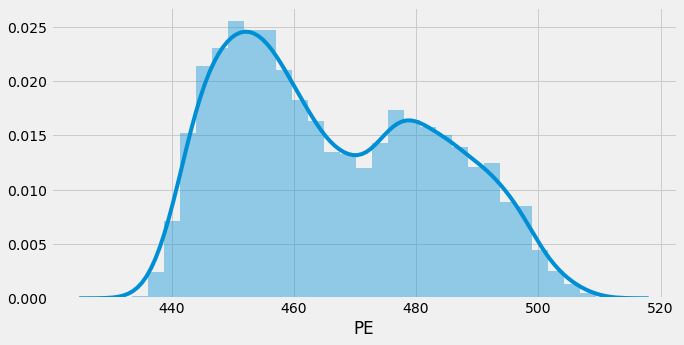

In [10]:
sns.distplot(train['PE'])

# Lets see if we have any discrepancies in test and train data distribution

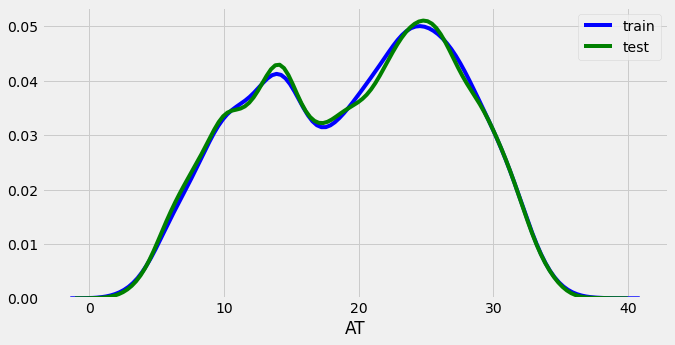

In [11]:
col = 'AT'
plt.figure()
sns.distplot(train[col], color='b', label='train', hist=False)
sns.distplot(test[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

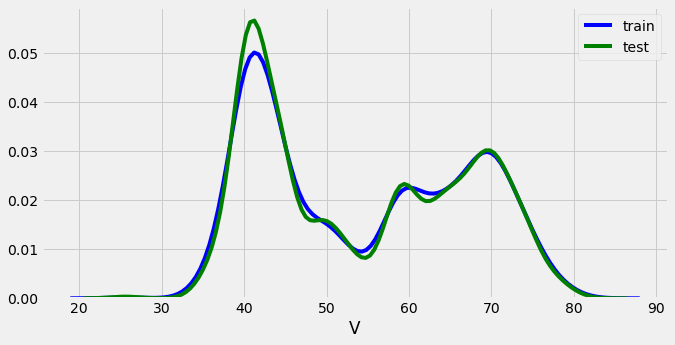

In [12]:
#distribution of V feature variale
col = 'V'

plt.figure()
sns.distplot(train[col], color='b', label='train', hist=False)
sns.distplot(test[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

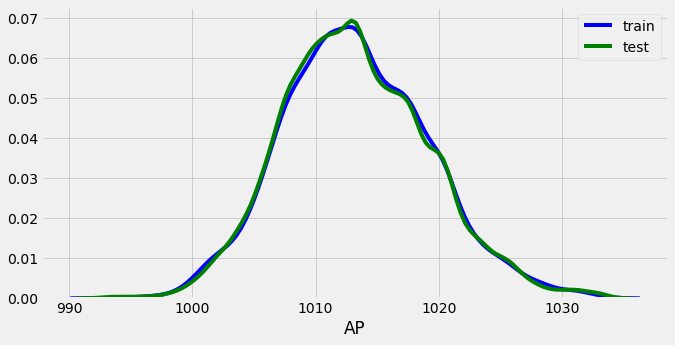

In [13]:
#distriution of Ap feature variale
col = 'AP'

plt.figure()
sns.distplot(train[col], color='b', label='train', hist=False)
sns.distplot(test[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

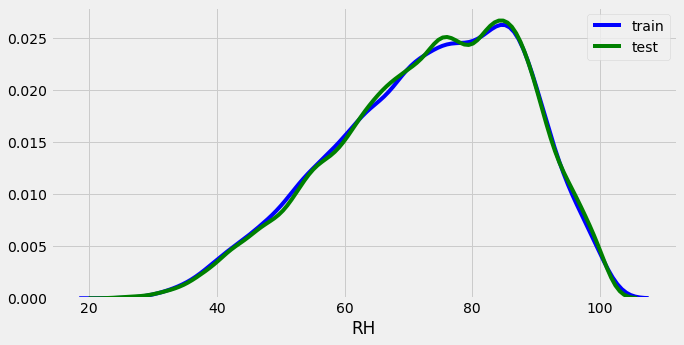

In [14]:
#Distriution of RH feature variable
col = 'RH'

plt.figure()
sns.distplot(train[col], color='b', label='train', hist=False)
sns.distplot(test[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

# We see no such differences between the test and train datasets, which is actually good as we can tackle them collectively

# Identifying duplicacy in Train and Test

In [15]:
print('No. of duplicates in train: '+str(len(train)-len(train.drop(['PE'],axis=1).drop_duplicates())))
print('No. of duplicates in test: '+str(len(test)-len(test.drop_duplicates())))

No. of duplicates in train: 3110
No. of duplicates in test: 28750


# This shows that we have a very high number of duplicates in both train and test  lets find them if we have them in train and add them for test 

In [16]:
df_train = train
df_test = test
#Uniting the colums to use as a Key
df_train['key']=df_train[['AT', 'V', 'AP', 'RH']].apply(lambda x: '_'.join(x.astype('str')), axis = 1)
df_test['key']=df_test[['AT', 'V', 'AP', 'RH']].apply(lambda x: '_'.join(x.astype('str')), axis = 1)

df=pd.DataFrame(df_train.groupby(['key'],as_index=False)['PE'].mean())
df=df.reset_index()
encode = dict(zip(df.key, df.PE))
# Now we will use the map function to map it to test
df_test['PE']=df_test.key.map(encode)

# Get the data which is not yet found back into test
df_test2=df_test[np.isnan(df_test.PE)].drop(['PE'],axis=1)
ready_test = df_test[~df_test.PE.isna()]
test = df_test2
test.drop(['key'],axis=1,inplace=True)
# Working on getting the train dataset without the duplicates
df_train2=df_train.drop(['PE'],axis=1).drop_duplicates()
# Now making a new encoder to map the correct values to train without duplicates 
encode = dict(zip(df_train.key, df_train.PE))
df_train2['PE']=df_train2.key.map(encode)
df_train2.drop(['key'],axis=1,inplace=True)
train = df_train2
print("New Train Shape: ",train.shape)
print("New test shape: ",test.shape)
print("The rows in test for which the predictions have been done already by mapping is: ",ready_test.shape)

New Train Shape:  (6458, 5)
New test shape:  (15360, 4)
The rows in test for which the predictions have been done already by mapping is:  (22912, 6)


In [17]:
test.head()

AT      V       AP     RH
0  16.98  53.16  1013.95  82.80
2   6.11  38.68  1017.53  79.23
3  12.34  43.22  1009.28  78.23
6  23.36  56.89  1014.23  78.34
9  17.40  43.14  1018.51  75.31

In [18]:
ready_test.head()

AT      V       AP     RH                        key          PE
1   9.60  41.03  1021.01  69.03    9.6_41.03_1021.01_69.03  495.108445
4  27.67  59.14  1016.51  61.20   27.67_59.14_1016.51_61.2  445.248894
5  25.15  68.61  1011.03  53.59  25.15_68.61_1011.03_53.59  460.174194
7  17.30  62.10  1020.28  88.06    17.3_62.1_1020.28_88.06  462.679397
8  18.40  43.96  1012.40  77.81    18.4_43.96_1012.4_77.81  476.565572

In [19]:
train['train_or_test']='train'
test['train_or_test']='test'
df=pd.concat([train,test])

In [20]:
df.head()

AT      V       AP     RH          PE train_or_test
0  29.07  72.51  1009.24  58.38  449.371855         train
1  32.38  67.17  1006.97  60.04  450.930818         train
2  19.29  67.71  1007.94  63.71  460.894029         train
3  16.45  41.48  1016.64  45.21  467.577314         train
4  21.43  46.97  1013.94  61.25  469.780698         train

In [21]:
df.isnull().sum()

AT                   0
V                    0
AP                   0
RH                   0
PE               15360
train_or_test        0
dtype: int64

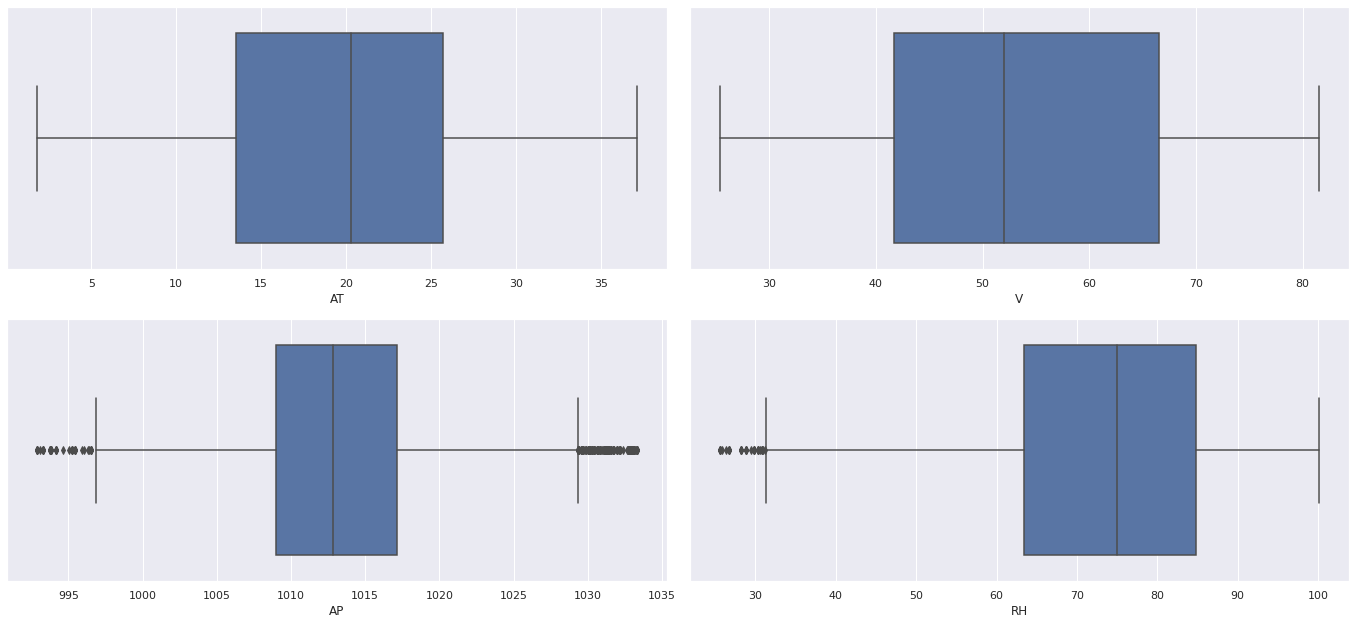

In [22]:
sns.set()
fig = plt.figure(figsize=(19,17))
i = 1
for column in df.select_dtypes(["int64","float64"]):
    if column !='PE':
        plt.subplot(4,2,i)
        sns.boxplot(df[column])
        i = i+1
plt.tight_layout()
plt.show()

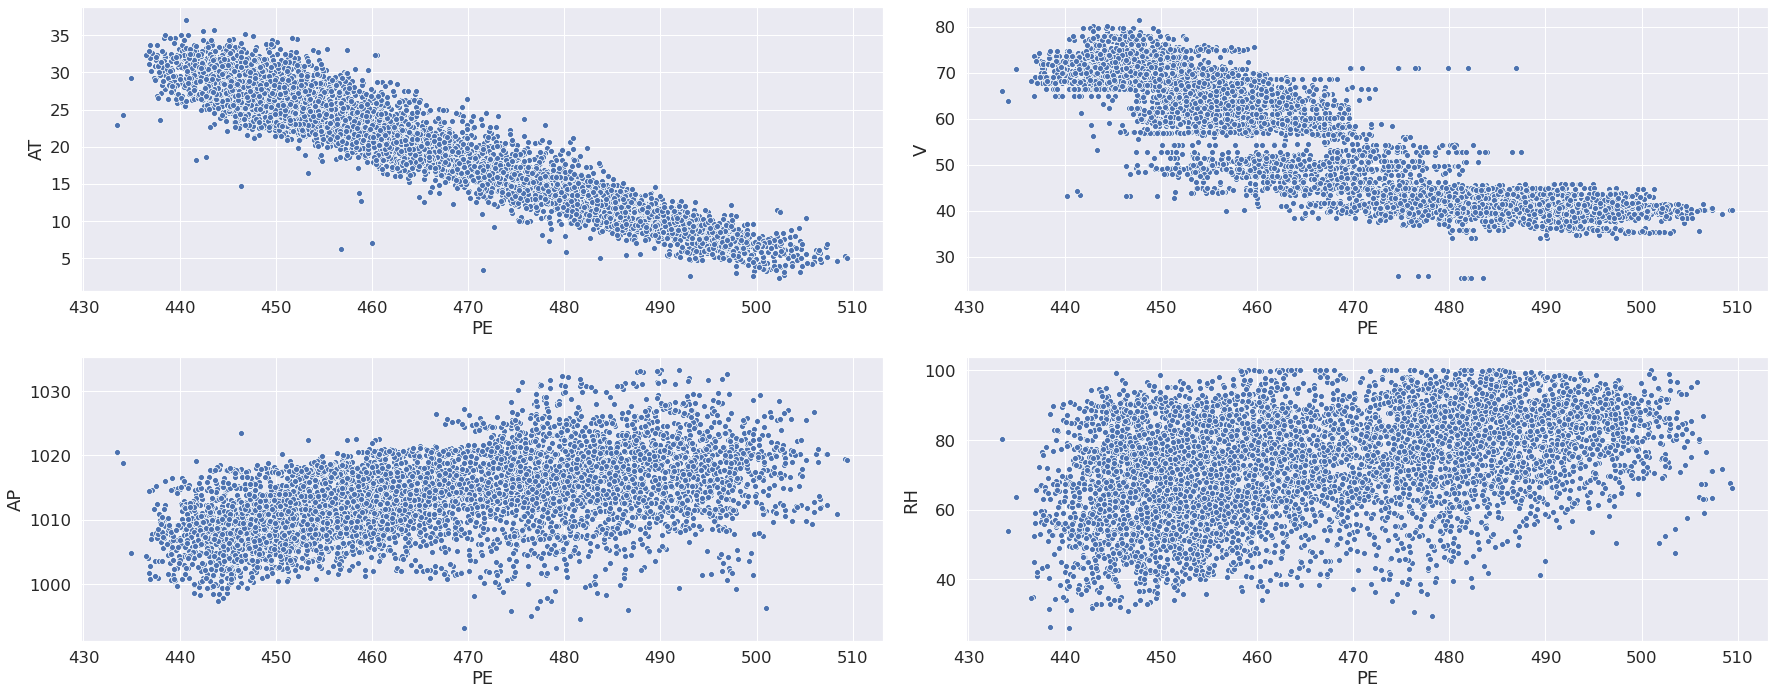

In [23]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(25,10))
col = [i for i in df.columns if i not in ['train_or_test','PE']]
i=1
for column in df[col]:
    plt.subplot(2,2,i)
    sns.scatterplot(x=df['PE'],y=df.loc[:,column])
    i = i + 1
    
plt.tight_layout()
plt.show()

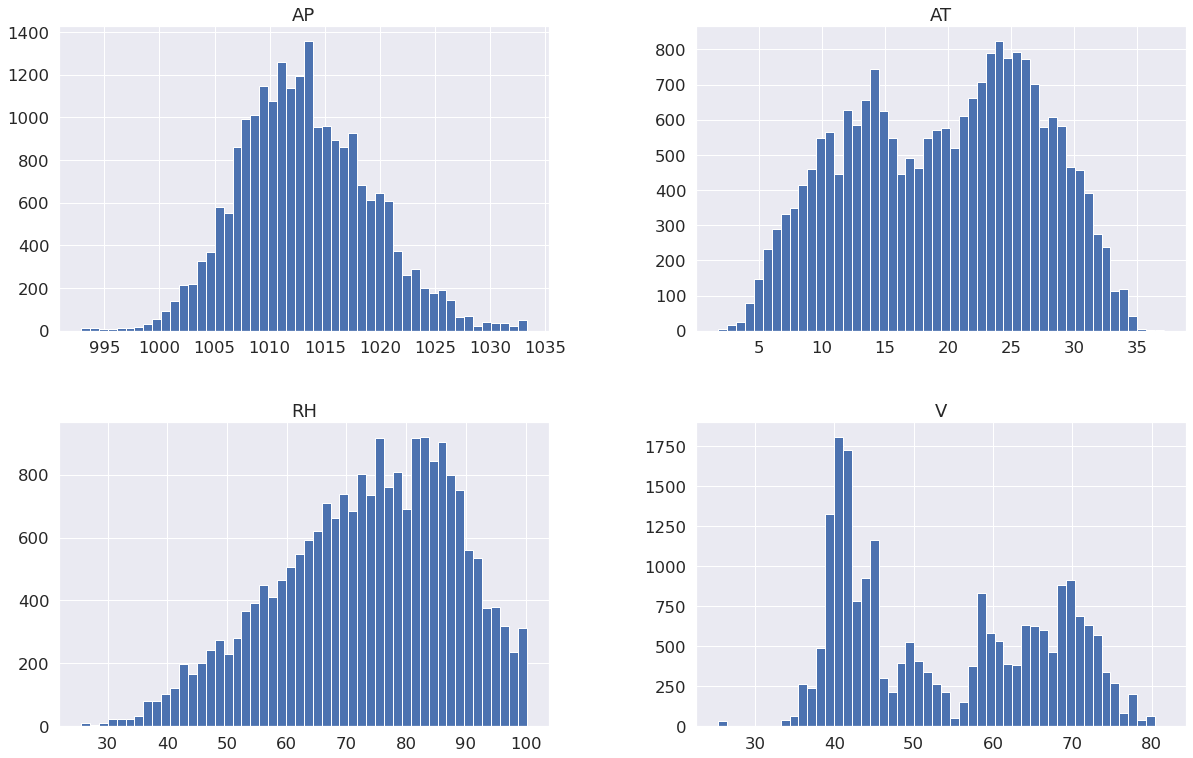

In [24]:
df.iloc[:,:4].hist(figsize=(18,12),bins=50)
plt.show()

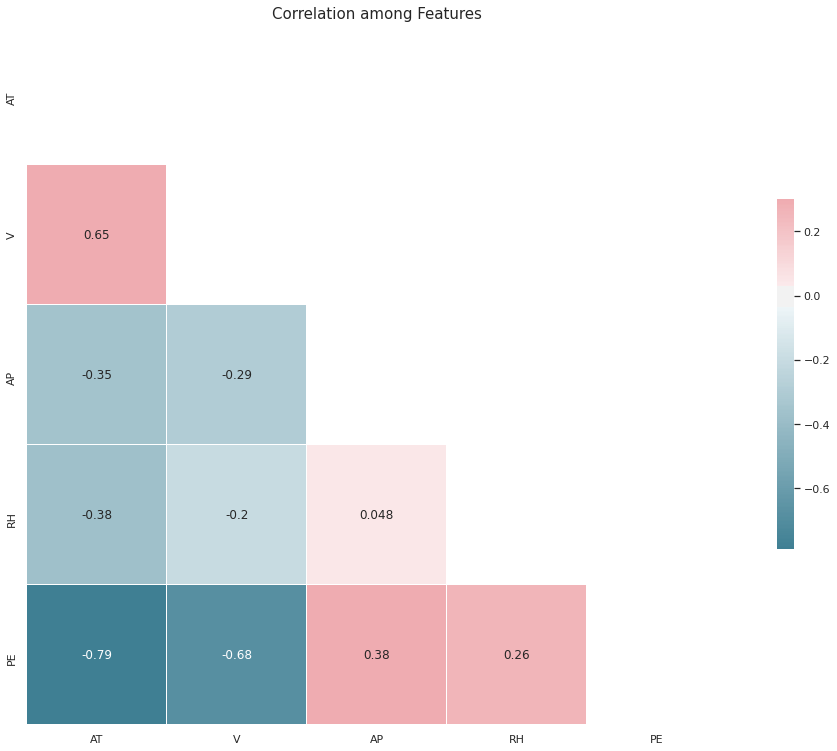

In [25]:
sns.set(style="white")
num_cols = [i for i in df.select_dtypes(['int64','float64'])]
correlation = df[num_cols].corr(method ='kendall')
# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16,12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink":.5}, annot=True);
plt.title("Correlation among Features",fontsize=15)
plt.show()

In [26]:
df.corr(method='kendall').unstack().sort_values().drop_duplicates()[:5]

PE  AT   -0.791671
    V    -0.682024
RH  AT   -0.377036
AP  AT   -0.352666
V   AP   -0.293376
dtype: float64

## Inferences fromthe above plots
### 1. Ambient Temperature(AT) and Exhaust Vaccum(V) has a high negative correlation with Power Output(PE)

# Feature Engineering

In [27]:
#Ratio features, I will be taking all the cobination of ratios as I have no idea
df['ATbyV'] = df['AT']/df['V']
df['APbyV'] = df['AP']/df['V']
df['ATbyRH'] = df['AT']/df['RH']
df['APbyRH'] = df['AP']/df['RH']
df['VbyRH'] = df['V']/df['RH']

### A very important derivedd feature is the "DEW" Point 

In [28]:
df['Dewpoint'] = df['AT'] - ((100-df['RH'])/5)

# Generating Groups

In [29]:
# Here I am considering the entire dataset and not just the train dataset
# You can normalize the df with z-score before clustering 
from scipy.stats import zscore
cols = [i for i in df.columns if i not in ['PE','train_or_test']]
X = df[cols]
X.head()

AT      V       AP     RH     ATbyV      APbyV    ATbyRH     APbyRH  \
0  29.07  72.51  1009.24  58.38  0.400910  13.918632  0.497945  17.287427   
1  32.38  67.17  1006.97  60.04  0.482060  14.991365  0.539307  16.771652   
2  19.29  67.71  1007.94  63.71  0.284891  14.886132  0.302778  15.820750   
3  16.45  41.48  1016.64  45.21  0.396577  24.509161  0.363858  22.487060   
4  21.43  46.97  1013.94  61.25  0.456249  21.586970  0.349878  16.554122   

      VbyRH  Dewpoint  
0  1.242035    20.746  
1  1.118754    24.388  
2  1.062784    12.032  
3  0.917496     5.492  
4  0.766857    13.680

In [30]:
X = X.apply(zscore)
X.head()
X1= X.values

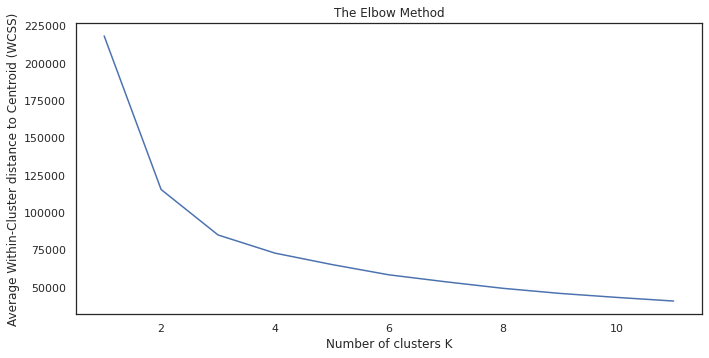

In [31]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,12):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter= 1000, n_init= 27, random_state= 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 12),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters K')
plt.ylabel('Average Within-Cluster distance to Centroid (WCSS)')  
plt.show()

### As visible the knee appears to be at 4 clusters

In [32]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X1)

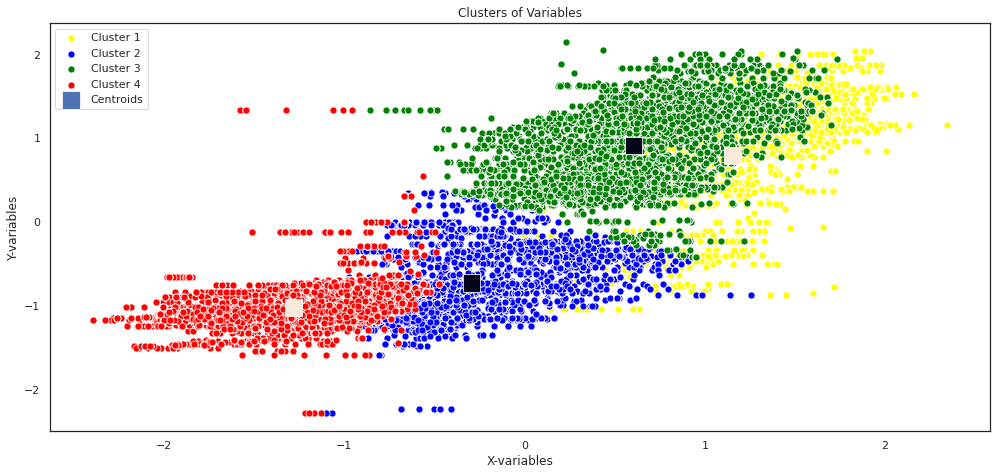

In [33]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X1[y_kmeans == 3, 0], X1[y_kmeans == 3, 1], color = 'red', label = 'Cluster 4',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of Variables')
plt.xlabel('X-variables')
plt.ylabel('Y-variables')
plt.legend()
plt.show()

# Cluster API

In [34]:
def ClusterView(n):
    cluster = KMeans( n_clusters = n, random_state = 100 )
    cluster.fit(X)
        # To get the values of Centroid
    centroids = cluster.cluster_centers_
    centroid_df = pd.DataFrame(centroids, columns = list(X))
    #print(centroid_df)
    prediction=cluster.predict(X)
    X["GROUP"] = prediction
    print(X.head())

        ## Observing the Clusters
    X.boxplot(by = 'GROUP',layout=(4,3) ,figsize=(15, 20))
    
    #### Modifying Outliers
    data = X   # lazy to type long names. Renaming it to data. Remember data is not a copy of the dataframe
       
    def replace(group):
        median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
        outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
        group[outliers] = group.median()       
        return group

    data_corrected = (data.groupby('GROUP').transform(replace)) 
    concat_data = data_corrected.join(pd.DataFrame(X['GROUP']))
    
    ## Reviewing the Clusters after removing the outliers
    concat_data.boxplot(by = 'GROUP', layout=(4,3), figsize=(15, 20))

         AT         V        AP        RH     ATbyV     APbyV    ATbyRH  \
0  1.263263  1.439432 -0.659404 -1.018705  0.516531 -1.253359  1.220601   
1  1.707700  1.018880 -1.040453 -0.905382  1.417276 -1.022976  1.469482   
2 -0.049908  1.061407 -0.877626 -0.654842 -0.771246 -1.045576  0.046275   
3 -0.431238 -1.004338  0.582782 -1.917779  0.468429  1.021091  0.413793   
4  0.237432 -0.571973  0.129552 -0.822779  1.130772  0.393514  0.329674   

     APbyRH     VbyRH  Dewpoint  GROUP  
0  0.775387  1.450633  1.010812      1  
1  0.631575  1.055390  1.583894      1  
2  0.366439  0.875950 -0.360367      2  
3  2.225181  0.410151 -1.389460      3  
4  0.570922 -0.072803 -0.101048      3  


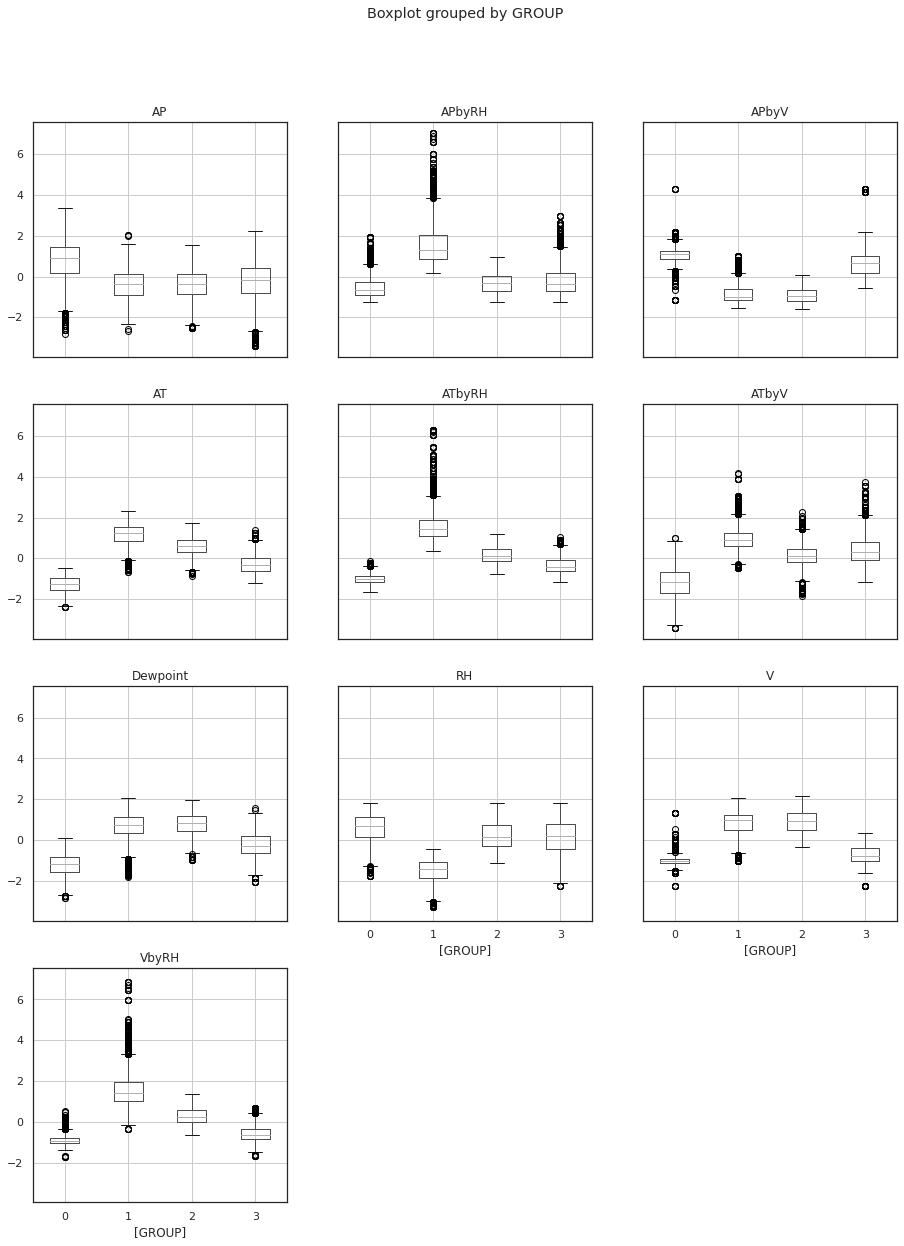

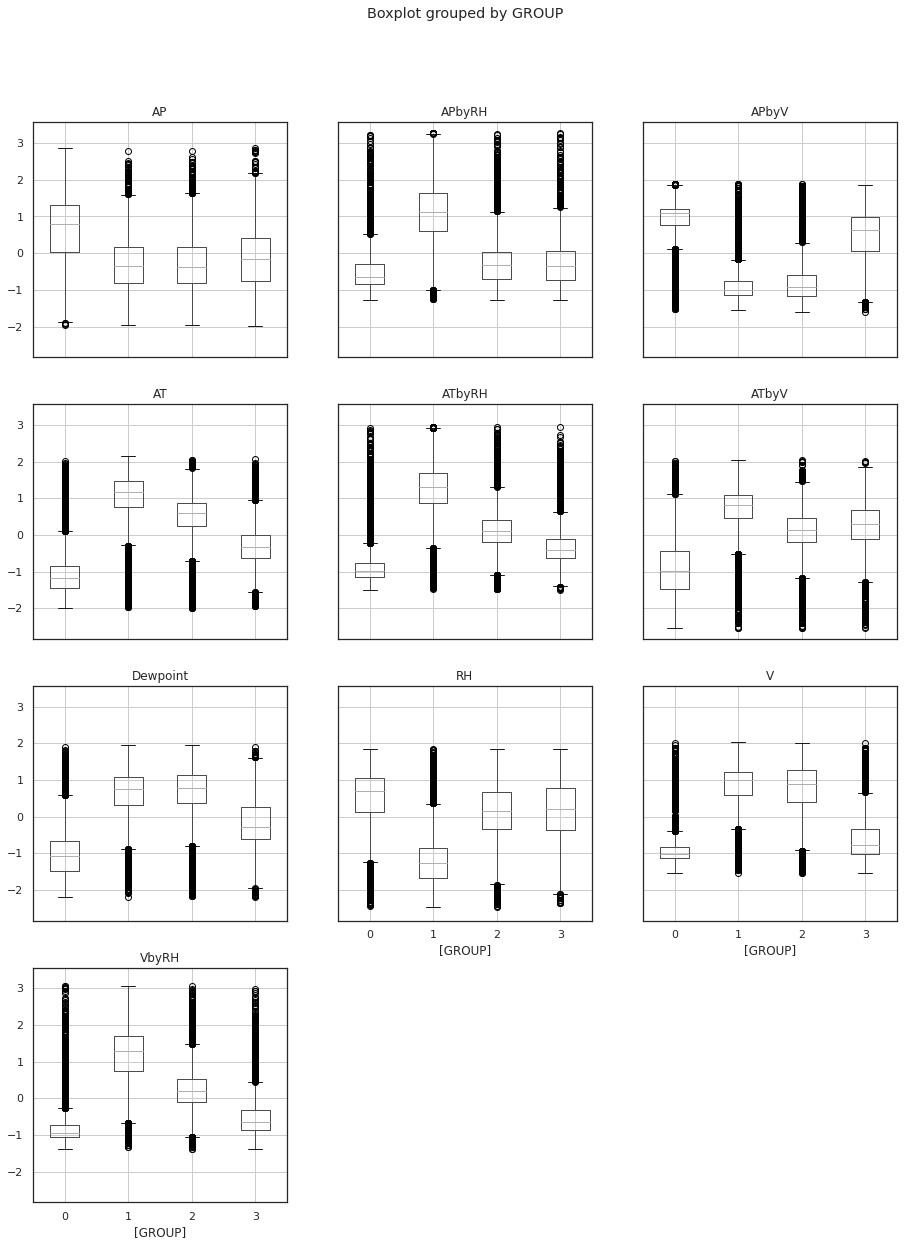

In [35]:
ClusterView(4)

In [36]:
df['Group'] = X['GROUP']

In [37]:
df.head()

AT      V       AP     RH          PE train_or_test     ATbyV  \
0  29.07  72.51  1009.24  58.38  449.371855         train  0.400910   
1  32.38  67.17  1006.97  60.04  450.930818         train  0.482060   
2  19.29  67.71  1007.94  63.71  460.894029         train  0.284891   
3  16.45  41.48  1016.64  45.21  467.577314         train  0.396577   
4  21.43  46.97  1013.94  61.25  469.780698         train  0.456249   

       APbyV    ATbyRH     APbyRH     VbyRH  Dewpoint  Group  
0  13.918632  0.497945  17.287427  1.242035    20.746      1  
1  14.991365  0.539307  16.771652  1.118754    24.388      1  
2  14.886132  0.302778  15.820750  1.062784    12.032      2  
3  24.509161  0.363858  22.487060  0.917496     5.492      3  
4  21.586970  0.349878  16.554122  0.766857    13.680      3

# Frequency Encoded features from Group

In [38]:
fe_pol = (df.groupby('Group').size()) / len(df)
df['Group_fe'] = df['Group'].apply(lambda x : fe_pol[x])

In [39]:
df.head()

AT      V       AP     RH          PE train_or_test     ATbyV  \
0  29.07  72.51  1009.24  58.38  449.371855         train  0.400910   
1  32.38  67.17  1006.97  60.04  450.930818         train  0.482060   
2  19.29  67.71  1007.94  63.71  460.894029         train  0.284891   
3  16.45  41.48  1016.64  45.21  467.577314         train  0.396577   
4  21.43  46.97  1013.94  61.25  469.780698         train  0.456249   

       APbyV    ATbyRH     APbyRH     VbyRH  Dewpoint  Group  Group_fe  
0  13.918632  0.497945  17.287427  1.242035    20.746      1  0.188193  
1  14.991365  0.539307  16.771652  1.118754    24.388      1  0.188193  
2  14.886132  0.302778  15.820750  1.062784    12.032      2  0.311440  
3  24.509161  0.363858  22.487060  0.917496     5.492      3  0.230681  
4  21.586970  0.349878  16.554122  0.766857    13.680      3  0.230681

In [40]:
#differentiate Train and test
train=df.loc[df.train_or_test.isin(['train'])]
test=df.loc[df.train_or_test.isin(['test'])]
train.drop(columns={'train_or_test'},axis=1,inplace=True)
test.drop(columns={'train_or_test'},axis=1,inplace=True)

In [41]:
test.drop(['PE'],axis=1,inplace=True)
from sklearn.preprocessing import MinMaxScaler,StandardScaler
col = []
for features in train.select_dtypes(include=['int64','float64']):
    if features!='PE':
        col.append(features)
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
train[col] = mm.fit_transform(train[col].values)
test[col] = mm.fit_transform(test[col].values)

In [42]:
Y = train['PE']
X = train.iloc[:,train.columns !='PE']

In [43]:
train.shape

(6458, 13)

In [44]:
test.shape

(15360, 12)

# Using Decision Tree Regressor(Baseline model)

In [ ]:
# Adjusted R^2
def AdjRsquare(model,x,y):
    Rsquare = model.score(x,y)
    noData = len(y)
    p = x.shape[1]
    tempRsquare = 1 - ((1 - Rsquare)*(noData - 1 ))/(noData - p - 1)
    return tempRsquare

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state =1, shuffle = True)
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(min_samples_leaf=2)
reg.fit(x_train,y_train)
predictions_DT = reg.predict(x_test)

rmse_DT = (np.mean(predictions_DT - y_test)**2)**0.5
rmse_DT

In [ ]:
AdjRsquare(reg,x_test,y_test)

# Both LGBM and Decision Trees give the same result on Public LeaderBoard ie Rank 112

In [45]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))

In [ ]:
#building models
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import time
import sys

#tuning hyperparameters
from bayes_opt import BayesianOptimization
from skopt  import BayesSearchCV 

#metrics 
from sklearn.metrics import roc_auc_score, roc_curve
import shap

# LGBM regressor

In [ ]:
def bayesion_opt_lgbm(X, Y, init_iter=3, n_iters=7, random_state=11, seed = 101, num_iterations = 1000):
    dtrain = lgb.Dataset(data=X, label=Y)
    def lgb_r2_score(preds, dtrain):
        labels = dtrain.get_label()
        return 'rmse', rmse(labels, preds), True

    # Objective Function
    def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight):
        params = {'application':'regression','num_iterations': num_iterations,
                    'learning_rate':0.1, 'early_stopping_round':100,
                    'metric':'rmse'} # Default parameters
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight
        cv_results = lgb.cv(params, dtrain, nfold=5, seed=seed,categorical_feature=[], stratified=False,
                              verbose_eval =None, feval=lgb_r2_score)
          # print(cv_results)
        return np.max(cv_results['rmse-mean'])
    
   # Domain space-- Range of hyperparameters 
    pds = {'num_leaves': (80, 100),
            'feature_fraction': (0.1, 0.9),
            'bagging_fraction': (0.8, 1),
            'max_depth': (17, 25),
            'min_split_gain': (0.001, 0.1),
            'min_child_weight': (10, 25)
            }

    # Surrogate model
    optimizer = BayesianOptimization(hyp_lgbm, pds, random_state=random_state)
                                    
    # Optimize
    optimizer.maximize(init_points=init_iter, n_iter=n_iters)

  # getting the format
    model_auc=[]
    for model in range(len( optimizer.res)):
        model_auc.append(optimizer.res[model]['target'])  
        # return best parameters
        return optimizer.res[pd.Series(model_auc).idxmax()]['target'],optimizer.res[pd.Series(model_auc).idxmax()]['params']

lgbm = bayesion_opt_lgbm(X, Y, init_iter=5, n_iters=10, random_state=77, seed = 101, num_iterations = 2000)

In [ ]:
lgbm

In [ ]:
#based on the above minimization #3.59
from sklearn.metrics import mean_squared_error
errlgb = []
y_pred_tot_lgbm1 = []

fold = KFold(n_splits=5, shuffle=True, random_state=2020)
i = 1
for train_index, test_index in fold.split(X, Y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = Y.iloc[train_index], Y.iloc[test_index]
    m1 = lgb.LGBMRegressor(boosting_type='gbdt',num_leaves=96, max_depth=23,objective='regression',min_split_gain=0.0096,
                         bagging_fraction=0.98,feature_fraction=0.61,min_child_weight = 12.089)
    m1.fit(x_train, y_train,eval_set=[(x_train,y_train),(x_val, y_val)],early_stopping_rounds=100,verbose=200)
    pred_x1 = m1.predict(x_train,num_iteration=m1.best_iteration_)
    pred_y1 = m1.predict(x_val,num_iteration=m1.best_iteration_)
    print(i, "err_lgbm: ",  np.sqrt(mean_squared_error(y_val,pred_y1)))
    print(i, " err_train: ",  np.sqrt(mean_squared_error(y_train,pred_x1)))
    errlgb.append(np.sqrt(mean_squared_error(y_val,pred_y1)))
    pred_test1 = m1.predict(test)
    i = i + 1
    y_pred_tot_lgbm1.append(pred_test1)
sum(errlgb)/5

In [ ]:
print('The LGBM cross validation score is: ',sum(errlgb)/5)

# CatBoost Regressor

In [ ]:
import catboost as cgb
def bayesion_opt_lgbm(X, Y, init_iter=5, n_iters=7, random_state=11, seed = 101, num_iterations = 1000):
    # Objective Function
    def cat_hyp(depth, bagging_temperature):
        params = {"iterations": 100,
                "learning_rate": 0.05,
                "eval_metric": "RMSE",
                "loss_function":'RMSE',
                "verbose": False} # Default Parameters
        params[ "depth"] = int(round(depth)) 
        params["bagging_temperature"] = bagging_temperature
      
        cat_feat = [] # Categorical features list
        cv_dataset = cgb.Pool(data=X,
                      label=Y,
                      cat_features=cat_feat)

        scores = cgb.cv(cv_dataset,
                  params,
                  fold_count=5)
        return np.min(scores['test-RMSE-mean'])

    # Domain space-- Range of hyperparameters 
    pds = {'depth': (5, 8),
          'bagging_temperature': (3,10)
          }
  # Surrogate model
    optimizer101 = BayesianOptimization(cat_hyp, pds, random_state=2100)
                                    
  # Optimize
    optimizer101.maximize(init_points=init_iter, n_iter=n_iters)

  # getting the format
    model_auc=[]
    for model in range(len( optimizer101.res)):
        model_auc.append(optimizer101.res[model]['target'])  
    # return best parameters
        return optimizer101.res[pd.Series(model_auc).idxmax()]['target'],optimizer101.res[pd.Series(model_auc).idxmax()]['params']

lgbm101 = bayesion_opt_lgbm(X, Y, init_iter=5, n_iters=10, random_state=77, seed = 101, num_iterations = 2000)

In [ ]:
lgbm101

In [ ]:
from sklearn.metrics import mean_squared_error
errcat = []
y_pred_tot_cat1 = []

fold = KFold(n_splits=5, shuffle=True, random_state=2020)
i = 1
for train_index, test_index in fold.split(X, Y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = Y.iloc[train_index], Y.iloc[test_index]
    m2 = cgb.CatBoostRegressor(bagging_temperature=9,depth = 5.0)
    m2.fit(x_train, y_train,eval_set=[(x_train,y_train),(x_val, y_val)],early_stopping_rounds=100,verbose=200)
    pred_x1 = m2.predict(x_train)
    pred_y1 = m2.predict(x_val)
    pred_ying = m2.predict(x_val)
    print(i, "err_cat: ",  np.sqrt(mean_squared_error(y_val,pred_y1)))
    print(i, " err_train_cat: ",  np.sqrt(mean_squared_error(y_train,pred_x1)))
    errcat.append(np.sqrt(mean_squared_error(y_val,pred_y1)))
    pred_test1 = m2.predict(test)
    i = i + 1
    y_pred_tot_cat1.append(pred_test1)
sum(errcat)/5

In [ ]:
print('The Catboost cross validation score is: ',sum(errcat)/5)

# XGboost  

In [ ]:
def bayesion_opt_lgbm(X, Y, init_iter=3, n_iters=7, random_state=11, seed = 101, num_iterations = 1000):
    dtrain = xgb.DMatrix(X, Y, feature_names=X.columns.values)
    def xgb_r2(preds, dtrain):
        labels = dtrain.get_label()
        return 'rmse', np.sqrt(mean_squared_error(labels,preds))

    # Define Objective Function
    def hyp_xgb(max_depth, subsample, colsample_bytree,min_child_weight,gamma,reg_alpha,reg_lambda):
        params = {
          'eta': 0.05,
          'eval_metric':'rmse', # Optional --> Use eval_metric if you want to stop evaluation based on eval_metric 
                  }
        params['max_depth'] = int(round(max_depth))
        params['subsample'] = max(min(subsample, 1), 0)
        params['colsample_bytree'] = max(min(colsample_bytree, 1), 0)
        params['min_child_weight'] = int(min_child_weight)
        params['gamma'] = max(gamma, 0)
        scores = xgb.cv(params, dtrain, num_boost_round=1000,verbose_eval=False, early_stopping_rounds=100, feval=xgb_r2, maximize=True, nfold=5)
        return  scores['test-rmse-mean'].iloc[-1]

  # Domain space-- Range of hyperparameters 
    pds ={
      'min_child_weight':(14,20),
      'gamma':(0, 5),
      'subsample':(0.5, 1),
      'colsample_bytree':(0.1,1),
      'reg_alpha': (0,5),
      'reg_lambda': (0.2,3),
      'max_depth': (5,15)
        }
  # Surrogate model
    optimizer102 = BayesianOptimization(hyp_xgb, pds, random_state=11)                              
  # Optimize
    optimizer102.maximize(init_points=init_iter, n_iter=n_iters)
  # getting the format
    model_auc=[]
    for model in range(len( optimizer102.res)):
        model_auc.append(optimizer102.res[model]['target'])  
    # return best parameters
        return optimizer102.res[pd.Series(model_auc).idxmax()]['target'],optimizer102.res[pd.Series(model_auc).idxmax()]['params']

lgbm102 = bayesion_opt_lgbm(X, Y, init_iter=5, n_iters=10, random_state=77, seed = 101, num_iterations = 2000)

In [ ]:
lgbm102

In [ ]:
from sklearn.metrics import mean_squared_error
errxgb = []
y_pred_tot_xgb1 = []

fold = KFold(n_splits=5, shuffle=True, random_state=2020)
i = 1
for train_index, test_index in fold.split(X, Y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = Y.iloc[train_index], Y.iloc[test_index]
    m3 = xgb.XGBRegressor(subsample=1,max_depth=31,reg_alpha=4,reg_lambda=1,min_child_weight=18)
    m3.fit(x_train, y_train,eval_set=[(x_train,y_train),(x_val, y_val)],early_stopping_rounds=100,verbose=200)
    pred_x1 = m3.predict(x_train)
    pred_y1 = m3.predict(x_val)
    pred_yinf = m3.predict(x_val)
    print(i, "err_xgboost: ",  np.sqrt(mean_squared_error(y_val,pred_y1)))
    print(i, " err_train_xgboost: ",  np.sqrt(mean_squared_error(y_train,pred_x1)))
    errxgb.append(np.sqrt(mean_squared_error(y_val,pred_y1)))    
    pred_test1 = m3.predict(test)
    i = i + 1
    y_pred_tot_xgb1.append(pred_test1)
sum(errxgb)/5    

In [ ]:
sum(errxgb)/5

In [ ]:
#3.5877====XGBOOST
#3.53====LGBM
#3.57====Catboost

In [46]:
from sklearn.metrics import mean_squared_error
import catboost as cgb
import xgboost as xgb
oof_pred               = np.zeros((len(train), ))
y_pred_1               = np.zeros((len(test), ))
y_pred_2               = np.zeros((len(test), ))
y_pred_3               = np.zeros((len(test), ))
num_models             = 3
n_splits               = 100
error                  = []
fold                   = KFold(n_splits=n_splits, shuffle=True, random_state=42)
for fold,(train_index, test_index) in enumerate(fold.split(X, Y)):
    wghts = [0]*num_models
    rmse  = []
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = Y.iloc[train_index], Y.iloc[test_index] 

    model1 = lgb.LGBMRegressor(boosting_type='gbdt',num_leaves=100, max_depth=23,objective='regression',min_split_gain=0.0096,
                               bagging_fraction=0.98,feature_fraction=0.61,min_child_weight = 12.089)
    model1.fit(x_train,y_train)
    val_pred1 = model1.predict(x_val)
    rmse.append(np.sqrt(mean_squared_error(y_val, val_pred1)))
    y_pred_1  += model1.predict(test) / (n_splits)
    
    model2 = cgb.CatBoostRegressor(bagging_temperature=9,depth = 5.0)
    model2.fit(x_train,y_train)
    val_pred2 = model2.predict(x_val)
    rmse.append(np.sqrt(mean_squared_error(y_val,val_pred2)))
    y_pred_2  += model2.predict(test) / (n_splits)
    
    model3 = xgb.XGBRegressor(subsample=1,max_depth=31,reg_alpha=4,reg_lambda=1,min_child_weight=18)
    model3.fit(x_train,y_train)
    val_pred3 = model3.predict(x_val)
    rmse.append(np.sqrt(mean_squared_error(y_val,val_pred3)))
    y_pred_3  += model3.predict(test) / (n_splits)
    
    print('validation RMSE model 1 fold-',fold+1,': ',rmse[0])
    print('validation RMSE model 2 fold-',fold+1,': ',rmse[1])
    print('validation RMSE model 3 fold-',fold+1,': ',rmse[2])

    wghts = np.exp(-100*np.array(rmse/sum(rmse)))
    wghts = wghts/sum(wghts)
    val_pred = wghts[0]*val_pred1+wghts[1]*val_pred2+wghts[2]*val_pred3
    print('validation RMSE fold-',fold+1,': ',np.sqrt(mean_squared_error(y_val,val_pred)))
    error.append(np.sqrt(mean_squared_error(y_val,val_pred)))
    oof_pred[test_index]  = val_pred
    print('\n')

y_pred_final = (wghts[0]*y_pred_1 + wghts[1]*y_pred_2 + wghts[2]*y_pred_3)
print('OOF RMSE:- ',np.sqrt(mean_squared_error(oof_pred,Y)))

Learning rate set to 0.054302
0:	learn: 16.3055616	total: 63.8ms	remaining: 1m 3s
1:	learn: 15.5443790	total: 71.3ms	remaining: 35.6s
2:	learn: 14.8368023	total: 77.1ms	remaining: 25.6s
3:	learn: 14.1717469	total: 82.8ms	remaining: 20.6s
4:	learn: 13.5365304	total: 89.2ms	remaining: 17.8s
5:	learn: 12.9419035	total: 95.4ms	remaining: 15.8s
6:	learn: 12.3782811	total: 101ms	remaining: 14.4s
7:	learn: 11.8472833	total: 108ms	remaining: 13.3s
8:	learn: 11.3354711	total: 114ms	remaining: 12.5s
9:	learn: 10.8649646	total: 121ms	remaining: 11.9s
10:	learn: 10.4166887	total: 127ms	remaining: 11.4s
11:	learn: 9.9897399	total: 132ms	remaining: 10.9s
12:	learn: 9.5985325	total: 138ms	remaining: 10.5s
13:	learn: 9.2178042	total: 141ms	remaining: 9.96s
14:	learn: 8.8670101	total: 144ms	remaining: 9.48s
15:	learn: 8.5357772	total: 147ms	remaining: 9.03s
16:	learn: 8.2281307	total: 150ms	remaining: 8.65s
17:	learn: 7.9377315	total: 152ms	remaining: 8.31s
18:	learn: 7.6698691	total: 155ms	remaining: 

169:	learn: 3.9430680	total: 577ms	remaining: 2.82s
170:	learn: 3.9408832	total: 582ms	remaining: 2.82s
171:	learn: 3.9390046	total: 584ms	remaining: 2.81s
172:	learn: 3.9348684	total: 587ms	remaining: 2.81s
173:	learn: 3.9326060	total: 590ms	remaining: 2.8s
174:	learn: 3.9297176	total: 592ms	remaining: 2.79s
175:	learn: 3.9255770	total: 595ms	remaining: 2.79s
176:	learn: 3.9242405	total: 598ms	remaining: 2.78s
177:	learn: 3.9207301	total: 600ms	remaining: 2.77s
178:	learn: 3.9180086	total: 603ms	remaining: 2.77s
179:	learn: 3.9166254	total: 606ms	remaining: 2.76s
180:	learn: 3.9148792	total: 608ms	remaining: 2.75s
181:	learn: 3.9112810	total: 611ms	remaining: 2.75s
182:	learn: 3.9098270	total: 614ms	remaining: 2.74s
183:	learn: 3.9084712	total: 616ms	remaining: 2.73s
184:	learn: 3.9050335	total: 619ms	remaining: 2.73s
185:	learn: 3.9023387	total: 621ms	remaining: 2.72s
186:	learn: 3.9003297	total: 624ms	remaining: 2.71s
187:	learn: 3.8982813	total: 627ms	remaining: 2.71s
188:	learn: 3

377:	learn: 3.5326230	total: 1.16s	remaining: 1.91s
378:	learn: 3.5308730	total: 1.16s	remaining: 1.91s
379:	learn: 3.5289711	total: 1.17s	remaining: 1.9s
380:	learn: 3.5277844	total: 1.17s	remaining: 1.9s
381:	learn: 3.5264027	total: 1.17s	remaining: 1.9s
382:	learn: 3.5253485	total: 1.17s	remaining: 1.89s
383:	learn: 3.5243411	total: 1.18s	remaining: 1.89s
384:	learn: 3.5230348	total: 1.18s	remaining: 1.89s
385:	learn: 3.5215470	total: 1.18s	remaining: 1.88s
386:	learn: 3.5205476	total: 1.19s	remaining: 1.88s
387:	learn: 3.5189532	total: 1.19s	remaining: 1.88s
388:	learn: 3.5174523	total: 1.19s	remaining: 1.87s
389:	learn: 3.5163523	total: 1.2s	remaining: 1.87s
390:	learn: 3.5151091	total: 1.2s	remaining: 1.87s
391:	learn: 3.5136494	total: 1.2s	remaining: 1.87s
392:	learn: 3.5121302	total: 1.21s	remaining: 1.86s
393:	learn: 3.5114931	total: 1.21s	remaining: 1.86s
394:	learn: 3.5099339	total: 1.21s	remaining: 1.86s
395:	learn: 3.5079499	total: 1.21s	remaining: 1.85s
396:	learn: 3.5063

578:	learn: 3.2909912	total: 1.75s	remaining: 1.27s
579:	learn: 3.2899811	total: 1.75s	remaining: 1.27s
580:	learn: 3.2894398	total: 1.75s	remaining: 1.26s
581:	learn: 3.2882607	total: 1.76s	remaining: 1.26s
582:	learn: 3.2864915	total: 1.76s	remaining: 1.26s
583:	learn: 3.2852870	total: 1.76s	remaining: 1.25s
584:	learn: 3.2846935	total: 1.76s	remaining: 1.25s
585:	learn: 3.2843037	total: 1.77s	remaining: 1.25s
586:	learn: 3.2829382	total: 1.77s	remaining: 1.24s
587:	learn: 3.2824567	total: 1.77s	remaining: 1.24s
588:	learn: 3.2814586	total: 1.77s	remaining: 1.24s
589:	learn: 3.2799546	total: 1.78s	remaining: 1.24s
590:	learn: 3.2794060	total: 1.78s	remaining: 1.23s
591:	learn: 3.2778535	total: 1.78s	remaining: 1.23s
592:	learn: 3.2771889	total: 1.78s	remaining: 1.23s
593:	learn: 3.2756253	total: 1.79s	remaining: 1.22s
594:	learn: 3.2749692	total: 1.79s	remaining: 1.22s
595:	learn: 3.2738972	total: 1.79s	remaining: 1.22s
596:	learn: 3.2734323	total: 1.8s	remaining: 1.21s
597:	learn: 3

791:	learn: 3.1072707	total: 2.33s	remaining: 613ms
792:	learn: 3.1063890	total: 2.34s	remaining: 610ms
793:	learn: 3.1056736	total: 2.34s	remaining: 607ms
794:	learn: 3.1047832	total: 2.34s	remaining: 604ms
795:	learn: 3.1039854	total: 2.34s	remaining: 601ms
796:	learn: 3.1032513	total: 2.35s	remaining: 598ms
797:	learn: 3.1021149	total: 2.35s	remaining: 595ms
798:	learn: 3.1009388	total: 2.35s	remaining: 592ms
799:	learn: 3.0998042	total: 2.35s	remaining: 589ms
800:	learn: 3.0987722	total: 2.36s	remaining: 586ms
801:	learn: 3.0977647	total: 2.36s	remaining: 583ms
802:	learn: 3.0973804	total: 2.36s	remaining: 580ms
803:	learn: 3.0967815	total: 2.37s	remaining: 577ms
804:	learn: 3.0954227	total: 2.37s	remaining: 574ms
805:	learn: 3.0946069	total: 2.37s	remaining: 571ms
806:	learn: 3.0943882	total: 2.37s	remaining: 568ms
807:	learn: 3.0934564	total: 2.38s	remaining: 565ms
808:	learn: 3.0928836	total: 2.38s	remaining: 562ms
809:	learn: 3.0918732	total: 2.38s	remaining: 559ms
810:	learn: 

validation RMSE model 1 fold- 1 :  2.6838367860055166
validation RMSE model 2 fold- 1 :  3.01883193163469
validation RMSE model 3 fold- 1 :  3.0113409161269025
validation RMSE fold- 1 :  2.684305952411132


Learning rate set to 0.054302
0:	learn: 16.3020006	total: 3.16ms	remaining: 3.15s
1:	learn: 15.5425526	total: 6.32ms	remaining: 3.15s
2:	learn: 14.8330986	total: 9.54ms	remaining: 3.17s
3:	learn: 14.1669380	total: 13ms	remaining: 3.23s
4:	learn: 13.5331680	total: 16.5ms	remaining: 3.28s
5:	learn: 12.9577336	total: 20.1ms	remaining: 3.33s
6:	learn: 12.3868456	total: 23.7ms	remaining: 3.36s
7:	learn: 11.8486634	total: 27.3ms	remaining: 3.39s
8:	learn: 11.3440564	total: 30.8ms	remaining: 3.4s
9:	learn: 10.8711645	total: 34.3ms	remaining: 3.39s
10:	learn: 10.4201052	total: 37.7ms	remaining: 3.39s
11:	learn: 9.9892459	total: 41.2ms	remaining: 3.39s
12:	learn: 9.5902969	total: 50.3ms	remaining: 3.82s
13:	learn: 9.2081348	total: 57.1ms	remaining: 4.02s
14:	learn: 8.8548998	total: 63.1ms	re

182:	learn: 3.8840430	total: 587ms	remaining: 2.62s
183:	learn: 3.8806376	total: 590ms	remaining: 2.62s
184:	learn: 3.8789259	total: 593ms	remaining: 2.61s
185:	learn: 3.8759433	total: 595ms	remaining: 2.61s
186:	learn: 3.8719681	total: 598ms	remaining: 2.6s
187:	learn: 3.8698176	total: 601ms	remaining: 2.6s
188:	learn: 3.8659931	total: 603ms	remaining: 2.59s
189:	learn: 3.8634365	total: 606ms	remaining: 2.58s
190:	learn: 3.8601120	total: 609ms	remaining: 2.58s
191:	learn: 3.8594815	total: 611ms	remaining: 2.57s
192:	learn: 3.8577777	total: 614ms	remaining: 2.57s
193:	learn: 3.8552623	total: 616ms	remaining: 2.56s
194:	learn: 3.8524184	total: 619ms	remaining: 2.55s
195:	learn: 3.8499049	total: 622ms	remaining: 2.55s
196:	learn: 3.8482161	total: 624ms	remaining: 2.54s
197:	learn: 3.8464370	total: 627ms	remaining: 2.54s
198:	learn: 3.8431670	total: 630ms	remaining: 2.53s
199:	learn: 3.8409064	total: 633ms	remaining: 2.53s
200:	learn: 3.8396008	total: 635ms	remaining: 2.53s
201:	learn: 3.

397:	learn: 3.4897244	total: 1.17s	remaining: 1.77s
398:	learn: 3.4884212	total: 1.17s	remaining: 1.77s
399:	learn: 3.4869772	total: 1.18s	remaining: 1.76s
400:	learn: 3.4862587	total: 1.18s	remaining: 1.76s
401:	learn: 3.4843179	total: 1.18s	remaining: 1.76s
402:	learn: 3.4826856	total: 1.19s	remaining: 1.75s
403:	learn: 3.4815611	total: 1.19s	remaining: 1.75s
404:	learn: 3.4802284	total: 1.19s	remaining: 1.75s
405:	learn: 3.4779069	total: 1.19s	remaining: 1.75s
406:	learn: 3.4762336	total: 1.2s	remaining: 1.74s
407:	learn: 3.4752393	total: 1.2s	remaining: 1.74s
408:	learn: 3.4720016	total: 1.2s	remaining: 1.74s
409:	learn: 3.4707458	total: 1.2s	remaining: 1.73s
410:	learn: 3.4691263	total: 1.21s	remaining: 1.73s
411:	learn: 3.4675439	total: 1.21s	remaining: 1.73s
412:	learn: 3.4662582	total: 1.21s	remaining: 1.72s
413:	learn: 3.4653533	total: 1.21s	remaining: 1.72s
414:	learn: 3.4639334	total: 1.22s	remaining: 1.72s
415:	learn: 3.4625527	total: 1.22s	remaining: 1.71s
416:	learn: 3.46

611:	learn: 3.2368825	total: 1.76s	remaining: 1.11s
612:	learn: 3.2351861	total: 1.76s	remaining: 1.11s
613:	learn: 3.2341248	total: 1.76s	remaining: 1.11s
614:	learn: 3.2334698	total: 1.76s	remaining: 1.1s
615:	learn: 3.2330077	total: 1.77s	remaining: 1.1s
616:	learn: 3.2318744	total: 1.77s	remaining: 1.1s
617:	learn: 3.2310061	total: 1.77s	remaining: 1.1s
618:	learn: 3.2305014	total: 1.78s	remaining: 1.09s
619:	learn: 3.2300910	total: 1.78s	remaining: 1.09s
620:	learn: 3.2282992	total: 1.78s	remaining: 1.09s
621:	learn: 3.2276110	total: 1.78s	remaining: 1.08s
622:	learn: 3.2265953	total: 1.79s	remaining: 1.08s
623:	learn: 3.2256755	total: 1.79s	remaining: 1.08s
624:	learn: 3.2243152	total: 1.79s	remaining: 1.07s
625:	learn: 3.2236009	total: 1.79s	remaining: 1.07s
626:	learn: 3.2224107	total: 1.8s	remaining: 1.07s
627:	learn: 3.2215371	total: 1.8s	remaining: 1.07s
628:	learn: 3.2203095	total: 1.8s	remaining: 1.06s
629:	learn: 3.2189655	total: 1.81s	remaining: 1.06s
630:	learn: 3.21799

825:	learn: 3.0505415	total: 2.34s	remaining: 493ms
826:	learn: 3.0498089	total: 2.35s	remaining: 491ms
827:	learn: 3.0493350	total: 2.35s	remaining: 488ms
828:	learn: 3.0486391	total: 2.35s	remaining: 485ms
829:	learn: 3.0481291	total: 2.35s	remaining: 482ms
830:	learn: 3.0472904	total: 2.36s	remaining: 479ms
831:	learn: 3.0459315	total: 2.36s	remaining: 476ms
832:	learn: 3.0452364	total: 2.36s	remaining: 473ms
833:	learn: 3.0448190	total: 2.36s	remaining: 471ms
834:	learn: 3.0437089	total: 2.37s	remaining: 468ms
835:	learn: 3.0428345	total: 2.37s	remaining: 465ms
836:	learn: 3.0420248	total: 2.37s	remaining: 462ms
837:	learn: 3.0408051	total: 2.38s	remaining: 459ms
838:	learn: 3.0401923	total: 2.38s	remaining: 456ms
839:	learn: 3.0396414	total: 2.38s	remaining: 453ms
840:	learn: 3.0391478	total: 2.38s	remaining: 451ms
841:	learn: 3.0388029	total: 2.39s	remaining: 448ms
842:	learn: 3.0382102	total: 2.39s	remaining: 445ms
843:	learn: 3.0374157	total: 2.39s	remaining: 442ms
844:	learn: 

validation RMSE model 1 fold- 2 :  4.742344127016283
validation RMSE model 2 fold- 2 :  4.913867221351422
validation RMSE model 3 fold- 2 :  4.579094885625999
validation RMSE fold- 2 :  4.584054884370301


Learning rate set to 0.054302
0:	learn: 16.3036163	total: 3.19ms	remaining: 3.19s
1:	learn: 15.5436867	total: 6.72ms	remaining: 3.36s
2:	learn: 14.8290575	total: 10.6ms	remaining: 3.53s
3:	learn: 14.1613316	total: 14.3ms	remaining: 3.57s
4:	learn: 13.5249043	total: 17.9ms	remaining: 3.57s
5:	learn: 12.9314931	total: 21.9ms	remaining: 3.63s
6:	learn: 12.3611205	total: 25.5ms	remaining: 3.62s
7:	learn: 11.8197062	total: 29.3ms	remaining: 3.63s
8:	learn: 11.3159581	total: 33ms	remaining: 3.63s
9:	learn: 10.8445375	total: 36.6ms	remaining: 3.62s
10:	learn: 10.3909930	total: 40.3ms	remaining: 3.62s
11:	learn: 9.9613898	total: 43.8ms	remaining: 3.6s
12:	learn: 9.5622099	total: 47.3ms	remaining: 3.59s
13:	learn: 9.1892638	total: 50.8ms	remaining: 3.58s
14:	learn: 8.8382385	total: 54.6ms	rem

194:	learn: 3.8691261	total: 583ms	remaining: 2.4s
195:	learn: 3.8661689	total: 586ms	remaining: 2.4s
196:	learn: 3.8649949	total: 589ms	remaining: 2.4s
197:	learn: 3.8625319	total: 591ms	remaining: 2.39s
198:	learn: 3.8612174	total: 594ms	remaining: 2.39s
199:	learn: 3.8583547	total: 597ms	remaining: 2.39s
200:	learn: 3.8563018	total: 599ms	remaining: 2.38s
201:	learn: 3.8542831	total: 602ms	remaining: 2.38s
202:	learn: 3.8524274	total: 605ms	remaining: 2.37s
203:	learn: 3.8507465	total: 607ms	remaining: 2.37s
204:	learn: 3.8491209	total: 610ms	remaining: 2.37s
205:	learn: 3.8474300	total: 613ms	remaining: 2.36s
206:	learn: 3.8435301	total: 616ms	remaining: 2.36s
207:	learn: 3.8391730	total: 618ms	remaining: 2.35s
208:	learn: 3.8382050	total: 621ms	remaining: 2.35s
209:	learn: 3.8365251	total: 623ms	remaining: 2.34s
210:	learn: 3.8327776	total: 626ms	remaining: 2.34s
211:	learn: 3.8303802	total: 629ms	remaining: 2.34s
212:	learn: 3.8291871	total: 632ms	remaining: 2.33s
213:	learn: 3.8

406:	learn: 3.4864150	total: 1.16s	remaining: 1.7s
407:	learn: 3.4854142	total: 1.17s	remaining: 1.7s
408:	learn: 3.4830981	total: 1.17s	remaining: 1.69s
409:	learn: 3.4814424	total: 1.17s	remaining: 1.69s
410:	learn: 3.4798314	total: 1.18s	remaining: 1.69s
411:	learn: 3.4787889	total: 1.18s	remaining: 1.69s
412:	learn: 3.4769030	total: 1.18s	remaining: 1.68s
413:	learn: 3.4748164	total: 1.19s	remaining: 1.68s
414:	learn: 3.4740353	total: 1.19s	remaining: 1.68s
415:	learn: 3.4729708	total: 1.19s	remaining: 1.67s
416:	learn: 3.4723050	total: 1.19s	remaining: 1.67s
417:	learn: 3.4717779	total: 1.2s	remaining: 1.67s
418:	learn: 3.4707572	total: 1.2s	remaining: 1.66s
419:	learn: 3.4696646	total: 1.2s	remaining: 1.66s
420:	learn: 3.4692521	total: 1.21s	remaining: 1.66s
421:	learn: 3.4673348	total: 1.21s	remaining: 1.65s
422:	learn: 3.4657955	total: 1.21s	remaining: 1.65s
423:	learn: 3.4641665	total: 1.21s	remaining: 1.65s
424:	learn: 3.4626762	total: 1.22s	remaining: 1.65s
425:	learn: 3.461

615:	learn: 3.2492015	total: 1.75s	remaining: 1.09s
616:	learn: 3.2478957	total: 1.75s	remaining: 1.09s
617:	learn: 3.2469201	total: 1.75s	remaining: 1.08s
618:	learn: 3.2462112	total: 1.76s	remaining: 1.08s
619:	learn: 3.2448565	total: 1.76s	remaining: 1.08s
620:	learn: 3.2436885	total: 1.76s	remaining: 1.07s
621:	learn: 3.2426398	total: 1.76s	remaining: 1.07s
622:	learn: 3.2411842	total: 1.77s	remaining: 1.07s
623:	learn: 3.2406752	total: 1.77s	remaining: 1.07s
624:	learn: 3.2395531	total: 1.77s	remaining: 1.06s
625:	learn: 3.2381789	total: 1.78s	remaining: 1.06s
626:	learn: 3.2377908	total: 1.78s	remaining: 1.06s
627:	learn: 3.2360908	total: 1.78s	remaining: 1.05s
628:	learn: 3.2347775	total: 1.78s	remaining: 1.05s
629:	learn: 3.2340851	total: 1.79s	remaining: 1.05s
630:	learn: 3.2333680	total: 1.79s	remaining: 1.05s
631:	learn: 3.2325905	total: 1.79s	remaining: 1.04s
632:	learn: 3.2314136	total: 1.79s	remaining: 1.04s
633:	learn: 3.2299671	total: 1.8s	remaining: 1.04s
634:	learn: 3

825:	learn: 3.0629769	total: 2.33s	remaining: 491ms
826:	learn: 3.0617964	total: 2.33s	remaining: 488ms
827:	learn: 3.0605819	total: 2.33s	remaining: 485ms
828:	learn: 3.0599672	total: 2.34s	remaining: 482ms
829:	learn: 3.0588925	total: 2.34s	remaining: 480ms
830:	learn: 3.0573959	total: 2.34s	remaining: 477ms
831:	learn: 3.0563226	total: 2.35s	remaining: 474ms
832:	learn: 3.0551693	total: 2.35s	remaining: 471ms
833:	learn: 3.0541425	total: 2.35s	remaining: 468ms
834:	learn: 3.0534256	total: 2.35s	remaining: 465ms
835:	learn: 3.0523824	total: 2.36s	remaining: 462ms
836:	learn: 3.0514155	total: 2.36s	remaining: 460ms
837:	learn: 3.0507115	total: 2.36s	remaining: 457ms
838:	learn: 3.0502456	total: 2.37s	remaining: 454ms
839:	learn: 3.0494270	total: 2.37s	remaining: 451ms
840:	learn: 3.0486297	total: 2.37s	remaining: 448ms
841:	learn: 3.0476529	total: 2.37s	remaining: 446ms
842:	learn: 3.0471601	total: 2.38s	remaining: 443ms
843:	learn: 3.0462558	total: 2.38s	remaining: 440ms
844:	learn: 

validation RMSE model 1 fold- 3 :  3.998811399891155
validation RMSE model 2 fold- 3 :  4.319335720239634
validation RMSE model 3 fold- 3 :  3.9351170678917744
validation RMSE fold- 3 :  3.899846361471114


Learning rate set to 0.054302
0:	learn: 16.3238483	total: 2.9ms	remaining: 2.9s
1:	learn: 15.5636065	total: 5.93ms	remaining: 2.96s
2:	learn: 14.8554047	total: 9.61ms	remaining: 3.19s
3:	learn: 14.1904136	total: 13.2ms	remaining: 3.29s
4:	learn: 13.5552191	total: 16.9ms	remaining: 3.36s
5:	learn: 12.9599515	total: 20.6ms	remaining: 3.41s
6:	learn: 12.3829316	total: 24.1ms	remaining: 3.42s
7:	learn: 11.8477508	total: 27.9ms	remaining: 3.45s
8:	learn: 11.3384591	total: 31.4ms	remaining: 3.46s
9:	learn: 10.8693505	total: 35ms	remaining: 3.47s
10:	learn: 10.4201131	total: 38.7ms	remaining: 3.48s
11:	learn: 9.9934630	total: 42.3ms	remaining: 3.48s
12:	learn: 9.6054016	total: 45.9ms	remaining: 3.48s
13:	learn: 9.2392621	total: 49.5ms	remaining: 3.48s
14:	learn: 8.8886913	total: 53ms	remai

190:	learn: 3.8859636	total: 581ms	remaining: 2.46s
191:	learn: 3.8836498	total: 584ms	remaining: 2.46s
192:	learn: 3.8819579	total: 587ms	remaining: 2.45s
193:	learn: 3.8797388	total: 589ms	remaining: 2.45s
194:	learn: 3.8782098	total: 592ms	remaining: 2.44s
195:	learn: 3.8747616	total: 595ms	remaining: 2.44s
196:	learn: 3.8712918	total: 598ms	remaining: 2.44s
197:	learn: 3.8703310	total: 600ms	remaining: 2.43s
198:	learn: 3.8686983	total: 603ms	remaining: 2.43s
199:	learn: 3.8666477	total: 606ms	remaining: 2.42s
200:	learn: 3.8617211	total: 608ms	remaining: 2.42s
201:	learn: 3.8594039	total: 611ms	remaining: 2.41s
202:	learn: 3.8550543	total: 614ms	remaining: 2.41s
203:	learn: 3.8532401	total: 616ms	remaining: 2.4s
204:	learn: 3.8496581	total: 619ms	remaining: 2.4s
205:	learn: 3.8474149	total: 622ms	remaining: 2.4s
206:	learn: 3.8444694	total: 625ms	remaining: 2.39s
207:	learn: 3.8434668	total: 628ms	remaining: 2.39s
208:	learn: 3.8419350	total: 630ms	remaining: 2.38s
209:	learn: 3.8

406:	learn: 3.5026062	total: 1.16s	remaining: 1.7s
407:	learn: 3.5006932	total: 1.17s	remaining: 1.69s
408:	learn: 3.4992914	total: 1.17s	remaining: 1.69s
409:	learn: 3.4979155	total: 1.17s	remaining: 1.69s
410:	learn: 3.4965327	total: 1.18s	remaining: 1.68s
411:	learn: 3.4954478	total: 1.18s	remaining: 1.68s
412:	learn: 3.4938859	total: 1.18s	remaining: 1.68s
413:	learn: 3.4926981	total: 1.18s	remaining: 1.68s
414:	learn: 3.4904962	total: 1.19s	remaining: 1.67s
415:	learn: 3.4888421	total: 1.19s	remaining: 1.67s
416:	learn: 3.4883963	total: 1.19s	remaining: 1.67s
417:	learn: 3.4859750	total: 1.19s	remaining: 1.66s
418:	learn: 3.4846267	total: 1.2s	remaining: 1.66s
419:	learn: 3.4827031	total: 1.2s	remaining: 1.66s
420:	learn: 3.4811086	total: 1.2s	remaining: 1.65s
421:	learn: 3.4798950	total: 1.21s	remaining: 1.65s
422:	learn: 3.4785235	total: 1.21s	remaining: 1.65s
423:	learn: 3.4768840	total: 1.21s	remaining: 1.64s
424:	learn: 3.4755728	total: 1.21s	remaining: 1.64s
425:	learn: 3.47

611:	learn: 3.2562208	total: 1.75s	remaining: 1.11s
612:	learn: 3.2545452	total: 1.75s	remaining: 1.11s
613:	learn: 3.2530332	total: 1.76s	remaining: 1.1s
614:	learn: 3.2520234	total: 1.76s	remaining: 1.1s
615:	learn: 3.2514953	total: 1.76s	remaining: 1.1s
616:	learn: 3.2505976	total: 1.76s	remaining: 1.09s
617:	learn: 3.2496316	total: 1.77s	remaining: 1.09s
618:	learn: 3.2490856	total: 1.77s	remaining: 1.09s
619:	learn: 3.2479220	total: 1.77s	remaining: 1.09s
620:	learn: 3.2465104	total: 1.78s	remaining: 1.08s
621:	learn: 3.2459540	total: 1.78s	remaining: 1.08s
622:	learn: 3.2451002	total: 1.78s	remaining: 1.08s
623:	learn: 3.2442856	total: 1.78s	remaining: 1.07s
624:	learn: 3.2431327	total: 1.79s	remaining: 1.07s
625:	learn: 3.2426337	total: 1.79s	remaining: 1.07s
626:	learn: 3.2416205	total: 1.79s	remaining: 1.07s
627:	learn: 3.2404161	total: 1.8s	remaining: 1.06s
628:	learn: 3.2387633	total: 1.8s	remaining: 1.06s
629:	learn: 3.2373309	total: 1.8s	remaining: 1.06s
630:	learn: 3.2367

810:	learn: 3.0770464	total: 2.33s	remaining: 543ms
811:	learn: 3.0763546	total: 2.33s	remaining: 541ms
812:	learn: 3.0759164	total: 2.34s	remaining: 538ms
813:	learn: 3.0746118	total: 2.34s	remaining: 535ms
814:	learn: 3.0742266	total: 2.34s	remaining: 532ms
815:	learn: 3.0732081	total: 2.35s	remaining: 529ms
816:	learn: 3.0719558	total: 2.35s	remaining: 526ms
817:	learn: 3.0713956	total: 2.35s	remaining: 523ms
818:	learn: 3.0709884	total: 2.35s	remaining: 520ms
819:	learn: 3.0698869	total: 2.36s	remaining: 518ms
820:	learn: 3.0695310	total: 2.36s	remaining: 515ms
821:	learn: 3.0684499	total: 2.36s	remaining: 512ms
822:	learn: 3.0677773	total: 2.37s	remaining: 509ms
823:	learn: 3.0668679	total: 2.37s	remaining: 506ms
824:	learn: 3.0658003	total: 2.37s	remaining: 503ms
825:	learn: 3.0644049	total: 2.37s	remaining: 500ms
826:	learn: 3.0634286	total: 2.38s	remaining: 497ms
827:	learn: 3.0628477	total: 2.38s	remaining: 494ms
828:	learn: 3.0617595	total: 2.38s	remaining: 492ms
829:	learn: 

validation RMSE model 1 fold- 4 :  2.8350883473882416
validation RMSE model 2 fold- 4 :  3.1637386816010187
validation RMSE model 3 fold- 4 :  3.123596643085106
validation RMSE fold- 4 :  2.833608255925574


Learning rate set to 0.054302
0:	learn: 16.3115488	total: 5.94ms	remaining: 5.93s
1:	learn: 15.5442699	total: 11.4ms	remaining: 5.69s
2:	learn: 14.8361033	total: 16.6ms	remaining: 5.52s
3:	learn: 14.1704086	total: 21.6ms	remaining: 5.38s
4:	learn: 13.5380477	total: 26.6ms	remaining: 5.3s
5:	learn: 12.9438069	total: 32.2ms	remaining: 5.34s
6:	learn: 12.3637394	total: 37.2ms	remaining: 5.28s
7:	learn: 11.8292099	total: 42.6ms	remaining: 5.29s
8:	learn: 11.3204096	total: 47.8ms	remaining: 5.27s
9:	learn: 10.8527506	total: 53.6ms	remaining: 5.31s
10:	learn: 10.3963433	total: 59.4ms	remaining: 5.34s
11:	learn: 9.9860442	total: 64.8ms	remaining: 5.34s
12:	learn: 9.5816375	total: 70ms	remaining: 5.32s
13:	learn: 9.2079186	total: 75.3ms	remaining: 5.3s
14:	learn: 8.8562240	total: 80.7ms	re

179:	learn: 3.8743079	total: 584ms	remaining: 2.66s
180:	learn: 3.8731489	total: 587ms	remaining: 2.66s
181:	learn: 3.8705543	total: 590ms	remaining: 2.65s
182:	learn: 3.8671597	total: 593ms	remaining: 2.65s
183:	learn: 3.8645385	total: 596ms	remaining: 2.64s
184:	learn: 3.8626420	total: 598ms	remaining: 2.64s
185:	learn: 3.8608010	total: 601ms	remaining: 2.63s
186:	learn: 3.8582792	total: 604ms	remaining: 2.63s
187:	learn: 3.8570239	total: 607ms	remaining: 2.62s
188:	learn: 3.8538910	total: 610ms	remaining: 2.62s
189:	learn: 3.8512764	total: 613ms	remaining: 2.61s
190:	learn: 3.8498743	total: 615ms	remaining: 2.61s
191:	learn: 3.8487446	total: 618ms	remaining: 2.6s
192:	learn: 3.8454524	total: 620ms	remaining: 2.59s
193:	learn: 3.8432517	total: 623ms	remaining: 2.59s
194:	learn: 3.8393228	total: 626ms	remaining: 2.58s
195:	learn: 3.8377654	total: 629ms	remaining: 2.58s
196:	learn: 3.8348322	total: 632ms	remaining: 2.57s
197:	learn: 3.8300646	total: 634ms	remaining: 2.57s
198:	learn: 3

385:	learn: 3.4841854	total: 1.17s	remaining: 1.85s
386:	learn: 3.4829104	total: 1.17s	remaining: 1.85s
387:	learn: 3.4812188	total: 1.17s	remaining: 1.85s
388:	learn: 3.4805327	total: 1.18s	remaining: 1.85s
389:	learn: 3.4792109	total: 1.18s	remaining: 1.84s
390:	learn: 3.4783611	total: 1.18s	remaining: 1.84s
391:	learn: 3.4768311	total: 1.18s	remaining: 1.83s
392:	learn: 3.4760848	total: 1.19s	remaining: 1.83s
393:	learn: 3.4753985	total: 1.19s	remaining: 1.83s
394:	learn: 3.4745356	total: 1.19s	remaining: 1.82s
395:	learn: 3.4737213	total: 1.19s	remaining: 1.82s
396:	learn: 3.4714456	total: 1.2s	remaining: 1.82s
397:	learn: 3.4694340	total: 1.2s	remaining: 1.81s
398:	learn: 3.4682931	total: 1.2s	remaining: 1.81s
399:	learn: 3.4664006	total: 1.21s	remaining: 1.81s
400:	learn: 3.4651818	total: 1.21s	remaining: 1.8s
401:	learn: 3.4629892	total: 1.21s	remaining: 1.8s
402:	learn: 3.4614409	total: 1.21s	remaining: 1.8s
403:	learn: 3.4609667	total: 1.22s	remaining: 1.79s
404:	learn: 3.4584

588:	learn: 3.2429283	total: 1.75s	remaining: 1.22s
589:	learn: 3.2414746	total: 1.75s	remaining: 1.22s
590:	learn: 3.2406431	total: 1.75s	remaining: 1.21s
591:	learn: 3.2401544	total: 1.75s	remaining: 1.21s
592:	learn: 3.2389250	total: 1.76s	remaining: 1.21s
593:	learn: 3.2377152	total: 1.76s	remaining: 1.2s
594:	learn: 3.2368513	total: 1.76s	remaining: 1.2s
595:	learn: 3.2361386	total: 1.77s	remaining: 1.2s
596:	learn: 3.2350605	total: 1.77s	remaining: 1.19s
597:	learn: 3.2341251	total: 1.77s	remaining: 1.19s
598:	learn: 3.2334598	total: 1.77s	remaining: 1.19s
599:	learn: 3.2326212	total: 1.78s	remaining: 1.19s
600:	learn: 3.2320846	total: 1.78s	remaining: 1.18s
601:	learn: 3.2314550	total: 1.78s	remaining: 1.18s
602:	learn: 3.2302926	total: 1.79s	remaining: 1.18s
603:	learn: 3.2290181	total: 1.79s	remaining: 1.17s
604:	learn: 3.2279491	total: 1.79s	remaining: 1.17s
605:	learn: 3.2272922	total: 1.79s	remaining: 1.17s
606:	learn: 3.2264091	total: 1.8s	remaining: 1.16s
607:	learn: 3.22

786:	learn: 3.0678495	total: 2.33s	remaining: 631ms
787:	learn: 3.0668399	total: 2.33s	remaining: 628ms
788:	learn: 3.0666301	total: 2.34s	remaining: 625ms
789:	learn: 3.0659602	total: 2.34s	remaining: 622ms
790:	learn: 3.0653518	total: 2.34s	remaining: 619ms
791:	learn: 3.0650376	total: 2.35s	remaining: 616ms
792:	learn: 3.0646651	total: 2.35s	remaining: 613ms
793:	learn: 3.0632075	total: 2.35s	remaining: 610ms
794:	learn: 3.0622612	total: 2.35s	remaining: 607ms
795:	learn: 3.0617101	total: 2.36s	remaining: 604ms
796:	learn: 3.0612176	total: 2.36s	remaining: 601ms
797:	learn: 3.0601884	total: 2.36s	remaining: 598ms
798:	learn: 3.0591848	total: 2.37s	remaining: 595ms
799:	learn: 3.0583623	total: 2.37s	remaining: 592ms
800:	learn: 3.0577520	total: 2.37s	remaining: 589ms
801:	learn: 3.0574512	total: 2.37s	remaining: 586ms
802:	learn: 3.0566722	total: 2.38s	remaining: 583ms
803:	learn: 3.0557551	total: 2.38s	remaining: 580ms
804:	learn: 3.0552411	total: 2.38s	remaining: 577ms
805:	learn: 

985:	learn: 2.9265937	total: 2.91s	remaining: 41.3ms
986:	learn: 2.9258201	total: 2.92s	remaining: 38.4ms
987:	learn: 2.9255120	total: 2.92s	remaining: 35.4ms
988:	learn: 2.9248171	total: 2.92s	remaining: 32.5ms
989:	learn: 2.9243032	total: 2.92s	remaining: 29.5ms
990:	learn: 2.9233049	total: 2.93s	remaining: 26.6ms
991:	learn: 2.9228911	total: 2.93s	remaining: 23.6ms
992:	learn: 2.9227364	total: 2.93s	remaining: 20.7ms
993:	learn: 2.9221537	total: 2.93s	remaining: 17.7ms
994:	learn: 2.9207308	total: 2.94s	remaining: 14.8ms
995:	learn: 2.9204149	total: 2.94s	remaining: 11.8ms
996:	learn: 2.9195296	total: 2.94s	remaining: 8.86ms
997:	learn: 2.9188798	total: 2.95s	remaining: 5.9ms
998:	learn: 2.9178384	total: 2.95s	remaining: 2.95ms
999:	learn: 2.9168410	total: 2.95s	remaining: 0us
validation RMSE model 1 fold- 5 :  6.5691833239018855
validation RMSE model 2 fold- 5 :  6.414978729112657
validation RMSE model 3 fold- 5 :  6.6547901873532584
validation RMSE fold- 5 :  6.445701605143841


L

194:	learn: 3.8759075	total: 584ms	remaining: 2.41s
195:	learn: 3.8731311	total: 586ms	remaining: 2.4s
196:	learn: 3.8718777	total: 589ms	remaining: 2.4s
197:	learn: 3.8679662	total: 592ms	remaining: 2.4s
198:	learn: 3.8654428	total: 595ms	remaining: 2.39s
199:	learn: 3.8630198	total: 597ms	remaining: 2.39s
200:	learn: 3.8609027	total: 601ms	remaining: 2.39s
201:	learn: 3.8570806	total: 604ms	remaining: 2.39s
202:	learn: 3.8547452	total: 607ms	remaining: 2.38s
203:	learn: 3.8517226	total: 609ms	remaining: 2.38s
204:	learn: 3.8499962	total: 612ms	remaining: 2.37s
205:	learn: 3.8477656	total: 615ms	remaining: 2.37s
206:	learn: 3.8459472	total: 618ms	remaining: 2.37s
207:	learn: 3.8442145	total: 621ms	remaining: 2.36s
208:	learn: 3.8429861	total: 625ms	remaining: 2.36s
209:	learn: 3.8414465	total: 628ms	remaining: 2.36s
210:	learn: 3.8383000	total: 631ms	remaining: 2.36s
211:	learn: 3.8371089	total: 633ms	remaining: 2.35s
212:	learn: 3.8352991	total: 636ms	remaining: 2.35s
213:	learn: 3.8

404:	learn: 3.4882355	total: 1.17s	remaining: 1.72s
405:	learn: 3.4858612	total: 1.18s	remaining: 1.72s
406:	learn: 3.4834161	total: 1.18s	remaining: 1.72s
407:	learn: 3.4823562	total: 1.18s	remaining: 1.71s
408:	learn: 3.4813563	total: 1.18s	remaining: 1.71s
409:	learn: 3.4796056	total: 1.19s	remaining: 1.71s
410:	learn: 3.4785790	total: 1.19s	remaining: 1.7s
411:	learn: 3.4762853	total: 1.19s	remaining: 1.7s
412:	learn: 3.4749020	total: 1.19s	remaining: 1.7s
413:	learn: 3.4732213	total: 1.2s	remaining: 1.69s
414:	learn: 3.4714912	total: 1.2s	remaining: 1.69s
415:	learn: 3.4700795	total: 1.2s	remaining: 1.69s
416:	learn: 3.4688652	total: 1.2s	remaining: 1.68s
417:	learn: 3.4674217	total: 1.21s	remaining: 1.68s
418:	learn: 3.4662742	total: 1.21s	remaining: 1.68s
419:	learn: 3.4646313	total: 1.21s	remaining: 1.68s
420:	learn: 3.4630773	total: 1.22s	remaining: 1.67s
421:	learn: 3.4617453	total: 1.22s	remaining: 1.67s
422:	learn: 3.4609148	total: 1.22s	remaining: 1.67s
423:	learn: 3.45960

619:	learn: 3.2427652	total: 1.76s	remaining: 1.08s
620:	learn: 3.2424298	total: 1.76s	remaining: 1.08s
621:	learn: 3.2418025	total: 1.76s	remaining: 1.07s
622:	learn: 3.2409451	total: 1.77s	remaining: 1.07s
623:	learn: 3.2401720	total: 1.77s	remaining: 1.07s
624:	learn: 3.2392806	total: 1.77s	remaining: 1.06s
625:	learn: 3.2389419	total: 1.78s	remaining: 1.06s
626:	learn: 3.2377250	total: 1.78s	remaining: 1.06s
627:	learn: 3.2365831	total: 1.78s	remaining: 1.05s
628:	learn: 3.2361150	total: 1.78s	remaining: 1.05s
629:	learn: 3.2350242	total: 1.79s	remaining: 1.05s
630:	learn: 3.2340373	total: 1.79s	remaining: 1.05s
631:	learn: 3.2328255	total: 1.79s	remaining: 1.04s
632:	learn: 3.2325014	total: 1.79s	remaining: 1.04s
633:	learn: 3.2316720	total: 1.8s	remaining: 1.04s
634:	learn: 3.2311938	total: 1.8s	remaining: 1.03s
635:	learn: 3.2306631	total: 1.8s	remaining: 1.03s
636:	learn: 3.2301250	total: 1.8s	remaining: 1.03s
637:	learn: 3.2297441	total: 1.81s	remaining: 1.03s
638:	learn: 3.22

834:	learn: 3.0583679	total: 2.35s	remaining: 464ms
835:	learn: 3.0573850	total: 2.35s	remaining: 461ms
836:	learn: 3.0558187	total: 2.35s	remaining: 458ms
837:	learn: 3.0552722	total: 2.35s	remaining: 455ms
838:	learn: 3.0537578	total: 2.36s	remaining: 453ms
839:	learn: 3.0534716	total: 2.36s	remaining: 450ms
840:	learn: 3.0520372	total: 2.36s	remaining: 447ms
841:	learn: 3.0509919	total: 2.37s	remaining: 444ms
842:	learn: 3.0502496	total: 2.37s	remaining: 441ms
843:	learn: 3.0492612	total: 2.37s	remaining: 438ms
844:	learn: 3.0482903	total: 2.37s	remaining: 436ms
845:	learn: 3.0476168	total: 2.38s	remaining: 433ms
846:	learn: 3.0472780	total: 2.38s	remaining: 430ms
847:	learn: 3.0463743	total: 2.38s	remaining: 427ms
848:	learn: 3.0454375	total: 2.38s	remaining: 424ms
849:	learn: 3.0452255	total: 2.39s	remaining: 421ms
850:	learn: 3.0444937	total: 2.39s	remaining: 419ms
851:	learn: 3.0437862	total: 2.39s	remaining: 416ms
852:	learn: 3.0433282	total: 2.4s	remaining: 413ms
853:	learn: 3

validation RMSE model 1 fold- 6 :  2.7751844073444043
validation RMSE model 2 fold- 6 :  3.053598001844278
validation RMSE model 3 fold- 6 :  2.983601954956697
validation RMSE fold- 6 :  2.7607273855882686


Learning rate set to 0.054302
0:	learn: 16.3071591	total: 2.98ms	remaining: 2.98s
1:	learn: 15.5479986	total: 6.14ms	remaining: 3.06s
2:	learn: 14.8428185	total: 9.82ms	remaining: 3.26s
3:	learn: 14.1770915	total: 13.3ms	remaining: 3.31s
4:	learn: 13.5422984	total: 17ms	remaining: 3.39s
5:	learn: 12.9515367	total: 20.7ms	remaining: 3.43s
6:	learn: 12.3746892	total: 24.4ms	remaining: 3.46s
7:	learn: 11.8435035	total: 28ms	remaining: 3.47s
8:	learn: 11.3385550	total: 31.7ms	remaining: 3.49s
9:	learn: 10.8726383	total: 35.3ms	remaining: 3.5s
10:	learn: 10.4180504	total: 38.9ms	remaining: 3.5s
11:	learn: 9.9935127	total: 42.6ms	remaining: 3.5s
12:	learn: 9.5892681	total: 46.1ms	remaining: 3.5s
13:	learn: 9.2058951	total: 49.7ms	remaining: 3.5s
14:	learn: 8.8572904	total: 53.4ms	remaini

185:	learn: 3.8895538	total: 582ms	remaining: 2.55s
186:	learn: 3.8877512	total: 586ms	remaining: 2.55s
187:	learn: 3.8855705	total: 590ms	remaining: 2.55s
188:	learn: 3.8828810	total: 594ms	remaining: 2.55s
189:	learn: 3.8806657	total: 599ms	remaining: 2.55s
190:	learn: 3.8770473	total: 602ms	remaining: 2.55s
191:	learn: 3.8745485	total: 606ms	remaining: 2.55s
192:	learn: 3.8728592	total: 610ms	remaining: 2.55s
193:	learn: 3.8705588	total: 615ms	remaining: 2.55s
194:	learn: 3.8691677	total: 619ms	remaining: 2.55s
195:	learn: 3.8665988	total: 622ms	remaining: 2.55s
196:	learn: 3.8643361	total: 626ms	remaining: 2.55s
197:	learn: 3.8631959	total: 630ms	remaining: 2.55s
198:	learn: 3.8599712	total: 634ms	remaining: 2.55s
199:	learn: 3.8577557	total: 638ms	remaining: 2.55s
200:	learn: 3.8562023	total: 643ms	remaining: 2.55s
201:	learn: 3.8529258	total: 646ms	remaining: 2.55s
202:	learn: 3.8516704	total: 650ms	remaining: 2.55s
203:	learn: 3.8498638	total: 653ms	remaining: 2.55s
204:	learn: 

392:	learn: 3.4995198	total: 1.17s	remaining: 1.8s
393:	learn: 3.4988198	total: 1.17s	remaining: 1.8s
394:	learn: 3.4967915	total: 1.17s	remaining: 1.8s
395:	learn: 3.4960878	total: 1.18s	remaining: 1.79s
396:	learn: 3.4952826	total: 1.18s	remaining: 1.79s
397:	learn: 3.4936073	total: 1.19s	remaining: 1.79s
398:	learn: 3.4926591	total: 1.19s	remaining: 1.79s
399:	learn: 3.4918448	total: 1.19s	remaining: 1.79s
400:	learn: 3.4894818	total: 1.19s	remaining: 1.78s
401:	learn: 3.4883779	total: 1.2s	remaining: 1.78s
402:	learn: 3.4868219	total: 1.2s	remaining: 1.77s
403:	learn: 3.4856533	total: 1.2s	remaining: 1.77s
404:	learn: 3.4848775	total: 1.21s	remaining: 1.77s
405:	learn: 3.4834017	total: 1.21s	remaining: 1.77s
406:	learn: 3.4811072	total: 1.21s	remaining: 1.76s
407:	learn: 3.4799714	total: 1.21s	remaining: 1.76s
408:	learn: 3.4785549	total: 1.22s	remaining: 1.76s
409:	learn: 3.4769096	total: 1.22s	remaining: 1.75s
410:	learn: 3.4749247	total: 1.22s	remaining: 1.75s
411:	learn: 3.4740

592:	learn: 3.2601759	total: 1.75s	remaining: 1.2s
593:	learn: 3.2592175	total: 1.75s	remaining: 1.2s
594:	learn: 3.2579614	total: 1.76s	remaining: 1.2s
595:	learn: 3.2566742	total: 1.76s	remaining: 1.19s
596:	learn: 3.2560168	total: 1.76s	remaining: 1.19s
597:	learn: 3.2550857	total: 1.76s	remaining: 1.19s
598:	learn: 3.2540773	total: 1.77s	remaining: 1.18s
599:	learn: 3.2530377	total: 1.77s	remaining: 1.18s
600:	learn: 3.2525130	total: 1.77s	remaining: 1.18s
601:	learn: 3.2521053	total: 1.77s	remaining: 1.17s
602:	learn: 3.2514508	total: 1.78s	remaining: 1.17s
603:	learn: 3.2507804	total: 1.78s	remaining: 1.17s
604:	learn: 3.2499220	total: 1.78s	remaining: 1.16s
605:	learn: 3.2490637	total: 1.78s	remaining: 1.16s
606:	learn: 3.2479469	total: 1.79s	remaining: 1.16s
607:	learn: 3.2470711	total: 1.79s	remaining: 1.15s
608:	learn: 3.2461274	total: 1.79s	remaining: 1.15s
609:	learn: 3.2453954	total: 1.79s	remaining: 1.15s
610:	learn: 3.2447695	total: 1.8s	remaining: 1.15s
611:	learn: 3.24

805:	learn: 3.0768840	total: 2.34s	remaining: 563ms
806:	learn: 3.0758072	total: 2.34s	remaining: 560ms
807:	learn: 3.0752563	total: 2.34s	remaining: 557ms
808:	learn: 3.0746008	total: 2.35s	remaining: 554ms
809:	learn: 3.0743395	total: 2.35s	remaining: 551ms
810:	learn: 3.0734260	total: 2.35s	remaining: 548ms
811:	learn: 3.0728598	total: 2.35s	remaining: 545ms
812:	learn: 3.0724070	total: 2.36s	remaining: 542ms
813:	learn: 3.0720065	total: 2.36s	remaining: 539ms
814:	learn: 3.0706381	total: 2.36s	remaining: 536ms
815:	learn: 3.0702184	total: 2.37s	remaining: 533ms
816:	learn: 3.0691261	total: 2.37s	remaining: 531ms
817:	learn: 3.0683055	total: 2.37s	remaining: 528ms
818:	learn: 3.0674896	total: 2.37s	remaining: 525ms
819:	learn: 3.0668742	total: 2.38s	remaining: 522ms
820:	learn: 3.0661153	total: 2.38s	remaining: 519ms
821:	learn: 3.0658006	total: 2.38s	remaining: 516ms
822:	learn: 3.0653015	total: 2.38s	remaining: 513ms
823:	learn: 3.0643423	total: 2.39s	remaining: 510ms
824:	learn: 

validation RMSE model 1 fold- 7 :  3.6110739529467373
validation RMSE model 2 fold- 7 :  3.6452455377017747
validation RMSE model 3 fold- 7 :  3.229077592858304
validation RMSE fold- 7 :  3.22772654521477


Learning rate set to 0.054302
0:	learn: 16.3069008	total: 2.91ms	remaining: 2.91s
1:	learn: 15.5474192	total: 6.32ms	remaining: 3.15s
2:	learn: 14.8341100	total: 9.93ms	remaining: 3.3s
3:	learn: 14.1651364	total: 13.3ms	remaining: 3.32s
4:	learn: 13.5350393	total: 17ms	remaining: 3.38s
5:	learn: 12.9400023	total: 20.4ms	remaining: 3.38s
6:	learn: 12.3631394	total: 24.1ms	remaining: 3.42s
7:	learn: 11.8308233	total: 27.7ms	remaining: 3.44s
8:	learn: 11.3241240	total: 31.4ms	remaining: 3.46s
9:	learn: 10.8559989	total: 35.3ms	remaining: 3.49s
10:	learn: 10.3981526	total: 39ms	remaining: 3.5s
11:	learn: 9.9710913	total: 42.7ms	remaining: 3.51s
12:	learn: 9.5655426	total: 46.1ms	remaining: 3.5s
13:	learn: 9.1918752	total: 49.7ms	remaining: 3.5s
14:	learn: 8.8358625	total: 53.3ms	remaini

191:	learn: 3.8687534	total: 582ms	remaining: 2.45s
192:	learn: 3.8671505	total: 586ms	remaining: 2.45s
193:	learn: 3.8655117	total: 588ms	remaining: 2.44s
194:	learn: 3.8634115	total: 591ms	remaining: 2.44s
195:	learn: 3.8598646	total: 593ms	remaining: 2.43s
196:	learn: 3.8570810	total: 596ms	remaining: 2.43s
197:	learn: 3.8544040	total: 599ms	remaining: 2.43s
198:	learn: 3.8508254	total: 602ms	remaining: 2.42s
199:	learn: 3.8472856	total: 605ms	remaining: 2.42s
200:	learn: 3.8454177	total: 607ms	remaining: 2.41s
201:	learn: 3.8434235	total: 610ms	remaining: 2.41s
202:	learn: 3.8413608	total: 612ms	remaining: 2.4s
203:	learn: 3.8380699	total: 615ms	remaining: 2.4s
204:	learn: 3.8357646	total: 617ms	remaining: 2.39s
205:	learn: 3.8345750	total: 620ms	remaining: 2.39s
206:	learn: 3.8327821	total: 622ms	remaining: 2.38s
207:	learn: 3.8296819	total: 626ms	remaining: 2.38s
208:	learn: 3.8278456	total: 630ms	remaining: 2.38s
209:	learn: 3.8250003	total: 633ms	remaining: 2.38s
210:	learn: 3.

402:	learn: 3.4859025	total: 1.17s	remaining: 1.73s
403:	learn: 3.4845049	total: 1.17s	remaining: 1.73s
404:	learn: 3.4839205	total: 1.17s	remaining: 1.72s
405:	learn: 3.4822685	total: 1.17s	remaining: 1.72s
406:	learn: 3.4817370	total: 1.18s	remaining: 1.72s
407:	learn: 3.4800171	total: 1.18s	remaining: 1.71s
408:	learn: 3.4786553	total: 1.19s	remaining: 1.71s
409:	learn: 3.4778143	total: 1.19s	remaining: 1.71s
410:	learn: 3.4760907	total: 1.19s	remaining: 1.71s
411:	learn: 3.4739259	total: 1.2s	remaining: 1.71s
412:	learn: 3.4729577	total: 1.2s	remaining: 1.71s
413:	learn: 3.4722980	total: 1.2s	remaining: 1.7s
414:	learn: 3.4714866	total: 1.21s	remaining: 1.7s
415:	learn: 3.4707742	total: 1.21s	remaining: 1.7s
416:	learn: 3.4692782	total: 1.21s	remaining: 1.7s
417:	learn: 3.4679607	total: 1.22s	remaining: 1.69s
418:	learn: 3.4669501	total: 1.22s	remaining: 1.69s
419:	learn: 3.4650679	total: 1.22s	remaining: 1.69s
420:	learn: 3.4636472	total: 1.22s	remaining: 1.68s
421:	learn: 3.46254

610:	learn: 3.2591392	total: 1.75s	remaining: 1.11s
611:	learn: 3.2584858	total: 1.75s	remaining: 1.11s
612:	learn: 3.2576200	total: 1.76s	remaining: 1.11s
613:	learn: 3.2568898	total: 1.76s	remaining: 1.11s
614:	learn: 3.2561269	total: 1.76s	remaining: 1.1s
615:	learn: 3.2552579	total: 1.76s	remaining: 1.1s
616:	learn: 3.2546974	total: 1.77s	remaining: 1.1s
617:	learn: 3.2537477	total: 1.77s	remaining: 1.09s
618:	learn: 3.2522201	total: 1.77s	remaining: 1.09s
619:	learn: 3.2510719	total: 1.77s	remaining: 1.09s
620:	learn: 3.2500173	total: 1.78s	remaining: 1.08s
621:	learn: 3.2486846	total: 1.78s	remaining: 1.08s
622:	learn: 3.2480335	total: 1.78s	remaining: 1.08s
623:	learn: 3.2467221	total: 1.79s	remaining: 1.08s
624:	learn: 3.2458593	total: 1.79s	remaining: 1.07s
625:	learn: 3.2453664	total: 1.79s	remaining: 1.07s
626:	learn: 3.2445989	total: 1.79s	remaining: 1.07s
627:	learn: 3.2437064	total: 1.8s	remaining: 1.06s
628:	learn: 3.2422388	total: 1.8s	remaining: 1.06s
629:	learn: 3.241

824:	learn: 3.0797680	total: 2.34s	remaining: 496ms
825:	learn: 3.0785432	total: 2.34s	remaining: 493ms
826:	learn: 3.0772335	total: 2.34s	remaining: 490ms
827:	learn: 3.0762485	total: 2.35s	remaining: 488ms
828:	learn: 3.0756288	total: 2.35s	remaining: 485ms
829:	learn: 3.0747111	total: 2.35s	remaining: 482ms
830:	learn: 3.0741694	total: 2.35s	remaining: 479ms
831:	learn: 3.0735883	total: 2.36s	remaining: 476ms
832:	learn: 3.0728229	total: 2.36s	remaining: 473ms
833:	learn: 3.0720129	total: 2.36s	remaining: 471ms
834:	learn: 3.0712435	total: 2.37s	remaining: 468ms
835:	learn: 3.0704162	total: 2.37s	remaining: 465ms
836:	learn: 3.0701785	total: 2.37s	remaining: 462ms
837:	learn: 3.0686141	total: 2.37s	remaining: 459ms
838:	learn: 3.0679253	total: 2.38s	remaining: 456ms
839:	learn: 3.0669695	total: 2.38s	remaining: 453ms
840:	learn: 3.0654441	total: 2.38s	remaining: 450ms
841:	learn: 3.0645026	total: 2.38s	remaining: 448ms
842:	learn: 3.0636593	total: 2.39s	remaining: 445ms
843:	learn: 

validation RMSE model 1 fold- 8 :  4.16653546989143
validation RMSE model 2 fold- 8 :  4.062702779465081
validation RMSE model 3 fold- 8 :  3.8674493064362943
validation RMSE fold- 8 :  3.8348519831848518


Learning rate set to 0.054302
0:	learn: 16.3018975	total: 3ms	remaining: 3s
1:	learn: 15.5418862	total: 6.35ms	remaining: 3.17s
2:	learn: 14.8274291	total: 9.59ms	remaining: 3.19s
3:	learn: 14.1604291	total: 13.2ms	remaining: 3.29s
4:	learn: 13.5270571	total: 16.7ms	remaining: 3.32s
5:	learn: 12.9334210	total: 20.1ms	remaining: 3.33s
6:	learn: 12.3640418	total: 23.8ms	remaining: 3.37s
7:	learn: 11.8346438	total: 27.3ms	remaining: 3.38s
8:	learn: 11.3239328	total: 30.9ms	remaining: 3.4s
9:	learn: 10.8534294	total: 34.4ms	remaining: 3.41s
10:	learn: 10.3996604	total: 38.1ms	remaining: 3.42s
11:	learn: 9.9703635	total: 41.9ms	remaining: 3.45s
12:	learn: 9.5713508	total: 45.5ms	remaining: 3.45s
13:	learn: 9.1892677	total: 49.2ms	remaining: 3.46s
14:	learn: 8.8331591	total: 52.6ms	remain

181:	learn: 3.8969524	total: 580ms	remaining: 2.61s
182:	learn: 3.8933237	total: 583ms	remaining: 2.6s
183:	learn: 3.8918049	total: 586ms	remaining: 2.6s
184:	learn: 3.8880041	total: 588ms	remaining: 2.59s
185:	learn: 3.8860138	total: 591ms	remaining: 2.59s
186:	learn: 3.8842460	total: 594ms	remaining: 2.58s
187:	learn: 3.8826586	total: 596ms	remaining: 2.58s
188:	learn: 3.8789724	total: 599ms	remaining: 2.57s
189:	learn: 3.8763637	total: 602ms	remaining: 2.56s
190:	learn: 3.8733703	total: 605ms	remaining: 2.56s
191:	learn: 3.8710583	total: 608ms	remaining: 2.56s
192:	learn: 3.8698535	total: 611ms	remaining: 2.55s
193:	learn: 3.8681618	total: 613ms	remaining: 2.55s
194:	learn: 3.8659101	total: 616ms	remaining: 2.54s
195:	learn: 3.8626918	total: 618ms	remaining: 2.54s
196:	learn: 3.8614777	total: 621ms	remaining: 2.53s
197:	learn: 3.8602006	total: 625ms	remaining: 2.53s
198:	learn: 3.8581647	total: 628ms	remaining: 2.53s
199:	learn: 3.8554451	total: 632ms	remaining: 2.53s
200:	learn: 3.

390:	learn: 3.5166891	total: 1.17s	remaining: 1.81s
391:	learn: 3.5157808	total: 1.17s	remaining: 1.81s
392:	learn: 3.5138943	total: 1.17s	remaining: 1.81s
393:	learn: 3.5123759	total: 1.17s	remaining: 1.8s
394:	learn: 3.5105455	total: 1.18s	remaining: 1.8s
395:	learn: 3.5088772	total: 1.18s	remaining: 1.8s
396:	learn: 3.5082486	total: 1.18s	remaining: 1.79s
397:	learn: 3.5077523	total: 1.18s	remaining: 1.79s
398:	learn: 3.5066244	total: 1.19s	remaining: 1.79s
399:	learn: 3.5050662	total: 1.19s	remaining: 1.78s
400:	learn: 3.5030812	total: 1.19s	remaining: 1.78s
401:	learn: 3.5003328	total: 1.2s	remaining: 1.78s
402:	learn: 3.4992181	total: 1.2s	remaining: 1.77s
403:	learn: 3.4980681	total: 1.2s	remaining: 1.77s
404:	learn: 3.4970926	total: 1.2s	remaining: 1.77s
405:	learn: 3.4955648	total: 1.21s	remaining: 1.76s
406:	learn: 3.4943210	total: 1.21s	remaining: 1.76s
407:	learn: 3.4922702	total: 1.21s	remaining: 1.76s
408:	learn: 3.4913426	total: 1.21s	remaining: 1.75s
409:	learn: 3.49032

567:	learn: 3.3073883	total: 1.76s	remaining: 1.34s
568:	learn: 3.3065331	total: 1.76s	remaining: 1.33s
569:	learn: 3.3057478	total: 1.76s	remaining: 1.33s
570:	learn: 3.3045935	total: 1.77s	remaining: 1.33s
571:	learn: 3.3041922	total: 1.77s	remaining: 1.33s
572:	learn: 3.3021848	total: 1.78s	remaining: 1.32s
573:	learn: 3.3014990	total: 1.78s	remaining: 1.32s
574:	learn: 3.2996965	total: 1.78s	remaining: 1.32s
575:	learn: 3.2991507	total: 1.79s	remaining: 1.32s
576:	learn: 3.2974884	total: 1.79s	remaining: 1.31s
577:	learn: 3.2966222	total: 1.8s	remaining: 1.31s
578:	learn: 3.2955708	total: 1.8s	remaining: 1.31s
579:	learn: 3.2948270	total: 1.8s	remaining: 1.31s
580:	learn: 3.2940024	total: 1.81s	remaining: 1.3s
581:	learn: 3.2931383	total: 1.81s	remaining: 1.3s
582:	learn: 3.2919399	total: 1.82s	remaining: 1.3s
583:	learn: 3.2914073	total: 1.82s	remaining: 1.3s
584:	learn: 3.2905933	total: 1.83s	remaining: 1.29s
585:	learn: 3.2896326	total: 1.83s	remaining: 1.29s
586:	learn: 3.28788

758:	learn: 3.1306556	total: 2.34s	remaining: 744ms
759:	learn: 3.1298573	total: 2.35s	remaining: 741ms
760:	learn: 3.1295828	total: 2.35s	remaining: 738ms
761:	learn: 3.1281890	total: 2.35s	remaining: 735ms
762:	learn: 3.1270535	total: 2.35s	remaining: 731ms
763:	learn: 3.1257723	total: 2.36s	remaining: 728ms
764:	learn: 3.1249281	total: 2.36s	remaining: 725ms
765:	learn: 3.1241193	total: 2.37s	remaining: 723ms
766:	learn: 3.1232097	total: 2.37s	remaining: 720ms
767:	learn: 3.1223609	total: 2.37s	remaining: 717ms
768:	learn: 3.1221320	total: 2.38s	remaining: 714ms
769:	learn: 3.1210301	total: 2.38s	remaining: 711ms
770:	learn: 3.1202081	total: 2.38s	remaining: 707ms
771:	learn: 3.1196174	total: 2.38s	remaining: 704ms
772:	learn: 3.1181879	total: 2.39s	remaining: 701ms
773:	learn: 3.1171169	total: 2.39s	remaining: 698ms
774:	learn: 3.1156541	total: 2.39s	remaining: 695ms
775:	learn: 3.1149446	total: 2.4s	remaining: 691ms
776:	learn: 3.1137751	total: 2.4s	remaining: 688ms
777:	learn: 3.

966:	learn: 2.9685423	total: 2.93s	remaining: 100ms
967:	learn: 2.9677617	total: 2.93s	remaining: 97ms
968:	learn: 2.9671219	total: 2.94s	remaining: 93.9ms
969:	learn: 2.9665630	total: 2.94s	remaining: 90.9ms
970:	learn: 2.9659223	total: 2.94s	remaining: 87.9ms
971:	learn: 2.9654528	total: 2.94s	remaining: 84.8ms
972:	learn: 2.9648627	total: 2.95s	remaining: 81.8ms
973:	learn: 2.9640389	total: 2.95s	remaining: 78.8ms
974:	learn: 2.9635187	total: 2.95s	remaining: 75.7ms
975:	learn: 2.9631297	total: 2.96s	remaining: 72.7ms
976:	learn: 2.9621802	total: 2.96s	remaining: 69.6ms
977:	learn: 2.9617209	total: 2.96s	remaining: 66.6ms
978:	learn: 2.9609622	total: 2.96s	remaining: 63.6ms
979:	learn: 2.9602535	total: 2.97s	remaining: 60.5ms
980:	learn: 2.9598091	total: 2.97s	remaining: 57.5ms
981:	learn: 2.9587222	total: 2.97s	remaining: 54.5ms
982:	learn: 2.9580303	total: 2.97s	remaining: 51.4ms
983:	learn: 2.9570477	total: 2.98s	remaining: 48.4ms
984:	learn: 2.9562567	total: 2.98s	remaining: 45.

167:	learn: 3.9266049	total: 581ms	remaining: 2.88s
168:	learn: 3.9244518	total: 584ms	remaining: 2.87s
169:	learn: 3.9219906	total: 587ms	remaining: 2.87s
170:	learn: 3.9204273	total: 590ms	remaining: 2.86s
171:	learn: 3.9183947	total: 593ms	remaining: 2.85s
172:	learn: 3.9160770	total: 595ms	remaining: 2.85s
173:	learn: 3.9122879	total: 598ms	remaining: 2.84s
174:	learn: 3.9109340	total: 602ms	remaining: 2.83s
175:	learn: 3.9071872	total: 604ms	remaining: 2.83s
176:	learn: 3.9043121	total: 607ms	remaining: 2.82s
177:	learn: 3.9024174	total: 610ms	remaining: 2.81s
178:	learn: 3.9002618	total: 612ms	remaining: 2.81s
179:	learn: 3.8986428	total: 615ms	remaining: 2.8s
180:	learn: 3.8949646	total: 619ms	remaining: 2.8s
181:	learn: 3.8917434	total: 622ms	remaining: 2.79s
182:	learn: 3.8884581	total: 625ms	remaining: 2.79s
183:	learn: 3.8870436	total: 627ms	remaining: 2.78s
184:	learn: 3.8853904	total: 630ms	remaining: 2.77s
185:	learn: 3.8832920	total: 633ms	remaining: 2.77s
186:	learn: 3.

366:	learn: 3.5480546	total: 1.17s	remaining: 2.02s
367:	learn: 3.5459530	total: 1.17s	remaining: 2.02s
368:	learn: 3.5437993	total: 1.18s	remaining: 2.01s
369:	learn: 3.5429567	total: 1.18s	remaining: 2.01s
370:	learn: 3.5412713	total: 1.19s	remaining: 2.01s
371:	learn: 3.5401413	total: 1.19s	remaining: 2.01s
372:	learn: 3.5386716	total: 1.19s	remaining: 2.01s
373:	learn: 3.5370909	total: 1.2s	remaining: 2.01s
374:	learn: 3.5356192	total: 1.2s	remaining: 2.01s
375:	learn: 3.5336737	total: 1.21s	remaining: 2s
376:	learn: 3.5325584	total: 1.21s	remaining: 2s
377:	learn: 3.5307375	total: 1.22s	remaining: 2.01s
378:	learn: 3.5288748	total: 1.23s	remaining: 2.01s
379:	learn: 3.5265184	total: 1.23s	remaining: 2s
380:	learn: 3.5250538	total: 1.23s	remaining: 2s
381:	learn: 3.5237828	total: 1.23s	remaining: 2s
382:	learn: 3.5226469	total: 1.24s	remaining: 1.99s
383:	learn: 3.5215148	total: 1.24s	remaining: 1.99s
384:	learn: 3.5205977	total: 1.24s	remaining: 1.99s
385:	learn: 3.5187021	total: 

561:	learn: 3.3102831	total: 1.75s	remaining: 1.37s
562:	learn: 3.3090168	total: 1.76s	remaining: 1.36s
563:	learn: 3.3082017	total: 1.76s	remaining: 1.36s
564:	learn: 3.3073198	total: 1.76s	remaining: 1.36s
565:	learn: 3.3062317	total: 1.77s	remaining: 1.35s
566:	learn: 3.3054185	total: 1.77s	remaining: 1.35s
567:	learn: 3.3043286	total: 1.77s	remaining: 1.35s
568:	learn: 3.3037277	total: 1.77s	remaining: 1.34s
569:	learn: 3.3017252	total: 1.78s	remaining: 1.34s
570:	learn: 3.3000369	total: 1.78s	remaining: 1.34s
571:	learn: 3.2986468	total: 1.78s	remaining: 1.33s
572:	learn: 3.2977932	total: 1.79s	remaining: 1.33s
573:	learn: 3.2964331	total: 1.79s	remaining: 1.33s
574:	learn: 3.2958497	total: 1.79s	remaining: 1.32s
575:	learn: 3.2944331	total: 1.79s	remaining: 1.32s
576:	learn: 3.2938030	total: 1.8s	remaining: 1.32s
577:	learn: 3.2919212	total: 1.8s	remaining: 1.31s
578:	learn: 3.2902653	total: 1.8s	remaining: 1.31s
579:	learn: 3.2897537	total: 1.81s	remaining: 1.31s
580:	learn: 3.2

758:	learn: 3.1191957	total: 2.34s	remaining: 743ms
759:	learn: 3.1176783	total: 2.34s	remaining: 740ms
760:	learn: 3.1165188	total: 2.35s	remaining: 738ms
761:	learn: 3.1157454	total: 2.35s	remaining: 735ms
762:	learn: 3.1151526	total: 2.36s	remaining: 732ms
763:	learn: 3.1142102	total: 2.36s	remaining: 730ms
764:	learn: 3.1133391	total: 2.37s	remaining: 727ms
765:	learn: 3.1126981	total: 2.37s	remaining: 724ms
766:	learn: 3.1114140	total: 2.38s	remaining: 722ms
767:	learn: 3.1106954	total: 2.38s	remaining: 720ms
768:	learn: 3.1100454	total: 2.39s	remaining: 718ms
769:	learn: 3.1086913	total: 2.39s	remaining: 715ms
770:	learn: 3.1077590	total: 2.4s	remaining: 712ms
771:	learn: 3.1064760	total: 2.4s	remaining: 710ms
772:	learn: 3.1059359	total: 2.4s	remaining: 706ms
773:	learn: 3.1044651	total: 2.41s	remaining: 703ms
774:	learn: 3.1036853	total: 2.41s	remaining: 700ms
775:	learn: 3.1029342	total: 2.41s	remaining: 697ms
776:	learn: 3.1020469	total: 2.42s	remaining: 694ms
777:	learn: 3.1

949:	learn: 2.9715178	total: 2.93s	remaining: 154ms
950:	learn: 2.9707680	total: 2.93s	remaining: 151ms
951:	learn: 2.9701245	total: 2.93s	remaining: 148ms
952:	learn: 2.9690214	total: 2.94s	remaining: 145ms
953:	learn: 2.9683891	total: 2.94s	remaining: 142ms
954:	learn: 2.9674993	total: 2.94s	remaining: 139ms
955:	learn: 2.9667074	total: 2.94s	remaining: 135ms
956:	learn: 2.9658502	total: 2.95s	remaining: 132ms
957:	learn: 2.9651923	total: 2.95s	remaining: 129ms
958:	learn: 2.9644735	total: 2.95s	remaining: 126ms
959:	learn: 2.9641749	total: 2.96s	remaining: 123ms
960:	learn: 2.9635038	total: 2.96s	remaining: 120ms
961:	learn: 2.9627654	total: 2.96s	remaining: 117ms
962:	learn: 2.9619922	total: 2.96s	remaining: 114ms
963:	learn: 2.9606075	total: 2.97s	remaining: 111ms
964:	learn: 2.9600700	total: 2.97s	remaining: 108ms
965:	learn: 2.9593295	total: 2.97s	remaining: 105ms
966:	learn: 2.9583157	total: 2.97s	remaining: 102ms
967:	learn: 2.9575236	total: 2.98s	remaining: 98.4ms
968:	learn:

117:	learn: 4.0505241	total: 389ms	remaining: 2.91s
118:	learn: 4.0476928	total: 392ms	remaining: 2.9s
119:	learn: 4.0444983	total: 395ms	remaining: 2.89s
120:	learn: 4.0420849	total: 397ms	remaining: 2.89s
121:	learn: 4.0387409	total: 400ms	remaining: 2.88s
122:	learn: 4.0359894	total: 403ms	remaining: 2.87s
123:	learn: 4.0340469	total: 405ms	remaining: 2.86s
124:	learn: 4.0304085	total: 408ms	remaining: 2.85s
125:	learn: 4.0291816	total: 410ms	remaining: 2.85s
126:	learn: 4.0271904	total: 413ms	remaining: 2.84s
127:	learn: 4.0243471	total: 416ms	remaining: 2.83s
128:	learn: 4.0227870	total: 418ms	remaining: 2.82s
129:	learn: 4.0200611	total: 421ms	remaining: 2.82s
130:	learn: 4.0176445	total: 424ms	remaining: 2.81s
131:	learn: 4.0157116	total: 427ms	remaining: 2.8s
132:	learn: 4.0132544	total: 429ms	remaining: 2.8s
133:	learn: 4.0109833	total: 432ms	remaining: 2.79s
134:	learn: 4.0088179	total: 434ms	remaining: 2.78s
135:	learn: 4.0072901	total: 437ms	remaining: 2.77s
136:	learn: 4.0

330:	learn: 3.5946417	total: 973ms	remaining: 1.97s
331:	learn: 3.5930378	total: 977ms	remaining: 1.97s
332:	learn: 3.5916662	total: 980ms	remaining: 1.96s
333:	learn: 3.5895222	total: 982ms	remaining: 1.96s
334:	learn: 3.5868240	total: 985ms	remaining: 1.96s
335:	learn: 3.5851232	total: 988ms	remaining: 1.95s
336:	learn: 3.5834727	total: 990ms	remaining: 1.95s
337:	learn: 3.5819641	total: 993ms	remaining: 1.94s
338:	learn: 3.5794773	total: 995ms	remaining: 1.94s
339:	learn: 3.5787803	total: 998ms	remaining: 1.94s
340:	learn: 3.5779640	total: 1s	remaining: 1.93s
341:	learn: 3.5762146	total: 1s	remaining: 1.93s
342:	learn: 3.5744348	total: 1.01s	remaining: 1.93s
343:	learn: 3.5729555	total: 1.01s	remaining: 1.93s
344:	learn: 3.5711932	total: 1.01s	remaining: 1.92s
345:	learn: 3.5706087	total: 1.01s	remaining: 1.92s
346:	learn: 3.5690753	total: 1.02s	remaining: 1.92s
347:	learn: 3.5678067	total: 1.02s	remaining: 1.91s
348:	learn: 3.5670772	total: 1.02s	remaining: 1.91s
349:	learn: 3.5653

542:	learn: 3.3227724	total: 1.55s	remaining: 1.31s
543:	learn: 3.3216398	total: 1.56s	remaining: 1.3s
544:	learn: 3.3208465	total: 1.56s	remaining: 1.3s
545:	learn: 3.3196109	total: 1.56s	remaining: 1.3s
546:	learn: 3.3183965	total: 1.56s	remaining: 1.3s
547:	learn: 3.3178640	total: 1.57s	remaining: 1.29s
548:	learn: 3.3170262	total: 1.57s	remaining: 1.29s
549:	learn: 3.3158537	total: 1.57s	remaining: 1.29s
550:	learn: 3.3145384	total: 1.58s	remaining: 1.28s
551:	learn: 3.3134384	total: 1.58s	remaining: 1.28s
552:	learn: 3.3126075	total: 1.58s	remaining: 1.28s
553:	learn: 3.3113285	total: 1.58s	remaining: 1.27s
554:	learn: 3.3096966	total: 1.59s	remaining: 1.27s
555:	learn: 3.3084821	total: 1.59s	remaining: 1.27s
556:	learn: 3.3073626	total: 1.59s	remaining: 1.27s
557:	learn: 3.3058703	total: 1.59s	remaining: 1.26s
558:	learn: 3.3047436	total: 1.6s	remaining: 1.26s
559:	learn: 3.3039559	total: 1.6s	remaining: 1.26s
560:	learn: 3.3035748	total: 1.6s	remaining: 1.25s
561:	learn: 3.30209

755:	learn: 3.1193581	total: 2.14s	remaining: 692ms
756:	learn: 3.1183568	total: 2.15s	remaining: 689ms
757:	learn: 3.1174795	total: 2.15s	remaining: 686ms
758:	learn: 3.1167638	total: 2.15s	remaining: 683ms
759:	learn: 3.1162221	total: 2.15s	remaining: 680ms
760:	learn: 3.1155036	total: 2.16s	remaining: 678ms
761:	learn: 3.1140813	total: 2.16s	remaining: 675ms
762:	learn: 3.1133039	total: 2.16s	remaining: 672ms
763:	learn: 3.1125710	total: 2.17s	remaining: 669ms
764:	learn: 3.1119836	total: 2.17s	remaining: 666ms
765:	learn: 3.1115673	total: 2.17s	remaining: 663ms
766:	learn: 3.1102922	total: 2.17s	remaining: 660ms
767:	learn: 3.1093754	total: 2.18s	remaining: 657ms
768:	learn: 3.1085564	total: 2.18s	remaining: 655ms
769:	learn: 3.1077826	total: 2.18s	remaining: 652ms
770:	learn: 3.1069559	total: 2.18s	remaining: 649ms
771:	learn: 3.1055182	total: 2.19s	remaining: 646ms
772:	learn: 3.1048700	total: 2.19s	remaining: 643ms
773:	learn: 3.1040990	total: 2.19s	remaining: 640ms
774:	learn: 

960:	learn: 2.9587141	total: 2.73s	remaining: 111ms
961:	learn: 2.9581339	total: 2.73s	remaining: 108ms
962:	learn: 2.9575947	total: 2.73s	remaining: 105ms
963:	learn: 2.9567922	total: 2.74s	remaining: 102ms
964:	learn: 2.9565544	total: 2.74s	remaining: 99.3ms
965:	learn: 2.9558916	total: 2.74s	remaining: 96.5ms
966:	learn: 2.9549768	total: 2.74s	remaining: 93.7ms
967:	learn: 2.9543069	total: 2.75s	remaining: 90.8ms
968:	learn: 2.9535433	total: 2.75s	remaining: 88ms
969:	learn: 2.9529787	total: 2.75s	remaining: 85.1ms
970:	learn: 2.9523352	total: 2.75s	remaining: 82.3ms
971:	learn: 2.9521314	total: 2.76s	remaining: 79.4ms
972:	learn: 2.9514325	total: 2.76s	remaining: 76.6ms
973:	learn: 2.9503800	total: 2.76s	remaining: 73.8ms
974:	learn: 2.9496230	total: 2.77s	remaining: 70.9ms
975:	learn: 2.9492003	total: 2.77s	remaining: 68.1ms
976:	learn: 2.9486407	total: 2.77s	remaining: 65.2ms
977:	learn: 2.9482256	total: 2.77s	remaining: 62.4ms
978:	learn: 2.9479040	total: 2.78s	remaining: 59.6ms

124:	learn: 4.0346032	total: 387ms	remaining: 2.71s
125:	learn: 4.0316854	total: 390ms	remaining: 2.71s
126:	learn: 4.0291671	total: 393ms	remaining: 2.7s
127:	learn: 4.0276574	total: 396ms	remaining: 2.69s
128:	learn: 4.0258649	total: 398ms	remaining: 2.69s
129:	learn: 4.0243411	total: 401ms	remaining: 2.68s
130:	learn: 4.0216826	total: 404ms	remaining: 2.68s
131:	learn: 4.0190846	total: 407ms	remaining: 2.68s
132:	learn: 4.0171569	total: 410ms	remaining: 2.67s
133:	learn: 4.0136347	total: 412ms	remaining: 2.66s
134:	learn: 4.0107054	total: 415ms	remaining: 2.66s
135:	learn: 4.0090072	total: 418ms	remaining: 2.65s
136:	learn: 4.0076870	total: 420ms	remaining: 2.65s
137:	learn: 4.0049786	total: 423ms	remaining: 2.64s
138:	learn: 4.0027252	total: 425ms	remaining: 2.63s
139:	learn: 4.0014526	total: 428ms	remaining: 2.63s
140:	learn: 3.9985767	total: 431ms	remaining: 2.62s
141:	learn: 3.9970806	total: 434ms	remaining: 2.62s
142:	learn: 3.9950029	total: 436ms	remaining: 2.61s
143:	learn: 3

319:	learn: 3.6238081	total: 972ms	remaining: 2.06s
320:	learn: 3.6224073	total: 975ms	remaining: 2.06s
321:	learn: 3.6206997	total: 978ms	remaining: 2.06s
322:	learn: 3.6197844	total: 980ms	remaining: 2.05s
323:	learn: 3.6181749	total: 983ms	remaining: 2.05s
324:	learn: 3.6164106	total: 985ms	remaining: 2.05s
325:	learn: 3.6144705	total: 988ms	remaining: 2.04s
326:	learn: 3.6133658	total: 991ms	remaining: 2.04s
327:	learn: 3.6125978	total: 993ms	remaining: 2.04s
328:	learn: 3.6114088	total: 996ms	remaining: 2.03s
329:	learn: 3.6100020	total: 998ms	remaining: 2.03s
330:	learn: 3.6083995	total: 1s	remaining: 2.02s
331:	learn: 3.6052161	total: 1s	remaining: 2.02s
332:	learn: 3.6031096	total: 1.01s	remaining: 2.02s
333:	learn: 3.6001649	total: 1.01s	remaining: 2.01s
334:	learn: 3.5970600	total: 1.01s	remaining: 2.01s
335:	learn: 3.5952912	total: 1.01s	remaining: 2s
336:	learn: 3.5944074	total: 1.02s	remaining: 2s
337:	learn: 3.5929912	total: 1.02s	remaining: 2s
338:	learn: 3.5923176	total

528:	learn: 3.3422699	total: 1.56s	remaining: 1.39s
529:	learn: 3.3413647	total: 1.56s	remaining: 1.38s
530:	learn: 3.3401478	total: 1.56s	remaining: 1.38s
531:	learn: 3.3397027	total: 1.56s	remaining: 1.38s
532:	learn: 3.3387665	total: 1.57s	remaining: 1.37s
533:	learn: 3.3378470	total: 1.57s	remaining: 1.37s
534:	learn: 3.3370025	total: 1.57s	remaining: 1.37s
535:	learn: 3.3362518	total: 1.57s	remaining: 1.36s
536:	learn: 3.3348327	total: 1.58s	remaining: 1.36s
537:	learn: 3.3338215	total: 1.58s	remaining: 1.36s
538:	learn: 3.3326576	total: 1.58s	remaining: 1.35s
539:	learn: 3.3320412	total: 1.58s	remaining: 1.35s
540:	learn: 3.3311151	total: 1.59s	remaining: 1.35s
541:	learn: 3.3306884	total: 1.59s	remaining: 1.34s
542:	learn: 3.3298153	total: 1.59s	remaining: 1.34s
543:	learn: 3.3289159	total: 1.59s	remaining: 1.34s
544:	learn: 3.3277574	total: 1.6s	remaining: 1.33s
545:	learn: 3.3268467	total: 1.6s	remaining: 1.33s
546:	learn: 3.3259719	total: 1.6s	remaining: 1.33s
547:	learn: 3.3

740:	learn: 3.1509071	total: 2.14s	remaining: 749ms
741:	learn: 3.1501901	total: 2.15s	remaining: 746ms
742:	learn: 3.1490706	total: 2.15s	remaining: 743ms
743:	learn: 3.1484703	total: 2.15s	remaining: 740ms
744:	learn: 3.1473743	total: 2.15s	remaining: 737ms
745:	learn: 3.1459784	total: 2.16s	remaining: 735ms
746:	learn: 3.1455817	total: 2.16s	remaining: 732ms
747:	learn: 3.1449522	total: 2.17s	remaining: 730ms
748:	learn: 3.1443326	total: 2.17s	remaining: 728ms
749:	learn: 3.1435069	total: 2.17s	remaining: 725ms
750:	learn: 3.1432863	total: 2.18s	remaining: 722ms
751:	learn: 3.1421606	total: 2.18s	remaining: 719ms
752:	learn: 3.1417782	total: 2.18s	remaining: 716ms
753:	learn: 3.1414539	total: 2.19s	remaining: 713ms
754:	learn: 3.1409080	total: 2.19s	remaining: 710ms
755:	learn: 3.1405299	total: 2.19s	remaining: 707ms
756:	learn: 3.1403492	total: 2.19s	remaining: 704ms
757:	learn: 3.1399390	total: 2.2s	remaining: 701ms
758:	learn: 3.1391596	total: 2.2s	remaining: 698ms
759:	learn: 3.

951:	learn: 2.9924384	total: 2.72s	remaining: 137ms
952:	learn: 2.9916273	total: 2.73s	remaining: 135ms
953:	learn: 2.9908101	total: 2.73s	remaining: 132ms
954:	learn: 2.9898421	total: 2.73s	remaining: 129ms
955:	learn: 2.9885143	total: 2.73s	remaining: 126ms
956:	learn: 2.9872336	total: 2.74s	remaining: 123ms
957:	learn: 2.9864654	total: 2.74s	remaining: 120ms
958:	learn: 2.9856844	total: 2.74s	remaining: 117ms
959:	learn: 2.9848719	total: 2.75s	remaining: 114ms
960:	learn: 2.9846849	total: 2.75s	remaining: 112ms
961:	learn: 2.9837746	total: 2.75s	remaining: 109ms
962:	learn: 2.9829846	total: 2.75s	remaining: 106ms
963:	learn: 2.9821685	total: 2.76s	remaining: 103ms
964:	learn: 2.9812534	total: 2.76s	remaining: 100ms
965:	learn: 2.9807597	total: 2.76s	remaining: 97.2ms
966:	learn: 2.9799070	total: 2.77s	remaining: 94.4ms
967:	learn: 2.9790171	total: 2.77s	remaining: 91.5ms
968:	learn: 2.9783157	total: 2.77s	remaining: 88.6ms
969:	learn: 2.9772032	total: 2.77s	remaining: 85.8ms
970:	le

113:	learn: 4.0547542	total: 380ms	remaining: 2.96s
114:	learn: 4.0510381	total: 385ms	remaining: 2.96s
115:	learn: 4.0489097	total: 387ms	remaining: 2.95s
116:	learn: 4.0470431	total: 390ms	remaining: 2.94s
117:	learn: 4.0446172	total: 393ms	remaining: 2.93s
118:	learn: 4.0425489	total: 395ms	remaining: 2.92s
119:	learn: 4.0401493	total: 398ms	remaining: 2.92s
120:	learn: 4.0390785	total: 401ms	remaining: 2.91s
121:	learn: 4.0365224	total: 403ms	remaining: 2.9s
122:	learn: 4.0332442	total: 406ms	remaining: 2.89s
123:	learn: 4.0313163	total: 409ms	remaining: 2.89s
124:	learn: 4.0300117	total: 411ms	remaining: 2.88s
125:	learn: 4.0289930	total: 414ms	remaining: 2.87s
126:	learn: 4.0269334	total: 417ms	remaining: 2.86s
127:	learn: 4.0247166	total: 419ms	remaining: 2.85s
128:	learn: 4.0229439	total: 422ms	remaining: 2.85s
129:	learn: 4.0203155	total: 425ms	remaining: 2.84s
130:	learn: 4.0160391	total: 427ms	remaining: 2.83s
131:	learn: 4.0134204	total: 430ms	remaining: 2.83s
132:	learn: 4

283:	learn: 3.6808960	total: 984ms	remaining: 2.48s
284:	learn: 3.6796201	total: 994ms	remaining: 2.49s
285:	learn: 3.6787168	total: 1s	remaining: 2.51s
286:	learn: 3.6767917	total: 1.01s	remaining: 2.52s
287:	learn: 3.6756496	total: 1.02s	remaining: 2.53s
288:	learn: 3.6731602	total: 1.03s	remaining: 2.55s
289:	learn: 3.6721137	total: 1.04s	remaining: 2.56s
290:	learn: 3.6707317	total: 1.05s	remaining: 2.55s
291:	learn: 3.6687267	total: 1.05s	remaining: 2.55s
292:	learn: 3.6671251	total: 1.06s	remaining: 2.55s
293:	learn: 3.6652048	total: 1.06s	remaining: 2.55s
294:	learn: 3.6630723	total: 1.06s	remaining: 2.55s
295:	learn: 3.6616753	total: 1.07s	remaining: 2.54s
296:	learn: 3.6610851	total: 1.07s	remaining: 2.54s
297:	learn: 3.6593802	total: 1.08s	remaining: 2.54s
298:	learn: 3.6575514	total: 1.08s	remaining: 2.54s
299:	learn: 3.6557086	total: 1.08s	remaining: 2.53s
300:	learn: 3.6547240	total: 1.09s	remaining: 2.53s
301:	learn: 3.6531622	total: 1.09s	remaining: 2.53s
302:	learn: 3.6

463:	learn: 3.4163493	total: 1.77s	remaining: 2.04s
464:	learn: 3.4152591	total: 1.78s	remaining: 2.04s
465:	learn: 3.4142068	total: 1.78s	remaining: 2.04s
466:	learn: 3.4124194	total: 1.78s	remaining: 2.04s
467:	learn: 3.4115356	total: 1.79s	remaining: 2.03s
468:	learn: 3.4107846	total: 1.79s	remaining: 2.03s
469:	learn: 3.4094691	total: 1.79s	remaining: 2.02s
470:	learn: 3.4084161	total: 1.8s	remaining: 2.02s
471:	learn: 3.4073040	total: 1.8s	remaining: 2.02s
472:	learn: 3.4066064	total: 1.81s	remaining: 2.01s
473:	learn: 3.4051825	total: 1.81s	remaining: 2.01s
474:	learn: 3.4044819	total: 1.81s	remaining: 2.01s
475:	learn: 3.4036927	total: 1.82s	remaining: 2s
476:	learn: 3.4027016	total: 1.82s	remaining: 2s
477:	learn: 3.4015564	total: 1.83s	remaining: 2s
478:	learn: 3.4009660	total: 1.83s	remaining: 1.99s
479:	learn: 3.3997654	total: 1.84s	remaining: 1.99s
480:	learn: 3.3983451	total: 1.84s	remaining: 1.99s
481:	learn: 3.3972568	total: 1.84s	remaining: 1.98s
482:	learn: 3.3960495	t

655:	learn: 3.2129033	total: 2.56s	remaining: 1.34s
656:	learn: 3.2122907	total: 2.56s	remaining: 1.34s
657:	learn: 3.2115363	total: 2.57s	remaining: 1.33s
658:	learn: 3.2109196	total: 2.57s	remaining: 1.33s
659:	learn: 3.2103910	total: 2.58s	remaining: 1.33s
660:	learn: 3.2095813	total: 2.58s	remaining: 1.32s
661:	learn: 3.2084996	total: 2.59s	remaining: 1.32s
662:	learn: 3.2077405	total: 2.59s	remaining: 1.32s
663:	learn: 3.2061460	total: 2.6s	remaining: 1.31s
664:	learn: 3.2049205	total: 2.6s	remaining: 1.31s
665:	learn: 3.2033010	total: 2.6s	remaining: 1.3s
666:	learn: 3.2025182	total: 2.6s	remaining: 1.3s
667:	learn: 3.2017677	total: 2.61s	remaining: 1.3s
668:	learn: 3.2010084	total: 2.61s	remaining: 1.29s
669:	learn: 3.2003942	total: 2.62s	remaining: 1.29s
670:	learn: 3.1989045	total: 2.62s	remaining: 1.28s
671:	learn: 3.1977498	total: 2.63s	remaining: 1.28s
672:	learn: 3.1963595	total: 2.63s	remaining: 1.28s
673:	learn: 3.1954713	total: 2.63s	remaining: 1.27s
674:	learn: 3.19421

853:	learn: 3.0464957	total: 3.35s	remaining: 573ms
854:	learn: 3.0455111	total: 3.36s	remaining: 569ms
855:	learn: 3.0446559	total: 3.36s	remaining: 566ms
856:	learn: 3.0437875	total: 3.37s	remaining: 562ms
857:	learn: 3.0431303	total: 3.37s	remaining: 558ms
858:	learn: 3.0423723	total: 3.38s	remaining: 554ms
859:	learn: 3.0414246	total: 3.38s	remaining: 551ms
860:	learn: 3.0408233	total: 3.39s	remaining: 547ms
861:	learn: 3.0401021	total: 3.39s	remaining: 543ms
862:	learn: 3.0399722	total: 3.4s	remaining: 539ms
863:	learn: 3.0386171	total: 3.4s	remaining: 535ms
864:	learn: 3.0377616	total: 3.4s	remaining: 531ms
865:	learn: 3.0372464	total: 3.41s	remaining: 527ms
866:	learn: 3.0366543	total: 3.41s	remaining: 523ms
867:	learn: 3.0360160	total: 3.42s	remaining: 520ms
868:	learn: 3.0349595	total: 3.42s	remaining: 516ms
869:	learn: 3.0337965	total: 3.42s	remaining: 512ms
870:	learn: 3.0330801	total: 3.43s	remaining: 508ms
871:	learn: 3.0324604	total: 3.43s	remaining: 504ms
872:	learn: 3.0

36:	learn: 5.0044087	total: 191ms	remaining: 4.96s
37:	learn: 4.9441058	total: 197ms	remaining: 4.98s
38:	learn: 4.8840995	total: 201ms	remaining: 4.95s
39:	learn: 4.8294131	total: 205ms	remaining: 4.92s
40:	learn: 4.7815640	total: 209ms	remaining: 4.89s
41:	learn: 4.7380957	total: 213ms	remaining: 4.86s
42:	learn: 4.6936696	total: 217ms	remaining: 4.84s
43:	learn: 4.6555448	total: 221ms	remaining: 4.81s
44:	learn: 4.6202007	total: 225ms	remaining: 4.79s
45:	learn: 4.5861049	total: 230ms	remaining: 4.76s
46:	learn: 4.5568803	total: 233ms	remaining: 4.73s
47:	learn: 4.5274671	total: 237ms	remaining: 4.7s
48:	learn: 4.5017047	total: 241ms	remaining: 4.68s
49:	learn: 4.4774437	total: 245ms	remaining: 4.65s
50:	learn: 4.4544435	total: 249ms	remaining: 4.63s
51:	learn: 4.4337629	total: 253ms	remaining: 4.61s
52:	learn: 4.4172716	total: 257ms	remaining: 4.59s
53:	learn: 4.3982391	total: 261ms	remaining: 4.57s
54:	learn: 4.3834895	total: 265ms	remaining: 4.55s
55:	learn: 4.3686475	total: 269m

230:	learn: 3.7876181	total: 980ms	remaining: 3.26s
231:	learn: 3.7858924	total: 984ms	remaining: 3.26s
232:	learn: 3.7838525	total: 988ms	remaining: 3.25s
233:	learn: 3.7823448	total: 992ms	remaining: 3.25s
234:	learn: 3.7798279	total: 996ms	remaining: 3.24s
235:	learn: 3.7774977	total: 1s	remaining: 3.24s
236:	learn: 3.7754254	total: 1s	remaining: 3.23s
237:	learn: 3.7728921	total: 1.01s	remaining: 3.23s
238:	learn: 3.7706103	total: 1.01s	remaining: 3.22s
239:	learn: 3.7692666	total: 1.02s	remaining: 3.22s
240:	learn: 3.7675478	total: 1.02s	remaining: 3.21s
241:	learn: 3.7652845	total: 1.02s	remaining: 3.21s
242:	learn: 3.7644448	total: 1.03s	remaining: 3.2s
243:	learn: 3.7619708	total: 1.03s	remaining: 3.2s
244:	learn: 3.7600976	total: 1.04s	remaining: 3.19s
245:	learn: 3.7592505	total: 1.04s	remaining: 3.19s
246:	learn: 3.7582938	total: 1.04s	remaining: 3.18s
247:	learn: 3.7550010	total: 1.05s	remaining: 3.18s
248:	learn: 3.7539206	total: 1.05s	remaining: 3.17s
249:	learn: 3.752025

425:	learn: 3.4613746	total: 1.56s	remaining: 2.1s
426:	learn: 3.4593118	total: 1.56s	remaining: 2.1s
427:	learn: 3.4588548	total: 1.57s	remaining: 2.1s
428:	learn: 3.4568384	total: 1.57s	remaining: 2.09s
429:	learn: 3.4562134	total: 1.57s	remaining: 2.09s
430:	learn: 3.4547041	total: 1.58s	remaining: 2.08s
431:	learn: 3.4529460	total: 1.58s	remaining: 2.08s
432:	learn: 3.4522115	total: 1.58s	remaining: 2.07s
433:	learn: 3.4508041	total: 1.58s	remaining: 2.07s
434:	learn: 3.4498051	total: 1.59s	remaining: 2.06s
435:	learn: 3.4492021	total: 1.59s	remaining: 2.06s
436:	learn: 3.4481484	total: 1.59s	remaining: 2.05s
437:	learn: 3.4476080	total: 1.59s	remaining: 2.05s
438:	learn: 3.4457907	total: 1.6s	remaining: 2.04s
439:	learn: 3.4446277	total: 1.6s	remaining: 2.04s
440:	learn: 3.4436042	total: 1.6s	remaining: 2.03s
441:	learn: 3.4425805	total: 1.61s	remaining: 2.03s
442:	learn: 3.4413280	total: 1.61s	remaining: 2.02s
443:	learn: 3.4389241	total: 1.61s	remaining: 2.02s
444:	learn: 3.4379

637:	learn: 3.2264740	total: 2.14s	remaining: 1.22s
638:	learn: 3.2255723	total: 2.15s	remaining: 1.21s
639:	learn: 3.2244398	total: 2.15s	remaining: 1.21s
640:	learn: 3.2223519	total: 2.15s	remaining: 1.2s
641:	learn: 3.2214282	total: 2.15s	remaining: 1.2s
642:	learn: 3.2197251	total: 2.16s	remaining: 1.2s
643:	learn: 3.2193835	total: 2.16s	remaining: 1.19s
644:	learn: 3.2188566	total: 2.16s	remaining: 1.19s
645:	learn: 3.2182451	total: 2.16s	remaining: 1.19s
646:	learn: 3.2172138	total: 2.17s	remaining: 1.18s
647:	learn: 3.2166110	total: 2.17s	remaining: 1.18s
648:	learn: 3.2160232	total: 2.17s	remaining: 1.17s
649:	learn: 3.2150836	total: 2.17s	remaining: 1.17s
650:	learn: 3.2143796	total: 2.18s	remaining: 1.17s
651:	learn: 3.2135718	total: 2.18s	remaining: 1.16s
652:	learn: 3.2128146	total: 2.18s	remaining: 1.16s
653:	learn: 3.2115627	total: 2.19s	remaining: 1.16s
654:	learn: 3.2105584	total: 2.19s	remaining: 1.15s
655:	learn: 3.2092694	total: 2.19s	remaining: 1.15s
656:	learn: 3.2

850:	learn: 3.0465009	total: 2.73s	remaining: 477ms
851:	learn: 3.0462817	total: 2.73s	remaining: 474ms
852:	learn: 3.0459286	total: 2.73s	remaining: 471ms
853:	learn: 3.0454538	total: 2.74s	remaining: 468ms
854:	learn: 3.0446854	total: 2.74s	remaining: 465ms
855:	learn: 3.0442747	total: 2.74s	remaining: 461ms
856:	learn: 3.0429368	total: 2.75s	remaining: 458ms
857:	learn: 3.0426549	total: 2.75s	remaining: 455ms
858:	learn: 3.0418659	total: 2.75s	remaining: 451ms
859:	learn: 3.0407011	total: 2.75s	remaining: 448ms
860:	learn: 3.0403727	total: 2.76s	remaining: 445ms
861:	learn: 3.0392638	total: 2.76s	remaining: 442ms
862:	learn: 3.0386399	total: 2.76s	remaining: 438ms
863:	learn: 3.0378660	total: 2.76s	remaining: 435ms
864:	learn: 3.0368499	total: 2.77s	remaining: 432ms
865:	learn: 3.0361710	total: 2.77s	remaining: 429ms
866:	learn: 3.0353466	total: 2.77s	remaining: 425ms
867:	learn: 3.0346349	total: 2.77s	remaining: 422ms
868:	learn: 3.0341279	total: 2.78s	remaining: 419ms
869:	learn: 

55:	learn: 4.3523192	total: 192ms	remaining: 3.24s
56:	learn: 4.3376359	total: 195ms	remaining: 3.23s
57:	learn: 4.3248902	total: 198ms	remaining: 3.21s
58:	learn: 4.3139356	total: 200ms	remaining: 3.19s
59:	learn: 4.3003864	total: 203ms	remaining: 3.18s
60:	learn: 4.2873044	total: 206ms	remaining: 3.16s
61:	learn: 4.2766093	total: 208ms	remaining: 3.15s
62:	learn: 4.2678642	total: 211ms	remaining: 3.14s
63:	learn: 4.2590464	total: 213ms	remaining: 3.12s
64:	learn: 4.2488283	total: 216ms	remaining: 3.11s
65:	learn: 4.2395850	total: 219ms	remaining: 3.09s
66:	learn: 4.2320169	total: 221ms	remaining: 3.08s
67:	learn: 4.2266317	total: 224ms	remaining: 3.07s
68:	learn: 4.2185197	total: 227ms	remaining: 3.06s
69:	learn: 4.2133176	total: 229ms	remaining: 3.05s
70:	learn: 4.2073921	total: 232ms	remaining: 3.04s
71:	learn: 4.2015489	total: 235ms	remaining: 3.03s
72:	learn: 4.1956490	total: 237ms	remaining: 3.01s
73:	learn: 4.1885360	total: 240ms	remaining: 3s
74:	learn: 4.1821439	total: 242ms	

273:	learn: 3.6916004	total: 778ms	remaining: 2.06s
274:	learn: 3.6895585	total: 781ms	remaining: 2.06s
275:	learn: 3.6887420	total: 784ms	remaining: 2.06s
276:	learn: 3.6863422	total: 786ms	remaining: 2.05s
277:	learn: 3.6841332	total: 789ms	remaining: 2.05s
278:	learn: 3.6811314	total: 792ms	remaining: 2.05s
279:	learn: 3.6795458	total: 795ms	remaining: 2.04s
280:	learn: 3.6767309	total: 797ms	remaining: 2.04s
281:	learn: 3.6751565	total: 800ms	remaining: 2.04s
282:	learn: 3.6743824	total: 802ms	remaining: 2.03s
283:	learn: 3.6733287	total: 805ms	remaining: 2.03s
284:	learn: 3.6728310	total: 808ms	remaining: 2.03s
285:	learn: 3.6707036	total: 811ms	remaining: 2.02s
286:	learn: 3.6688676	total: 814ms	remaining: 2.02s
287:	learn: 3.6674916	total: 818ms	remaining: 2.02s
288:	learn: 3.6660481	total: 821ms	remaining: 2.02s
289:	learn: 3.6650956	total: 825ms	remaining: 2.02s
290:	learn: 3.6631308	total: 829ms	remaining: 2.02s
291:	learn: 3.6618672	total: 832ms	remaining: 2.02s
292:	learn: 

482:	learn: 3.3861325	total: 1.36s	remaining: 1.45s
483:	learn: 3.3852743	total: 1.36s	remaining: 1.45s
484:	learn: 3.3832675	total: 1.37s	remaining: 1.45s
485:	learn: 3.3823633	total: 1.37s	remaining: 1.45s
486:	learn: 3.3811260	total: 1.37s	remaining: 1.45s
487:	learn: 3.3795770	total: 1.38s	remaining: 1.44s
488:	learn: 3.3784884	total: 1.38s	remaining: 1.44s
489:	learn: 3.3779308	total: 1.38s	remaining: 1.44s
490:	learn: 3.3773067	total: 1.39s	remaining: 1.44s
491:	learn: 3.3761398	total: 1.39s	remaining: 1.43s
492:	learn: 3.3745968	total: 1.39s	remaining: 1.43s
493:	learn: 3.3737324	total: 1.39s	remaining: 1.43s
494:	learn: 3.3725477	total: 1.4s	remaining: 1.42s
495:	learn: 3.3709335	total: 1.4s	remaining: 1.42s
496:	learn: 3.3698079	total: 1.4s	remaining: 1.42s
497:	learn: 3.3690842	total: 1.4s	remaining: 1.42s
498:	learn: 3.3685386	total: 1.41s	remaining: 1.41s
499:	learn: 3.3672399	total: 1.41s	remaining: 1.41s
500:	learn: 3.3663708	total: 1.41s	remaining: 1.41s
501:	learn: 3.36

694:	learn: 3.1818603	total: 1.95s	remaining: 854ms
695:	learn: 3.1810866	total: 1.95s	remaining: 851ms
696:	learn: 3.1804936	total: 1.95s	remaining: 848ms
697:	learn: 3.1796296	total: 1.95s	remaining: 845ms
698:	learn: 3.1785609	total: 1.96s	remaining: 843ms
699:	learn: 3.1778275	total: 1.96s	remaining: 840ms
700:	learn: 3.1768692	total: 1.96s	remaining: 837ms
701:	learn: 3.1759554	total: 1.97s	remaining: 834ms
702:	learn: 3.1756039	total: 1.97s	remaining: 831ms
703:	learn: 3.1744871	total: 1.97s	remaining: 829ms
704:	learn: 3.1731880	total: 1.97s	remaining: 826ms
705:	learn: 3.1720521	total: 1.98s	remaining: 823ms
706:	learn: 3.1714936	total: 1.98s	remaining: 820ms
707:	learn: 3.1705323	total: 1.98s	remaining: 817ms
708:	learn: 3.1695188	total: 1.98s	remaining: 815ms
709:	learn: 3.1686037	total: 1.99s	remaining: 812ms
710:	learn: 3.1678776	total: 1.99s	remaining: 809ms
711:	learn: 3.1673056	total: 1.99s	remaining: 806ms
712:	learn: 3.1666658	total: 2s	remaining: 803ms
713:	learn: 3.1

902:	learn: 3.0183209	total: 2.53s	remaining: 272ms
903:	learn: 3.0178338	total: 2.53s	remaining: 269ms
904:	learn: 3.0169683	total: 2.53s	remaining: 266ms
905:	learn: 3.0159146	total: 2.54s	remaining: 263ms
906:	learn: 3.0143925	total: 2.54s	remaining: 260ms
907:	learn: 3.0137864	total: 2.54s	remaining: 258ms
908:	learn: 3.0134450	total: 2.54s	remaining: 255ms
909:	learn: 3.0129718	total: 2.55s	remaining: 252ms
910:	learn: 3.0125754	total: 2.55s	remaining: 249ms
911:	learn: 3.0119296	total: 2.55s	remaining: 246ms
912:	learn: 3.0110368	total: 2.56s	remaining: 244ms
913:	learn: 3.0105514	total: 2.56s	remaining: 241ms
914:	learn: 3.0100736	total: 2.56s	remaining: 238ms
915:	learn: 3.0092646	total: 2.56s	remaining: 235ms
916:	learn: 3.0087491	total: 2.57s	remaining: 232ms
917:	learn: 3.0077357	total: 2.57s	remaining: 229ms
918:	learn: 3.0066489	total: 2.57s	remaining: 227ms
919:	learn: 3.0058271	total: 2.57s	remaining: 224ms
920:	learn: 3.0055622	total: 2.58s	remaining: 221ms
921:	learn: 

115:	learn: 4.0412372	total: 387ms	remaining: 2.95s
116:	learn: 4.0384477	total: 391ms	remaining: 2.95s
117:	learn: 4.0353190	total: 394ms	remaining: 2.95s
118:	learn: 4.0319294	total: 397ms	remaining: 2.94s
119:	learn: 4.0288305	total: 400ms	remaining: 2.93s
120:	learn: 4.0265118	total: 402ms	remaining: 2.92s
121:	learn: 4.0236393	total: 405ms	remaining: 2.91s
122:	learn: 4.0221128	total: 407ms	remaining: 2.9s
123:	learn: 4.0195932	total: 410ms	remaining: 2.9s
124:	learn: 4.0176495	total: 412ms	remaining: 2.89s
125:	learn: 4.0147553	total: 415ms	remaining: 2.88s
126:	learn: 4.0125890	total: 418ms	remaining: 2.87s
127:	learn: 4.0113165	total: 420ms	remaining: 2.86s
128:	learn: 4.0095667	total: 423ms	remaining: 2.86s
129:	learn: 4.0080391	total: 426ms	remaining: 2.85s
130:	learn: 4.0049962	total: 428ms	remaining: 2.84s
131:	learn: 4.0024717	total: 431ms	remaining: 2.83s
132:	learn: 3.9992597	total: 433ms	remaining: 2.83s
133:	learn: 3.9971483	total: 436ms	remaining: 2.82s
134:	learn: 3.

324:	learn: 3.6031496	total: 973ms	remaining: 2.02s
325:	learn: 3.6017993	total: 976ms	remaining: 2.02s
326:	learn: 3.5993428	total: 978ms	remaining: 2.01s
327:	learn: 3.5979049	total: 981ms	remaining: 2.01s
328:	learn: 3.5960540	total: 984ms	remaining: 2.01s
329:	learn: 3.5944551	total: 986ms	remaining: 2s
330:	learn: 3.5908863	total: 989ms	remaining: 2s
331:	learn: 3.5897549	total: 992ms	remaining: 2s
332:	learn: 3.5882725	total: 995ms	remaining: 1.99s
333:	learn: 3.5863930	total: 997ms	remaining: 1.99s
334:	learn: 3.5843072	total: 1000ms	remaining: 1.98s
335:	learn: 3.5829185	total: 1s	remaining: 1.98s
336:	learn: 3.5812536	total: 1s	remaining: 1.98s
337:	learn: 3.5798489	total: 1.01s	remaining: 1.97s
338:	learn: 3.5781395	total: 1.01s	remaining: 1.97s
339:	learn: 3.5762871	total: 1.01s	remaining: 1.97s
340:	learn: 3.5746824	total: 1.01s	remaining: 1.96s
341:	learn: 3.5731009	total: 1.02s	remaining: 1.96s
342:	learn: 3.5720742	total: 1.02s	remaining: 1.96s
343:	learn: 3.5707818	tota

537:	learn: 3.3203329	total: 1.56s	remaining: 1.34s
538:	learn: 3.3192929	total: 1.56s	remaining: 1.33s
539:	learn: 3.3187574	total: 1.56s	remaining: 1.33s
540:	learn: 3.3177940	total: 1.57s	remaining: 1.33s
541:	learn: 3.3163534	total: 1.57s	remaining: 1.33s
542:	learn: 3.3150205	total: 1.57s	remaining: 1.32s
543:	learn: 3.3143013	total: 1.57s	remaining: 1.32s
544:	learn: 3.3136684	total: 1.58s	remaining: 1.32s
545:	learn: 3.3131004	total: 1.58s	remaining: 1.31s
546:	learn: 3.3124855	total: 1.58s	remaining: 1.31s
547:	learn: 3.3110600	total: 1.58s	remaining: 1.31s
548:	learn: 3.3101489	total: 1.59s	remaining: 1.3s
549:	learn: 3.3087250	total: 1.59s	remaining: 1.3s
550:	learn: 3.3073488	total: 1.59s	remaining: 1.3s
551:	learn: 3.3067187	total: 1.6s	remaining: 1.29s
552:	learn: 3.3054904	total: 1.6s	remaining: 1.29s
553:	learn: 3.3036520	total: 1.6s	remaining: 1.29s
554:	learn: 3.3023242	total: 1.6s	remaining: 1.29s
555:	learn: 3.3014520	total: 1.61s	remaining: 1.28s
556:	learn: 3.30042

745:	learn: 3.1313793	total: 2.14s	remaining: 729ms
746:	learn: 3.1302221	total: 2.15s	remaining: 726ms
747:	learn: 3.1297774	total: 2.15s	remaining: 724ms
748:	learn: 3.1289540	total: 2.15s	remaining: 721ms
749:	learn: 3.1284059	total: 2.15s	remaining: 718ms
750:	learn: 3.1279274	total: 2.15s	remaining: 715ms
751:	learn: 3.1265359	total: 2.16s	remaining: 712ms
752:	learn: 3.1255813	total: 2.16s	remaining: 709ms
753:	learn: 3.1247709	total: 2.16s	remaining: 706ms
754:	learn: 3.1238678	total: 2.17s	remaining: 703ms
755:	learn: 3.1231038	total: 2.17s	remaining: 700ms
756:	learn: 3.1221089	total: 2.17s	remaining: 697ms
757:	learn: 3.1213293	total: 2.17s	remaining: 694ms
758:	learn: 3.1209279	total: 2.18s	remaining: 691ms
759:	learn: 3.1203910	total: 2.18s	remaining: 688ms
760:	learn: 3.1193254	total: 2.18s	remaining: 685ms
761:	learn: 3.1183054	total: 2.18s	remaining: 682ms
762:	learn: 3.1171668	total: 2.19s	remaining: 679ms
763:	learn: 3.1167882	total: 2.19s	remaining: 676ms
764:	learn: 

956:	learn: 2.9642747	total: 2.72s	remaining: 122ms
957:	learn: 2.9631402	total: 2.73s	remaining: 120ms
958:	learn: 2.9628251	total: 2.73s	remaining: 117ms
959:	learn: 2.9623372	total: 2.73s	remaining: 114ms
960:	learn: 2.9613998	total: 2.73s	remaining: 111ms
961:	learn: 2.9603449	total: 2.74s	remaining: 108ms
962:	learn: 2.9596093	total: 2.74s	remaining: 105ms
963:	learn: 2.9593384	total: 2.74s	remaining: 102ms
964:	learn: 2.9582772	total: 2.75s	remaining: 99.6ms
965:	learn: 2.9578840	total: 2.75s	remaining: 96.8ms
966:	learn: 2.9571640	total: 2.75s	remaining: 93.9ms
967:	learn: 2.9563946	total: 2.75s	remaining: 91.1ms
968:	learn: 2.9555246	total: 2.76s	remaining: 88.2ms
969:	learn: 2.9551324	total: 2.76s	remaining: 85.4ms
970:	learn: 2.9546004	total: 2.76s	remaining: 82.5ms
971:	learn: 2.9540151	total: 2.77s	remaining: 79.7ms
972:	learn: 2.9536187	total: 2.77s	remaining: 76.8ms
973:	learn: 2.9531203	total: 2.77s	remaining: 74ms
974:	learn: 2.9524856	total: 2.77s	remaining: 71.1ms
975

119:	learn: 4.0347638	total: 388ms	remaining: 2.84s
120:	learn: 4.0336018	total: 391ms	remaining: 2.84s
121:	learn: 4.0312420	total: 393ms	remaining: 2.83s
122:	learn: 4.0286783	total: 396ms	remaining: 2.82s
123:	learn: 4.0247254	total: 399ms	remaining: 2.81s
124:	learn: 4.0234740	total: 401ms	remaining: 2.81s
125:	learn: 4.0223418	total: 404ms	remaining: 2.8s
126:	learn: 4.0210336	total: 406ms	remaining: 2.79s
127:	learn: 4.0182768	total: 409ms	remaining: 2.79s
128:	learn: 4.0164225	total: 412ms	remaining: 2.78s
129:	learn: 4.0138758	total: 414ms	remaining: 2.77s
130:	learn: 4.0109570	total: 417ms	remaining: 2.77s
131:	learn: 4.0081939	total: 420ms	remaining: 2.76s
132:	learn: 4.0063180	total: 423ms	remaining: 2.76s
133:	learn: 4.0041336	total: 426ms	remaining: 2.75s
134:	learn: 4.0018987	total: 428ms	remaining: 2.74s
135:	learn: 4.0004347	total: 431ms	remaining: 2.74s
136:	learn: 3.9990979	total: 434ms	remaining: 2.73s
137:	learn: 3.9961673	total: 436ms	remaining: 2.73s
138:	learn: 3

334:	learn: 3.5961433	total: 970ms	remaining: 1.93s
335:	learn: 3.5950565	total: 974ms	remaining: 1.92s
336:	learn: 3.5941339	total: 978ms	remaining: 1.92s
337:	learn: 3.5915420	total: 981ms	remaining: 1.92s
338:	learn: 3.5899543	total: 984ms	remaining: 1.92s
339:	learn: 3.5882439	total: 988ms	remaining: 1.92s
340:	learn: 3.5870929	total: 992ms	remaining: 1.92s
341:	learn: 3.5864340	total: 995ms	remaining: 1.91s
342:	learn: 3.5852666	total: 997ms	remaining: 1.91s
343:	learn: 3.5830980	total: 1000ms	remaining: 1.91s
344:	learn: 3.5819423	total: 1s	remaining: 1.9s
345:	learn: 3.5808015	total: 1s	remaining: 1.9s
346:	learn: 3.5788115	total: 1.01s	remaining: 1.9s
347:	learn: 3.5776256	total: 1.01s	remaining: 1.89s
348:	learn: 3.5760294	total: 1.01s	remaining: 1.89s
349:	learn: 3.5750611	total: 1.02s	remaining: 1.89s
350:	learn: 3.5736679	total: 1.02s	remaining: 1.89s
351:	learn: 3.5719098	total: 1.02s	remaining: 1.89s
352:	learn: 3.5701224	total: 1.03s	remaining: 1.88s
353:	learn: 3.567850

548:	learn: 3.3308169	total: 1.56s	remaining: 1.28s
549:	learn: 3.3289583	total: 1.56s	remaining: 1.28s
550:	learn: 3.3267404	total: 1.56s	remaining: 1.27s
551:	learn: 3.3262406	total: 1.57s	remaining: 1.27s
552:	learn: 3.3255554	total: 1.57s	remaining: 1.27s
553:	learn: 3.3239880	total: 1.57s	remaining: 1.26s
554:	learn: 3.3227468	total: 1.57s	remaining: 1.26s
555:	learn: 3.3216875	total: 1.58s	remaining: 1.26s
556:	learn: 3.3203864	total: 1.58s	remaining: 1.26s
557:	learn: 3.3190371	total: 1.58s	remaining: 1.25s
558:	learn: 3.3180476	total: 1.58s	remaining: 1.25s
559:	learn: 3.3172004	total: 1.59s	remaining: 1.25s
560:	learn: 3.3160386	total: 1.59s	remaining: 1.24s
561:	learn: 3.3151994	total: 1.59s	remaining: 1.24s
562:	learn: 3.3145084	total: 1.59s	remaining: 1.24s
563:	learn: 3.3134805	total: 1.6s	remaining: 1.24s
564:	learn: 3.3122313	total: 1.6s	remaining: 1.23s
565:	learn: 3.3107737	total: 1.6s	remaining: 1.23s
566:	learn: 3.3090863	total: 1.61s	remaining: 1.23s
567:	learn: 3.3

764:	learn: 3.1105173	total: 2.14s	remaining: 658ms
765:	learn: 3.1093659	total: 2.15s	remaining: 655ms
766:	learn: 3.1086005	total: 2.15s	remaining: 653ms
767:	learn: 3.1075087	total: 2.15s	remaining: 650ms
768:	learn: 3.1069439	total: 2.15s	remaining: 647ms
769:	learn: 3.1056483	total: 2.16s	remaining: 644ms
770:	learn: 3.1051179	total: 2.16s	remaining: 641ms
771:	learn: 3.1043276	total: 2.16s	remaining: 638ms
772:	learn: 3.1035074	total: 2.16s	remaining: 636ms
773:	learn: 3.1024029	total: 2.17s	remaining: 633ms
774:	learn: 3.1016728	total: 2.17s	remaining: 630ms
775:	learn: 3.1014084	total: 2.17s	remaining: 627ms
776:	learn: 3.1006405	total: 2.17s	remaining: 624ms
777:	learn: 3.0996060	total: 2.18s	remaining: 621ms
778:	learn: 3.0983155	total: 2.18s	remaining: 618ms
779:	learn: 3.0974376	total: 2.18s	remaining: 616ms
780:	learn: 3.0964893	total: 2.19s	remaining: 613ms
781:	learn: 3.0958910	total: 2.19s	remaining: 610ms
782:	learn: 3.0949212	total: 2.19s	remaining: 607ms
783:	learn: 

955:	learn: 2.9653125	total: 2.73s	remaining: 126ms
956:	learn: 2.9643003	total: 2.74s	remaining: 123ms
957:	learn: 2.9638532	total: 2.74s	remaining: 120ms
958:	learn: 2.9636600	total: 2.75s	remaining: 117ms
959:	learn: 2.9630738	total: 2.75s	remaining: 115ms
960:	learn: 2.9628872	total: 2.75s	remaining: 112ms
961:	learn: 2.9622309	total: 2.76s	remaining: 109ms
962:	learn: 2.9607127	total: 2.76s	remaining: 106ms
963:	learn: 2.9601664	total: 2.76s	remaining: 103ms
964:	learn: 2.9593601	total: 2.77s	remaining: 100ms
965:	learn: 2.9587403	total: 2.77s	remaining: 97.6ms
966:	learn: 2.9578041	total: 2.78s	remaining: 94.8ms
967:	learn: 2.9568907	total: 2.78s	remaining: 91.9ms
968:	learn: 2.9562684	total: 2.79s	remaining: 89.1ms
969:	learn: 2.9550339	total: 2.79s	remaining: 86.3ms
970:	learn: 2.9548304	total: 2.79s	remaining: 83.4ms
971:	learn: 2.9542041	total: 2.8s	remaining: 80.6ms
972:	learn: 2.9530596	total: 2.8s	remaining: 77.7ms
973:	learn: 2.9524055	total: 2.81s	remaining: 74.9ms
974:	

110:	learn: 4.0607433	total: 383ms	remaining: 3.07s
111:	learn: 4.0566054	total: 387ms	remaining: 3.06s
112:	learn: 4.0529018	total: 389ms	remaining: 3.05s
113:	learn: 4.0502182	total: 392ms	remaining: 3.04s
114:	learn: 4.0472386	total: 394ms	remaining: 3.03s
115:	learn: 4.0446711	total: 397ms	remaining: 3.02s
116:	learn: 4.0430665	total: 400ms	remaining: 3.02s
117:	learn: 4.0400173	total: 403ms	remaining: 3.01s
118:	learn: 4.0363326	total: 405ms	remaining: 3s
119:	learn: 4.0323313	total: 408ms	remaining: 2.99s
120:	learn: 4.0308662	total: 410ms	remaining: 2.98s
121:	learn: 4.0275109	total: 413ms	remaining: 2.97s
122:	learn: 4.0250704	total: 416ms	remaining: 2.96s
123:	learn: 4.0220906	total: 418ms	remaining: 2.95s
124:	learn: 4.0205906	total: 421ms	remaining: 2.95s
125:	learn: 4.0178053	total: 424ms	remaining: 2.94s
126:	learn: 4.0156309	total: 426ms	remaining: 2.93s
127:	learn: 4.0129443	total: 429ms	remaining: 2.92s
128:	learn: 4.0110111	total: 431ms	remaining: 2.91s
129:	learn: 4.0

317:	learn: 3.6274981	total: 968ms	remaining: 2.08s
318:	learn: 3.6251376	total: 971ms	remaining: 2.07s
319:	learn: 3.6234817	total: 974ms	remaining: 2.07s
320:	learn: 3.6216642	total: 977ms	remaining: 2.07s
321:	learn: 3.6203783	total: 980ms	remaining: 2.06s
322:	learn: 3.6188371	total: 982ms	remaining: 2.06s
323:	learn: 3.6157850	total: 985ms	remaining: 2.05s
324:	learn: 3.6143223	total: 987ms	remaining: 2.05s
325:	learn: 3.6121947	total: 990ms	remaining: 2.05s
326:	learn: 3.6098671	total: 993ms	remaining: 2.04s
327:	learn: 3.6080813	total: 995ms	remaining: 2.04s
328:	learn: 3.6060172	total: 998ms	remaining: 2.03s
329:	learn: 3.6044602	total: 1s	remaining: 2.03s
330:	learn: 3.6029504	total: 1s	remaining: 2.03s
331:	learn: 3.6023341	total: 1s	remaining: 2.02s
332:	learn: 3.6007421	total: 1.01s	remaining: 2.02s
333:	learn: 3.5995604	total: 1.01s	remaining: 2.02s
334:	learn: 3.5976042	total: 1.01s	remaining: 2.01s
335:	learn: 3.5958762	total: 1.02s	remaining: 2.01s
336:	learn: 3.5944461

530:	learn: 3.3386779	total: 1.55s	remaining: 1.37s
531:	learn: 3.3382986	total: 1.56s	remaining: 1.37s
532:	learn: 3.3369410	total: 1.56s	remaining: 1.37s
533:	learn: 3.3358692	total: 1.56s	remaining: 1.36s
534:	learn: 3.3347317	total: 1.56s	remaining: 1.36s
535:	learn: 3.3338153	total: 1.57s	remaining: 1.36s
536:	learn: 3.3327609	total: 1.57s	remaining: 1.35s
537:	learn: 3.3315435	total: 1.57s	remaining: 1.35s
538:	learn: 3.3306080	total: 1.58s	remaining: 1.35s
539:	learn: 3.3287855	total: 1.58s	remaining: 1.34s
540:	learn: 3.3273211	total: 1.58s	remaining: 1.34s
541:	learn: 3.3266374	total: 1.58s	remaining: 1.34s
542:	learn: 3.3258396	total: 1.59s	remaining: 1.34s
543:	learn: 3.3249478	total: 1.59s	remaining: 1.33s
544:	learn: 3.3244104	total: 1.6s	remaining: 1.33s
545:	learn: 3.3228062	total: 1.6s	remaining: 1.33s
546:	learn: 3.3220322	total: 1.6s	remaining: 1.33s
547:	learn: 3.3214386	total: 1.6s	remaining: 1.32s
548:	learn: 3.3200105	total: 1.61s	remaining: 1.32s
549:	learn: 3.31

731:	learn: 3.1421451	total: 2.14s	remaining: 785ms
732:	learn: 3.1417441	total: 2.15s	remaining: 783ms
733:	learn: 3.1410226	total: 2.16s	remaining: 783ms
734:	learn: 3.1398948	total: 2.17s	remaining: 781ms
735:	learn: 3.1389378	total: 2.17s	remaining: 780ms
736:	learn: 3.1379232	total: 2.18s	remaining: 777ms
737:	learn: 3.1367881	total: 2.18s	remaining: 775ms
738:	learn: 3.1355824	total: 2.19s	remaining: 773ms
739:	learn: 3.1349951	total: 2.19s	remaining: 771ms
740:	learn: 3.1345022	total: 2.2s	remaining: 769ms
741:	learn: 3.1336904	total: 2.2s	remaining: 766ms
742:	learn: 3.1330067	total: 2.21s	remaining: 763ms
743:	learn: 3.1316797	total: 2.21s	remaining: 761ms
744:	learn: 3.1306645	total: 2.21s	remaining: 758ms
745:	learn: 3.1297731	total: 2.22s	remaining: 756ms
746:	learn: 3.1288902	total: 2.22s	remaining: 753ms
747:	learn: 3.1283459	total: 2.23s	remaining: 751ms
748:	learn: 3.1274765	total: 2.23s	remaining: 749ms
749:	learn: 3.1262324	total: 2.24s	remaining: 747ms
750:	learn: 3.

915:	learn: 2.9920737	total: 2.73s	remaining: 250ms
916:	learn: 2.9915698	total: 2.73s	remaining: 247ms
917:	learn: 2.9905988	total: 2.73s	remaining: 244ms
918:	learn: 2.9902559	total: 2.73s	remaining: 241ms
919:	learn: 2.9890639	total: 2.74s	remaining: 238ms
920:	learn: 2.9878916	total: 2.74s	remaining: 235ms
921:	learn: 2.9873161	total: 2.74s	remaining: 232ms
922:	learn: 2.9867891	total: 2.75s	remaining: 229ms
923:	learn: 2.9858643	total: 2.75s	remaining: 226ms
924:	learn: 2.9851820	total: 2.75s	remaining: 223ms
925:	learn: 2.9842628	total: 2.75s	remaining: 220ms
926:	learn: 2.9832438	total: 2.76s	remaining: 217ms
927:	learn: 2.9825433	total: 2.76s	remaining: 214ms
928:	learn: 2.9814491	total: 2.76s	remaining: 211ms
929:	learn: 2.9805908	total: 2.77s	remaining: 208ms
930:	learn: 2.9793625	total: 2.77s	remaining: 205ms
931:	learn: 2.9786359	total: 2.77s	remaining: 202ms
932:	learn: 2.9778775	total: 2.77s	remaining: 199ms
933:	learn: 2.9768212	total: 2.78s	remaining: 196ms
934:	learn: 

92:	learn: 4.1214151	total: 389ms	remaining: 3.79s
93:	learn: 4.1170839	total: 392ms	remaining: 3.78s
94:	learn: 4.1145438	total: 395ms	remaining: 3.76s
95:	learn: 4.1120980	total: 398ms	remaining: 3.74s
96:	learn: 4.1077860	total: 400ms	remaining: 3.73s
97:	learn: 4.1046167	total: 404ms	remaining: 3.72s
98:	learn: 4.1017943	total: 408ms	remaining: 3.71s
99:	learn: 4.0982976	total: 412ms	remaining: 3.71s
100:	learn: 4.0956010	total: 414ms	remaining: 3.69s
101:	learn: 4.0931140	total: 417ms	remaining: 3.67s
102:	learn: 4.0909717	total: 420ms	remaining: 3.66s
103:	learn: 4.0881963	total: 423ms	remaining: 3.64s
104:	learn: 4.0859670	total: 425ms	remaining: 3.62s
105:	learn: 4.0828202	total: 431ms	remaining: 3.63s
106:	learn: 4.0800893	total: 436ms	remaining: 3.63s
107:	learn: 4.0781333	total: 440ms	remaining: 3.63s
108:	learn: 4.0755494	total: 444ms	remaining: 3.63s
109:	learn: 4.0735667	total: 448ms	remaining: 3.62s
110:	learn: 4.0685349	total: 451ms	remaining: 3.61s
111:	learn: 4.065857

301:	learn: 3.6430179	total: 977ms	remaining: 2.26s
302:	learn: 3.6413836	total: 981ms	remaining: 2.26s
303:	learn: 3.6395328	total: 985ms	remaining: 2.25s
304:	learn: 3.6379357	total: 989ms	remaining: 2.25s
305:	learn: 3.6367177	total: 993ms	remaining: 2.25s
306:	learn: 3.6349573	total: 997ms	remaining: 2.25s
307:	learn: 3.6329790	total: 1s	remaining: 2.25s
308:	learn: 3.6311282	total: 1s	remaining: 2.25s
309:	learn: 3.6301329	total: 1.01s	remaining: 2.25s
310:	learn: 3.6282548	total: 1.01s	remaining: 2.24s
311:	learn: 3.6271868	total: 1.02s	remaining: 2.24s
312:	learn: 3.6246256	total: 1.02s	remaining: 2.24s
313:	learn: 3.6227224	total: 1.02s	remaining: 2.24s
314:	learn: 3.6212636	total: 1.03s	remaining: 2.24s
315:	learn: 3.6196656	total: 1.03s	remaining: 2.24s
316:	learn: 3.6181683	total: 1.04s	remaining: 2.23s
317:	learn: 3.6176633	total: 1.04s	remaining: 2.23s
318:	learn: 3.6155521	total: 1.04s	remaining: 2.23s
319:	learn: 3.6135351	total: 1.05s	remaining: 2.23s
320:	learn: 3.6116

506:	learn: 3.3626723	total: 1.56s	remaining: 1.52s
507:	learn: 3.3613472	total: 1.57s	remaining: 1.52s
508:	learn: 3.3600117	total: 1.57s	remaining: 1.51s
509:	learn: 3.3588973	total: 1.57s	remaining: 1.51s
510:	learn: 3.3574326	total: 1.57s	remaining: 1.51s
511:	learn: 3.3563345	total: 1.58s	remaining: 1.5s
512:	learn: 3.3548114	total: 1.58s	remaining: 1.5s
513:	learn: 3.3540392	total: 1.58s	remaining: 1.5s
514:	learn: 3.3530969	total: 1.59s	remaining: 1.49s
515:	learn: 3.3512625	total: 1.59s	remaining: 1.49s
516:	learn: 3.3497511	total: 1.59s	remaining: 1.49s
517:	learn: 3.3484228	total: 1.59s	remaining: 1.48s
518:	learn: 3.3474346	total: 1.6s	remaining: 1.48s
519:	learn: 3.3468555	total: 1.6s	remaining: 1.48s
520:	learn: 3.3461699	total: 1.6s	remaining: 1.47s
521:	learn: 3.3449015	total: 1.6s	remaining: 1.47s
522:	learn: 3.3435003	total: 1.61s	remaining: 1.47s
523:	learn: 3.3424513	total: 1.61s	remaining: 1.46s
524:	learn: 3.3411164	total: 1.61s	remaining: 1.46s
525:	learn: 3.34016

715:	learn: 3.1491555	total: 2.15s	remaining: 853ms
716:	learn: 3.1483966	total: 2.15s	remaining: 850ms
717:	learn: 3.1476044	total: 2.15s	remaining: 846ms
718:	learn: 3.1471447	total: 2.16s	remaining: 843ms
719:	learn: 3.1466465	total: 2.16s	remaining: 840ms
720:	learn: 3.1458017	total: 2.16s	remaining: 837ms
721:	learn: 3.1449459	total: 2.17s	remaining: 834ms
722:	learn: 3.1437035	total: 2.17s	remaining: 831ms
723:	learn: 3.1428056	total: 2.17s	remaining: 828ms
724:	learn: 3.1423310	total: 2.17s	remaining: 825ms
725:	learn: 3.1414762	total: 2.18s	remaining: 822ms
726:	learn: 3.1411431	total: 2.18s	remaining: 818ms
727:	learn: 3.1406909	total: 2.18s	remaining: 815ms
728:	learn: 3.1392374	total: 2.18s	remaining: 812ms
729:	learn: 3.1379999	total: 2.19s	remaining: 809ms
730:	learn: 3.1372728	total: 2.19s	remaining: 806ms
731:	learn: 3.1364645	total: 2.19s	remaining: 803ms
732:	learn: 3.1356582	total: 2.19s	remaining: 800ms
733:	learn: 3.1348133	total: 2.2s	remaining: 797ms
734:	learn: 3

922:	learn: 2.9833129	total: 2.73s	remaining: 228ms
923:	learn: 2.9827903	total: 2.73s	remaining: 225ms
924:	learn: 2.9823116	total: 2.74s	remaining: 222ms
925:	learn: 2.9810828	total: 2.74s	remaining: 219ms
926:	learn: 2.9799080	total: 2.74s	remaining: 216ms
927:	learn: 2.9794329	total: 2.75s	remaining: 213ms
928:	learn: 2.9786258	total: 2.75s	remaining: 210ms
929:	learn: 2.9778404	total: 2.75s	remaining: 207ms
930:	learn: 2.9770054	total: 2.75s	remaining: 204ms
931:	learn: 2.9765768	total: 2.76s	remaining: 201ms
932:	learn: 2.9752722	total: 2.76s	remaining: 198ms
933:	learn: 2.9744066	total: 2.76s	remaining: 195ms
934:	learn: 2.9735116	total: 2.77s	remaining: 192ms
935:	learn: 2.9726390	total: 2.77s	remaining: 189ms
936:	learn: 2.9718119	total: 2.77s	remaining: 186ms
937:	learn: 2.9710642	total: 2.77s	remaining: 183ms
938:	learn: 2.9705632	total: 2.78s	remaining: 180ms
939:	learn: 2.9699326	total: 2.78s	remaining: 177ms
940:	learn: 2.9694082	total: 2.78s	remaining: 174ms
941:	learn: 

121:	learn: 4.0317123	total: 382ms	remaining: 2.75s
122:	learn: 4.0296180	total: 386ms	remaining: 2.75s
123:	learn: 4.0275211	total: 388ms	remaining: 2.74s
124:	learn: 4.0246199	total: 391ms	remaining: 2.74s
125:	learn: 4.0234453	total: 394ms	remaining: 2.73s
126:	learn: 4.0218128	total: 396ms	remaining: 2.72s
127:	learn: 4.0194538	total: 399ms	remaining: 2.72s
128:	learn: 4.0170574	total: 401ms	remaining: 2.71s
129:	learn: 4.0145071	total: 404ms	remaining: 2.7s
130:	learn: 4.0126966	total: 407ms	remaining: 2.7s
131:	learn: 4.0100795	total: 409ms	remaining: 2.69s
132:	learn: 4.0084506	total: 412ms	remaining: 2.69s
133:	learn: 4.0055148	total: 415ms	remaining: 2.68s
134:	learn: 4.0041581	total: 417ms	remaining: 2.67s
135:	learn: 4.0024237	total: 420ms	remaining: 2.67s
136:	learn: 4.0012206	total: 423ms	remaining: 2.66s
137:	learn: 3.9977284	total: 425ms	remaining: 2.65s
138:	learn: 3.9947495	total: 428ms	remaining: 2.65s
139:	learn: 3.9931371	total: 430ms	remaining: 2.64s
140:	learn: 3.

335:	learn: 3.5966281	total: 964ms	remaining: 1.9s
336:	learn: 3.5944606	total: 969ms	remaining: 1.91s
337:	learn: 3.5929008	total: 971ms	remaining: 1.9s
338:	learn: 3.5915989	total: 974ms	remaining: 1.9s
339:	learn: 3.5894826	total: 976ms	remaining: 1.9s
340:	learn: 3.5875998	total: 979ms	remaining: 1.89s
341:	learn: 3.5856194	total: 982ms	remaining: 1.89s
342:	learn: 3.5846100	total: 985ms	remaining: 1.89s
343:	learn: 3.5825150	total: 988ms	remaining: 1.88s
344:	learn: 3.5812385	total: 990ms	remaining: 1.88s
345:	learn: 3.5805440	total: 993ms	remaining: 1.88s
346:	learn: 3.5789753	total: 996ms	remaining: 1.87s
347:	learn: 3.5771265	total: 998ms	remaining: 1.87s
348:	learn: 3.5762606	total: 1s	remaining: 1.87s
349:	learn: 3.5750615	total: 1s	remaining: 1.86s
350:	learn: 3.5746982	total: 1.01s	remaining: 1.86s
351:	learn: 3.5730724	total: 1.01s	remaining: 1.86s
352:	learn: 3.5722724	total: 1.01s	remaining: 1.85s
353:	learn: 3.5699323	total: 1.01s	remaining: 1.85s
354:	learn: 3.5681701	

531:	learn: 3.3324067	total: 1.55s	remaining: 1.36s
532:	learn: 3.3315481	total: 1.55s	remaining: 1.36s
533:	learn: 3.3304927	total: 1.56s	remaining: 1.36s
534:	learn: 3.3293284	total: 1.56s	remaining: 1.35s
535:	learn: 3.3278214	total: 1.56s	remaining: 1.35s
536:	learn: 3.3271220	total: 1.56s	remaining: 1.35s
537:	learn: 3.3258572	total: 1.57s	remaining: 1.35s
538:	learn: 3.3244308	total: 1.57s	remaining: 1.34s
539:	learn: 3.3232892	total: 1.57s	remaining: 1.34s
540:	learn: 3.3218407	total: 1.58s	remaining: 1.34s
541:	learn: 3.3200659	total: 1.58s	remaining: 1.33s
542:	learn: 3.3193603	total: 1.58s	remaining: 1.33s
543:	learn: 3.3185624	total: 1.58s	remaining: 1.33s
544:	learn: 3.3175204	total: 1.59s	remaining: 1.32s
545:	learn: 3.3158820	total: 1.59s	remaining: 1.32s
546:	learn: 3.3145991	total: 1.59s	remaining: 1.32s
547:	learn: 3.3134391	total: 1.59s	remaining: 1.31s
548:	learn: 3.3122818	total: 1.6s	remaining: 1.31s
549:	learn: 3.3106961	total: 1.6s	remaining: 1.31s
550:	learn: 3.

743:	learn: 3.1262137	total: 2.13s	remaining: 735ms
744:	learn: 3.1252187	total: 2.14s	remaining: 732ms
745:	learn: 3.1247782	total: 2.14s	remaining: 729ms
746:	learn: 3.1243289	total: 2.14s	remaining: 726ms
747:	learn: 3.1236340	total: 2.15s	remaining: 723ms
748:	learn: 3.1228100	total: 2.15s	remaining: 720ms
749:	learn: 3.1214145	total: 2.15s	remaining: 718ms
750:	learn: 3.1205959	total: 2.15s	remaining: 715ms
751:	learn: 3.1196598	total: 2.16s	remaining: 712ms
752:	learn: 3.1191657	total: 2.16s	remaining: 709ms
753:	learn: 3.1186771	total: 2.16s	remaining: 706ms
754:	learn: 3.1177295	total: 2.17s	remaining: 703ms
755:	learn: 3.1167519	total: 2.17s	remaining: 700ms
756:	learn: 3.1151767	total: 2.17s	remaining: 697ms
757:	learn: 3.1146108	total: 2.17s	remaining: 694ms
758:	learn: 3.1133857	total: 2.18s	remaining: 691ms
759:	learn: 3.1120070	total: 2.18s	remaining: 688ms
760:	learn: 3.1108850	total: 2.18s	remaining: 685ms
761:	learn: 3.1095879	total: 2.19s	remaining: 683ms
762:	learn: 

956:	learn: 2.9629292	total: 2.72s	remaining: 122ms
957:	learn: 2.9620074	total: 2.72s	remaining: 119ms
958:	learn: 2.9613449	total: 2.72s	remaining: 116ms
959:	learn: 2.9606799	total: 2.73s	remaining: 114ms
960:	learn: 2.9599679	total: 2.73s	remaining: 111ms
961:	learn: 2.9593295	total: 2.73s	remaining: 108ms
962:	learn: 2.9586078	total: 2.73s	remaining: 105ms
963:	learn: 2.9581215	total: 2.74s	remaining: 102ms
964:	learn: 2.9578845	total: 2.74s	remaining: 99.4ms
965:	learn: 2.9575445	total: 2.74s	remaining: 96.5ms
966:	learn: 2.9571473	total: 2.75s	remaining: 93.7ms
967:	learn: 2.9569990	total: 2.75s	remaining: 90.8ms
968:	learn: 2.9559193	total: 2.75s	remaining: 88ms
969:	learn: 2.9550980	total: 2.75s	remaining: 85.2ms
970:	learn: 2.9546177	total: 2.76s	remaining: 82.3ms
971:	learn: 2.9541851	total: 2.76s	remaining: 79.5ms
972:	learn: 2.9532977	total: 2.76s	remaining: 76.6ms
973:	learn: 2.9519476	total: 2.76s	remaining: 73.8ms
974:	learn: 2.9517573	total: 2.77s	remaining: 71ms
975:	

112:	learn: 4.0479151	total: 387ms	remaining: 3.03s
113:	learn: 4.0453357	total: 390ms	remaining: 3.03s
114:	learn: 4.0421960	total: 393ms	remaining: 3.02s
115:	learn: 4.0396174	total: 395ms	remaining: 3.01s
116:	learn: 4.0349819	total: 398ms	remaining: 3s
117:	learn: 4.0331639	total: 401ms	remaining: 3s
118:	learn: 4.0311340	total: 403ms	remaining: 2.98s
119:	learn: 4.0293728	total: 406ms	remaining: 2.98s
120:	learn: 4.0281316	total: 408ms	remaining: 2.97s
121:	learn: 4.0258638	total: 411ms	remaining: 2.96s
122:	learn: 4.0237642	total: 414ms	remaining: 2.95s
123:	learn: 4.0205522	total: 417ms	remaining: 2.94s
124:	learn: 4.0168688	total: 419ms	remaining: 2.94s
125:	learn: 4.0138939	total: 422ms	remaining: 2.93s
126:	learn: 4.0123866	total: 425ms	remaining: 2.92s
127:	learn: 4.0100636	total: 427ms	remaining: 2.91s
128:	learn: 4.0083161	total: 430ms	remaining: 2.9s
129:	learn: 4.0067007	total: 433ms	remaining: 2.9s
130:	learn: 4.0024550	total: 436ms	remaining: 2.89s
131:	learn: 4.000831

325:	learn: 3.6034312	total: 970ms	remaining: 2s
326:	learn: 3.6008715	total: 975ms	remaining: 2.01s
327:	learn: 3.5993405	total: 978ms	remaining: 2s
328:	learn: 3.5980581	total: 980ms	remaining: 2s
329:	learn: 3.5951384	total: 983ms	remaining: 2s
330:	learn: 3.5939274	total: 986ms	remaining: 1.99s
331:	learn: 3.5917314	total: 988ms	remaining: 1.99s
332:	learn: 3.5898755	total: 991ms	remaining: 1.99s
333:	learn: 3.5881399	total: 994ms	remaining: 1.98s
334:	learn: 3.5852476	total: 996ms	remaining: 1.98s
335:	learn: 3.5836918	total: 999ms	remaining: 1.97s
336:	learn: 3.5819702	total: 1s	remaining: 1.97s
337:	learn: 3.5808182	total: 1s	remaining: 1.97s
338:	learn: 3.5789721	total: 1.01s	remaining: 1.96s
339:	learn: 3.5782455	total: 1.01s	remaining: 1.96s
340:	learn: 3.5764086	total: 1.01s	remaining: 1.96s
341:	learn: 3.5750610	total: 1.01s	remaining: 1.95s
342:	learn: 3.5736656	total: 1.02s	remaining: 1.95s
343:	learn: 3.5728810	total: 1.02s	remaining: 1.95s
344:	learn: 3.5715476	total: 1

537:	learn: 3.3186142	total: 1.55s	remaining: 1.33s
538:	learn: 3.3181509	total: 1.56s	remaining: 1.33s
539:	learn: 3.3170872	total: 1.56s	remaining: 1.33s
540:	learn: 3.3159915	total: 1.56s	remaining: 1.32s
541:	learn: 3.3141425	total: 1.56s	remaining: 1.32s
542:	learn: 3.3132776	total: 1.57s	remaining: 1.32s
543:	learn: 3.3121551	total: 1.57s	remaining: 1.32s
544:	learn: 3.3113351	total: 1.57s	remaining: 1.31s
545:	learn: 3.3105394	total: 1.58s	remaining: 1.31s
546:	learn: 3.3096154	total: 1.58s	remaining: 1.31s
547:	learn: 3.3079195	total: 1.58s	remaining: 1.3s
548:	learn: 3.3073827	total: 1.58s	remaining: 1.3s
549:	learn: 3.3062324	total: 1.59s	remaining: 1.3s
550:	learn: 3.3056183	total: 1.59s	remaining: 1.29s
551:	learn: 3.3045257	total: 1.59s	remaining: 1.29s
552:	learn: 3.3031765	total: 1.59s	remaining: 1.29s
553:	learn: 3.3020978	total: 1.6s	remaining: 1.29s
554:	learn: 3.3008863	total: 1.6s	remaining: 1.28s
555:	learn: 3.2999882	total: 1.6s	remaining: 1.28s
556:	learn: 3.2992

739:	learn: 3.1342633	total: 2.13s	remaining: 750ms
740:	learn: 3.1335996	total: 2.14s	remaining: 747ms
741:	learn: 3.1322897	total: 2.14s	remaining: 744ms
742:	learn: 3.1318086	total: 2.14s	remaining: 741ms
743:	learn: 3.1307960	total: 2.15s	remaining: 738ms
744:	learn: 3.1300387	total: 2.15s	remaining: 735ms
745:	learn: 3.1291695	total: 2.15s	remaining: 733ms
746:	learn: 3.1276530	total: 2.15s	remaining: 730ms
747:	learn: 3.1267686	total: 2.16s	remaining: 727ms
748:	learn: 3.1257496	total: 2.16s	remaining: 724ms
749:	learn: 3.1244208	total: 2.16s	remaining: 721ms
750:	learn: 3.1236137	total: 2.17s	remaining: 718ms
751:	learn: 3.1227166	total: 2.17s	remaining: 715ms
752:	learn: 3.1218680	total: 2.17s	remaining: 712ms
753:	learn: 3.1214805	total: 2.17s	remaining: 709ms
754:	learn: 3.1210123	total: 2.18s	remaining: 706ms
755:	learn: 3.1200767	total: 2.18s	remaining: 703ms
756:	learn: 3.1197416	total: 2.18s	remaining: 700ms
757:	learn: 3.1190552	total: 2.18s	remaining: 698ms
758:	learn: 

943:	learn: 2.9699411	total: 2.72s	remaining: 161ms
944:	learn: 2.9692642	total: 2.72s	remaining: 159ms
945:	learn: 2.9688181	total: 2.73s	remaining: 156ms
946:	learn: 2.9681543	total: 2.73s	remaining: 153ms
947:	learn: 2.9672229	total: 2.73s	remaining: 150ms
948:	learn: 2.9668964	total: 2.73s	remaining: 147ms
949:	learn: 2.9660522	total: 2.74s	remaining: 144ms
950:	learn: 2.9656209	total: 2.74s	remaining: 141ms
951:	learn: 2.9654094	total: 2.74s	remaining: 138ms
952:	learn: 2.9647777	total: 2.75s	remaining: 135ms
953:	learn: 2.9638903	total: 2.75s	remaining: 133ms
954:	learn: 2.9632497	total: 2.75s	remaining: 130ms
955:	learn: 2.9624656	total: 2.75s	remaining: 127ms
956:	learn: 2.9616032	total: 2.76s	remaining: 124ms
957:	learn: 2.9609064	total: 2.76s	remaining: 121ms
958:	learn: 2.9601570	total: 2.76s	remaining: 118ms
959:	learn: 2.9594769	total: 2.77s	remaining: 115ms
960:	learn: 2.9588063	total: 2.77s	remaining: 112ms
961:	learn: 2.9581782	total: 2.77s	remaining: 110ms
962:	learn: 

121:	learn: 4.0438048	total: 384ms	remaining: 2.76s
122:	learn: 4.0408307	total: 388ms	remaining: 2.77s
123:	learn: 4.0380440	total: 391ms	remaining: 2.76s
124:	learn: 4.0352079	total: 394ms	remaining: 2.76s
125:	learn: 4.0339775	total: 397ms	remaining: 2.75s
126:	learn: 4.0317907	total: 399ms	remaining: 2.75s
127:	learn: 4.0290343	total: 402ms	remaining: 2.74s
128:	learn: 4.0267270	total: 405ms	remaining: 2.73s
129:	learn: 4.0244132	total: 408ms	remaining: 2.73s
130:	learn: 4.0219888	total: 410ms	remaining: 2.72s
131:	learn: 4.0204997	total: 413ms	remaining: 2.72s
132:	learn: 4.0173762	total: 416ms	remaining: 2.71s
133:	learn: 4.0154000	total: 419ms	remaining: 2.71s
134:	learn: 4.0138458	total: 421ms	remaining: 2.7s
135:	learn: 4.0114684	total: 424ms	remaining: 2.69s
136:	learn: 4.0103146	total: 427ms	remaining: 2.69s
137:	learn: 4.0057804	total: 429ms	remaining: 2.68s
138:	learn: 4.0028345	total: 432ms	remaining: 2.68s
139:	learn: 4.0009860	total: 435ms	remaining: 2.67s
140:	learn: 3

331:	learn: 3.5997707	total: 968ms	remaining: 1.95s
332:	learn: 3.5979897	total: 971ms	remaining: 1.95s
333:	learn: 3.5961914	total: 974ms	remaining: 1.94s
334:	learn: 3.5948746	total: 977ms	remaining: 1.94s
335:	learn: 3.5939888	total: 980ms	remaining: 1.94s
336:	learn: 3.5917706	total: 982ms	remaining: 1.93s
337:	learn: 3.5896911	total: 985ms	remaining: 1.93s
338:	learn: 3.5883635	total: 988ms	remaining: 1.93s
339:	learn: 3.5860230	total: 991ms	remaining: 1.92s
340:	learn: 3.5843206	total: 993ms	remaining: 1.92s
341:	learn: 3.5833054	total: 996ms	remaining: 1.92s
342:	learn: 3.5815511	total: 999ms	remaining: 1.91s
343:	learn: 3.5794240	total: 1s	remaining: 1.91s
344:	learn: 3.5775991	total: 1s	remaining: 1.91s
345:	learn: 3.5756788	total: 1.01s	remaining: 1.9s
346:	learn: 3.5737113	total: 1.01s	remaining: 1.9s
347:	learn: 3.5717389	total: 1.01s	remaining: 1.9s
348:	learn: 3.5698896	total: 1.02s	remaining: 1.9s
349:	learn: 3.5686609	total: 1.02s	remaining: 1.9s
350:	learn: 3.5673460	t

526:	learn: 3.3410345	total: 1.55s	remaining: 1.4s
527:	learn: 3.3402188	total: 1.56s	remaining: 1.39s
528:	learn: 3.3393724	total: 1.56s	remaining: 1.39s
529:	learn: 3.3380770	total: 1.56s	remaining: 1.39s
530:	learn: 3.3365709	total: 1.56s	remaining: 1.38s
531:	learn: 3.3348277	total: 1.57s	remaining: 1.38s
532:	learn: 3.3342759	total: 1.57s	remaining: 1.38s
533:	learn: 3.3336298	total: 1.57s	remaining: 1.37s
534:	learn: 3.3325797	total: 1.58s	remaining: 1.37s
535:	learn: 3.3313337	total: 1.58s	remaining: 1.37s
536:	learn: 3.3304313	total: 1.58s	remaining: 1.36s
537:	learn: 3.3288930	total: 1.58s	remaining: 1.36s
538:	learn: 3.3284611	total: 1.59s	remaining: 1.36s
539:	learn: 3.3279641	total: 1.59s	remaining: 1.35s
540:	learn: 3.3269353	total: 1.59s	remaining: 1.35s
541:	learn: 3.3262891	total: 1.59s	remaining: 1.35s
542:	learn: 3.3252351	total: 1.6s	remaining: 1.34s
543:	learn: 3.3246590	total: 1.6s	remaining: 1.34s
544:	learn: 3.3242259	total: 1.6s	remaining: 1.34s
545:	learn: 3.32

736:	learn: 3.1369798	total: 2.14s	remaining: 764ms
737:	learn: 3.1359736	total: 2.14s	remaining: 761ms
738:	learn: 3.1351447	total: 2.15s	remaining: 758ms
739:	learn: 3.1345883	total: 2.15s	remaining: 755ms
740:	learn: 3.1337301	total: 2.15s	remaining: 752ms
741:	learn: 3.1321915	total: 2.15s	remaining: 749ms
742:	learn: 3.1312282	total: 2.16s	remaining: 746ms
743:	learn: 3.1308751	total: 2.16s	remaining: 743ms
744:	learn: 3.1300006	total: 2.16s	remaining: 740ms
745:	learn: 3.1294238	total: 2.16s	remaining: 737ms
746:	learn: 3.1285417	total: 2.17s	remaining: 734ms
747:	learn: 3.1279727	total: 2.17s	remaining: 731ms
748:	learn: 3.1266640	total: 2.17s	remaining: 728ms
749:	learn: 3.1254786	total: 2.17s	remaining: 725ms
750:	learn: 3.1248726	total: 2.18s	remaining: 722ms
751:	learn: 3.1244429	total: 2.18s	remaining: 719ms
752:	learn: 3.1235834	total: 2.18s	remaining: 716ms
753:	learn: 3.1228953	total: 2.19s	remaining: 713ms
754:	learn: 3.1221350	total: 2.19s	remaining: 710ms
755:	learn: 

940:	learn: 2.9762386	total: 2.72s	remaining: 171ms
941:	learn: 2.9749408	total: 2.72s	remaining: 168ms
942:	learn: 2.9741937	total: 2.73s	remaining: 165ms
943:	learn: 2.9730022	total: 2.73s	remaining: 162ms
944:	learn: 2.9721332	total: 2.73s	remaining: 159ms
945:	learn: 2.9717577	total: 2.73s	remaining: 156ms
946:	learn: 2.9710797	total: 2.74s	remaining: 153ms
947:	learn: 2.9704549	total: 2.74s	remaining: 150ms
948:	learn: 2.9697820	total: 2.74s	remaining: 147ms
949:	learn: 2.9688420	total: 2.75s	remaining: 145ms
950:	learn: 2.9682137	total: 2.75s	remaining: 142ms
951:	learn: 2.9675999	total: 2.75s	remaining: 139ms
952:	learn: 2.9670999	total: 2.75s	remaining: 136ms
953:	learn: 2.9662716	total: 2.76s	remaining: 133ms
954:	learn: 2.9653927	total: 2.76s	remaining: 130ms
955:	learn: 2.9646832	total: 2.76s	remaining: 127ms
956:	learn: 2.9643809	total: 2.76s	remaining: 124ms
957:	learn: 2.9640287	total: 2.77s	remaining: 121ms
958:	learn: 2.9632206	total: 2.77s	remaining: 118ms
959:	learn: 

110:	learn: 4.0655869	total: 387ms	remaining: 3.1s
111:	learn: 4.0624700	total: 390ms	remaining: 3.09s
112:	learn: 4.0585341	total: 392ms	remaining: 3.08s
113:	learn: 4.0555414	total: 395ms	remaining: 3.07s
114:	learn: 4.0517771	total: 398ms	remaining: 3.06s
115:	learn: 4.0483538	total: 401ms	remaining: 3.05s
116:	learn: 4.0461582	total: 404ms	remaining: 3.05s
117:	learn: 4.0437947	total: 407ms	remaining: 3.04s
118:	learn: 4.0418575	total: 409ms	remaining: 3.03s
119:	learn: 4.0393959	total: 412ms	remaining: 3.02s
120:	learn: 4.0377764	total: 415ms	remaining: 3.01s
121:	learn: 4.0340793	total: 417ms	remaining: 3s
122:	learn: 4.0320396	total: 420ms	remaining: 3s
123:	learn: 4.0299331	total: 423ms	remaining: 2.99s
124:	learn: 4.0262302	total: 426ms	remaining: 2.98s
125:	learn: 4.0240809	total: 428ms	remaining: 2.97s
126:	learn: 4.0227012	total: 431ms	remaining: 2.96s
127:	learn: 4.0207870	total: 434ms	remaining: 2.96s
128:	learn: 4.0189284	total: 437ms	remaining: 2.95s
129:	learn: 4.01689

313:	learn: 3.6180747	total: 966ms	remaining: 2.11s
314:	learn: 3.6163175	total: 970ms	remaining: 2.11s
315:	learn: 3.6140471	total: 973ms	remaining: 2.11s
316:	learn: 3.6125207	total: 976ms	remaining: 2.1s
317:	learn: 3.6105740	total: 978ms	remaining: 2.1s
318:	learn: 3.6079413	total: 981ms	remaining: 2.09s
319:	learn: 3.6059205	total: 984ms	remaining: 2.09s
320:	learn: 3.6044660	total: 986ms	remaining: 2.09s
321:	learn: 3.6027271	total: 989ms	remaining: 2.08s
322:	learn: 3.6008456	total: 992ms	remaining: 2.08s
323:	learn: 3.6000576	total: 995ms	remaining: 2.08s
324:	learn: 3.5984527	total: 998ms	remaining: 2.07s
325:	learn: 3.5970435	total: 1s	remaining: 2.07s
326:	learn: 3.5952484	total: 1s	remaining: 2.06s
327:	learn: 3.5944005	total: 1s	remaining: 2.06s
328:	learn: 3.5932714	total: 1.01s	remaining: 2.06s
329:	learn: 3.5916872	total: 1.01s	remaining: 2.05s
330:	learn: 3.5903731	total: 1.01s	remaining: 2.05s
331:	learn: 3.5876682	total: 1.02s	remaining: 2.04s
332:	learn: 3.5859155	t

519:	learn: 3.3430911	total: 1.55s	remaining: 1.43s
520:	learn: 3.3418245	total: 1.55s	remaining: 1.43s
521:	learn: 3.3409899	total: 1.55s	remaining: 1.42s
522:	learn: 3.3406942	total: 1.56s	remaining: 1.42s
523:	learn: 3.3396144	total: 1.56s	remaining: 1.42s
524:	learn: 3.3386894	total: 1.56s	remaining: 1.41s
525:	learn: 3.3378911	total: 1.56s	remaining: 1.41s
526:	learn: 3.3375741	total: 1.57s	remaining: 1.41s
527:	learn: 3.3362213	total: 1.57s	remaining: 1.4s
528:	learn: 3.3354686	total: 1.57s	remaining: 1.4s
529:	learn: 3.3346843	total: 1.58s	remaining: 1.4s
530:	learn: 3.3329894	total: 1.58s	remaining: 1.39s
531:	learn: 3.3323400	total: 1.58s	remaining: 1.39s
532:	learn: 3.3314137	total: 1.58s	remaining: 1.39s
533:	learn: 3.3299983	total: 1.59s	remaining: 1.39s
534:	learn: 3.3290840	total: 1.59s	remaining: 1.38s
535:	learn: 3.3287904	total: 1.59s	remaining: 1.38s
536:	learn: 3.3274540	total: 1.59s	remaining: 1.38s
537:	learn: 3.3268048	total: 1.6s	remaining: 1.37s
538:	learn: 3.32

723:	learn: 3.1427050	total: 2.13s	remaining: 811ms
724:	learn: 3.1415153	total: 2.13s	remaining: 808ms
725:	learn: 3.1401120	total: 2.13s	remaining: 805ms
726:	learn: 3.1388310	total: 2.13s	remaining: 802ms
727:	learn: 3.1381602	total: 2.14s	remaining: 799ms
728:	learn: 3.1370012	total: 2.14s	remaining: 796ms
729:	learn: 3.1364228	total: 2.14s	remaining: 793ms
730:	learn: 3.1357946	total: 2.15s	remaining: 790ms
731:	learn: 3.1350911	total: 2.15s	remaining: 787ms
732:	learn: 3.1348519	total: 2.15s	remaining: 784ms
733:	learn: 3.1340001	total: 2.15s	remaining: 781ms
734:	learn: 3.1332548	total: 2.16s	remaining: 778ms
735:	learn: 3.1320108	total: 2.16s	remaining: 775ms
736:	learn: 3.1315565	total: 2.16s	remaining: 772ms
737:	learn: 3.1304619	total: 2.16s	remaining: 769ms
738:	learn: 3.1293721	total: 2.17s	remaining: 766ms
739:	learn: 3.1284270	total: 2.17s	remaining: 763ms
740:	learn: 3.1274392	total: 2.17s	remaining: 760ms
741:	learn: 3.1267432	total: 2.18s	remaining: 757ms
742:	learn: 

929:	learn: 2.9776415	total: 2.71s	remaining: 204ms
930:	learn: 2.9768526	total: 2.71s	remaining: 201ms
931:	learn: 2.9760675	total: 2.71s	remaining: 198ms
932:	learn: 2.9759180	total: 2.72s	remaining: 195ms
933:	learn: 2.9755623	total: 2.72s	remaining: 192ms
934:	learn: 2.9751708	total: 2.72s	remaining: 189ms
935:	learn: 2.9742453	total: 2.73s	remaining: 186ms
936:	learn: 2.9731697	total: 2.73s	remaining: 183ms
937:	learn: 2.9725039	total: 2.73s	remaining: 181ms
938:	learn: 2.9717693	total: 2.73s	remaining: 178ms
939:	learn: 2.9708623	total: 2.74s	remaining: 175ms
940:	learn: 2.9707114	total: 2.74s	remaining: 172ms
941:	learn: 2.9701233	total: 2.74s	remaining: 169ms
942:	learn: 2.9699698	total: 2.75s	remaining: 166ms
943:	learn: 2.9694113	total: 2.75s	remaining: 163ms
944:	learn: 2.9689630	total: 2.75s	remaining: 160ms
945:	learn: 2.9680303	total: 2.75s	remaining: 157ms
946:	learn: 2.9674940	total: 2.76s	remaining: 154ms
947:	learn: 2.9667811	total: 2.76s	remaining: 151ms
948:	learn: 

118:	learn: 4.0350712	total: 383ms	remaining: 2.83s
119:	learn: 4.0322592	total: 386ms	remaining: 2.83s
120:	learn: 4.0301525	total: 389ms	remaining: 2.82s
121:	learn: 4.0264379	total: 392ms	remaining: 2.82s
122:	learn: 4.0244262	total: 394ms	remaining: 2.81s
123:	learn: 4.0218415	total: 397ms	remaining: 2.81s
124:	learn: 4.0209148	total: 400ms	remaining: 2.8s
125:	learn: 4.0199987	total: 402ms	remaining: 2.79s
126:	learn: 4.0179874	total: 405ms	remaining: 2.79s
127:	learn: 4.0165296	total: 408ms	remaining: 2.78s
128:	learn: 4.0125714	total: 411ms	remaining: 2.77s
129:	learn: 4.0103108	total: 413ms	remaining: 2.77s
130:	learn: 4.0071826	total: 416ms	remaining: 2.76s
131:	learn: 4.0061664	total: 419ms	remaining: 2.75s
132:	learn: 4.0043857	total: 421ms	remaining: 2.75s
133:	learn: 4.0012657	total: 424ms	remaining: 2.74s
134:	learn: 4.0002478	total: 427ms	remaining: 2.73s
135:	learn: 3.9986534	total: 430ms	remaining: 2.73s
136:	learn: 3.9978489	total: 432ms	remaining: 2.72s
137:	learn: 3

310:	learn: 3.6243338	total: 964ms	remaining: 2.14s
311:	learn: 3.6228263	total: 968ms	remaining: 2.13s
312:	learn: 3.6219445	total: 971ms	remaining: 2.13s
313:	learn: 3.6195970	total: 973ms	remaining: 2.13s
314:	learn: 3.6177377	total: 976ms	remaining: 2.12s
315:	learn: 3.6155142	total: 979ms	remaining: 2.12s
316:	learn: 3.6144916	total: 982ms	remaining: 2.11s
317:	learn: 3.6127494	total: 984ms	remaining: 2.11s
318:	learn: 3.6107866	total: 987ms	remaining: 2.11s
319:	learn: 3.6092665	total: 990ms	remaining: 2.1s
320:	learn: 3.6082504	total: 992ms	remaining: 2.1s
321:	learn: 3.6056945	total: 995ms	remaining: 2.09s
322:	learn: 3.6042536	total: 997ms	remaining: 2.09s
323:	learn: 3.6010167	total: 1s	remaining: 2.09s
324:	learn: 3.5992925	total: 1s	remaining: 2.08s
325:	learn: 3.5969428	total: 1s	remaining: 2.08s
326:	learn: 3.5952831	total: 1.01s	remaining: 2.08s
327:	learn: 3.5931695	total: 1.01s	remaining: 2.07s
328:	learn: 3.5920930	total: 1.01s	remaining: 2.07s
329:	learn: 3.5908636	t

498:	learn: 3.3668018	total: 1.55s	remaining: 1.56s
499:	learn: 3.3662870	total: 1.55s	remaining: 1.55s
500:	learn: 3.3659677	total: 1.57s	remaining: 1.56s
501:	learn: 3.3651867	total: 1.57s	remaining: 1.56s
502:	learn: 3.3642481	total: 1.58s	remaining: 1.56s
503:	learn: 3.3635949	total: 1.58s	remaining: 1.56s
504:	learn: 3.3627615	total: 1.59s	remaining: 1.55s
505:	learn: 3.3615805	total: 1.59s	remaining: 1.55s
506:	learn: 3.3611832	total: 1.59s	remaining: 1.55s
507:	learn: 3.3605939	total: 1.6s	remaining: 1.55s
508:	learn: 3.3600060	total: 1.6s	remaining: 1.54s
509:	learn: 3.3592319	total: 1.61s	remaining: 1.54s
510:	learn: 3.3580733	total: 1.61s	remaining: 1.54s
511:	learn: 3.3570965	total: 1.61s	remaining: 1.54s
512:	learn: 3.3559569	total: 1.62s	remaining: 1.54s
513:	learn: 3.3555280	total: 1.62s	remaining: 1.53s
514:	learn: 3.3540287	total: 1.63s	remaining: 1.53s
515:	learn: 3.3534748	total: 1.63s	remaining: 1.53s
516:	learn: 3.3523220	total: 1.63s	remaining: 1.53s
517:	learn: 3.

686:	learn: 3.1839437	total: 2.13s	remaining: 971ms
687:	learn: 3.1835034	total: 2.14s	remaining: 969ms
688:	learn: 3.1825909	total: 2.14s	remaining: 966ms
689:	learn: 3.1815463	total: 2.14s	remaining: 962ms
690:	learn: 3.1805625	total: 2.14s	remaining: 959ms
691:	learn: 3.1799269	total: 2.15s	remaining: 956ms
692:	learn: 3.1791468	total: 2.15s	remaining: 953ms
693:	learn: 3.1784629	total: 2.15s	remaining: 949ms
694:	learn: 3.1777346	total: 2.16s	remaining: 946ms
695:	learn: 3.1771492	total: 2.16s	remaining: 943ms
696:	learn: 3.1762407	total: 2.16s	remaining: 940ms
697:	learn: 3.1755723	total: 2.16s	remaining: 936ms
698:	learn: 3.1750092	total: 2.17s	remaining: 933ms
699:	learn: 3.1742862	total: 2.17s	remaining: 930ms
700:	learn: 3.1737054	total: 2.17s	remaining: 927ms
701:	learn: 3.1734037	total: 2.17s	remaining: 923ms
702:	learn: 3.1718678	total: 2.18s	remaining: 920ms
703:	learn: 3.1706886	total: 2.18s	remaining: 917ms
704:	learn: 3.1700003	total: 2.18s	remaining: 914ms
705:	learn: 

892:	learn: 3.0226156	total: 2.71s	remaining: 325ms
893:	learn: 3.0220383	total: 2.71s	remaining: 322ms
894:	learn: 3.0217911	total: 2.72s	remaining: 319ms
895:	learn: 3.0214862	total: 2.72s	remaining: 316ms
896:	learn: 3.0201330	total: 2.72s	remaining: 313ms
897:	learn: 3.0195658	total: 2.73s	remaining: 310ms
898:	learn: 3.0191045	total: 2.73s	remaining: 307ms
899:	learn: 3.0182606	total: 2.73s	remaining: 303ms
900:	learn: 3.0178067	total: 2.73s	remaining: 300ms
901:	learn: 3.0174571	total: 2.74s	remaining: 297ms
902:	learn: 3.0169176	total: 2.74s	remaining: 294ms
903:	learn: 3.0165158	total: 2.74s	remaining: 291ms
904:	learn: 3.0155422	total: 2.74s	remaining: 288ms
905:	learn: 3.0146990	total: 2.75s	remaining: 285ms
906:	learn: 3.0140263	total: 2.75s	remaining: 282ms
907:	learn: 3.0136032	total: 2.75s	remaining: 279ms
908:	learn: 3.0129911	total: 2.75s	remaining: 276ms
909:	learn: 3.0122695	total: 2.76s	remaining: 273ms
910:	learn: 3.0116254	total: 2.76s	remaining: 270ms
911:	learn: 

105:	learn: 4.0706679	total: 387ms	remaining: 3.26s
106:	learn: 4.0677257	total: 390ms	remaining: 3.25s
107:	learn: 4.0665460	total: 392ms	remaining: 3.24s
108:	learn: 4.0625904	total: 395ms	remaining: 3.23s
109:	learn: 4.0603134	total: 398ms	remaining: 3.22s
110:	learn: 4.0576258	total: 401ms	remaining: 3.21s
111:	learn: 4.0545739	total: 404ms	remaining: 3.2s
112:	learn: 4.0530053	total: 407ms	remaining: 3.19s
113:	learn: 4.0503891	total: 409ms	remaining: 3.18s
114:	learn: 4.0487156	total: 412ms	remaining: 3.17s
115:	learn: 4.0465354	total: 415ms	remaining: 3.16s
116:	learn: 4.0447576	total: 417ms	remaining: 3.15s
117:	learn: 4.0394301	total: 420ms	remaining: 3.14s
118:	learn: 4.0371227	total: 423ms	remaining: 3.13s
119:	learn: 4.0343407	total: 426ms	remaining: 3.12s
120:	learn: 4.0319224	total: 428ms	remaining: 3.11s
121:	learn: 4.0298468	total: 431ms	remaining: 3.1s
122:	learn: 4.0269898	total: 434ms	remaining: 3.09s
123:	learn: 4.0248458	total: 437ms	remaining: 3.08s
124:	learn: 4.

314:	learn: 3.6259019	total: 964ms	remaining: 2.1s
315:	learn: 3.6234672	total: 969ms	remaining: 2.1s
316:	learn: 3.6216448	total: 973ms	remaining: 2.1s
317:	learn: 3.6194196	total: 977ms	remaining: 2.1s
318:	learn: 3.6165789	total: 980ms	remaining: 2.09s
319:	learn: 3.6155601	total: 982ms	remaining: 2.09s
320:	learn: 3.6141239	total: 985ms	remaining: 2.08s
321:	learn: 3.6128564	total: 988ms	remaining: 2.08s
322:	learn: 3.6112953	total: 991ms	remaining: 2.08s
323:	learn: 3.6090839	total: 993ms	remaining: 2.07s
324:	learn: 3.6068358	total: 996ms	remaining: 2.07s
325:	learn: 3.6050397	total: 999ms	remaining: 2.06s
326:	learn: 3.6030923	total: 1s	remaining: 2.06s
327:	learn: 3.6018706	total: 1s	remaining: 2.06s
328:	learn: 3.6003830	total: 1.01s	remaining: 2.05s
329:	learn: 3.5988880	total: 1.01s	remaining: 2.05s
330:	learn: 3.5977897	total: 1.01s	remaining: 2.05s
331:	learn: 3.5953149	total: 1.01s	remaining: 2.04s
332:	learn: 3.5929002	total: 1.02s	remaining: 2.04s
333:	learn: 3.5912958	

517:	learn: 3.3464239	total: 1.54s	remaining: 1.44s
518:	learn: 3.3453464	total: 1.55s	remaining: 1.44s
519:	learn: 3.3437309	total: 1.55s	remaining: 1.43s
520:	learn: 3.3424462	total: 1.55s	remaining: 1.43s
521:	learn: 3.3413763	total: 1.56s	remaining: 1.43s
522:	learn: 3.3408784	total: 1.56s	remaining: 1.42s
523:	learn: 3.3392698	total: 1.56s	remaining: 1.42s
524:	learn: 3.3380197	total: 1.56s	remaining: 1.42s
525:	learn: 3.3369832	total: 1.57s	remaining: 1.41s
526:	learn: 3.3365589	total: 1.57s	remaining: 1.41s
527:	learn: 3.3346781	total: 1.57s	remaining: 1.41s
528:	learn: 3.3335403	total: 1.58s	remaining: 1.4s
529:	learn: 3.3327157	total: 1.58s	remaining: 1.4s
530:	learn: 3.3320119	total: 1.58s	remaining: 1.4s
531:	learn: 3.3314653	total: 1.58s	remaining: 1.39s
532:	learn: 3.3302302	total: 1.59s	remaining: 1.39s
533:	learn: 3.3296019	total: 1.59s	remaining: 1.39s
534:	learn: 3.3287578	total: 1.59s	remaining: 1.39s
535:	learn: 3.3279281	total: 1.6s	remaining: 1.38s
536:	learn: 3.32

725:	learn: 3.1508751	total: 2.12s	remaining: 802ms
726:	learn: 3.1494607	total: 2.13s	remaining: 799ms
727:	learn: 3.1486482	total: 2.13s	remaining: 796ms
728:	learn: 3.1477624	total: 2.13s	remaining: 793ms
729:	learn: 3.1470740	total: 2.14s	remaining: 790ms
730:	learn: 3.1461576	total: 2.14s	remaining: 787ms
731:	learn: 3.1454397	total: 2.14s	remaining: 784ms
732:	learn: 3.1442784	total: 2.14s	remaining: 781ms
733:	learn: 3.1433831	total: 2.15s	remaining: 778ms
734:	learn: 3.1421577	total: 2.15s	remaining: 775ms
735:	learn: 3.1411337	total: 2.15s	remaining: 772ms
736:	learn: 3.1401095	total: 2.15s	remaining: 769ms
737:	learn: 3.1392302	total: 2.16s	remaining: 766ms
738:	learn: 3.1381903	total: 2.16s	remaining: 763ms
739:	learn: 3.1376679	total: 2.16s	remaining: 760ms
740:	learn: 3.1363846	total: 2.17s	remaining: 758ms
741:	learn: 3.1350305	total: 2.17s	remaining: 755ms
742:	learn: 3.1341742	total: 2.17s	remaining: 752ms
743:	learn: 3.1334737	total: 2.17s	remaining: 749ms
744:	learn: 

932:	learn: 2.9787409	total: 2.7s	remaining: 194ms
933:	learn: 2.9779245	total: 2.71s	remaining: 191ms
934:	learn: 2.9774359	total: 2.71s	remaining: 188ms
935:	learn: 2.9766180	total: 2.71s	remaining: 185ms
936:	learn: 2.9758045	total: 2.71s	remaining: 182ms
937:	learn: 2.9753019	total: 2.72s	remaining: 180ms
938:	learn: 2.9741234	total: 2.72s	remaining: 177ms
939:	learn: 2.9736716	total: 2.72s	remaining: 174ms
940:	learn: 2.9730635	total: 2.72s	remaining: 171ms
941:	learn: 2.9720343	total: 2.73s	remaining: 168ms
942:	learn: 2.9713474	total: 2.73s	remaining: 165ms
943:	learn: 2.9708085	total: 2.73s	remaining: 162ms
944:	learn: 2.9702235	total: 2.73s	remaining: 159ms
945:	learn: 2.9696123	total: 2.74s	remaining: 156ms
946:	learn: 2.9690838	total: 2.74s	remaining: 153ms
947:	learn: 2.9685969	total: 2.74s	remaining: 151ms
948:	learn: 2.9679588	total: 2.75s	remaining: 148ms
949:	learn: 2.9673752	total: 2.75s	remaining: 145ms
950:	learn: 2.9662574	total: 2.75s	remaining: 142ms
951:	learn: 2

112:	learn: 4.0666741	total: 389ms	remaining: 3.05s
113:	learn: 4.0640169	total: 395ms	remaining: 3.07s
114:	learn: 4.0588068	total: 400ms	remaining: 3.08s
115:	learn: 4.0562667	total: 404ms	remaining: 3.08s
116:	learn: 4.0534012	total: 408ms	remaining: 3.08s
117:	learn: 4.0503221	total: 412ms	remaining: 3.08s
118:	learn: 4.0474048	total: 415ms	remaining: 3.08s
119:	learn: 4.0440325	total: 420ms	remaining: 3.08s
120:	learn: 4.0429173	total: 424ms	remaining: 3.08s
121:	learn: 4.0404923	total: 428ms	remaining: 3.08s
122:	learn: 4.0378914	total: 433ms	remaining: 3.09s
123:	learn: 4.0359068	total: 439ms	remaining: 3.1s
124:	learn: 4.0331553	total: 443ms	remaining: 3.1s
125:	learn: 4.0315905	total: 446ms	remaining: 3.09s
126:	learn: 4.0292474	total: 449ms	remaining: 3.08s
127:	learn: 4.0274220	total: 451ms	remaining: 3.07s
128:	learn: 4.0247112	total: 454ms	remaining: 3.06s
129:	learn: 4.0205174	total: 457ms	remaining: 3.06s
130:	learn: 4.0179136	total: 460ms	remaining: 3.05s
131:	learn: 4.

315:	learn: 3.6307900	total: 974ms	remaining: 2.11s
316:	learn: 3.6293029	total: 978ms	remaining: 2.11s
317:	learn: 3.6284852	total: 980ms	remaining: 2.1s
318:	learn: 3.6268488	total: 983ms	remaining: 2.1s
319:	learn: 3.6246128	total: 986ms	remaining: 2.1s
320:	learn: 3.6221424	total: 989ms	remaining: 2.09s
321:	learn: 3.6199146	total: 992ms	remaining: 2.09s
322:	learn: 3.6178235	total: 994ms	remaining: 2.08s
323:	learn: 3.6157704	total: 997ms	remaining: 2.08s
324:	learn: 3.6142280	total: 1000ms	remaining: 2.08s
325:	learn: 3.6127875	total: 1s	remaining: 2.07s
326:	learn: 3.6119705	total: 1s	remaining: 2.07s
327:	learn: 3.6110154	total: 1.01s	remaining: 2.06s
328:	learn: 3.6101041	total: 1.01s	remaining: 2.06s
329:	learn: 3.6079938	total: 1.01s	remaining: 2.06s
330:	learn: 3.6069369	total: 1.02s	remaining: 2.05s
331:	learn: 3.6065152	total: 1.02s	remaining: 2.05s
332:	learn: 3.6048062	total: 1.02s	remaining: 2.05s
333:	learn: 3.6028001	total: 1.02s	remaining: 2.04s
334:	learn: 3.601278

527:	learn: 3.3454481	total: 1.55s	remaining: 1.39s
528:	learn: 3.3447709	total: 1.56s	remaining: 1.39s
529:	learn: 3.3438262	total: 1.56s	remaining: 1.39s
530:	learn: 3.3431504	total: 1.56s	remaining: 1.38s
531:	learn: 3.3414735	total: 1.57s	remaining: 1.38s
532:	learn: 3.3405260	total: 1.57s	remaining: 1.38s
533:	learn: 3.3394177	total: 1.57s	remaining: 1.37s
534:	learn: 3.3383407	total: 1.58s	remaining: 1.37s
535:	learn: 3.3377133	total: 1.58s	remaining: 1.37s
536:	learn: 3.3361610	total: 1.58s	remaining: 1.37s
537:	learn: 3.3350628	total: 1.59s	remaining: 1.36s
538:	learn: 3.3337986	total: 1.59s	remaining: 1.36s
539:	learn: 3.3332675	total: 1.59s	remaining: 1.36s
540:	learn: 3.3323541	total: 1.6s	remaining: 1.35s
541:	learn: 3.3317144	total: 1.6s	remaining: 1.35s
542:	learn: 3.3304509	total: 1.6s	remaining: 1.35s
543:	learn: 3.3292924	total: 1.6s	remaining: 1.34s
544:	learn: 3.3283033	total: 1.61s	remaining: 1.34s
545:	learn: 3.3279808	total: 1.61s	remaining: 1.34s
546:	learn: 3.32

739:	learn: 3.1478034	total: 2.14s	remaining: 752ms
740:	learn: 3.1460878	total: 2.14s	remaining: 749ms
741:	learn: 3.1456399	total: 2.15s	remaining: 746ms
742:	learn: 3.1448295	total: 2.15s	remaining: 743ms
743:	learn: 3.1436710	total: 2.15s	remaining: 740ms
744:	learn: 3.1427401	total: 2.15s	remaining: 737ms
745:	learn: 3.1409260	total: 2.16s	remaining: 734ms
746:	learn: 3.1401882	total: 2.16s	remaining: 731ms
747:	learn: 3.1396478	total: 2.16s	remaining: 728ms
748:	learn: 3.1388622	total: 2.16s	remaining: 725ms
749:	learn: 3.1382865	total: 2.17s	remaining: 722ms
750:	learn: 3.1374352	total: 2.17s	remaining: 719ms
751:	learn: 3.1368421	total: 2.17s	remaining: 717ms
752:	learn: 3.1363215	total: 2.17s	remaining: 714ms
753:	learn: 3.1356010	total: 2.18s	remaining: 711ms
754:	learn: 3.1347614	total: 2.18s	remaining: 708ms
755:	learn: 3.1334063	total: 2.18s	remaining: 705ms
756:	learn: 3.1324687	total: 2.19s	remaining: 702ms
757:	learn: 3.1314568	total: 2.19s	remaining: 699ms
758:	learn: 

948:	learn: 2.9860496	total: 2.72s	remaining: 146ms
949:	learn: 2.9856252	total: 2.73s	remaining: 144ms
950:	learn: 2.9848354	total: 2.73s	remaining: 141ms
951:	learn: 2.9844468	total: 2.73s	remaining: 138ms
952:	learn: 2.9838689	total: 2.73s	remaining: 135ms
953:	learn: 2.9831692	total: 2.74s	remaining: 132ms
954:	learn: 2.9816207	total: 2.74s	remaining: 129ms
955:	learn: 2.9807508	total: 2.74s	remaining: 126ms
956:	learn: 2.9801080	total: 2.75s	remaining: 123ms
957:	learn: 2.9796069	total: 2.75s	remaining: 121ms
958:	learn: 2.9793134	total: 2.75s	remaining: 118ms
959:	learn: 2.9788127	total: 2.75s	remaining: 115ms
960:	learn: 2.9775220	total: 2.76s	remaining: 112ms
961:	learn: 2.9769911	total: 2.76s	remaining: 109ms
962:	learn: 2.9767213	total: 2.76s	remaining: 106ms
963:	learn: 2.9761459	total: 2.77s	remaining: 103ms
964:	learn: 2.9758403	total: 2.77s	remaining: 100ms
965:	learn: 2.9751883	total: 2.77s	remaining: 97.5ms
966:	learn: 2.9746325	total: 2.77s	remaining: 94.7ms
967:	learn

112:	learn: 4.0623232	total: 384ms	remaining: 3.01s
113:	learn: 4.0596092	total: 387ms	remaining: 3s
114:	learn: 4.0553030	total: 390ms	remaining: 3s
115:	learn: 4.0531736	total: 392ms	remaining: 2.99s
116:	learn: 4.0499634	total: 395ms	remaining: 2.98s
117:	learn: 4.0465137	total: 397ms	remaining: 2.97s
118:	learn: 4.0428685	total: 400ms	remaining: 2.96s
119:	learn: 4.0401369	total: 403ms	remaining: 2.96s
120:	learn: 4.0384998	total: 406ms	remaining: 2.95s
121:	learn: 4.0362670	total: 409ms	remaining: 2.94s
122:	learn: 4.0345910	total: 411ms	remaining: 2.93s
123:	learn: 4.0326216	total: 414ms	remaining: 2.93s
124:	learn: 4.0302303	total: 417ms	remaining: 2.92s
125:	learn: 4.0291643	total: 420ms	remaining: 2.91s
126:	learn: 4.0269978	total: 423ms	remaining: 2.9s
127:	learn: 4.0246552	total: 425ms	remaining: 2.9s
128:	learn: 4.0223576	total: 428ms	remaining: 2.89s
129:	learn: 4.0196485	total: 431ms	remaining: 2.88s
130:	learn: 4.0178217	total: 433ms	remaining: 2.87s
131:	learn: 4.015831

324:	learn: 3.6224482	total: 964ms	remaining: 2s
325:	learn: 3.6215018	total: 968ms	remaining: 2s
326:	learn: 3.6180651	total: 971ms	remaining: 2s
327:	learn: 3.6162846	total: 974ms	remaining: 2s
328:	learn: 3.6150948	total: 977ms	remaining: 1.99s
329:	learn: 3.6127076	total: 979ms	remaining: 1.99s
330:	learn: 3.6114861	total: 982ms	remaining: 1.98s
331:	learn: 3.6089503	total: 985ms	remaining: 1.98s
332:	learn: 3.6080593	total: 987ms	remaining: 1.98s
333:	learn: 3.6061751	total: 990ms	remaining: 1.97s
334:	learn: 3.6044304	total: 993ms	remaining: 1.97s
335:	learn: 3.6020817	total: 996ms	remaining: 1.97s
336:	learn: 3.6002303	total: 998ms	remaining: 1.96s
337:	learn: 3.5986924	total: 1s	remaining: 1.96s
338:	learn: 3.5971099	total: 1s	remaining: 1.96s
339:	learn: 3.5951230	total: 1.01s	remaining: 1.95s
340:	learn: 3.5931597	total: 1.01s	remaining: 1.95s
341:	learn: 3.5916883	total: 1.01s	remaining: 1.95s
342:	learn: 3.5895180	total: 1.01s	remaining: 1.94s
343:	learn: 3.5869664	total: 1

526:	learn: 3.3398739	total: 1.54s	remaining: 1.38s
527:	learn: 3.3381789	total: 1.54s	remaining: 1.38s
528:	learn: 3.3373731	total: 1.55s	remaining: 1.38s
529:	learn: 3.3364511	total: 1.55s	remaining: 1.38s
530:	learn: 3.3357585	total: 1.55s	remaining: 1.37s
531:	learn: 3.3347371	total: 1.56s	remaining: 1.37s
532:	learn: 3.3339544	total: 1.56s	remaining: 1.37s
533:	learn: 3.3332596	total: 1.56s	remaining: 1.36s
534:	learn: 3.3324523	total: 1.56s	remaining: 1.36s
535:	learn: 3.3309988	total: 1.57s	remaining: 1.36s
536:	learn: 3.3302264	total: 1.57s	remaining: 1.35s
537:	learn: 3.3299561	total: 1.57s	remaining: 1.35s
538:	learn: 3.3284584	total: 1.58s	remaining: 1.35s
539:	learn: 3.3274286	total: 1.58s	remaining: 1.34s
540:	learn: 3.3267472	total: 1.58s	remaining: 1.34s
541:	learn: 3.3257150	total: 1.58s	remaining: 1.34s
542:	learn: 3.3248270	total: 1.59s	remaining: 1.33s
543:	learn: 3.3229943	total: 1.59s	remaining: 1.33s
544:	learn: 3.3219614	total: 1.59s	remaining: 1.33s
545:	learn: 

735:	learn: 3.1410032	total: 2.12s	remaining: 760ms
736:	learn: 3.1398479	total: 2.12s	remaining: 758ms
737:	learn: 3.1388905	total: 2.13s	remaining: 756ms
738:	learn: 3.1383943	total: 2.13s	remaining: 753ms
739:	learn: 3.1374923	total: 2.13s	remaining: 750ms
740:	learn: 3.1360595	total: 2.14s	remaining: 747ms
741:	learn: 3.1356285	total: 2.14s	remaining: 744ms
742:	learn: 3.1350737	total: 2.14s	remaining: 741ms
743:	learn: 3.1343012	total: 2.15s	remaining: 738ms
744:	learn: 3.1333371	total: 2.15s	remaining: 735ms
745:	learn: 3.1324910	total: 2.15s	remaining: 732ms
746:	learn: 3.1315214	total: 2.15s	remaining: 729ms
747:	learn: 3.1305605	total: 2.16s	remaining: 726ms
748:	learn: 3.1302173	total: 2.16s	remaining: 724ms
749:	learn: 3.1296028	total: 2.16s	remaining: 721ms
750:	learn: 3.1283183	total: 2.16s	remaining: 718ms
751:	learn: 3.1275614	total: 2.17s	remaining: 715ms
752:	learn: 3.1271340	total: 2.17s	remaining: 712ms
753:	learn: 3.1262271	total: 2.17s	remaining: 709ms
754:	learn: 

943:	learn: 2.9742377	total: 2.7s	remaining: 160ms
944:	learn: 2.9738013	total: 2.7s	remaining: 157ms
945:	learn: 2.9728590	total: 2.7s	remaining: 154ms
946:	learn: 2.9725356	total: 2.71s	remaining: 152ms
947:	learn: 2.9718836	total: 2.71s	remaining: 149ms
948:	learn: 2.9712591	total: 2.71s	remaining: 146ms
949:	learn: 2.9705403	total: 2.72s	remaining: 143ms
950:	learn: 2.9698113	total: 2.72s	remaining: 140ms
951:	learn: 2.9684282	total: 2.72s	remaining: 137ms
952:	learn: 2.9675984	total: 2.72s	remaining: 134ms
953:	learn: 2.9670031	total: 2.73s	remaining: 131ms
954:	learn: 2.9663441	total: 2.73s	remaining: 129ms
955:	learn: 2.9655361	total: 2.73s	remaining: 126ms
956:	learn: 2.9652995	total: 2.73s	remaining: 123ms
957:	learn: 2.9646750	total: 2.74s	remaining: 120ms
958:	learn: 2.9640526	total: 2.74s	remaining: 117ms
959:	learn: 2.9634725	total: 2.74s	remaining: 114ms
960:	learn: 2.9626619	total: 2.75s	remaining: 111ms
961:	learn: 2.9624366	total: 2.75s	remaining: 109ms
962:	learn: 2.9

108:	learn: 4.0810342	total: 385ms	remaining: 3.15s
109:	learn: 4.0790295	total: 389ms	remaining: 3.14s
110:	learn: 4.0755862	total: 391ms	remaining: 3.13s
111:	learn: 4.0720478	total: 394ms	remaining: 3.12s
112:	learn: 4.0696017	total: 397ms	remaining: 3.11s
113:	learn: 4.0666290	total: 399ms	remaining: 3.1s
114:	learn: 4.0637943	total: 402ms	remaining: 3.09s
115:	learn: 4.0596841	total: 404ms	remaining: 3.08s
116:	learn: 4.0571745	total: 407ms	remaining: 3.07s
117:	learn: 4.0538543	total: 410ms	remaining: 3.06s
118:	learn: 4.0516126	total: 412ms	remaining: 3.05s
119:	learn: 4.0480611	total: 415ms	remaining: 3.04s
120:	learn: 4.0470143	total: 417ms	remaining: 3.03s
121:	learn: 4.0447017	total: 420ms	remaining: 3.02s
122:	learn: 4.0419220	total: 423ms	remaining: 3.01s
123:	learn: 4.0398589	total: 425ms	remaining: 3s
124:	learn: 4.0374860	total: 428ms	remaining: 3s
125:	learn: 4.0363186	total: 431ms	remaining: 2.99s
126:	learn: 4.0347409	total: 434ms	remaining: 2.98s
127:	learn: 4.03318

309:	learn: 3.6388404	total: 968ms	remaining: 2.15s
310:	learn: 3.6369629	total: 971ms	remaining: 2.15s
311:	learn: 3.6345470	total: 974ms	remaining: 2.15s
312:	learn: 3.6329638	total: 977ms	remaining: 2.14s
313:	learn: 3.6311843	total: 979ms	remaining: 2.14s
314:	learn: 3.6297755	total: 982ms	remaining: 2.13s
315:	learn: 3.6282144	total: 985ms	remaining: 2.13s
316:	learn: 3.6264867	total: 988ms	remaining: 2.13s
317:	learn: 3.6254950	total: 990ms	remaining: 2.12s
318:	learn: 3.6242296	total: 993ms	remaining: 2.12s
319:	learn: 3.6229479	total: 996ms	remaining: 2.12s
320:	learn: 3.6222083	total: 998ms	remaining: 2.11s
321:	learn: 3.6194276	total: 1s	remaining: 2.11s
322:	learn: 3.6185103	total: 1s	remaining: 2.1s
323:	learn: 3.6168767	total: 1.01s	remaining: 2.1s
324:	learn: 3.6151076	total: 1.01s	remaining: 2.1s
325:	learn: 3.6131890	total: 1.01s	remaining: 2.09s
326:	learn: 3.6118600	total: 1.01s	remaining: 2.09s
327:	learn: 3.6106618	total: 1.02s	remaining: 2.08s
328:	learn: 3.6088436

519:	learn: 3.3541569	total: 1.55s	remaining: 1.43s
520:	learn: 3.3527458	total: 1.55s	remaining: 1.43s
521:	learn: 3.3521190	total: 1.56s	remaining: 1.43s
522:	learn: 3.3510629	total: 1.56s	remaining: 1.42s
523:	learn: 3.3498029	total: 1.56s	remaining: 1.42s
524:	learn: 3.3476954	total: 1.56s	remaining: 1.42s
525:	learn: 3.3467606	total: 1.57s	remaining: 1.41s
526:	learn: 3.3460626	total: 1.57s	remaining: 1.41s
527:	learn: 3.3446731	total: 1.57s	remaining: 1.41s
528:	learn: 3.3437245	total: 1.58s	remaining: 1.4s
529:	learn: 3.3428723	total: 1.58s	remaining: 1.4s
530:	learn: 3.3420872	total: 1.58s	remaining: 1.4s
531:	learn: 3.3403772	total: 1.58s	remaining: 1.39s
532:	learn: 3.3396917	total: 1.59s	remaining: 1.39s
533:	learn: 3.3387889	total: 1.59s	remaining: 1.39s
534:	learn: 3.3376481	total: 1.59s	remaining: 1.38s
535:	learn: 3.3368858	total: 1.59s	remaining: 1.38s
536:	learn: 3.3356378	total: 1.6s	remaining: 1.38s
537:	learn: 3.3346785	total: 1.6s	remaining: 1.37s
538:	learn: 3.333

722:	learn: 3.1495777	total: 2.13s	remaining: 818ms
723:	learn: 3.1489141	total: 2.14s	remaining: 815ms
724:	learn: 3.1481030	total: 2.14s	remaining: 812ms
725:	learn: 3.1471788	total: 2.14s	remaining: 810ms
726:	learn: 3.1464950	total: 2.15s	remaining: 807ms
727:	learn: 3.1455685	total: 2.15s	remaining: 803ms
728:	learn: 3.1446838	total: 2.15s	remaining: 800ms
729:	learn: 3.1438989	total: 2.15s	remaining: 797ms
730:	learn: 3.1428304	total: 2.16s	remaining: 794ms
731:	learn: 3.1414933	total: 2.16s	remaining: 791ms
732:	learn: 3.1402381	total: 2.16s	remaining: 788ms
733:	learn: 3.1391009	total: 2.17s	remaining: 785ms
734:	learn: 3.1384156	total: 2.17s	remaining: 782ms
735:	learn: 3.1375587	total: 2.17s	remaining: 779ms
736:	learn: 3.1368682	total: 2.17s	remaining: 776ms
737:	learn: 3.1363115	total: 2.18s	remaining: 773ms
738:	learn: 3.1357490	total: 2.18s	remaining: 770ms
739:	learn: 3.1343650	total: 2.18s	remaining: 767ms
740:	learn: 3.1336302	total: 2.19s	remaining: 764ms
741:	learn: 

925:	learn: 2.9873210	total: 2.71s	remaining: 217ms
926:	learn: 2.9863125	total: 2.72s	remaining: 214ms
927:	learn: 2.9853736	total: 2.72s	remaining: 211ms
928:	learn: 2.9840242	total: 2.73s	remaining: 208ms
929:	learn: 2.9829270	total: 2.73s	remaining: 206ms
930:	learn: 2.9824502	total: 2.73s	remaining: 203ms
931:	learn: 2.9815419	total: 2.73s	remaining: 200ms
932:	learn: 2.9812243	total: 2.74s	remaining: 197ms
933:	learn: 2.9800943	total: 2.74s	remaining: 194ms
934:	learn: 2.9792191	total: 2.74s	remaining: 191ms
935:	learn: 2.9783851	total: 2.75s	remaining: 188ms
936:	learn: 2.9778530	total: 2.75s	remaining: 185ms
937:	learn: 2.9771203	total: 2.75s	remaining: 182ms
938:	learn: 2.9763923	total: 2.75s	remaining: 179ms
939:	learn: 2.9754602	total: 2.76s	remaining: 176ms
940:	learn: 2.9747639	total: 2.76s	remaining: 173ms
941:	learn: 2.9740738	total: 2.76s	remaining: 170ms
942:	learn: 2.9734497	total: 2.77s	remaining: 167ms
943:	learn: 2.9728583	total: 2.77s	remaining: 164ms
944:	learn: 

111:	learn: 4.0684516	total: 384ms	remaining: 3.04s
112:	learn: 4.0653766	total: 388ms	remaining: 3.05s
113:	learn: 4.0633358	total: 391ms	remaining: 3.04s
114:	learn: 4.0600902	total: 394ms	remaining: 3.03s
115:	learn: 4.0577102	total: 396ms	remaining: 3.02s
116:	learn: 4.0551549	total: 399ms	remaining: 3.01s
117:	learn: 4.0526597	total: 402ms	remaining: 3s
118:	learn: 4.0493297	total: 404ms	remaining: 2.99s
119:	learn: 4.0467757	total: 407ms	remaining: 2.98s
120:	learn: 4.0442112	total: 410ms	remaining: 2.98s
121:	learn: 4.0420668	total: 413ms	remaining: 2.97s
122:	learn: 4.0395850	total: 415ms	remaining: 2.96s
123:	learn: 4.0373102	total: 418ms	remaining: 2.95s
124:	learn: 4.0353177	total: 421ms	remaining: 2.94s
125:	learn: 4.0326921	total: 423ms	remaining: 2.94s
126:	learn: 4.0305150	total: 426ms	remaining: 2.93s
127:	learn: 4.0285778	total: 429ms	remaining: 2.92s
128:	learn: 4.0259871	total: 432ms	remaining: 2.91s
129:	learn: 4.0245068	total: 434ms	remaining: 2.91s
130:	learn: 4.0

321:	learn: 3.6187996	total: 966ms	remaining: 2.03s
322:	learn: 3.6169166	total: 969ms	remaining: 2.03s
323:	learn: 3.6157807	total: 972ms	remaining: 2.03s
324:	learn: 3.6135275	total: 974ms	remaining: 2.02s
325:	learn: 3.6110907	total: 977ms	remaining: 2.02s
326:	learn: 3.6087851	total: 981ms	remaining: 2.02s
327:	learn: 3.6076052	total: 983ms	remaining: 2.01s
328:	learn: 3.6056295	total: 986ms	remaining: 2.01s
329:	learn: 3.6030658	total: 989ms	remaining: 2.01s
330:	learn: 3.6010189	total: 992ms	remaining: 2s
331:	learn: 3.5994799	total: 995ms	remaining: 2s
332:	learn: 3.5978008	total: 997ms	remaining: 2s
333:	learn: 3.5960562	total: 1s	remaining: 1.99s
334:	learn: 3.5943106	total: 1s	remaining: 1.99s
335:	learn: 3.5932769	total: 1s	remaining: 1.99s
336:	learn: 3.5920335	total: 1.01s	remaining: 1.98s
337:	learn: 3.5896648	total: 1.01s	remaining: 1.98s
338:	learn: 3.5879439	total: 1.01s	remaining: 1.98s
339:	learn: 3.5871159	total: 1.02s	remaining: 1.97s
340:	learn: 3.5854794	total: 1

523:	learn: 3.3507707	total: 1.54s	remaining: 1.4s
524:	learn: 3.3497405	total: 1.55s	remaining: 1.4s
525:	learn: 3.3483117	total: 1.55s	remaining: 1.4s
526:	learn: 3.3474864	total: 1.55s	remaining: 1.39s
527:	learn: 3.3465229	total: 1.56s	remaining: 1.39s
528:	learn: 3.3456502	total: 1.56s	remaining: 1.39s
529:	learn: 3.3435889	total: 1.56s	remaining: 1.38s
530:	learn: 3.3430530	total: 1.56s	remaining: 1.38s
531:	learn: 3.3417829	total: 1.57s	remaining: 1.38s
532:	learn: 3.3407905	total: 1.57s	remaining: 1.38s
533:	learn: 3.3397868	total: 1.57s	remaining: 1.37s
534:	learn: 3.3389246	total: 1.57s	remaining: 1.37s
535:	learn: 3.3378551	total: 1.58s	remaining: 1.36s
536:	learn: 3.3361473	total: 1.58s	remaining: 1.36s
537:	learn: 3.3351364	total: 1.58s	remaining: 1.36s
538:	learn: 3.3335576	total: 1.59s	remaining: 1.36s
539:	learn: 3.3323726	total: 1.59s	remaining: 1.35s
540:	learn: 3.3315715	total: 1.59s	remaining: 1.35s
541:	learn: 3.3305758	total: 1.59s	remaining: 1.35s
542:	learn: 3.3

734:	learn: 3.1475424	total: 2.13s	remaining: 766ms
735:	learn: 3.1466652	total: 2.13s	remaining: 764ms
736:	learn: 3.1454217	total: 2.13s	remaining: 761ms
737:	learn: 3.1445027	total: 2.13s	remaining: 758ms
738:	learn: 3.1441123	total: 2.14s	remaining: 755ms
739:	learn: 3.1431407	total: 2.14s	remaining: 752ms
740:	learn: 3.1424221	total: 2.14s	remaining: 749ms
741:	learn: 3.1413095	total: 2.15s	remaining: 746ms
742:	learn: 3.1405365	total: 2.15s	remaining: 743ms
743:	learn: 3.1399171	total: 2.15s	remaining: 740ms
744:	learn: 3.1385587	total: 2.15s	remaining: 737ms
745:	learn: 3.1376618	total: 2.16s	remaining: 734ms
746:	learn: 3.1365863	total: 2.16s	remaining: 731ms
747:	learn: 3.1357904	total: 2.16s	remaining: 728ms
748:	learn: 3.1345119	total: 2.16s	remaining: 726ms
749:	learn: 3.1338750	total: 2.17s	remaining: 723ms
750:	learn: 3.1331834	total: 2.17s	remaining: 720ms
751:	learn: 3.1324486	total: 2.17s	remaining: 717ms
752:	learn: 3.1318438	total: 2.18s	remaining: 714ms
753:	learn: 

930:	learn: 2.9926546	total: 2.7s	remaining: 200ms
931:	learn: 2.9918473	total: 2.71s	remaining: 198ms
932:	learn: 2.9910232	total: 2.71s	remaining: 195ms
933:	learn: 2.9903854	total: 2.71s	remaining: 192ms
934:	learn: 2.9899014	total: 2.72s	remaining: 189ms
935:	learn: 2.9895097	total: 2.72s	remaining: 186ms
936:	learn: 2.9887935	total: 2.72s	remaining: 183ms
937:	learn: 2.9882330	total: 2.73s	remaining: 180ms
938:	learn: 2.9878815	total: 2.73s	remaining: 177ms
939:	learn: 2.9873231	total: 2.73s	remaining: 174ms
940:	learn: 2.9870333	total: 2.73s	remaining: 171ms
941:	learn: 2.9864160	total: 2.74s	remaining: 168ms
942:	learn: 2.9856678	total: 2.74s	remaining: 166ms
943:	learn: 2.9848831	total: 2.74s	remaining: 163ms
944:	learn: 2.9832181	total: 2.75s	remaining: 160ms
945:	learn: 2.9826928	total: 2.75s	remaining: 157ms
946:	learn: 2.9816328	total: 2.75s	remaining: 154ms
947:	learn: 2.9807424	total: 2.75s	remaining: 151ms
948:	learn: 2.9804493	total: 2.76s	remaining: 148ms
949:	learn: 2

107:	learn: 4.0687032	total: 385ms	remaining: 3.18s
108:	learn: 4.0667514	total: 389ms	remaining: 3.18s
109:	learn: 4.0644845	total: 393ms	remaining: 3.18s
110:	learn: 4.0613970	total: 396ms	remaining: 3.17s
111:	learn: 4.0582626	total: 399ms	remaining: 3.16s
112:	learn: 4.0565532	total: 402ms	remaining: 3.15s
113:	learn: 4.0535596	total: 404ms	remaining: 3.14s
114:	learn: 4.0486584	total: 407ms	remaining: 3.13s
115:	learn: 4.0469343	total: 410ms	remaining: 3.12s
116:	learn: 4.0425953	total: 412ms	remaining: 3.11s
117:	learn: 4.0390040	total: 415ms	remaining: 3.1s
118:	learn: 4.0366722	total: 418ms	remaining: 3.09s
119:	learn: 4.0340331	total: 420ms	remaining: 3.08s
120:	learn: 4.0330448	total: 423ms	remaining: 3.07s
121:	learn: 4.0314284	total: 425ms	remaining: 3.06s
122:	learn: 4.0273014	total: 428ms	remaining: 3.05s
123:	learn: 4.0252541	total: 431ms	remaining: 3.04s
124:	learn: 4.0238790	total: 433ms	remaining: 3.03s
125:	learn: 4.0208566	total: 436ms	remaining: 3.02s
126:	learn: 4

312:	learn: 3.6287978	total: 963ms	remaining: 2.11s
313:	learn: 3.6270413	total: 967ms	remaining: 2.11s
314:	learn: 3.6253994	total: 969ms	remaining: 2.11s
315:	learn: 3.6237029	total: 972ms	remaining: 2.1s
316:	learn: 3.6218152	total: 975ms	remaining: 2.1s
317:	learn: 3.6195834	total: 977ms	remaining: 2.1s
318:	learn: 3.6182513	total: 980ms	remaining: 2.09s
319:	learn: 3.6145518	total: 983ms	remaining: 2.09s
320:	learn: 3.6136175	total: 986ms	remaining: 2.09s
321:	learn: 3.6108669	total: 990ms	remaining: 2.08s
322:	learn: 3.6088968	total: 994ms	remaining: 2.08s
323:	learn: 3.6079026	total: 997ms	remaining: 2.08s
324:	learn: 3.6071256	total: 1000ms	remaining: 2.08s
325:	learn: 3.6056581	total: 1s	remaining: 2.07s
326:	learn: 3.6040114	total: 1s	remaining: 2.07s
327:	learn: 3.6022879	total: 1.01s	remaining: 2.06s
328:	learn: 3.6009602	total: 1.01s	remaining: 2.06s
329:	learn: 3.5994024	total: 1.01s	remaining: 2.06s
330:	learn: 3.5971178	total: 1.01s	remaining: 2.05s
331:	learn: 3.595252

514:	learn: 3.3478902	total: 1.54s	remaining: 1.45s
515:	learn: 3.3465479	total: 1.54s	remaining: 1.45s
516:	learn: 3.3453249	total: 1.55s	remaining: 1.45s
517:	learn: 3.3440718	total: 1.55s	remaining: 1.44s
518:	learn: 3.3425140	total: 1.55s	remaining: 1.44s
519:	learn: 3.3410354	total: 1.55s	remaining: 1.44s
520:	learn: 3.3396574	total: 1.56s	remaining: 1.43s
521:	learn: 3.3394119	total: 1.56s	remaining: 1.43s
522:	learn: 3.3374970	total: 1.56s	remaining: 1.43s
523:	learn: 3.3357264	total: 1.57s	remaining: 1.42s
524:	learn: 3.3352015	total: 1.57s	remaining: 1.42s
525:	learn: 3.3337831	total: 1.57s	remaining: 1.42s
526:	learn: 3.3323431	total: 1.57s	remaining: 1.41s
527:	learn: 3.3312441	total: 1.58s	remaining: 1.41s
528:	learn: 3.3305742	total: 1.58s	remaining: 1.41s
529:	learn: 3.3295441	total: 1.58s	remaining: 1.4s
530:	learn: 3.3285778	total: 1.58s	remaining: 1.4s
531:	learn: 3.3275975	total: 1.59s	remaining: 1.4s
532:	learn: 3.3265725	total: 1.59s	remaining: 1.39s
533:	learn: 3.3

722:	learn: 3.1318417	total: 2.12s	remaining: 812ms
723:	learn: 3.1311664	total: 2.12s	remaining: 809ms
724:	learn: 3.1307209	total: 2.13s	remaining: 806ms
725:	learn: 3.1300858	total: 2.13s	remaining: 803ms
726:	learn: 3.1287866	total: 2.13s	remaining: 800ms
727:	learn: 3.1277738	total: 2.13s	remaining: 797ms
728:	learn: 3.1271269	total: 2.14s	remaining: 794ms
729:	learn: 3.1267220	total: 2.14s	remaining: 791ms
730:	learn: 3.1260380	total: 2.14s	remaining: 788ms
731:	learn: 3.1248051	total: 2.14s	remaining: 785ms
732:	learn: 3.1238577	total: 2.15s	remaining: 782ms
733:	learn: 3.1232309	total: 2.15s	remaining: 779ms
734:	learn: 3.1218220	total: 2.15s	remaining: 776ms
735:	learn: 3.1214180	total: 2.16s	remaining: 773ms
736:	learn: 3.1206141	total: 2.16s	remaining: 770ms
737:	learn: 3.1196937	total: 2.16s	remaining: 767ms
738:	learn: 3.1191043	total: 2.16s	remaining: 764ms
739:	learn: 3.1181593	total: 2.17s	remaining: 761ms
740:	learn: 3.1172338	total: 2.17s	remaining: 758ms
741:	learn: 

928:	learn: 2.9738918	total: 2.7s	remaining: 206ms
929:	learn: 2.9735104	total: 2.7s	remaining: 203ms
930:	learn: 2.9729632	total: 2.7s	remaining: 200ms
931:	learn: 2.9723025	total: 2.71s	remaining: 197ms
932:	learn: 2.9703717	total: 2.71s	remaining: 195ms
933:	learn: 2.9694255	total: 2.71s	remaining: 192ms
934:	learn: 2.9686796	total: 2.71s	remaining: 189ms
935:	learn: 2.9679353	total: 2.72s	remaining: 186ms
936:	learn: 2.9672143	total: 2.72s	remaining: 183ms
937:	learn: 2.9665716	total: 2.72s	remaining: 180ms
938:	learn: 2.9658370	total: 2.73s	remaining: 177ms
939:	learn: 2.9648784	total: 2.73s	remaining: 174ms
940:	learn: 2.9637666	total: 2.73s	remaining: 171ms
941:	learn: 2.9634531	total: 2.73s	remaining: 168ms
942:	learn: 2.9631033	total: 2.74s	remaining: 166ms
943:	learn: 2.9620845	total: 2.74s	remaining: 163ms
944:	learn: 2.9613001	total: 2.74s	remaining: 160ms
945:	learn: 2.9603781	total: 2.75s	remaining: 157ms
946:	learn: 2.9598786	total: 2.75s	remaining: 154ms
947:	learn: 2.9

122:	learn: 4.0281675	total: 383ms	remaining: 2.73s
123:	learn: 4.0252330	total: 387ms	remaining: 2.73s
124:	learn: 4.0240018	total: 390ms	remaining: 2.73s
125:	learn: 4.0226248	total: 392ms	remaining: 2.72s
126:	learn: 4.0203643	total: 395ms	remaining: 2.71s
127:	learn: 4.0181480	total: 398ms	remaining: 2.71s
128:	learn: 4.0163529	total: 400ms	remaining: 2.7s
129:	learn: 4.0148042	total: 403ms	remaining: 2.7s
130:	learn: 4.0124475	total: 406ms	remaining: 2.69s
131:	learn: 4.0102604	total: 409ms	remaining: 2.69s
132:	learn: 4.0082885	total: 411ms	remaining: 2.68s
133:	learn: 4.0058978	total: 414ms	remaining: 2.68s
134:	learn: 4.0042901	total: 417ms	remaining: 2.67s
135:	learn: 4.0026499	total: 419ms	remaining: 2.66s
136:	learn: 4.0015031	total: 422ms	remaining: 2.66s
137:	learn: 3.9992274	total: 425ms	remaining: 2.65s
138:	learn: 3.9968157	total: 427ms	remaining: 2.65s
139:	learn: 3.9955484	total: 430ms	remaining: 2.64s
140:	learn: 3.9941010	total: 433ms	remaining: 2.63s
141:	learn: 3.

333:	learn: 3.5818993	total: 965ms	remaining: 1.92s
334:	learn: 3.5801819	total: 968ms	remaining: 1.92s
335:	learn: 3.5790305	total: 971ms	remaining: 1.92s
336:	learn: 3.5771497	total: 973ms	remaining: 1.91s
337:	learn: 3.5759445	total: 976ms	remaining: 1.91s
338:	learn: 3.5731331	total: 979ms	remaining: 1.91s
339:	learn: 3.5715768	total: 981ms	remaining: 1.91s
340:	learn: 3.5701477	total: 984ms	remaining: 1.9s
341:	learn: 3.5673455	total: 987ms	remaining: 1.9s
342:	learn: 3.5660391	total: 990ms	remaining: 1.9s
343:	learn: 3.5646038	total: 993ms	remaining: 1.89s
344:	learn: 3.5635173	total: 995ms	remaining: 1.89s
345:	learn: 3.5621516	total: 998ms	remaining: 1.89s
346:	learn: 3.5611579	total: 1s	remaining: 1.88s
347:	learn: 3.5597505	total: 1s	remaining: 1.88s
348:	learn: 3.5576713	total: 1.01s	remaining: 1.88s
349:	learn: 3.5567615	total: 1.01s	remaining: 1.87s
350:	learn: 3.5555462	total: 1.01s	remaining: 1.87s
351:	learn: 3.5538661	total: 1.01s	remaining: 1.87s
352:	learn: 3.5519679

543:	learn: 3.3092548	total: 1.54s	remaining: 1.29s
544:	learn: 3.3080573	total: 1.55s	remaining: 1.29s
545:	learn: 3.3070306	total: 1.55s	remaining: 1.29s
546:	learn: 3.3054648	total: 1.55s	remaining: 1.29s
547:	learn: 3.3050155	total: 1.56s	remaining: 1.28s
548:	learn: 3.3031798	total: 1.56s	remaining: 1.28s
549:	learn: 3.3013503	total: 1.56s	remaining: 1.28s
550:	learn: 3.2998186	total: 1.56s	remaining: 1.27s
551:	learn: 3.2977073	total: 1.57s	remaining: 1.27s
552:	learn: 3.2965414	total: 1.57s	remaining: 1.27s
553:	learn: 3.2959554	total: 1.57s	remaining: 1.26s
554:	learn: 3.2945103	total: 1.57s	remaining: 1.26s
555:	learn: 3.2930631	total: 1.58s	remaining: 1.26s
556:	learn: 3.2913490	total: 1.58s	remaining: 1.26s
557:	learn: 3.2906629	total: 1.58s	remaining: 1.25s
558:	learn: 3.2891398	total: 1.58s	remaining: 1.25s
559:	learn: 3.2882073	total: 1.59s	remaining: 1.25s
560:	learn: 3.2873891	total: 1.59s	remaining: 1.24s
561:	learn: 3.2868379	total: 1.59s	remaining: 1.24s
562:	learn: 

753:	learn: 3.1109180	total: 2.13s	remaining: 693ms
754:	learn: 3.1096558	total: 2.13s	remaining: 691ms
755:	learn: 3.1088906	total: 2.13s	remaining: 688ms
756:	learn: 3.1084771	total: 2.13s	remaining: 685ms
757:	learn: 3.1075463	total: 2.14s	remaining: 682ms
758:	learn: 3.1068943	total: 2.14s	remaining: 679ms
759:	learn: 3.1059067	total: 2.14s	remaining: 676ms
760:	learn: 3.1049471	total: 2.14s	remaining: 673ms
761:	learn: 3.1041909	total: 2.15s	remaining: 671ms
762:	learn: 3.1032458	total: 2.15s	remaining: 668ms
763:	learn: 3.1027803	total: 2.15s	remaining: 665ms
764:	learn: 3.1021534	total: 2.15s	remaining: 662ms
765:	learn: 3.1010780	total: 2.16s	remaining: 659ms
766:	learn: 3.1002105	total: 2.16s	remaining: 656ms
767:	learn: 3.0995091	total: 2.16s	remaining: 653ms
768:	learn: 3.0986753	total: 2.17s	remaining: 651ms
769:	learn: 3.0982763	total: 2.17s	remaining: 648ms
770:	learn: 3.0978923	total: 2.17s	remaining: 645ms
771:	learn: 3.0967483	total: 2.17s	remaining: 642ms
772:	learn: 

968:	learn: 2.9410503	total: 2.71s	remaining: 86.8ms
969:	learn: 2.9404745	total: 2.71s	remaining: 84ms
970:	learn: 2.9400381	total: 2.72s	remaining: 81.2ms
971:	learn: 2.9392163	total: 2.72s	remaining: 78.4ms
972:	learn: 2.9388206	total: 2.72s	remaining: 75.6ms
973:	learn: 2.9382194	total: 2.73s	remaining: 72.8ms
974:	learn: 2.9374461	total: 2.73s	remaining: 70ms
975:	learn: 2.9365107	total: 2.73s	remaining: 67.2ms
976:	learn: 2.9360477	total: 2.73s	remaining: 64.4ms
977:	learn: 2.9349641	total: 2.74s	remaining: 61.6ms
978:	learn: 2.9344601	total: 2.74s	remaining: 58.8ms
979:	learn: 2.9336172	total: 2.74s	remaining: 56ms
980:	learn: 2.9329053	total: 2.74s	remaining: 53.2ms
981:	learn: 2.9323633	total: 2.75s	remaining: 50.4ms
982:	learn: 2.9316747	total: 2.75s	remaining: 47.6ms
983:	learn: 2.9312869	total: 2.75s	remaining: 44.8ms
984:	learn: 2.9306844	total: 2.75s	remaining: 42ms
985:	learn: 2.9297259	total: 2.76s	remaining: 39.2ms
986:	learn: 2.9294272	total: 2.76s	remaining: 36.4ms
9

191:	learn: 3.8780572	total: 582ms	remaining: 2.45s
192:	learn: 3.8752064	total: 585ms	remaining: 2.44s
193:	learn: 3.8732897	total: 587ms	remaining: 2.44s
194:	learn: 3.8696616	total: 590ms	remaining: 2.43s
195:	learn: 3.8666012	total: 592ms	remaining: 2.43s
196:	learn: 3.8638415	total: 595ms	remaining: 2.42s
197:	learn: 3.8624433	total: 598ms	remaining: 2.42s
198:	learn: 3.8592877	total: 601ms	remaining: 2.42s
199:	learn: 3.8575681	total: 603ms	remaining: 2.41s
200:	learn: 3.8554216	total: 606ms	remaining: 2.41s
201:	learn: 3.8532311	total: 608ms	remaining: 2.4s
202:	learn: 3.8497711	total: 611ms	remaining: 2.4s
203:	learn: 3.8453759	total: 614ms	remaining: 2.39s
204:	learn: 3.8431253	total: 616ms	remaining: 2.39s
205:	learn: 3.8401757	total: 619ms	remaining: 2.38s
206:	learn: 3.8363273	total: 622ms	remaining: 2.38s
207:	learn: 3.8350273	total: 624ms	remaining: 2.38s
208:	learn: 3.8334342	total: 627ms	remaining: 2.37s
209:	learn: 3.8316506	total: 630ms	remaining: 2.37s
210:	learn: 3.

400:	learn: 3.4908870	total: 1.16s	remaining: 1.74s
401:	learn: 3.4903002	total: 1.17s	remaining: 1.73s
402:	learn: 3.4894151	total: 1.17s	remaining: 1.73s
403:	learn: 3.4875305	total: 1.17s	remaining: 1.73s
404:	learn: 3.4867092	total: 1.17s	remaining: 1.72s
405:	learn: 3.4856704	total: 1.18s	remaining: 1.72s
406:	learn: 3.4840352	total: 1.18s	remaining: 1.72s
407:	learn: 3.4824089	total: 1.18s	remaining: 1.72s
408:	learn: 3.4816637	total: 1.19s	remaining: 1.71s
409:	learn: 3.4806239	total: 1.19s	remaining: 1.71s
410:	learn: 3.4792144	total: 1.19s	remaining: 1.71s
411:	learn: 3.4776685	total: 1.2s	remaining: 1.71s
412:	learn: 3.4758963	total: 1.2s	remaining: 1.7s
413:	learn: 3.4743958	total: 1.2s	remaining: 1.7s
414:	learn: 3.4735939	total: 1.2s	remaining: 1.7s
415:	learn: 3.4715910	total: 1.21s	remaining: 1.69s
416:	learn: 3.4705996	total: 1.21s	remaining: 1.69s
417:	learn: 3.4691954	total: 1.21s	remaining: 1.69s
418:	learn: 3.4678073	total: 1.22s	remaining: 1.69s
419:	learn: 3.46656

612:	learn: 3.2507037	total: 1.75s	remaining: 1.1s
613:	learn: 3.2498638	total: 1.75s	remaining: 1.1s
614:	learn: 3.2488864	total: 1.75s	remaining: 1.1s
615:	learn: 3.2480456	total: 1.76s	remaining: 1.09s
616:	learn: 3.2475569	total: 1.76s	remaining: 1.09s
617:	learn: 3.2465035	total: 1.76s	remaining: 1.09s
618:	learn: 3.2442488	total: 1.77s	remaining: 1.09s
619:	learn: 3.2434079	total: 1.77s	remaining: 1.08s
620:	learn: 3.2417169	total: 1.77s	remaining: 1.08s
621:	learn: 3.2410686	total: 1.77s	remaining: 1.08s
622:	learn: 3.2404204	total: 1.78s	remaining: 1.07s
623:	learn: 3.2393913	total: 1.78s	remaining: 1.07s
624:	learn: 3.2382646	total: 1.78s	remaining: 1.07s
625:	learn: 3.2376874	total: 1.78s	remaining: 1.07s
626:	learn: 3.2368235	total: 1.79s	remaining: 1.06s
627:	learn: 3.2358077	total: 1.79s	remaining: 1.06s
628:	learn: 3.2349568	total: 1.79s	remaining: 1.06s
629:	learn: 3.2335104	total: 1.79s	remaining: 1.05s
630:	learn: 3.2328239	total: 1.8s	remaining: 1.05s
631:	learn: 3.23

818:	learn: 3.0604605	total: 2.33s	remaining: 515ms
819:	learn: 3.0599841	total: 2.33s	remaining: 512ms
820:	learn: 3.0585492	total: 2.34s	remaining: 510ms
821:	learn: 3.0578612	total: 2.34s	remaining: 507ms
822:	learn: 3.0570084	total: 2.34s	remaining: 504ms
823:	learn: 3.0559692	total: 2.35s	remaining: 501ms
824:	learn: 3.0552226	total: 2.35s	remaining: 498ms
825:	learn: 3.0546978	total: 2.35s	remaining: 495ms
826:	learn: 3.0537753	total: 2.35s	remaining: 492ms
827:	learn: 3.0531036	total: 2.36s	remaining: 490ms
828:	learn: 3.0528242	total: 2.36s	remaining: 487ms
829:	learn: 3.0519797	total: 2.36s	remaining: 484ms
830:	learn: 3.0510587	total: 2.37s	remaining: 481ms
831:	learn: 3.0504073	total: 2.37s	remaining: 478ms
832:	learn: 3.0494272	total: 2.37s	remaining: 475ms
833:	learn: 3.0487286	total: 2.37s	remaining: 472ms
834:	learn: 3.0481522	total: 2.38s	remaining: 470ms
835:	learn: 3.0464240	total: 2.38s	remaining: 467ms
836:	learn: 3.0454497	total: 2.38s	remaining: 464ms
837:	learn: 

validation RMSE model 1 fold- 32 :  3.852585336176001
validation RMSE model 2 fold- 32 :  4.005577692353994
validation RMSE model 3 fold- 32 :  3.727167129707909
validation RMSE fold- 32 :  3.6641654806613047


Learning rate set to 0.054302
0:	learn: 16.3048644	total: 7.42ms	remaining: 7.41s
1:	learn: 15.5536188	total: 12.9ms	remaining: 6.42s
2:	learn: 14.8448484	total: 18ms	remaining: 5.97s
3:	learn: 14.1801601	total: 23.3ms	remaining: 5.81s
4:	learn: 13.5452132	total: 28.2ms	remaining: 5.62s
5:	learn: 12.9505633	total: 33.4ms	remaining: 5.53s
6:	learn: 12.3708622	total: 38.7ms	remaining: 5.49s
7:	learn: 11.8266843	total: 44.4ms	remaining: 5.51s
8:	learn: 11.3185165	total: 50.1ms	remaining: 5.51s
9:	learn: 10.8505412	total: 55.9ms	remaining: 5.53s
10:	learn: 10.4014591	total: 61.3ms	remaining: 5.51s
11:	learn: 9.9845211	total: 66.5ms	remaining: 5.47s
12:	learn: 9.5880528	total: 72.5ms	remaining: 5.5s
13:	learn: 9.2067533	total: 78.4ms	remaining: 5.52s
14:	learn: 8.8570353	total: 84.3m

172:	learn: 3.9117833	total: 578ms	remaining: 2.76s
173:	learn: 3.9096181	total: 582ms	remaining: 2.76s
174:	learn: 3.9070790	total: 584ms	remaining: 2.75s
175:	learn: 3.9023802	total: 587ms	remaining: 2.75s
176:	learn: 3.9010522	total: 590ms	remaining: 2.74s
177:	learn: 3.9000094	total: 592ms	remaining: 2.73s
178:	learn: 3.8972537	total: 595ms	remaining: 2.73s
179:	learn: 3.8962818	total: 597ms	remaining: 2.72s
180:	learn: 3.8946656	total: 600ms	remaining: 2.71s
181:	learn: 3.8928106	total: 603ms	remaining: 2.71s
182:	learn: 3.8887814	total: 606ms	remaining: 2.71s
183:	learn: 3.8866391	total: 609ms	remaining: 2.7s
184:	learn: 3.8834954	total: 612ms	remaining: 2.69s
185:	learn: 3.8820344	total: 614ms	remaining: 2.69s
186:	learn: 3.8791623	total: 617ms	remaining: 2.68s
187:	learn: 3.8754793	total: 619ms	remaining: 2.67s
188:	learn: 3.8729357	total: 622ms	remaining: 2.67s
189:	learn: 3.8716901	total: 625ms	remaining: 2.66s
190:	learn: 3.8679166	total: 628ms	remaining: 2.66s
191:	learn: 3

384:	learn: 3.5143869	total: 1.16s	remaining: 1.85s
385:	learn: 3.5131666	total: 1.16s	remaining: 1.84s
386:	learn: 3.5114889	total: 1.16s	remaining: 1.84s
387:	learn: 3.5103253	total: 1.16s	remaining: 1.84s
388:	learn: 3.5092205	total: 1.17s	remaining: 1.83s
389:	learn: 3.5065572	total: 1.17s	remaining: 1.83s
390:	learn: 3.5048931	total: 1.17s	remaining: 1.83s
391:	learn: 3.5037627	total: 1.18s	remaining: 1.82s
392:	learn: 3.5016587	total: 1.18s	remaining: 1.82s
393:	learn: 3.5005966	total: 1.18s	remaining: 1.82s
394:	learn: 3.4994834	total: 1.18s	remaining: 1.81s
395:	learn: 3.4972757	total: 1.19s	remaining: 1.81s
396:	learn: 3.4960994	total: 1.19s	remaining: 1.8s
397:	learn: 3.4945509	total: 1.19s	remaining: 1.8s
398:	learn: 3.4933233	total: 1.19s	remaining: 1.8s
399:	learn: 3.4920108	total: 1.2s	remaining: 1.79s
400:	learn: 3.4914196	total: 1.2s	remaining: 1.79s
401:	learn: 3.4891319	total: 1.2s	remaining: 1.79s
402:	learn: 3.4874289	total: 1.2s	remaining: 1.78s
403:	learn: 3.48573

596:	learn: 3.2573302	total: 1.74s	remaining: 1.17s
597:	learn: 3.2561163	total: 1.74s	remaining: 1.17s
598:	learn: 3.2548313	total: 1.74s	remaining: 1.17s
599:	learn: 3.2540364	total: 1.75s	remaining: 1.17s
600:	learn: 3.2527371	total: 1.75s	remaining: 1.16s
601:	learn: 3.2510653	total: 1.75s	remaining: 1.16s
602:	learn: 3.2504086	total: 1.75s	remaining: 1.16s
603:	learn: 3.2495174	total: 1.76s	remaining: 1.15s
604:	learn: 3.2485939	total: 1.76s	remaining: 1.15s
605:	learn: 3.2476645	total: 1.76s	remaining: 1.15s
606:	learn: 3.2465090	total: 1.77s	remaining: 1.14s
607:	learn: 3.2456135	total: 1.77s	remaining: 1.14s
608:	learn: 3.2443829	total: 1.77s	remaining: 1.14s
609:	learn: 3.2433014	total: 1.77s	remaining: 1.14s
610:	learn: 3.2429749	total: 1.78s	remaining: 1.13s
611:	learn: 3.2424826	total: 1.78s	remaining: 1.13s
612:	learn: 3.2412264	total: 1.78s	remaining: 1.13s
613:	learn: 3.2404864	total: 1.79s	remaining: 1.12s
614:	learn: 3.2398345	total: 1.79s	remaining: 1.12s
615:	learn: 

800:	learn: 3.0697039	total: 2.32s	remaining: 576ms
801:	learn: 3.0692833	total: 2.32s	remaining: 573ms
802:	learn: 3.0683942	total: 2.32s	remaining: 570ms
803:	learn: 3.0676269	total: 2.33s	remaining: 567ms
804:	learn: 3.0671990	total: 2.33s	remaining: 564ms
805:	learn: 3.0667932	total: 2.33s	remaining: 561ms
806:	learn: 3.0665450	total: 2.33s	remaining: 558ms
807:	learn: 3.0657664	total: 2.34s	remaining: 555ms
808:	learn: 3.0654002	total: 2.34s	remaining: 552ms
809:	learn: 3.0643385	total: 2.34s	remaining: 549ms
810:	learn: 3.0635175	total: 2.35s	remaining: 547ms
811:	learn: 3.0629134	total: 2.35s	remaining: 544ms
812:	learn: 3.0618094	total: 2.35s	remaining: 541ms
813:	learn: 3.0615730	total: 2.35s	remaining: 538ms
814:	learn: 3.0607732	total: 2.36s	remaining: 535ms
815:	learn: 3.0595872	total: 2.36s	remaining: 532ms
816:	learn: 3.0588686	total: 2.36s	remaining: 529ms
817:	learn: 3.0582890	total: 2.36s	remaining: 526ms
818:	learn: 3.0576564	total: 2.37s	remaining: 523ms
819:	learn: 

validation RMSE model 1 fold- 33 :  4.091216209418949
validation RMSE model 2 fold- 33 :  4.262007543063167
validation RMSE model 3 fold- 33 :  4.265464876319292
validation RMSE fold- 33 :  4.073145855090175


Learning rate set to 0.054302
0:	learn: 16.3014169	total: 6.25ms	remaining: 6.24s
1:	learn: 15.5421733	total: 11.7ms	remaining: 5.82s
2:	learn: 14.8342521	total: 17.2ms	remaining: 5.72s
3:	learn: 14.1677905	total: 23ms	remaining: 5.72s
4:	learn: 13.5341657	total: 28.5ms	remaining: 5.66s
5:	learn: 12.9408230	total: 34.2ms	remaining: 5.67s
6:	learn: 12.3757680	total: 39.5ms	remaining: 5.61s
7:	learn: 11.8433145	total: 45.3ms	remaining: 5.61s
8:	learn: 11.3291549	total: 50.7ms	remaining: 5.58s
9:	learn: 10.8582741	total: 56.5ms	remaining: 5.59s
10:	learn: 10.4056324	total: 62ms	remaining: 5.57s
11:	learn: 9.9762998	total: 67.9ms	remaining: 5.59s
12:	learn: 9.5768609	total: 73.4ms	remaining: 5.57s
13:	learn: 9.2076934	total: 79.5ms	remaining: 5.6s
14:	learn: 8.8517859	total: 84.6ms	r

184:	learn: 3.8855749	total: 581ms	remaining: 2.56s
185:	learn: 3.8834553	total: 584ms	remaining: 2.56s
186:	learn: 3.8810596	total: 587ms	remaining: 2.55s
187:	learn: 3.8773208	total: 590ms	remaining: 2.55s
188:	learn: 3.8750541	total: 592ms	remaining: 2.54s
189:	learn: 3.8723618	total: 595ms	remaining: 2.54s
190:	learn: 3.8684209	total: 598ms	remaining: 2.53s
191:	learn: 3.8655014	total: 600ms	remaining: 2.53s
192:	learn: 3.8637446	total: 603ms	remaining: 2.52s
193:	learn: 3.8616340	total: 606ms	remaining: 2.52s
194:	learn: 3.8586085	total: 608ms	remaining: 2.51s
195:	learn: 3.8561847	total: 611ms	remaining: 2.5s
196:	learn: 3.8536947	total: 614ms	remaining: 2.5s
197:	learn: 3.8523975	total: 616ms	remaining: 2.5s
198:	learn: 3.8496563	total: 619ms	remaining: 2.49s
199:	learn: 3.8479062	total: 621ms	remaining: 2.48s
200:	learn: 3.8444985	total: 624ms	remaining: 2.48s
201:	learn: 3.8433873	total: 627ms	remaining: 2.48s
202:	learn: 3.8411388	total: 630ms	remaining: 2.47s
203:	learn: 3.8

397:	learn: 3.4967821	total: 1.16s	remaining: 1.76s
398:	learn: 3.4954807	total: 1.17s	remaining: 1.75s
399:	learn: 3.4948624	total: 1.17s	remaining: 1.75s
400:	learn: 3.4933052	total: 1.17s	remaining: 1.75s
401:	learn: 3.4919173	total: 1.17s	remaining: 1.75s
402:	learn: 3.4908960	total: 1.18s	remaining: 1.74s
403:	learn: 3.4899557	total: 1.18s	remaining: 1.74s
404:	learn: 3.4887687	total: 1.18s	remaining: 1.74s
405:	learn: 3.4870877	total: 1.18s	remaining: 1.73s
406:	learn: 3.4856437	total: 1.19s	remaining: 1.73s
407:	learn: 3.4850029	total: 1.19s	remaining: 1.73s
408:	learn: 3.4833830	total: 1.19s	remaining: 1.72s
409:	learn: 3.4818783	total: 1.19s	remaining: 1.72s
410:	learn: 3.4803913	total: 1.2s	remaining: 1.72s
411:	learn: 3.4792259	total: 1.2s	remaining: 1.71s
412:	learn: 3.4777637	total: 1.2s	remaining: 1.71s
413:	learn: 3.4771705	total: 1.21s	remaining: 1.71s
414:	learn: 3.4762369	total: 1.21s	remaining: 1.7s
415:	learn: 3.4743828	total: 1.21s	remaining: 1.7s
416:	learn: 3.473

606:	learn: 3.2588776	total: 1.74s	remaining: 1.13s
607:	learn: 3.2578490	total: 1.75s	remaining: 1.13s
608:	learn: 3.2567283	total: 1.75s	remaining: 1.12s
609:	learn: 3.2555248	total: 1.75s	remaining: 1.12s
610:	learn: 3.2548169	total: 1.75s	remaining: 1.12s
611:	learn: 3.2536107	total: 1.76s	remaining: 1.11s
612:	learn: 3.2527938	total: 1.76s	remaining: 1.11s
613:	learn: 3.2519594	total: 1.76s	remaining: 1.11s
614:	learn: 3.2508000	total: 1.77s	remaining: 1.11s
615:	learn: 3.2502356	total: 1.77s	remaining: 1.1s
616:	learn: 3.2493888	total: 1.77s	remaining: 1.1s
617:	learn: 3.2482928	total: 1.77s	remaining: 1.1s
618:	learn: 3.2472013	total: 1.78s	remaining: 1.09s
619:	learn: 3.2465811	total: 1.78s	remaining: 1.09s
620:	learn: 3.2462462	total: 1.78s	remaining: 1.09s
621:	learn: 3.2454958	total: 1.79s	remaining: 1.08s
622:	learn: 3.2447561	total: 1.79s	remaining: 1.08s
623:	learn: 3.2438621	total: 1.79s	remaining: 1.08s
624:	learn: 3.2428738	total: 1.79s	remaining: 1.08s
625:	learn: 3.2

813:	learn: 3.0792290	total: 2.32s	remaining: 531ms
814:	learn: 3.0782450	total: 2.33s	remaining: 528ms
815:	learn: 3.0771909	total: 2.33s	remaining: 525ms
816:	learn: 3.0757633	total: 2.33s	remaining: 522ms
817:	learn: 3.0744723	total: 2.33s	remaining: 519ms
818:	learn: 3.0734163	total: 2.34s	remaining: 516ms
819:	learn: 3.0728505	total: 2.34s	remaining: 514ms
820:	learn: 3.0724150	total: 2.34s	remaining: 511ms
821:	learn: 3.0712720	total: 2.35s	remaining: 508ms
822:	learn: 3.0710371	total: 2.35s	remaining: 505ms
823:	learn: 3.0707009	total: 2.35s	remaining: 502ms
824:	learn: 3.0700758	total: 2.35s	remaining: 499ms
825:	learn: 3.0695503	total: 2.36s	remaining: 496ms
826:	learn: 3.0688576	total: 2.36s	remaining: 493ms
827:	learn: 3.0682712	total: 2.36s	remaining: 491ms
828:	learn: 3.0673835	total: 2.36s	remaining: 488ms
829:	learn: 3.0665616	total: 2.37s	remaining: 485ms
830:	learn: 3.0653054	total: 2.37s	remaining: 482ms
831:	learn: 3.0642610	total: 2.37s	remaining: 479ms
832:	learn: 

validation RMSE model 1 fold- 34 :  3.3196156374203825
validation RMSE model 2 fold- 34 :  3.650402435899911
validation RMSE model 3 fold- 34 :  3.3337886054004007
validation RMSE fold- 34 :  3.2458413247065563


Learning rate set to 0.054302
0:	learn: 16.2982932	total: 2.83ms	remaining: 2.83s
1:	learn: 15.5370418	total: 5.77ms	remaining: 2.88s
2:	learn: 14.8276114	total: 9.1ms	remaining: 3.02s
3:	learn: 14.1612905	total: 12.5ms	remaining: 3.12s
4:	learn: 13.5257443	total: 16.4ms	remaining: 3.26s
5:	learn: 12.9365113	total: 20.3ms	remaining: 3.37s
6:	learn: 12.3609428	total: 23.8ms	remaining: 3.38s
7:	learn: 11.8274162	total: 27.5ms	remaining: 3.4s
8:	learn: 11.3196063	total: 31.1ms	remaining: 3.42s
9:	learn: 10.8505580	total: 34.8ms	remaining: 3.44s
10:	learn: 10.4039757	total: 38.4ms	remaining: 3.45s
11:	learn: 9.9773146	total: 41.8ms	remaining: 3.44s
12:	learn: 9.5739793	total: 45.4ms	remaining: 3.44s
13:	learn: 9.2021117	total: 48.9ms	remaining: 3.44s
14:	learn: 8.8475010	total: 53

155:	learn: 3.9612828	total: 581ms	remaining: 3.15s
156:	learn: 3.9579967	total: 585ms	remaining: 3.14s
157:	learn: 3.9571839	total: 589ms	remaining: 3.14s
158:	learn: 3.9550927	total: 593ms	remaining: 3.14s
159:	learn: 3.9531454	total: 597ms	remaining: 3.13s
160:	learn: 3.9512815	total: 601ms	remaining: 3.13s
161:	learn: 3.9499704	total: 605ms	remaining: 3.13s
162:	learn: 3.9483342	total: 609ms	remaining: 3.13s
163:	learn: 3.9471706	total: 614ms	remaining: 3.13s
164:	learn: 3.9448167	total: 618ms	remaining: 3.13s
165:	learn: 3.9405489	total: 622ms	remaining: 3.12s
166:	learn: 3.9377323	total: 626ms	remaining: 3.12s
167:	learn: 3.9368198	total: 630ms	remaining: 3.12s
168:	learn: 3.9331746	total: 634ms	remaining: 3.12s
169:	learn: 3.9308807	total: 638ms	remaining: 3.12s
170:	learn: 3.9287448	total: 642ms	remaining: 3.11s
171:	learn: 3.9268095	total: 646ms	remaining: 3.11s
172:	learn: 3.9250527	total: 650ms	remaining: 3.11s
173:	learn: 3.9230004	total: 654ms	remaining: 3.1s
174:	learn: 3

344:	learn: 3.5782919	total: 1.17s	remaining: 2.21s
345:	learn: 3.5766560	total: 1.17s	remaining: 2.21s
346:	learn: 3.5754641	total: 1.17s	remaining: 2.21s
347:	learn: 3.5747505	total: 1.17s	remaining: 2.2s
348:	learn: 3.5729049	total: 1.18s	remaining: 2.2s
349:	learn: 3.5715148	total: 1.18s	remaining: 2.19s
350:	learn: 3.5700265	total: 1.18s	remaining: 2.19s
351:	learn: 3.5672608	total: 1.19s	remaining: 2.18s
352:	learn: 3.5650453	total: 1.19s	remaining: 2.18s
353:	learn: 3.5636602	total: 1.19s	remaining: 2.17s
354:	learn: 3.5614634	total: 1.19s	remaining: 2.17s
355:	learn: 3.5600136	total: 1.2s	remaining: 2.16s
356:	learn: 3.5579542	total: 1.2s	remaining: 2.16s
357:	learn: 3.5572612	total: 1.2s	remaining: 2.15s
358:	learn: 3.5567039	total: 1.2s	remaining: 2.15s
359:	learn: 3.5550141	total: 1.21s	remaining: 2.15s
360:	learn: 3.5534222	total: 1.21s	remaining: 2.14s
361:	learn: 3.5523216	total: 1.21s	remaining: 2.14s
362:	learn: 3.5510057	total: 1.21s	remaining: 2.13s
363:	learn: 3.5489

554:	learn: 3.3112110	total: 1.75s	remaining: 1.4s
555:	learn: 3.3103598	total: 1.75s	remaining: 1.4s
556:	learn: 3.3088238	total: 1.75s	remaining: 1.39s
557:	learn: 3.3079711	total: 1.76s	remaining: 1.39s
558:	learn: 3.3065608	total: 1.76s	remaining: 1.39s
559:	learn: 3.3051990	total: 1.76s	remaining: 1.38s
560:	learn: 3.3043783	total: 1.76s	remaining: 1.38s
561:	learn: 3.3038102	total: 1.77s	remaining: 1.38s
562:	learn: 3.3029049	total: 1.77s	remaining: 1.37s
563:	learn: 3.3014421	total: 1.77s	remaining: 1.37s
564:	learn: 3.3006181	total: 1.78s	remaining: 1.37s
565:	learn: 3.2995785	total: 1.78s	remaining: 1.36s
566:	learn: 3.2982200	total: 1.78s	remaining: 1.36s
567:	learn: 3.2968724	total: 1.78s	remaining: 1.36s
568:	learn: 3.2959314	total: 1.79s	remaining: 1.35s
569:	learn: 3.2940908	total: 1.79s	remaining: 1.35s
570:	learn: 3.2930856	total: 1.79s	remaining: 1.35s
571:	learn: 3.2922657	total: 1.79s	remaining: 1.34s
572:	learn: 3.2909361	total: 1.8s	remaining: 1.34s
573:	learn: 3.2

762:	learn: 3.1179368	total: 2.33s	remaining: 725ms
763:	learn: 3.1172333	total: 2.34s	remaining: 722ms
764:	learn: 3.1160792	total: 2.34s	remaining: 719ms
765:	learn: 3.1152973	total: 2.34s	remaining: 715ms
766:	learn: 3.1147019	total: 2.34s	remaining: 712ms
767:	learn: 3.1135220	total: 2.35s	remaining: 709ms
768:	learn: 3.1124984	total: 2.35s	remaining: 706ms
769:	learn: 3.1114781	total: 2.35s	remaining: 703ms
770:	learn: 3.1104377	total: 2.35s	remaining: 700ms
771:	learn: 3.1091128	total: 2.36s	remaining: 696ms
772:	learn: 3.1081672	total: 2.36s	remaining: 693ms
773:	learn: 3.1076263	total: 2.36s	remaining: 690ms
774:	learn: 3.1069420	total: 2.37s	remaining: 687ms
775:	learn: 3.1061832	total: 2.37s	remaining: 684ms
776:	learn: 3.1058411	total: 2.37s	remaining: 681ms
777:	learn: 3.1049427	total: 2.37s	remaining: 678ms
778:	learn: 3.1040250	total: 2.38s	remaining: 674ms
779:	learn: 3.1024827	total: 2.38s	remaining: 671ms
780:	learn: 3.1021785	total: 2.38s	remaining: 668ms
781:	learn: 

952:	learn: 2.9728738	total: 2.92s	remaining: 144ms
953:	learn: 2.9723831	total: 2.93s	remaining: 141ms
954:	learn: 2.9720721	total: 2.93s	remaining: 138ms
955:	learn: 2.9718917	total: 2.93s	remaining: 135ms
956:	learn: 2.9710448	total: 2.93s	remaining: 132ms
957:	learn: 2.9708385	total: 2.94s	remaining: 129ms
958:	learn: 2.9702855	total: 2.94s	remaining: 126ms
959:	learn: 2.9698662	total: 2.94s	remaining: 123ms
960:	learn: 2.9693525	total: 2.94s	remaining: 120ms
961:	learn: 2.9688043	total: 2.95s	remaining: 116ms
962:	learn: 2.9679503	total: 2.95s	remaining: 113ms
963:	learn: 2.9670337	total: 2.95s	remaining: 110ms
964:	learn: 2.9661807	total: 2.96s	remaining: 107ms
965:	learn: 2.9652084	total: 2.96s	remaining: 104ms
966:	learn: 2.9639142	total: 2.96s	remaining: 101ms
967:	learn: 2.9635957	total: 2.96s	remaining: 98ms
968:	learn: 2.9633607	total: 2.97s	remaining: 94.9ms
969:	learn: 2.9625762	total: 2.97s	remaining: 91.9ms
970:	learn: 2.9620577	total: 2.97s	remaining: 88.8ms
971:	learn

121:	learn: 4.0443039	total: 381ms	remaining: 2.74s
122:	learn: 4.0427949	total: 384ms	remaining: 2.74s
123:	learn: 4.0408747	total: 387ms	remaining: 2.73s
124:	learn: 4.0350038	total: 389ms	remaining: 2.73s
125:	learn: 4.0323886	total: 392ms	remaining: 2.72s
126:	learn: 4.0302996	total: 395ms	remaining: 2.71s
127:	learn: 4.0275745	total: 398ms	remaining: 2.71s
128:	learn: 4.0232304	total: 400ms	remaining: 2.7s
129:	learn: 4.0198530	total: 403ms	remaining: 2.7s
130:	learn: 4.0165694	total: 406ms	remaining: 2.69s
131:	learn: 4.0143984	total: 408ms	remaining: 2.69s
132:	learn: 4.0112262	total: 411ms	remaining: 2.68s
133:	learn: 4.0090362	total: 414ms	remaining: 2.67s
134:	learn: 4.0058396	total: 416ms	remaining: 2.67s
135:	learn: 4.0036620	total: 419ms	remaining: 2.66s
136:	learn: 4.0017240	total: 422ms	remaining: 2.66s
137:	learn: 3.9998835	total: 425ms	remaining: 2.65s
138:	learn: 3.9967703	total: 428ms	remaining: 2.65s
139:	learn: 3.9954495	total: 430ms	remaining: 2.64s
140:	learn: 3.

330:	learn: 3.5899527	total: 961ms	remaining: 1.94s
331:	learn: 3.5887081	total: 964ms	remaining: 1.94s
332:	learn: 3.5867492	total: 967ms	remaining: 1.94s
333:	learn: 3.5858676	total: 970ms	remaining: 1.93s
334:	learn: 3.5843826	total: 972ms	remaining: 1.93s
335:	learn: 3.5833918	total: 975ms	remaining: 1.93s
336:	learn: 3.5820915	total: 978ms	remaining: 1.92s
337:	learn: 3.5799854	total: 980ms	remaining: 1.92s
338:	learn: 3.5782586	total: 983ms	remaining: 1.92s
339:	learn: 3.5771892	total: 986ms	remaining: 1.91s
340:	learn: 3.5755629	total: 989ms	remaining: 1.91s
341:	learn: 3.5742309	total: 992ms	remaining: 1.91s
342:	learn: 3.5723690	total: 994ms	remaining: 1.9s
343:	learn: 3.5717537	total: 997ms	remaining: 1.9s
344:	learn: 3.5682497	total: 1s	remaining: 1.9s
345:	learn: 3.5665775	total: 1s	remaining: 1.9s
346:	learn: 3.5647341	total: 1s	remaining: 1.89s
347:	learn: 3.5636491	total: 1.01s	remaining: 1.89s
348:	learn: 3.5620954	total: 1.01s	remaining: 1.89s
349:	learn: 3.5601648	tot

528:	learn: 3.3464773	total: 1.54s	remaining: 1.37s
529:	learn: 3.3451477	total: 1.54s	remaining: 1.37s
530:	learn: 3.3444714	total: 1.54s	remaining: 1.36s
531:	learn: 3.3435394	total: 1.55s	remaining: 1.36s
532:	learn: 3.3423371	total: 1.55s	remaining: 1.36s
533:	learn: 3.3412823	total: 1.55s	remaining: 1.35s
534:	learn: 3.3409884	total: 1.55s	remaining: 1.35s
535:	learn: 3.3405851	total: 1.56s	remaining: 1.35s
536:	learn: 3.3397873	total: 1.56s	remaining: 1.34s
537:	learn: 3.3389566	total: 1.56s	remaining: 1.34s
538:	learn: 3.3380230	total: 1.57s	remaining: 1.34s
539:	learn: 3.3366588	total: 1.57s	remaining: 1.34s
540:	learn: 3.3350542	total: 1.57s	remaining: 1.33s
541:	learn: 3.3342289	total: 1.57s	remaining: 1.33s
542:	learn: 3.3332145	total: 1.58s	remaining: 1.33s
543:	learn: 3.3325664	total: 1.58s	remaining: 1.32s
544:	learn: 3.3313562	total: 1.58s	remaining: 1.32s
545:	learn: 3.3293597	total: 1.58s	remaining: 1.32s
546:	learn: 3.3291240	total: 1.59s	remaining: 1.31s
547:	learn: 

735:	learn: 3.1435997	total: 2.12s	remaining: 760ms
736:	learn: 3.1423290	total: 2.12s	remaining: 758ms
737:	learn: 3.1409323	total: 2.13s	remaining: 755ms
738:	learn: 3.1403661	total: 2.13s	remaining: 752ms
739:	learn: 3.1396280	total: 2.13s	remaining: 749ms
740:	learn: 3.1389337	total: 2.13s	remaining: 746ms
741:	learn: 3.1382493	total: 2.14s	remaining: 743ms
742:	learn: 3.1376776	total: 2.14s	remaining: 740ms
743:	learn: 3.1362226	total: 2.14s	remaining: 737ms
744:	learn: 3.1347424	total: 2.15s	remaining: 735ms
745:	learn: 3.1336610	total: 2.15s	remaining: 732ms
746:	learn: 3.1329691	total: 2.15s	remaining: 729ms
747:	learn: 3.1322700	total: 2.15s	remaining: 726ms
748:	learn: 3.1319504	total: 2.16s	remaining: 723ms
749:	learn: 3.1309691	total: 2.16s	remaining: 720ms
750:	learn: 3.1295213	total: 2.16s	remaining: 717ms
751:	learn: 3.1288160	total: 2.17s	remaining: 714ms
752:	learn: 3.1280236	total: 2.17s	remaining: 711ms
753:	learn: 3.1270381	total: 2.17s	remaining: 708ms
754:	learn: 

936:	learn: 2.9845203	total: 2.69s	remaining: 181ms
937:	learn: 2.9839655	total: 2.7s	remaining: 178ms
938:	learn: 2.9837905	total: 2.7s	remaining: 175ms
939:	learn: 2.9827087	total: 2.7s	remaining: 173ms
940:	learn: 2.9813810	total: 2.71s	remaining: 170ms
941:	learn: 2.9805799	total: 2.71s	remaining: 167ms
942:	learn: 2.9796877	total: 2.71s	remaining: 164ms
943:	learn: 2.9791304	total: 2.71s	remaining: 161ms
944:	learn: 2.9789770	total: 2.72s	remaining: 158ms
945:	learn: 2.9782369	total: 2.72s	remaining: 155ms
946:	learn: 2.9774001	total: 2.73s	remaining: 153ms
947:	learn: 2.9763359	total: 2.73s	remaining: 150ms
948:	learn: 2.9758455	total: 2.73s	remaining: 147ms
949:	learn: 2.9750798	total: 2.74s	remaining: 144ms
950:	learn: 2.9744367	total: 2.74s	remaining: 141ms
951:	learn: 2.9738626	total: 2.74s	remaining: 138ms
952:	learn: 2.9737051	total: 2.75s	remaining: 135ms
953:	learn: 2.9727992	total: 2.75s	remaining: 133ms
954:	learn: 2.9724528	total: 2.75s	remaining: 130ms
955:	learn: 2.9

107:	learn: 4.0809182	total: 387ms	remaining: 3.19s
108:	learn: 4.0788531	total: 390ms	remaining: 3.19s
109:	learn: 4.0763118	total: 393ms	remaining: 3.18s
110:	learn: 4.0736478	total: 395ms	remaining: 3.17s
111:	learn: 4.0710511	total: 398ms	remaining: 3.16s
112:	learn: 4.0694254	total: 401ms	remaining: 3.15s
113:	learn: 4.0675096	total: 404ms	remaining: 3.14s
114:	learn: 4.0645561	total: 406ms	remaining: 3.13s
115:	learn: 4.0625258	total: 409ms	remaining: 3.12s
116:	learn: 4.0571362	total: 412ms	remaining: 3.11s
117:	learn: 4.0537582	total: 414ms	remaining: 3.1s
118:	learn: 4.0517001	total: 417ms	remaining: 3.08s
119:	learn: 4.0489819	total: 419ms	remaining: 3.07s
120:	learn: 4.0478960	total: 422ms	remaining: 3.06s
121:	learn: 4.0456211	total: 425ms	remaining: 3.06s
122:	learn: 4.0438776	total: 428ms	remaining: 3.05s
123:	learn: 4.0421851	total: 430ms	remaining: 3.04s
124:	learn: 4.0401934	total: 433ms	remaining: 3.03s
125:	learn: 4.0373652	total: 436ms	remaining: 3.02s
126:	learn: 4

315:	learn: 3.6280498	total: 970ms	remaining: 2.1s
316:	learn: 3.6262810	total: 974ms	remaining: 2.1s
317:	learn: 3.6253946	total: 976ms	remaining: 2.09s
318:	learn: 3.6228653	total: 979ms	remaining: 2.09s
319:	learn: 3.6215562	total: 982ms	remaining: 2.09s
320:	learn: 3.6200105	total: 984ms	remaining: 2.08s
321:	learn: 3.6179655	total: 987ms	remaining: 2.08s
322:	learn: 3.6167260	total: 990ms	remaining: 2.08s
323:	learn: 3.6142684	total: 993ms	remaining: 2.07s
324:	learn: 3.6137172	total: 995ms	remaining: 2.07s
325:	learn: 3.6113746	total: 998ms	remaining: 2.06s
326:	learn: 3.6100292	total: 1s	remaining: 2.06s
327:	learn: 3.6084738	total: 1s	remaining: 2.06s
328:	learn: 3.6073693	total: 1.01s	remaining: 2.05s
329:	learn: 3.6054761	total: 1.01s	remaining: 2.05s
330:	learn: 3.6027369	total: 1.01s	remaining: 2.04s
331:	learn: 3.6020075	total: 1.01s	remaining: 2.04s
332:	learn: 3.6006792	total: 1.02s	remaining: 2.04s
333:	learn: 3.5990358	total: 1.02s	remaining: 2.03s
334:	learn: 3.597244

527:	learn: 3.3363061	total: 1.55s	remaining: 1.39s
528:	learn: 3.3355193	total: 1.56s	remaining: 1.39s
529:	learn: 3.3341423	total: 1.56s	remaining: 1.38s
530:	learn: 3.3333565	total: 1.56s	remaining: 1.38s
531:	learn: 3.3326057	total: 1.56s	remaining: 1.38s
532:	learn: 3.3317437	total: 1.57s	remaining: 1.37s
533:	learn: 3.3305815	total: 1.57s	remaining: 1.37s
534:	learn: 3.3293205	total: 1.57s	remaining: 1.37s
535:	learn: 3.3283232	total: 1.57s	remaining: 1.36s
536:	learn: 3.3274911	total: 1.58s	remaining: 1.36s
537:	learn: 3.3268844	total: 1.58s	remaining: 1.36s
538:	learn: 3.3261776	total: 1.58s	remaining: 1.35s
539:	learn: 3.3247396	total: 1.59s	remaining: 1.35s
540:	learn: 3.3233338	total: 1.59s	remaining: 1.35s
541:	learn: 3.3223203	total: 1.59s	remaining: 1.34s
542:	learn: 3.3216346	total: 1.59s	remaining: 1.34s
543:	learn: 3.3202225	total: 1.6s	remaining: 1.34s
544:	learn: 3.3189954	total: 1.6s	remaining: 1.33s
545:	learn: 3.3185674	total: 1.6s	remaining: 1.33s
546:	learn: 3.3

735:	learn: 3.1357391	total: 2.13s	remaining: 765ms
736:	learn: 3.1349412	total: 2.14s	remaining: 762ms
737:	learn: 3.1334591	total: 2.14s	remaining: 759ms
738:	learn: 3.1328382	total: 2.14s	remaining: 756ms
739:	learn: 3.1317770	total: 2.14s	remaining: 753ms
740:	learn: 3.1304058	total: 2.15s	remaining: 750ms
741:	learn: 3.1295105	total: 2.15s	remaining: 747ms
742:	learn: 3.1287738	total: 2.15s	remaining: 745ms
743:	learn: 3.1278492	total: 2.15s	remaining: 742ms
744:	learn: 3.1267955	total: 2.16s	remaining: 739ms
745:	learn: 3.1260516	total: 2.16s	remaining: 736ms
746:	learn: 3.1248873	total: 2.16s	remaining: 733ms
747:	learn: 3.1238939	total: 2.17s	remaining: 730ms
748:	learn: 3.1233801	total: 2.17s	remaining: 727ms
749:	learn: 3.1220708	total: 2.17s	remaining: 724ms
750:	learn: 3.1215971	total: 2.17s	remaining: 721ms
751:	learn: 3.1212584	total: 2.18s	remaining: 718ms
752:	learn: 3.1205108	total: 2.18s	remaining: 715ms
753:	learn: 3.1196484	total: 2.18s	remaining: 712ms
754:	learn: 

929:	learn: 2.9800083	total: 2.72s	remaining: 205ms
930:	learn: 2.9790778	total: 2.72s	remaining: 202ms
931:	learn: 2.9785727	total: 2.72s	remaining: 199ms
932:	learn: 2.9774700	total: 2.73s	remaining: 196ms
933:	learn: 2.9768517	total: 2.73s	remaining: 193ms
934:	learn: 2.9763677	total: 2.73s	remaining: 190ms
935:	learn: 2.9755931	total: 2.73s	remaining: 187ms
936:	learn: 2.9743612	total: 2.74s	remaining: 184ms
937:	learn: 2.9733079	total: 2.74s	remaining: 181ms
938:	learn: 2.9729246	total: 2.74s	remaining: 178ms
939:	learn: 2.9715788	total: 2.75s	remaining: 175ms
940:	learn: 2.9707318	total: 2.75s	remaining: 172ms
941:	learn: 2.9697017	total: 2.75s	remaining: 169ms
942:	learn: 2.9687016	total: 2.75s	remaining: 166ms
943:	learn: 2.9683925	total: 2.76s	remaining: 164ms
944:	learn: 2.9673922	total: 2.76s	remaining: 161ms
945:	learn: 2.9661862	total: 2.76s	remaining: 158ms
946:	learn: 2.9650117	total: 2.76s	remaining: 155ms
947:	learn: 2.9643418	total: 2.77s	remaining: 152ms
948:	learn: 

124:	learn: 4.0331516	total: 385ms	remaining: 2.69s
125:	learn: 4.0303528	total: 388ms	remaining: 2.69s
126:	learn: 4.0287447	total: 390ms	remaining: 2.68s
127:	learn: 4.0270581	total: 393ms	remaining: 2.68s
128:	learn: 4.0251884	total: 396ms	remaining: 2.67s
129:	learn: 4.0224457	total: 399ms	remaining: 2.67s
130:	learn: 4.0206026	total: 402ms	remaining: 2.67s
131:	learn: 4.0186639	total: 405ms	remaining: 2.66s
132:	learn: 4.0151160	total: 407ms	remaining: 2.65s
133:	learn: 4.0129639	total: 410ms	remaining: 2.65s
134:	learn: 4.0092950	total: 413ms	remaining: 2.64s
135:	learn: 4.0073363	total: 415ms	remaining: 2.64s
136:	learn: 4.0060070	total: 418ms	remaining: 2.63s
137:	learn: 4.0036131	total: 421ms	remaining: 2.63s
138:	learn: 4.0005571	total: 423ms	remaining: 2.62s
139:	learn: 3.9994718	total: 426ms	remaining: 2.62s
140:	learn: 3.9980101	total: 428ms	remaining: 2.61s
141:	learn: 3.9958858	total: 431ms	remaining: 2.6s
142:	learn: 3.9941871	total: 434ms	remaining: 2.6s
143:	learn: 3.

317:	learn: 3.6241549	total: 970ms	remaining: 2.08s
318:	learn: 3.6222238	total: 976ms	remaining: 2.08s
319:	learn: 3.6202117	total: 982ms	remaining: 2.09s
320:	learn: 3.6195675	total: 987ms	remaining: 2.09s
321:	learn: 3.6180930	total: 991ms	remaining: 2.09s
322:	learn: 3.6168728	total: 996ms	remaining: 2.09s
323:	learn: 3.6158104	total: 1s	remaining: 2.09s
324:	learn: 3.6129560	total: 1s	remaining: 2.08s
325:	learn: 3.6105199	total: 1.01s	remaining: 2.08s
326:	learn: 3.6094514	total: 1.01s	remaining: 2.08s
327:	learn: 3.6073409	total: 1.01s	remaining: 2.08s
328:	learn: 3.6061497	total: 1.02s	remaining: 2.08s
329:	learn: 3.6047929	total: 1.02s	remaining: 2.08s
330:	learn: 3.6031152	total: 1.03s	remaining: 2.08s
331:	learn: 3.6009759	total: 1.03s	remaining: 2.08s
332:	learn: 3.5991186	total: 1.04s	remaining: 2.08s
333:	learn: 3.5967087	total: 1.04s	remaining: 2.07s
334:	learn: 3.5951198	total: 1.04s	remaining: 2.07s
335:	learn: 3.5929292	total: 1.05s	remaining: 2.07s
336:	learn: 3.5910

539:	learn: 3.3284494	total: 1.75s	remaining: 1.49s
540:	learn: 3.3275476	total: 1.76s	remaining: 1.49s
541:	learn: 3.3268469	total: 1.76s	remaining: 1.49s
542:	learn: 3.3252779	total: 1.76s	remaining: 1.48s
543:	learn: 3.3241588	total: 1.76s	remaining: 1.48s
544:	learn: 3.3227980	total: 1.77s	remaining: 1.48s
545:	learn: 3.3213095	total: 1.77s	remaining: 1.47s
546:	learn: 3.3199199	total: 1.77s	remaining: 1.47s
547:	learn: 3.3191296	total: 1.78s	remaining: 1.47s
548:	learn: 3.3182475	total: 1.78s	remaining: 1.46s
549:	learn: 3.3170466	total: 1.78s	remaining: 1.46s
550:	learn: 3.3160247	total: 1.78s	remaining: 1.45s
551:	learn: 3.3148394	total: 1.79s	remaining: 1.45s
552:	learn: 3.3139166	total: 1.79s	remaining: 1.45s
553:	learn: 3.3130718	total: 1.79s	remaining: 1.44s
554:	learn: 3.3121559	total: 1.79s	remaining: 1.44s
555:	learn: 3.3106356	total: 1.8s	remaining: 1.44s
556:	learn: 3.3095543	total: 1.8s	remaining: 1.43s
557:	learn: 3.3078741	total: 1.8s	remaining: 1.43s
558:	learn: 3.3

746:	learn: 3.1284509	total: 2.34s	remaining: 791ms
747:	learn: 3.1279206	total: 2.34s	remaining: 788ms
748:	learn: 3.1272189	total: 2.34s	remaining: 785ms
749:	learn: 3.1261730	total: 2.35s	remaining: 782ms
750:	learn: 3.1257380	total: 2.35s	remaining: 779ms
751:	learn: 3.1251553	total: 2.35s	remaining: 775ms
752:	learn: 3.1241796	total: 2.35s	remaining: 772ms
753:	learn: 3.1230938	total: 2.36s	remaining: 769ms
754:	learn: 3.1216351	total: 2.36s	remaining: 766ms
755:	learn: 3.1205859	total: 2.36s	remaining: 763ms
756:	learn: 3.1194034	total: 2.37s	remaining: 759ms
757:	learn: 3.1185262	total: 2.37s	remaining: 756ms
758:	learn: 3.1177679	total: 2.37s	remaining: 753ms
759:	learn: 3.1170596	total: 2.37s	remaining: 750ms
760:	learn: 3.1160225	total: 2.38s	remaining: 746ms
761:	learn: 3.1150543	total: 2.38s	remaining: 743ms
762:	learn: 3.1147629	total: 2.38s	remaining: 740ms
763:	learn: 3.1140305	total: 2.38s	remaining: 737ms
764:	learn: 3.1128278	total: 2.39s	remaining: 734ms
765:	learn: 

942:	learn: 2.9799853	total: 2.92s	remaining: 177ms
943:	learn: 2.9797426	total: 2.92s	remaining: 173ms
944:	learn: 2.9790902	total: 2.93s	remaining: 170ms
945:	learn: 2.9780905	total: 2.93s	remaining: 167ms
946:	learn: 2.9770727	total: 2.93s	remaining: 164ms
947:	learn: 2.9766353	total: 2.94s	remaining: 161ms
948:	learn: 2.9757945	total: 2.94s	remaining: 158ms
949:	learn: 2.9753943	total: 2.94s	remaining: 155ms
950:	learn: 2.9743695	total: 2.94s	remaining: 152ms
951:	learn: 2.9736603	total: 2.94s	remaining: 149ms
952:	learn: 2.9727288	total: 2.95s	remaining: 145ms
953:	learn: 2.9720024	total: 2.95s	remaining: 142ms
954:	learn: 2.9713978	total: 2.95s	remaining: 139ms
955:	learn: 2.9706065	total: 2.96s	remaining: 136ms
956:	learn: 2.9700487	total: 2.96s	remaining: 133ms
957:	learn: 2.9696130	total: 2.96s	remaining: 130ms
958:	learn: 2.9688857	total: 2.96s	remaining: 127ms
959:	learn: 2.9681294	total: 2.97s	remaining: 124ms
960:	learn: 2.9670369	total: 2.97s	remaining: 121ms
961:	learn: 

110:	learn: 4.0811490	total: 389ms	remaining: 3.11s
111:	learn: 4.0787378	total: 393ms	remaining: 3.11s
112:	learn: 4.0761247	total: 397ms	remaining: 3.12s
113:	learn: 4.0740125	total: 401ms	remaining: 3.12s
114:	learn: 4.0709760	total: 405ms	remaining: 3.11s
115:	learn: 4.0688762	total: 409ms	remaining: 3.11s
116:	learn: 4.0668284	total: 412ms	remaining: 3.11s
117:	learn: 4.0635615	total: 416ms	remaining: 3.11s
118:	learn: 4.0600997	total: 420ms	remaining: 3.11s
119:	learn: 4.0571839	total: 424ms	remaining: 3.11s
120:	learn: 4.0541460	total: 427ms	remaining: 3.1s
121:	learn: 4.0510063	total: 431ms	remaining: 3.1s
122:	learn: 4.0483417	total: 435ms	remaining: 3.1s
123:	learn: 4.0462644	total: 438ms	remaining: 3.1s
124:	learn: 4.0422306	total: 442ms	remaining: 3.1s
125:	learn: 4.0409194	total: 446ms	remaining: 3.09s
126:	learn: 4.0386171	total: 449ms	remaining: 3.08s
127:	learn: 4.0352383	total: 451ms	remaining: 3.08s
128:	learn: 4.0314588	total: 454ms	remaining: 3.07s
129:	learn: 4.029

318:	learn: 3.6232882	total: 971ms	remaining: 2.07s
319:	learn: 3.6215305	total: 975ms	remaining: 2.07s
320:	learn: 3.6198631	total: 977ms	remaining: 2.07s
321:	learn: 3.6185097	total: 980ms	remaining: 2.06s
322:	learn: 3.6169772	total: 983ms	remaining: 2.06s
323:	learn: 3.6161583	total: 985ms	remaining: 2.06s
324:	learn: 3.6148482	total: 988ms	remaining: 2.05s
325:	learn: 3.6141856	total: 990ms	remaining: 2.05s
326:	learn: 3.6134016	total: 993ms	remaining: 2.04s
327:	learn: 3.6118950	total: 996ms	remaining: 2.04s
328:	learn: 3.6101204	total: 999ms	remaining: 2.04s
329:	learn: 3.6085841	total: 1s	remaining: 2.03s
330:	learn: 3.6078786	total: 1s	remaining: 2.03s
331:	learn: 3.6063789	total: 1.01s	remaining: 2.02s
332:	learn: 3.6052767	total: 1.01s	remaining: 2.02s
333:	learn: 3.6036070	total: 1.01s	remaining: 2.02s
334:	learn: 3.6012427	total: 1.02s	remaining: 2.02s
335:	learn: 3.5991883	total: 1.02s	remaining: 2.02s
336:	learn: 3.5972769	total: 1.02s	remaining: 2.02s
337:	learn: 3.5962

511:	learn: 3.3629695	total: 1.56s	remaining: 1.48s
512:	learn: 3.3621352	total: 1.56s	remaining: 1.48s
513:	learn: 3.3606714	total: 1.56s	remaining: 1.48s
514:	learn: 3.3599264	total: 1.56s	remaining: 1.47s
515:	learn: 3.3586382	total: 1.57s	remaining: 1.47s
516:	learn: 3.3577604	total: 1.57s	remaining: 1.47s
517:	learn: 3.3565582	total: 1.57s	remaining: 1.46s
518:	learn: 3.3554862	total: 1.57s	remaining: 1.46s
519:	learn: 3.3541006	total: 1.58s	remaining: 1.46s
520:	learn: 3.3529172	total: 1.58s	remaining: 1.45s
521:	learn: 3.3519694	total: 1.58s	remaining: 1.45s
522:	learn: 3.3506537	total: 1.59s	remaining: 1.45s
523:	learn: 3.3492746	total: 1.59s	remaining: 1.44s
524:	learn: 3.3482360	total: 1.59s	remaining: 1.44s
525:	learn: 3.3477149	total: 1.59s	remaining: 1.44s
526:	learn: 3.3468716	total: 1.6s	remaining: 1.43s
527:	learn: 3.3454514	total: 1.6s	remaining: 1.43s
528:	learn: 3.3434159	total: 1.6s	remaining: 1.43s
529:	learn: 3.3427943	total: 1.6s	remaining: 1.42s
530:	learn: 3.34

719:	learn: 3.1630377	total: 2.14s	remaining: 832ms
720:	learn: 3.1626252	total: 2.14s	remaining: 829ms
721:	learn: 3.1610379	total: 2.15s	remaining: 826ms
722:	learn: 3.1602095	total: 2.15s	remaining: 823ms
723:	learn: 3.1593708	total: 2.15s	remaining: 820ms
724:	learn: 3.1591201	total: 2.15s	remaining: 817ms
725:	learn: 3.1577830	total: 2.16s	remaining: 814ms
726:	learn: 3.1569919	total: 2.16s	remaining: 811ms
727:	learn: 3.1547170	total: 2.16s	remaining: 808ms
728:	learn: 3.1538337	total: 2.17s	remaining: 805ms
729:	learn: 3.1531055	total: 2.17s	remaining: 802ms
730:	learn: 3.1515607	total: 2.17s	remaining: 799ms
731:	learn: 3.1507447	total: 2.17s	remaining: 796ms
732:	learn: 3.1501477	total: 2.18s	remaining: 793ms
733:	learn: 3.1494578	total: 2.18s	remaining: 790ms
734:	learn: 3.1485625	total: 2.18s	remaining: 787ms
735:	learn: 3.1476195	total: 2.19s	remaining: 784ms
736:	learn: 3.1469702	total: 2.19s	remaining: 781ms
737:	learn: 3.1458481	total: 2.19s	remaining: 778ms
738:	learn: 

914:	learn: 3.0097282	total: 2.72s	remaining: 253ms
915:	learn: 3.0085606	total: 2.73s	remaining: 250ms
916:	learn: 3.0073084	total: 2.73s	remaining: 247ms
917:	learn: 3.0065710	total: 2.73s	remaining: 244ms
918:	learn: 3.0055698	total: 2.74s	remaining: 241ms
919:	learn: 3.0048685	total: 2.74s	remaining: 238ms
920:	learn: 3.0037488	total: 2.74s	remaining: 235ms
921:	learn: 3.0029656	total: 2.75s	remaining: 232ms
922:	learn: 3.0017651	total: 2.75s	remaining: 229ms
923:	learn: 3.0010908	total: 2.75s	remaining: 226ms
924:	learn: 3.0006553	total: 2.75s	remaining: 223ms
925:	learn: 3.0003180	total: 2.75s	remaining: 220ms
926:	learn: 2.9996813	total: 2.76s	remaining: 217ms
927:	learn: 2.9992209	total: 2.76s	remaining: 214ms
928:	learn: 2.9987894	total: 2.76s	remaining: 211ms
929:	learn: 2.9983505	total: 2.77s	remaining: 208ms
930:	learn: 2.9979760	total: 2.77s	remaining: 205ms
931:	learn: 2.9973537	total: 2.77s	remaining: 202ms
932:	learn: 2.9967613	total: 2.77s	remaining: 199ms
933:	learn: 

107:	learn: 4.0749447	total: 387ms	remaining: 3.2s
108:	learn: 4.0727525	total: 391ms	remaining: 3.19s
109:	learn: 4.0711684	total: 393ms	remaining: 3.18s
110:	learn: 4.0690390	total: 396ms	remaining: 3.17s
111:	learn: 4.0659553	total: 399ms	remaining: 3.16s
112:	learn: 4.0641584	total: 401ms	remaining: 3.15s
113:	learn: 4.0623164	total: 404ms	remaining: 3.14s
114:	learn: 4.0583722	total: 406ms	remaining: 3.13s
115:	learn: 4.0549755	total: 409ms	remaining: 3.12s
116:	learn: 4.0503873	total: 412ms	remaining: 3.11s
117:	learn: 4.0485172	total: 415ms	remaining: 3.1s
118:	learn: 4.0471972	total: 417ms	remaining: 3.09s
119:	learn: 4.0445778	total: 420ms	remaining: 3.08s
120:	learn: 4.0421168	total: 423ms	remaining: 3.07s
121:	learn: 4.0399798	total: 425ms	remaining: 3.06s
122:	learn: 4.0372010	total: 428ms	remaining: 3.05s
123:	learn: 4.0359988	total: 431ms	remaining: 3.04s
124:	learn: 4.0332669	total: 433ms	remaining: 3.03s
125:	learn: 4.0305860	total: 436ms	remaining: 3.02s
126:	learn: 4.

318:	learn: 3.6205637	total: 968ms	remaining: 2.07s
319:	learn: 3.6189261	total: 972ms	remaining: 2.06s
320:	learn: 3.6161855	total: 975ms	remaining: 2.06s
321:	learn: 3.6142946	total: 978ms	remaining: 2.06s
322:	learn: 3.6135875	total: 980ms	remaining: 2.05s
323:	learn: 3.6110480	total: 983ms	remaining: 2.05s
324:	learn: 3.6094883	total: 986ms	remaining: 2.05s
325:	learn: 3.6087386	total: 989ms	remaining: 2.04s
326:	learn: 3.6076788	total: 991ms	remaining: 2.04s
327:	learn: 3.6051966	total: 994ms	remaining: 2.04s
328:	learn: 3.6044659	total: 997ms	remaining: 2.03s
329:	learn: 3.6025071	total: 1000ms	remaining: 2.03s
330:	learn: 3.6001539	total: 1s	remaining: 2.03s
331:	learn: 3.5985274	total: 1s	remaining: 2.02s
332:	learn: 3.5972154	total: 1.01s	remaining: 2.02s
333:	learn: 3.5958978	total: 1.01s	remaining: 2.02s
334:	learn: 3.5940247	total: 1.01s	remaining: 2.01s
335:	learn: 3.5926043	total: 1.02s	remaining: 2.01s
336:	learn: 3.5907944	total: 1.02s	remaining: 2s
337:	learn: 3.589867

518:	learn: 3.3410634	total: 1.55s	remaining: 1.44s
519:	learn: 3.3396778	total: 1.55s	remaining: 1.44s
520:	learn: 3.3390403	total: 1.56s	remaining: 1.43s
521:	learn: 3.3384030	total: 1.56s	remaining: 1.43s
522:	learn: 3.3376803	total: 1.56s	remaining: 1.43s
523:	learn: 3.3365038	total: 1.56s	remaining: 1.42s
524:	learn: 3.3350750	total: 1.57s	remaining: 1.42s
525:	learn: 3.3343600	total: 1.57s	remaining: 1.42s
526:	learn: 3.3331490	total: 1.57s	remaining: 1.41s
527:	learn: 3.3321594	total: 1.58s	remaining: 1.41s
528:	learn: 3.3311766	total: 1.58s	remaining: 1.41s
529:	learn: 3.3302761	total: 1.58s	remaining: 1.4s
530:	learn: 3.3298208	total: 1.58s	remaining: 1.4s
531:	learn: 3.3288735	total: 1.59s	remaining: 1.4s
532:	learn: 3.3272794	total: 1.59s	remaining: 1.39s
533:	learn: 3.3261477	total: 1.59s	remaining: 1.39s
534:	learn: 3.3250975	total: 1.59s	remaining: 1.39s
535:	learn: 3.3244317	total: 1.6s	remaining: 1.38s
536:	learn: 3.3232953	total: 1.6s	remaining: 1.38s
537:	learn: 3.322

724:	learn: 3.1410212	total: 2.14s	remaining: 811ms
725:	learn: 3.1402344	total: 2.14s	remaining: 808ms
726:	learn: 3.1396530	total: 2.14s	remaining: 805ms
727:	learn: 3.1384449	total: 2.15s	remaining: 802ms
728:	learn: 3.1370773	total: 2.15s	remaining: 799ms
729:	learn: 3.1360444	total: 2.15s	remaining: 796ms
730:	learn: 3.1357755	total: 2.15s	remaining: 793ms
731:	learn: 3.1345489	total: 2.16s	remaining: 790ms
732:	learn: 3.1331600	total: 2.16s	remaining: 787ms
733:	learn: 3.1322281	total: 2.16s	remaining: 784ms
734:	learn: 3.1311914	total: 2.16s	remaining: 781ms
735:	learn: 3.1302210	total: 2.17s	remaining: 777ms
736:	learn: 3.1294609	total: 2.17s	remaining: 774ms
737:	learn: 3.1287689	total: 2.17s	remaining: 771ms
738:	learn: 3.1273323	total: 2.17s	remaining: 768ms
739:	learn: 3.1266899	total: 2.18s	remaining: 765ms
740:	learn: 3.1264036	total: 2.18s	remaining: 762ms
741:	learn: 3.1254200	total: 2.18s	remaining: 759ms
742:	learn: 3.1241362	total: 2.19s	remaining: 756ms
743:	learn: 

888:	learn: 2.9982791	total: 2.73s	remaining: 341ms
889:	learn: 2.9972111	total: 2.73s	remaining: 338ms
890:	learn: 2.9962911	total: 2.74s	remaining: 335ms
891:	learn: 2.9956135	total: 2.74s	remaining: 332ms
892:	learn: 2.9947848	total: 2.75s	remaining: 329ms
893:	learn: 2.9943191	total: 2.75s	remaining: 326ms
894:	learn: 2.9940082	total: 2.75s	remaining: 323ms
895:	learn: 2.9930290	total: 2.76s	remaining: 320ms
896:	learn: 2.9924958	total: 2.76s	remaining: 317ms
897:	learn: 2.9917092	total: 2.77s	remaining: 314ms
898:	learn: 2.9903386	total: 2.77s	remaining: 311ms
899:	learn: 2.9896728	total: 2.77s	remaining: 308ms
900:	learn: 2.9888106	total: 2.77s	remaining: 305ms
901:	learn: 2.9877741	total: 2.78s	remaining: 302ms
902:	learn: 2.9870269	total: 2.78s	remaining: 299ms
903:	learn: 2.9860346	total: 2.78s	remaining: 296ms
904:	learn: 2.9854992	total: 2.79s	remaining: 293ms
905:	learn: 2.9847739	total: 2.79s	remaining: 289ms
906:	learn: 2.9841684	total: 2.79s	remaining: 286ms
907:	learn: 

50:	learn: 4.4447432	total: 192ms	remaining: 3.58s
51:	learn: 4.4244162	total: 195ms	remaining: 3.56s
52:	learn: 4.4065713	total: 198ms	remaining: 3.53s
53:	learn: 4.3890948	total: 200ms	remaining: 3.51s
54:	learn: 4.3753264	total: 203ms	remaining: 3.49s
55:	learn: 4.3604045	total: 206ms	remaining: 3.46s
56:	learn: 4.3462283	total: 208ms	remaining: 3.44s
57:	learn: 4.3334450	total: 211ms	remaining: 3.42s
58:	learn: 4.3200224	total: 213ms	remaining: 3.4s
59:	learn: 4.3076626	total: 216ms	remaining: 3.38s
60:	learn: 4.2945372	total: 219ms	remaining: 3.37s
61:	learn: 4.2822733	total: 221ms	remaining: 3.35s
62:	learn: 4.2730418	total: 224ms	remaining: 3.33s
63:	learn: 4.2641958	total: 227ms	remaining: 3.31s
64:	learn: 4.2551177	total: 229ms	remaining: 3.3s
65:	learn: 4.2459287	total: 232ms	remaining: 3.28s
66:	learn: 4.2385109	total: 235ms	remaining: 3.27s
67:	learn: 4.2321256	total: 237ms	remaining: 3.25s
68:	learn: 4.2269032	total: 240ms	remaining: 3.24s
69:	learn: 4.2204237	total: 243ms

252:	learn: 3.7296454	total: 778ms	remaining: 2.3s
253:	learn: 3.7268564	total: 784ms	remaining: 2.3s
254:	learn: 3.7251072	total: 790ms	remaining: 2.31s
255:	learn: 3.7228173	total: 794ms	remaining: 2.31s
256:	learn: 3.7198363	total: 799ms	remaining: 2.31s
257:	learn: 3.7185910	total: 802ms	remaining: 2.31s
258:	learn: 3.7160185	total: 805ms	remaining: 2.3s
259:	learn: 3.7145510	total: 808ms	remaining: 2.3s
260:	learn: 3.7126210	total: 810ms	remaining: 2.29s
261:	learn: 3.7107020	total: 813ms	remaining: 2.29s
262:	learn: 3.7088080	total: 816ms	remaining: 2.29s
263:	learn: 3.7066799	total: 819ms	remaining: 2.28s
264:	learn: 3.7054114	total: 821ms	remaining: 2.28s
265:	learn: 3.7044396	total: 824ms	remaining: 2.27s
266:	learn: 3.7022928	total: 827ms	remaining: 2.27s
267:	learn: 3.7000437	total: 829ms	remaining: 2.26s
268:	learn: 3.6977194	total: 832ms	remaining: 2.26s
269:	learn: 3.6968185	total: 835ms	remaining: 2.26s
270:	learn: 3.6944183	total: 838ms	remaining: 2.25s
271:	learn: 3.69

457:	learn: 3.4187585	total: 1.36s	remaining: 1.61s
458:	learn: 3.4179678	total: 1.36s	remaining: 1.61s
459:	learn: 3.4164705	total: 1.37s	remaining: 1.6s
460:	learn: 3.4155578	total: 1.37s	remaining: 1.6s
461:	learn: 3.4145043	total: 1.37s	remaining: 1.6s
462:	learn: 3.4129617	total: 1.38s	remaining: 1.59s
463:	learn: 3.4113766	total: 1.38s	remaining: 1.59s
464:	learn: 3.4097588	total: 1.38s	remaining: 1.59s
465:	learn: 3.4080683	total: 1.38s	remaining: 1.58s
466:	learn: 3.4073782	total: 1.39s	remaining: 1.58s
467:	learn: 3.4066734	total: 1.39s	remaining: 1.58s
468:	learn: 3.4054113	total: 1.39s	remaining: 1.58s
469:	learn: 3.4041039	total: 1.4s	remaining: 1.58s
470:	learn: 3.4029635	total: 1.4s	remaining: 1.57s
471:	learn: 3.4014403	total: 1.41s	remaining: 1.57s
472:	learn: 3.4007726	total: 1.41s	remaining: 1.57s
473:	learn: 3.3998297	total: 1.42s	remaining: 1.57s
474:	learn: 3.3992959	total: 1.42s	remaining: 1.57s
475:	learn: 3.3978549	total: 1.42s	remaining: 1.57s
476:	learn: 3.397

661:	learn: 3.2169947	total: 1.94s	remaining: 992ms
662:	learn: 3.2159935	total: 1.95s	remaining: 990ms
663:	learn: 3.2151165	total: 1.95s	remaining: 988ms
664:	learn: 3.2144176	total: 1.95s	remaining: 985ms
665:	learn: 3.2136447	total: 1.96s	remaining: 982ms
666:	learn: 3.2130119	total: 1.96s	remaining: 978ms
667:	learn: 3.2119354	total: 1.96s	remaining: 975ms
668:	learn: 3.2109128	total: 1.97s	remaining: 972ms
669:	learn: 3.2106849	total: 1.97s	remaining: 969ms
670:	learn: 3.2101661	total: 1.97s	remaining: 966ms
671:	learn: 3.2092860	total: 1.97s	remaining: 963ms
672:	learn: 3.2086230	total: 1.98s	remaining: 960ms
673:	learn: 3.2074642	total: 1.98s	remaining: 957ms
674:	learn: 3.2062781	total: 1.98s	remaining: 954ms
675:	learn: 3.2050240	total: 1.98s	remaining: 951ms
676:	learn: 3.2041487	total: 1.99s	remaining: 948ms
677:	learn: 3.2027407	total: 1.99s	remaining: 945ms
678:	learn: 3.2013957	total: 1.99s	remaining: 942ms
679:	learn: 3.2006113	total: 1.99s	remaining: 939ms
680:	learn: 

871:	learn: 3.0415878	total: 2.52s	remaining: 371ms
872:	learn: 3.0410978	total: 2.53s	remaining: 368ms
873:	learn: 3.0401862	total: 2.53s	remaining: 365ms
874:	learn: 3.0396489	total: 2.53s	remaining: 362ms
875:	learn: 3.0389043	total: 2.54s	remaining: 359ms
876:	learn: 3.0385388	total: 2.54s	remaining: 356ms
877:	learn: 3.0375119	total: 2.54s	remaining: 353ms
878:	learn: 3.0370125	total: 2.54s	remaining: 350ms
879:	learn: 3.0354919	total: 2.54s	remaining: 347ms
880:	learn: 3.0348946	total: 2.55s	remaining: 344ms
881:	learn: 3.0336759	total: 2.55s	remaining: 341ms
882:	learn: 3.0332097	total: 2.55s	remaining: 338ms
883:	learn: 3.0326407	total: 2.56s	remaining: 335ms
884:	learn: 3.0319964	total: 2.56s	remaining: 333ms
885:	learn: 3.0316995	total: 2.56s	remaining: 330ms
886:	learn: 3.0311070	total: 2.56s	remaining: 327ms
887:	learn: 3.0302550	total: 2.57s	remaining: 324ms
888:	learn: 3.0295191	total: 2.57s	remaining: 321ms
889:	learn: 3.0283310	total: 2.57s	remaining: 318ms
890:	learn: 

53:	learn: 4.3838954	total: 192ms	remaining: 3.37s
54:	learn: 4.3689405	total: 195ms	remaining: 3.35s
55:	learn: 4.3544602	total: 198ms	remaining: 3.33s
56:	learn: 4.3392874	total: 201ms	remaining: 3.32s
57:	learn: 4.3258449	total: 203ms	remaining: 3.3s
58:	learn: 4.3140476	total: 206ms	remaining: 3.28s
59:	learn: 4.3017243	total: 208ms	remaining: 3.27s
60:	learn: 4.2916297	total: 211ms	remaining: 3.25s
61:	learn: 4.2818807	total: 214ms	remaining: 3.23s
62:	learn: 4.2741137	total: 216ms	remaining: 3.21s
63:	learn: 4.2648454	total: 219ms	remaining: 3.2s
64:	learn: 4.2556414	total: 221ms	remaining: 3.18s
65:	learn: 4.2477867	total: 224ms	remaining: 3.17s
66:	learn: 4.2386352	total: 226ms	remaining: 3.15s
67:	learn: 4.2312297	total: 229ms	remaining: 3.15s
68:	learn: 4.2247418	total: 232ms	remaining: 3.13s
69:	learn: 4.2186870	total: 235ms	remaining: 3.12s
70:	learn: 4.2129562	total: 238ms	remaining: 3.11s
71:	learn: 4.2072315	total: 241ms	remaining: 3.1s
72:	learn: 4.2015219	total: 243ms	

262:	learn: 3.7316732	total: 779ms	remaining: 2.18s
263:	learn: 3.7301506	total: 783ms	remaining: 2.18s
264:	learn: 3.7273571	total: 786ms	remaining: 2.18s
265:	learn: 3.7261565	total: 789ms	remaining: 2.18s
266:	learn: 3.7238314	total: 792ms	remaining: 2.17s
267:	learn: 3.7227007	total: 795ms	remaining: 2.17s
268:	learn: 3.7210999	total: 797ms	remaining: 2.17s
269:	learn: 3.7191840	total: 800ms	remaining: 2.16s
270:	learn: 3.7173877	total: 803ms	remaining: 2.16s
271:	learn: 3.7157527	total: 806ms	remaining: 2.16s
272:	learn: 3.7151261	total: 808ms	remaining: 2.15s
273:	learn: 3.7137281	total: 811ms	remaining: 2.15s
274:	learn: 3.7114972	total: 813ms	remaining: 2.14s
275:	learn: 3.7092312	total: 816ms	remaining: 2.14s
276:	learn: 3.7073892	total: 819ms	remaining: 2.14s
277:	learn: 3.7060308	total: 821ms	remaining: 2.13s
278:	learn: 3.7046893	total: 824ms	remaining: 2.13s
279:	learn: 3.7026552	total: 827ms	remaining: 2.13s
280:	learn: 3.7016649	total: 829ms	remaining: 2.12s
281:	learn: 

461:	learn: 3.4444024	total: 1.36s	remaining: 1.58s
462:	learn: 3.4436502	total: 1.36s	remaining: 1.58s
463:	learn: 3.4420543	total: 1.37s	remaining: 1.58s
464:	learn: 3.4410173	total: 1.37s	remaining: 1.57s
465:	learn: 3.4390707	total: 1.37s	remaining: 1.57s
466:	learn: 3.4380406	total: 1.37s	remaining: 1.57s
467:	learn: 3.4360733	total: 1.38s	remaining: 1.56s
468:	learn: 3.4352748	total: 1.38s	remaining: 1.56s
469:	learn: 3.4343966	total: 1.38s	remaining: 1.56s
470:	learn: 3.4334663	total: 1.38s	remaining: 1.55s
471:	learn: 3.4316931	total: 1.39s	remaining: 1.55s
472:	learn: 3.4295113	total: 1.39s	remaining: 1.55s
473:	learn: 3.4286347	total: 1.39s	remaining: 1.54s
474:	learn: 3.4274546	total: 1.4s	remaining: 1.54s
475:	learn: 3.4263811	total: 1.4s	remaining: 1.54s
476:	learn: 3.4248857	total: 1.4s	remaining: 1.54s
477:	learn: 3.4231165	total: 1.4s	remaining: 1.53s
478:	learn: 3.4215855	total: 1.41s	remaining: 1.53s
479:	learn: 3.4195073	total: 1.41s	remaining: 1.53s
480:	learn: 3.41

672:	learn: 3.2054728	total: 1.94s	remaining: 944ms
673:	learn: 3.2044316	total: 1.95s	remaining: 942ms
674:	learn: 3.2036135	total: 1.95s	remaining: 939ms
675:	learn: 3.2029811	total: 1.95s	remaining: 936ms
676:	learn: 3.2020780	total: 1.96s	remaining: 933ms
677:	learn: 3.2014660	total: 1.96s	remaining: 930ms
678:	learn: 3.1994503	total: 1.96s	remaining: 927ms
679:	learn: 3.1986116	total: 1.96s	remaining: 924ms
680:	learn: 3.1980318	total: 1.97s	remaining: 921ms
681:	learn: 3.1973901	total: 1.97s	remaining: 918ms
682:	learn: 3.1969850	total: 1.97s	remaining: 915ms
683:	learn: 3.1957932	total: 1.97s	remaining: 912ms
684:	learn: 3.1944680	total: 1.98s	remaining: 909ms
685:	learn: 3.1939860	total: 1.98s	remaining: 906ms
686:	learn: 3.1928162	total: 1.98s	remaining: 904ms
687:	learn: 3.1923171	total: 1.99s	remaining: 901ms
688:	learn: 3.1918030	total: 1.99s	remaining: 898ms
689:	learn: 3.1909813	total: 1.99s	remaining: 895ms
690:	learn: 3.1892732	total: 1.99s	remaining: 892ms
691:	learn: 

886:	learn: 3.0192542	total: 2.53s	remaining: 322ms
887:	learn: 3.0188816	total: 2.53s	remaining: 319ms
888:	learn: 3.0184937	total: 2.53s	remaining: 316ms
889:	learn: 3.0178822	total: 2.54s	remaining: 313ms
890:	learn: 3.0162837	total: 2.54s	remaining: 311ms
891:	learn: 3.0152015	total: 2.54s	remaining: 308ms
892:	learn: 3.0136480	total: 2.54s	remaining: 305ms
893:	learn: 3.0125430	total: 2.55s	remaining: 302ms
894:	learn: 3.0116922	total: 2.55s	remaining: 299ms
895:	learn: 3.0113917	total: 2.55s	remaining: 296ms
896:	learn: 3.0100344	total: 2.55s	remaining: 293ms
897:	learn: 3.0092305	total: 2.56s	remaining: 290ms
898:	learn: 3.0087578	total: 2.56s	remaining: 288ms
899:	learn: 3.0083923	total: 2.56s	remaining: 285ms
900:	learn: 3.0072553	total: 2.56s	remaining: 282ms
901:	learn: 3.0061967	total: 2.57s	remaining: 279ms
902:	learn: 3.0051409	total: 2.57s	remaining: 276ms
903:	learn: 3.0044868	total: 2.57s	remaining: 273ms
904:	learn: 3.0036033	total: 2.58s	remaining: 270ms
905:	learn: 

108:	learn: 4.0620042	total: 384ms	remaining: 3.14s
109:	learn: 4.0602715	total: 388ms	remaining: 3.13s
110:	learn: 4.0570815	total: 390ms	remaining: 3.12s
111:	learn: 4.0547558	total: 393ms	remaining: 3.11s
112:	learn: 4.0524620	total: 395ms	remaining: 3.1s
113:	learn: 4.0497666	total: 398ms	remaining: 3.09s
114:	learn: 4.0459901	total: 401ms	remaining: 3.08s
115:	learn: 4.0440530	total: 403ms	remaining: 3.07s
116:	learn: 4.0411390	total: 406ms	remaining: 3.06s
117:	learn: 4.0385614	total: 409ms	remaining: 3.06s
118:	learn: 4.0352401	total: 411ms	remaining: 3.04s
119:	learn: 4.0329635	total: 414ms	remaining: 3.04s
120:	learn: 4.0310446	total: 416ms	remaining: 3.02s
121:	learn: 4.0275079	total: 419ms	remaining: 3.02s
122:	learn: 4.0248220	total: 422ms	remaining: 3.01s
123:	learn: 4.0236780	total: 425ms	remaining: 3s
124:	learn: 4.0222491	total: 427ms	remaining: 2.99s
125:	learn: 4.0210352	total: 430ms	remaining: 2.98s
126:	learn: 4.0192028	total: 433ms	remaining: 2.98s
127:	learn: 4.01

302:	learn: 3.6326278	total: 972ms	remaining: 2.23s
303:	learn: 3.6305109	total: 975ms	remaining: 2.23s
304:	learn: 3.6293533	total: 978ms	remaining: 2.23s
305:	learn: 3.6267758	total: 980ms	remaining: 2.22s
306:	learn: 3.6251432	total: 983ms	remaining: 2.22s
307:	learn: 3.6244771	total: 986ms	remaining: 2.21s
308:	learn: 3.6229724	total: 988ms	remaining: 2.21s
309:	learn: 3.6210383	total: 991ms	remaining: 2.21s
310:	learn: 3.6193034	total: 993ms	remaining: 2.2s
311:	learn: 3.6185923	total: 996ms	remaining: 2.2s
312:	learn: 3.6165052	total: 999ms	remaining: 2.19s
313:	learn: 3.6143678	total: 1s	remaining: 2.19s
314:	learn: 3.6124553	total: 1s	remaining: 2.18s
315:	learn: 3.6112147	total: 1.01s	remaining: 2.18s
316:	learn: 3.6105092	total: 1.01s	remaining: 2.17s
317:	learn: 3.6090960	total: 1.01s	remaining: 2.17s
318:	learn: 3.6064183	total: 1.01s	remaining: 2.17s
319:	learn: 3.6043220	total: 1.02s	remaining: 2.16s
320:	learn: 3.6034856	total: 1.02s	remaining: 2.16s
321:	learn: 3.602770

519:	learn: 3.3414078	total: 1.56s	remaining: 1.44s
520:	learn: 3.3405774	total: 1.56s	remaining: 1.43s
521:	learn: 3.3392415	total: 1.56s	remaining: 1.43s
522:	learn: 3.3376857	total: 1.57s	remaining: 1.43s
523:	learn: 3.3369039	total: 1.57s	remaining: 1.42s
524:	learn: 3.3361670	total: 1.57s	remaining: 1.42s
525:	learn: 3.3356840	total: 1.57s	remaining: 1.42s
526:	learn: 3.3345070	total: 1.58s	remaining: 1.42s
527:	learn: 3.3332622	total: 1.58s	remaining: 1.41s
528:	learn: 3.3326930	total: 1.58s	remaining: 1.41s
529:	learn: 3.3323036	total: 1.58s	remaining: 1.41s
530:	learn: 3.3316912	total: 1.59s	remaining: 1.4s
531:	learn: 3.3312993	total: 1.59s	remaining: 1.4s
532:	learn: 3.3306919	total: 1.59s	remaining: 1.4s
533:	learn: 3.3294026	total: 1.59s	remaining: 1.39s
534:	learn: 3.3278912	total: 1.6s	remaining: 1.39s
535:	learn: 3.3268698	total: 1.6s	remaining: 1.39s
536:	learn: 3.3261268	total: 1.6s	remaining: 1.38s
537:	learn: 3.3255031	total: 1.6s	remaining: 1.38s
538:	learn: 3.32395

730:	learn: 3.1389953	total: 2.14s	remaining: 788ms
731:	learn: 3.1379606	total: 2.14s	remaining: 785ms
732:	learn: 3.1373421	total: 2.15s	remaining: 783ms
733:	learn: 3.1363631	total: 2.15s	remaining: 780ms
734:	learn: 3.1355202	total: 2.16s	remaining: 778ms
735:	learn: 3.1347882	total: 2.16s	remaining: 775ms
736:	learn: 3.1339922	total: 2.16s	remaining: 772ms
737:	learn: 3.1334505	total: 2.17s	remaining: 769ms
738:	learn: 3.1326356	total: 2.17s	remaining: 766ms
739:	learn: 3.1319878	total: 2.17s	remaining: 763ms
740:	learn: 3.1308930	total: 2.17s	remaining: 760ms
741:	learn: 3.1303416	total: 2.18s	remaining: 757ms
742:	learn: 3.1291302	total: 2.18s	remaining: 754ms
743:	learn: 3.1287855	total: 2.18s	remaining: 751ms
744:	learn: 3.1278969	total: 2.19s	remaining: 748ms
745:	learn: 3.1272363	total: 2.19s	remaining: 745ms
746:	learn: 3.1262611	total: 2.19s	remaining: 742ms
747:	learn: 3.1250870	total: 2.19s	remaining: 739ms
748:	learn: 3.1245068	total: 2.2s	remaining: 736ms
749:	learn: 3

942:	learn: 2.9687086	total: 2.73s	remaining: 165ms
943:	learn: 2.9681663	total: 2.73s	remaining: 162ms
944:	learn: 2.9669128	total: 2.73s	remaining: 159ms
945:	learn: 2.9661653	total: 2.74s	remaining: 156ms
946:	learn: 2.9649048	total: 2.74s	remaining: 153ms
947:	learn: 2.9643238	total: 2.74s	remaining: 150ms
948:	learn: 2.9637955	total: 2.75s	remaining: 148ms
949:	learn: 2.9631652	total: 2.75s	remaining: 145ms
950:	learn: 2.9619849	total: 2.75s	remaining: 142ms
951:	learn: 2.9609929	total: 2.76s	remaining: 139ms
952:	learn: 2.9602316	total: 2.76s	remaining: 136ms
953:	learn: 2.9595698	total: 2.76s	remaining: 133ms
954:	learn: 2.9592140	total: 2.77s	remaining: 130ms
955:	learn: 2.9580355	total: 2.77s	remaining: 127ms
956:	learn: 2.9575614	total: 2.77s	remaining: 124ms
957:	learn: 2.9572088	total: 2.77s	remaining: 122ms
958:	learn: 2.9562153	total: 2.78s	remaining: 119ms
959:	learn: 2.9555379	total: 2.78s	remaining: 116ms
960:	learn: 2.9548535	total: 2.78s	remaining: 113ms
961:	learn: 

121:	learn: 4.0341899	total: 388ms	remaining: 2.79s
122:	learn: 4.0323627	total: 391ms	remaining: 2.79s
123:	learn: 4.0293822	total: 394ms	remaining: 2.78s
124:	learn: 4.0275504	total: 397ms	remaining: 2.78s
125:	learn: 4.0255872	total: 399ms	remaining: 2.77s
126:	learn: 4.0240727	total: 402ms	remaining: 2.76s
127:	learn: 4.0212549	total: 404ms	remaining: 2.75s
128:	learn: 4.0174379	total: 408ms	remaining: 2.75s
129:	learn: 4.0152383	total: 410ms	remaining: 2.75s
130:	learn: 4.0128729	total: 413ms	remaining: 2.74s
131:	learn: 4.0108118	total: 415ms	remaining: 2.73s
132:	learn: 4.0096680	total: 418ms	remaining: 2.73s
133:	learn: 4.0076210	total: 422ms	remaining: 2.73s
134:	learn: 4.0056156	total: 424ms	remaining: 2.72s
135:	learn: 4.0039585	total: 427ms	remaining: 2.71s
136:	learn: 4.0030741	total: 430ms	remaining: 2.71s
137:	learn: 4.0013055	total: 433ms	remaining: 2.7s
138:	learn: 3.9985673	total: 435ms	remaining: 2.7s
139:	learn: 3.9964420	total: 438ms	remaining: 2.69s
140:	learn: 3.

331:	learn: 3.6001687	total: 972ms	remaining: 1.95s
332:	learn: 3.5983509	total: 974ms	remaining: 1.95s
333:	learn: 3.5976398	total: 977ms	remaining: 1.95s
334:	learn: 3.5964131	total: 980ms	remaining: 1.94s
335:	learn: 3.5950911	total: 982ms	remaining: 1.94s
336:	learn: 3.5926611	total: 985ms	remaining: 1.94s
337:	learn: 3.5910190	total: 987ms	remaining: 1.93s
338:	learn: 3.5895811	total: 990ms	remaining: 1.93s
339:	learn: 3.5882268	total: 993ms	remaining: 1.93s
340:	learn: 3.5874947	total: 996ms	remaining: 1.92s
341:	learn: 3.5852522	total: 998ms	remaining: 1.92s
342:	learn: 3.5829254	total: 1s	remaining: 1.92s
343:	learn: 3.5811171	total: 1s	remaining: 1.91s
344:	learn: 3.5808553	total: 1.01s	remaining: 1.91s
345:	learn: 3.5787413	total: 1.01s	remaining: 1.91s
346:	learn: 3.5774479	total: 1.01s	remaining: 1.9s
347:	learn: 3.5757186	total: 1.01s	remaining: 1.9s
348:	learn: 3.5736909	total: 1.02s	remaining: 1.9s
349:	learn: 3.5731256	total: 1.02s	remaining: 1.89s
350:	learn: 3.5712613

546:	learn: 3.3241742	total: 1.55s	remaining: 1.29s
547:	learn: 3.3231684	total: 1.56s	remaining: 1.28s
548:	learn: 3.3222664	total: 1.56s	remaining: 1.28s
549:	learn: 3.3210999	total: 1.56s	remaining: 1.28s
550:	learn: 3.3199951	total: 1.56s	remaining: 1.27s
551:	learn: 3.3193926	total: 1.57s	remaining: 1.27s
552:	learn: 3.3183791	total: 1.57s	remaining: 1.27s
553:	learn: 3.3175177	total: 1.57s	remaining: 1.27s
554:	learn: 3.3163014	total: 1.58s	remaining: 1.26s
555:	learn: 3.3154865	total: 1.58s	remaining: 1.26s
556:	learn: 3.3140241	total: 1.58s	remaining: 1.26s
557:	learn: 3.3128580	total: 1.58s	remaining: 1.25s
558:	learn: 3.3118222	total: 1.59s	remaining: 1.25s
559:	learn: 3.3107644	total: 1.59s	remaining: 1.25s
560:	learn: 3.3098541	total: 1.59s	remaining: 1.25s
561:	learn: 3.3091225	total: 1.59s	remaining: 1.24s
562:	learn: 3.3086175	total: 1.6s	remaining: 1.24s
563:	learn: 3.3075517	total: 1.6s	remaining: 1.24s
564:	learn: 3.3064375	total: 1.6s	remaining: 1.23s
565:	learn: 3.3

756:	learn: 3.1226376	total: 2.14s	remaining: 688ms
757:	learn: 3.1219781	total: 2.15s	remaining: 685ms
758:	learn: 3.1208950	total: 2.15s	remaining: 682ms
759:	learn: 3.1199803	total: 2.15s	remaining: 679ms
760:	learn: 3.1188156	total: 2.15s	remaining: 676ms
761:	learn: 3.1175568	total: 2.16s	remaining: 674ms
762:	learn: 3.1164554	total: 2.16s	remaining: 671ms
763:	learn: 3.1157922	total: 2.16s	remaining: 668ms
764:	learn: 3.1151051	total: 2.17s	remaining: 665ms
765:	learn: 3.1137460	total: 2.17s	remaining: 662ms
766:	learn: 3.1134357	total: 2.17s	remaining: 660ms
767:	learn: 3.1123986	total: 2.17s	remaining: 657ms
768:	learn: 3.1112558	total: 2.18s	remaining: 654ms
769:	learn: 3.1106818	total: 2.18s	remaining: 651ms
770:	learn: 3.1097983	total: 2.18s	remaining: 648ms
771:	learn: 3.1089671	total: 2.19s	remaining: 645ms
772:	learn: 3.1078702	total: 2.19s	remaining: 642ms
773:	learn: 3.1069896	total: 2.19s	remaining: 639ms
774:	learn: 3.1056570	total: 2.19s	remaining: 637ms
775:	learn: 

966:	learn: 2.9592547	total: 2.72s	remaining: 92.9ms
967:	learn: 2.9587646	total: 2.73s	remaining: 90.1ms
968:	learn: 2.9581549	total: 2.73s	remaining: 87.3ms
969:	learn: 2.9577651	total: 2.73s	remaining: 84.4ms
970:	learn: 2.9570134	total: 2.73s	remaining: 81.6ms
971:	learn: 2.9561942	total: 2.73s	remaining: 78.8ms
972:	learn: 2.9552796	total: 2.74s	remaining: 76ms
973:	learn: 2.9546176	total: 2.74s	remaining: 73.2ms
974:	learn: 2.9540303	total: 2.74s	remaining: 70.3ms
975:	learn: 2.9535111	total: 2.75s	remaining: 67.5ms
976:	learn: 2.9526263	total: 2.75s	remaining: 64.7ms
977:	learn: 2.9512505	total: 2.75s	remaining: 61.9ms
978:	learn: 2.9507355	total: 2.75s	remaining: 59.1ms
979:	learn: 2.9504864	total: 2.76s	remaining: 56.3ms
980:	learn: 2.9496789	total: 2.76s	remaining: 53.4ms
981:	learn: 2.9492363	total: 2.76s	remaining: 50.6ms
982:	learn: 2.9486915	total: 2.76s	remaining: 47.8ms
983:	learn: 2.9474558	total: 2.77s	remaining: 45ms
984:	learn: 2.9468569	total: 2.77s	remaining: 42.2

167:	learn: 3.9406099	total: 580ms	remaining: 2.87s
168:	learn: 3.9372762	total: 584ms	remaining: 2.87s
169:	learn: 3.9351837	total: 586ms	remaining: 2.86s
170:	learn: 3.9318346	total: 589ms	remaining: 2.86s
171:	learn: 3.9302246	total: 592ms	remaining: 2.85s
172:	learn: 3.9275315	total: 595ms	remaining: 2.84s
173:	learn: 3.9251555	total: 597ms	remaining: 2.83s
174:	learn: 3.9224217	total: 600ms	remaining: 2.83s
175:	learn: 3.9178381	total: 603ms	remaining: 2.82s
176:	learn: 3.9169036	total: 606ms	remaining: 2.81s
177:	learn: 3.9144773	total: 608ms	remaining: 2.81s
178:	learn: 3.9117608	total: 611ms	remaining: 2.8s
179:	learn: 3.9101937	total: 614ms	remaining: 2.79s
180:	learn: 3.9080230	total: 616ms	remaining: 2.79s
181:	learn: 3.9051547	total: 619ms	remaining: 2.78s
182:	learn: 3.9027782	total: 622ms	remaining: 2.78s
183:	learn: 3.8994386	total: 624ms	remaining: 2.77s
184:	learn: 3.8979384	total: 627ms	remaining: 2.76s
185:	learn: 3.8933049	total: 630ms	remaining: 2.76s
186:	learn: 3

380:	learn: 3.5279117	total: 1.16s	remaining: 1.89s
381:	learn: 3.5270051	total: 1.17s	remaining: 1.89s
382:	learn: 3.5252495	total: 1.17s	remaining: 1.88s
383:	learn: 3.5243304	total: 1.17s	remaining: 1.88s
384:	learn: 3.5213557	total: 1.17s	remaining: 1.88s
385:	learn: 3.5198414	total: 1.18s	remaining: 1.87s
386:	learn: 3.5178512	total: 1.18s	remaining: 1.87s
387:	learn: 3.5169215	total: 1.18s	remaining: 1.87s
388:	learn: 3.5157735	total: 1.19s	remaining: 1.86s
389:	learn: 3.5142594	total: 1.19s	remaining: 1.86s
390:	learn: 3.5129092	total: 1.19s	remaining: 1.86s
391:	learn: 3.5109442	total: 1.19s	remaining: 1.85s
392:	learn: 3.5105279	total: 1.2s	remaining: 1.85s
393:	learn: 3.5095028	total: 1.2s	remaining: 1.85s
394:	learn: 3.5082250	total: 1.2s	remaining: 1.84s
395:	learn: 3.5062615	total: 1.21s	remaining: 1.84s
396:	learn: 3.5044711	total: 1.21s	remaining: 1.83s
397:	learn: 3.5035357	total: 1.21s	remaining: 1.83s
398:	learn: 3.5023670	total: 1.21s	remaining: 1.83s
399:	learn: 3.5

592:	learn: 3.2803992	total: 1.75s	remaining: 1.2s
593:	learn: 3.2783028	total: 1.75s	remaining: 1.2s
594:	learn: 3.2766271	total: 1.75s	remaining: 1.19s
595:	learn: 3.2760280	total: 1.75s	remaining: 1.19s
596:	learn: 3.2755488	total: 1.76s	remaining: 1.19s
597:	learn: 3.2747557	total: 1.76s	remaining: 1.18s
598:	learn: 3.2732591	total: 1.76s	remaining: 1.18s
599:	learn: 3.2717184	total: 1.76s	remaining: 1.18s
600:	learn: 3.2699495	total: 1.77s	remaining: 1.17s
601:	learn: 3.2681955	total: 1.77s	remaining: 1.17s
602:	learn: 3.2671630	total: 1.77s	remaining: 1.17s
603:	learn: 3.2665962	total: 1.78s	remaining: 1.16s
604:	learn: 3.2654031	total: 1.78s	remaining: 1.16s
605:	learn: 3.2639447	total: 1.78s	remaining: 1.16s
606:	learn: 3.2625720	total: 1.78s	remaining: 1.16s
607:	learn: 3.2618871	total: 1.79s	remaining: 1.15s
608:	learn: 3.2611389	total: 1.79s	remaining: 1.15s
609:	learn: 3.2598685	total: 1.79s	remaining: 1.15s
610:	learn: 3.2579473	total: 1.79s	remaining: 1.14s
611:	learn: 3.

801:	learn: 3.0886632	total: 2.32s	remaining: 574ms
802:	learn: 3.0880523	total: 2.33s	remaining: 571ms
803:	learn: 3.0876363	total: 2.33s	remaining: 568ms
804:	learn: 3.0867741	total: 2.33s	remaining: 565ms
805:	learn: 3.0857663	total: 2.34s	remaining: 562ms
806:	learn: 3.0845147	total: 2.34s	remaining: 559ms
807:	learn: 3.0832676	total: 2.34s	remaining: 556ms
808:	learn: 3.0826332	total: 2.34s	remaining: 554ms
809:	learn: 3.0816587	total: 2.35s	remaining: 551ms
810:	learn: 3.0810028	total: 2.35s	remaining: 548ms
811:	learn: 3.0805292	total: 2.35s	remaining: 545ms
812:	learn: 3.0797951	total: 2.35s	remaining: 542ms
813:	learn: 3.0788164	total: 2.36s	remaining: 539ms
814:	learn: 3.0780839	total: 2.36s	remaining: 536ms
815:	learn: 3.0769202	total: 2.36s	remaining: 533ms
816:	learn: 3.0757210	total: 2.37s	remaining: 530ms
817:	learn: 3.0747952	total: 2.37s	remaining: 527ms
818:	learn: 3.0743414	total: 2.37s	remaining: 524ms
819:	learn: 3.0737892	total: 2.37s	remaining: 521ms
820:	learn: 

validation RMSE model 1 fold- 45 :  3.1723948578965144
validation RMSE model 2 fold- 45 :  3.5353106019795835
validation RMSE model 3 fold- 45 :  3.114497170123973
validation RMSE fold- 45 :  3.014866954834689


Learning rate set to 0.054302
0:	learn: 16.3107777	total: 2.92ms	remaining: 2.91s
1:	learn: 15.5513158	total: 5.99ms	remaining: 2.99s
2:	learn: 14.8420012	total: 9.37ms	remaining: 3.12s
3:	learn: 14.1761876	total: 12.9ms	remaining: 3.21s
4:	learn: 13.5427346	total: 16.4ms	remaining: 3.26s
5:	learn: 12.9484943	total: 19.8ms	remaining: 3.29s
6:	learn: 12.3680511	total: 23.5ms	remaining: 3.33s
7:	learn: 11.8328815	total: 27ms	remaining: 3.35s
8:	learn: 11.3242655	total: 30.4ms	remaining: 3.35s
9:	learn: 10.8553144	total: 33.9ms	remaining: 3.35s
10:	learn: 10.4054295	total: 37.5ms	remaining: 3.37s
11:	learn: 9.9789422	total: 41.2ms	remaining: 3.39s
12:	learn: 9.5897998	total: 44.8ms	remaining: 3.4s
13:	learn: 9.2092291	total: 48.6ms	remaining: 3.42s
14:	learn: 8.8573522	total: 52.1

158:	learn: 3.9524128	total: 581ms	remaining: 3.07s
159:	learn: 3.9486865	total: 585ms	remaining: 3.07s
160:	learn: 3.9467244	total: 588ms	remaining: 3.06s
161:	learn: 3.9450658	total: 592ms	remaining: 3.06s
162:	learn: 3.9433928	total: 596ms	remaining: 3.06s
163:	learn: 3.9389819	total: 600ms	remaining: 3.06s
164:	learn: 3.9342083	total: 603ms	remaining: 3.05s
165:	learn: 3.9321020	total: 607ms	remaining: 3.05s
166:	learn: 3.9286661	total: 611ms	remaining: 3.05s
167:	learn: 3.9274374	total: 615ms	remaining: 3.04s
168:	learn: 3.9257523	total: 618ms	remaining: 3.04s
169:	learn: 3.9231048	total: 622ms	remaining: 3.04s
170:	learn: 3.9201321	total: 626ms	remaining: 3.03s
171:	learn: 3.9165748	total: 629ms	remaining: 3.03s
172:	learn: 3.9146802	total: 635ms	remaining: 3.04s
173:	learn: 3.9113133	total: 642ms	remaining: 3.05s
174:	learn: 3.9086791	total: 646ms	remaining: 3.04s
175:	learn: 3.9047960	total: 650ms	remaining: 3.04s
176:	learn: 3.9034917	total: 654ms	remaining: 3.04s
177:	learn: 

352:	learn: 3.5555574	total: 1.16s	remaining: 2.13s
353:	learn: 3.5537992	total: 1.17s	remaining: 2.13s
354:	learn: 3.5519274	total: 1.17s	remaining: 2.12s
355:	learn: 3.5503803	total: 1.17s	remaining: 2.12s
356:	learn: 3.5484076	total: 1.17s	remaining: 2.12s
357:	learn: 3.5475861	total: 1.18s	remaining: 2.11s
358:	learn: 3.5464341	total: 1.18s	remaining: 2.11s
359:	learn: 3.5447940	total: 1.18s	remaining: 2.1s
360:	learn: 3.5437409	total: 1.18s	remaining: 2.1s
361:	learn: 3.5432403	total: 1.19s	remaining: 2.09s
362:	learn: 3.5425994	total: 1.19s	remaining: 2.09s
363:	learn: 3.5410390	total: 1.19s	remaining: 2.08s
364:	learn: 3.5392933	total: 1.2s	remaining: 2.08s
365:	learn: 3.5372487	total: 1.2s	remaining: 2.08s
366:	learn: 3.5352718	total: 1.2s	remaining: 2.07s
367:	learn: 3.5344454	total: 1.2s	remaining: 2.07s
368:	learn: 3.5324156	total: 1.21s	remaining: 2.06s
369:	learn: 3.5315435	total: 1.21s	remaining: 2.06s
370:	learn: 3.5297763	total: 1.21s	remaining: 2.05s
371:	learn: 3.5281

564:	learn: 3.2852803	total: 1.75s	remaining: 1.34s
565:	learn: 3.2846061	total: 1.75s	remaining: 1.34s
566:	learn: 3.2835463	total: 1.75s	remaining: 1.34s
567:	learn: 3.2825187	total: 1.75s	remaining: 1.33s
568:	learn: 3.2815304	total: 1.76s	remaining: 1.33s
569:	learn: 3.2805684	total: 1.76s	remaining: 1.33s
570:	learn: 3.2799431	total: 1.76s	remaining: 1.32s
571:	learn: 3.2796962	total: 1.76s	remaining: 1.32s
572:	learn: 3.2792019	total: 1.77s	remaining: 1.32s
573:	learn: 3.2779594	total: 1.77s	remaining: 1.31s
574:	learn: 3.2775161	total: 1.77s	remaining: 1.31s
575:	learn: 3.2771396	total: 1.78s	remaining: 1.31s
576:	learn: 3.2763186	total: 1.78s	remaining: 1.3s
577:	learn: 3.2749978	total: 1.78s	remaining: 1.3s
578:	learn: 3.2736529	total: 1.78s	remaining: 1.3s
579:	learn: 3.2725202	total: 1.79s	remaining: 1.29s
580:	learn: 3.2712143	total: 1.79s	remaining: 1.29s
581:	learn: 3.2702349	total: 1.79s	remaining: 1.29s
582:	learn: 3.2692840	total: 1.79s	remaining: 1.28s
583:	learn: 3.2

765:	learn: 3.1004455	total: 2.33s	remaining: 711ms
766:	learn: 3.0994911	total: 2.33s	remaining: 708ms
767:	learn: 3.0989478	total: 2.33s	remaining: 705ms
768:	learn: 3.0980894	total: 2.33s	remaining: 701ms
769:	learn: 3.0974963	total: 2.34s	remaining: 698ms
770:	learn: 3.0967199	total: 2.34s	remaining: 695ms
771:	learn: 3.0951783	total: 2.34s	remaining: 692ms
772:	learn: 3.0947150	total: 2.35s	remaining: 689ms
773:	learn: 3.0940661	total: 2.35s	remaining: 686ms
774:	learn: 3.0935766	total: 2.35s	remaining: 683ms
775:	learn: 3.0926008	total: 2.35s	remaining: 680ms
776:	learn: 3.0910756	total: 2.36s	remaining: 677ms
777:	learn: 3.0902134	total: 2.36s	remaining: 673ms
778:	learn: 3.0896226	total: 2.36s	remaining: 670ms
779:	learn: 3.0892325	total: 2.37s	remaining: 667ms
780:	learn: 3.0881618	total: 2.37s	remaining: 664ms
781:	learn: 3.0869487	total: 2.37s	remaining: 661ms
782:	learn: 3.0859013	total: 2.37s	remaining: 658ms
783:	learn: 3.0847171	total: 2.38s	remaining: 655ms
784:	learn: 

974:	learn: 2.9416051	total: 2.91s	remaining: 74.7ms
975:	learn: 2.9410895	total: 2.92s	remaining: 71.7ms
976:	learn: 2.9404723	total: 2.92s	remaining: 68.7ms
977:	learn: 2.9401193	total: 2.92s	remaining: 65.7ms
978:	learn: 2.9393366	total: 2.92s	remaining: 62.7ms
979:	learn: 2.9389013	total: 2.93s	remaining: 59.7ms
980:	learn: 2.9382723	total: 2.93s	remaining: 56.8ms
981:	learn: 2.9371166	total: 2.93s	remaining: 53.8ms
982:	learn: 2.9369054	total: 2.94s	remaining: 50.8ms
983:	learn: 2.9361654	total: 2.94s	remaining: 47.8ms
984:	learn: 2.9357309	total: 2.94s	remaining: 44.8ms
985:	learn: 2.9346627	total: 2.94s	remaining: 41.8ms
986:	learn: 2.9334305	total: 2.95s	remaining: 38.8ms
987:	learn: 2.9322359	total: 2.95s	remaining: 35.8ms
988:	learn: 2.9315542	total: 2.95s	remaining: 32.8ms
989:	learn: 2.9311814	total: 2.96s	remaining: 29.9ms
990:	learn: 2.9301725	total: 2.96s	remaining: 26.9ms
991:	learn: 2.9296766	total: 2.96s	remaining: 23.9ms
992:	learn: 2.9291747	total: 2.96s	remaining: 

170:	learn: 3.9204767	total: 583ms	remaining: 2.83s
171:	learn: 3.9161050	total: 586ms	remaining: 2.82s
172:	learn: 3.9146338	total: 589ms	remaining: 2.81s
173:	learn: 3.9128230	total: 592ms	remaining: 2.81s
174:	learn: 3.9101201	total: 594ms	remaining: 2.8s
175:	learn: 3.9071055	total: 597ms	remaining: 2.79s
176:	learn: 3.9061631	total: 599ms	remaining: 2.79s
177:	learn: 3.9038939	total: 602ms	remaining: 2.78s
178:	learn: 3.9003669	total: 605ms	remaining: 2.77s
179:	learn: 3.8975948	total: 607ms	remaining: 2.77s
180:	learn: 3.8938958	total: 610ms	remaining: 2.76s
181:	learn: 3.8919426	total: 613ms	remaining: 2.75s
182:	learn: 3.8903435	total: 616ms	remaining: 2.75s
183:	learn: 3.8883794	total: 618ms	remaining: 2.74s
184:	learn: 3.8863008	total: 621ms	remaining: 2.74s
185:	learn: 3.8826817	total: 624ms	remaining: 2.73s
186:	learn: 3.8799492	total: 627ms	remaining: 2.72s
187:	learn: 3.8781830	total: 629ms	remaining: 2.72s
188:	learn: 3.8766812	total: 632ms	remaining: 2.71s
189:	learn: 3

386:	learn: 3.5150850	total: 1.17s	remaining: 1.85s
387:	learn: 3.5140211	total: 1.17s	remaining: 1.85s
388:	learn: 3.5119599	total: 1.18s	remaining: 1.85s
389:	learn: 3.5107470	total: 1.18s	remaining: 1.84s
390:	learn: 3.5089862	total: 1.18s	remaining: 1.84s
391:	learn: 3.5074404	total: 1.18s	remaining: 1.84s
392:	learn: 3.5064273	total: 1.19s	remaining: 1.83s
393:	learn: 3.5051278	total: 1.19s	remaining: 1.83s
394:	learn: 3.5041029	total: 1.19s	remaining: 1.83s
395:	learn: 3.5030436	total: 1.19s	remaining: 1.82s
396:	learn: 3.5023551	total: 1.2s	remaining: 1.82s
397:	learn: 3.5016882	total: 1.2s	remaining: 1.81s
398:	learn: 3.5002372	total: 1.2s	remaining: 1.81s
399:	learn: 3.4986660	total: 1.21s	remaining: 1.81s
400:	learn: 3.4976945	total: 1.21s	remaining: 1.8s
401:	learn: 3.4966845	total: 1.21s	remaining: 1.8s
402:	learn: 3.4954217	total: 1.21s	remaining: 1.8s
403:	learn: 3.4945861	total: 1.22s	remaining: 1.79s
404:	learn: 3.4940082	total: 1.22s	remaining: 1.79s
405:	learn: 3.4934

603:	learn: 3.2716089	total: 1.76s	remaining: 1.15s
604:	learn: 3.2699432	total: 1.76s	remaining: 1.15s
605:	learn: 3.2687668	total: 1.76s	remaining: 1.15s
606:	learn: 3.2677847	total: 1.77s	remaining: 1.14s
607:	learn: 3.2662004	total: 1.77s	remaining: 1.14s
608:	learn: 3.2654856	total: 1.77s	remaining: 1.14s
609:	learn: 3.2649774	total: 1.78s	remaining: 1.14s
610:	learn: 3.2642768	total: 1.78s	remaining: 1.13s
611:	learn: 3.2627861	total: 1.78s	remaining: 1.13s
612:	learn: 3.2617956	total: 1.78s	remaining: 1.13s
613:	learn: 3.2611105	total: 1.79s	remaining: 1.12s
614:	learn: 3.2604010	total: 1.79s	remaining: 1.12s
615:	learn: 3.2590023	total: 1.79s	remaining: 1.12s
616:	learn: 3.2576972	total: 1.79s	remaining: 1.11s
617:	learn: 3.2565329	total: 1.8s	remaining: 1.11s
618:	learn: 3.2551976	total: 1.8s	remaining: 1.11s
619:	learn: 3.2545189	total: 1.8s	remaining: 1.1s
620:	learn: 3.2528533	total: 1.8s	remaining: 1.1s
621:	learn: 3.2513701	total: 1.81s	remaining: 1.1s
622:	learn: 3.25034

813:	learn: 3.0780856	total: 2.34s	remaining: 535ms
814:	learn: 3.0774399	total: 2.35s	remaining: 532ms
815:	learn: 3.0767704	total: 2.35s	remaining: 530ms
816:	learn: 3.0756497	total: 2.35s	remaining: 527ms
817:	learn: 3.0749274	total: 2.35s	remaining: 524ms
818:	learn: 3.0741185	total: 2.36s	remaining: 521ms
819:	learn: 3.0729981	total: 2.36s	remaining: 518ms
820:	learn: 3.0724280	total: 2.36s	remaining: 515ms
821:	learn: 3.0719938	total: 2.37s	remaining: 512ms
822:	learn: 3.0711749	total: 2.37s	remaining: 509ms
823:	learn: 3.0706375	total: 2.37s	remaining: 506ms
824:	learn: 3.0697670	total: 2.37s	remaining: 503ms
825:	learn: 3.0690293	total: 2.38s	remaining: 501ms
826:	learn: 3.0684946	total: 2.38s	remaining: 498ms
827:	learn: 3.0675059	total: 2.38s	remaining: 495ms
828:	learn: 3.0666914	total: 2.38s	remaining: 492ms
829:	learn: 3.0657005	total: 2.39s	remaining: 489ms
830:	learn: 3.0643908	total: 2.39s	remaining: 486ms
831:	learn: 3.0639838	total: 2.39s	remaining: 483ms
832:	learn: 

validation RMSE model 1 fold- 47 :  3.4906114365488308
validation RMSE model 2 fold- 47 :  3.6372647366905917
validation RMSE model 3 fold- 47 :  3.503640749788909
validation RMSE fold- 47 :  3.410030479198425


Learning rate set to 0.054302
0:	learn: 16.2801845	total: 2.89ms	remaining: 2.88s
1:	learn: 15.5210211	total: 6.08ms	remaining: 3.03s
2:	learn: 14.8135066	total: 9.69ms	remaining: 3.22s
3:	learn: 14.1491133	total: 13.2ms	remaining: 3.3s
4:	learn: 13.5151578	total: 16.8ms	remaining: 3.35s
5:	learn: 12.9225423	total: 20.5ms	remaining: 3.4s
6:	learn: 12.3482876	total: 24.4ms	remaining: 3.46s
7:	learn: 11.8181588	total: 28.2ms	remaining: 3.5s
8:	learn: 11.3136992	total: 31.8ms	remaining: 3.5s
9:	learn: 10.8448332	total: 35.3ms	remaining: 3.5s
10:	learn: 10.3938944	total: 39ms	remaining: 3.5s
11:	learn: 9.9667988	total: 42.7ms	remaining: 3.52s
12:	learn: 9.5644347	total: 46.1ms	remaining: 3.5s
13:	learn: 9.1891455	total: 49.7ms	remaining: 3.5s
14:	learn: 8.8376410	total: 55.4ms	rema

180:	learn: 3.8863011	total: 579ms	remaining: 2.62s
181:	learn: 3.8841125	total: 582ms	remaining: 2.62s
182:	learn: 3.8831085	total: 585ms	remaining: 2.61s
183:	learn: 3.8815947	total: 588ms	remaining: 2.61s
184:	learn: 3.8791618	total: 591ms	remaining: 2.6s
185:	learn: 3.8768418	total: 594ms	remaining: 2.6s
186:	learn: 3.8727216	total: 596ms	remaining: 2.59s
187:	learn: 3.8711497	total: 599ms	remaining: 2.59s
188:	learn: 3.8696044	total: 602ms	remaining: 2.58s
189:	learn: 3.8669013	total: 604ms	remaining: 2.58s
190:	learn: 3.8635337	total: 607ms	remaining: 2.57s
191:	learn: 3.8607195	total: 610ms	remaining: 2.56s
192:	learn: 3.8594430	total: 612ms	remaining: 2.56s
193:	learn: 3.8561389	total: 615ms	remaining: 2.55s
194:	learn: 3.8521218	total: 618ms	remaining: 2.55s
195:	learn: 3.8484201	total: 620ms	remaining: 2.54s
196:	learn: 3.8470257	total: 623ms	remaining: 2.54s
197:	learn: 3.8456537	total: 625ms	remaining: 2.53s
198:	learn: 3.8439696	total: 628ms	remaining: 2.53s
199:	learn: 3.

383:	learn: 3.5040550	total: 1.16s	remaining: 1.86s
384:	learn: 3.5024156	total: 1.16s	remaining: 1.85s
385:	learn: 3.4999993	total: 1.16s	remaining: 1.85s
386:	learn: 3.4990325	total: 1.17s	remaining: 1.85s
387:	learn: 3.4980948	total: 1.17s	remaining: 1.84s
388:	learn: 3.4959799	total: 1.17s	remaining: 1.84s
389:	learn: 3.4946123	total: 1.18s	remaining: 1.84s
390:	learn: 3.4936833	total: 1.18s	remaining: 1.84s
391:	learn: 3.4919023	total: 1.18s	remaining: 1.83s
392:	learn: 3.4913549	total: 1.19s	remaining: 1.83s
393:	learn: 3.4901729	total: 1.19s	remaining: 1.83s
394:	learn: 3.4897337	total: 1.19s	remaining: 1.82s
395:	learn: 3.4880709	total: 1.19s	remaining: 1.82s
396:	learn: 3.4868171	total: 1.2s	remaining: 1.82s
397:	learn: 3.4851635	total: 1.2s	remaining: 1.81s
398:	learn: 3.4836136	total: 1.2s	remaining: 1.81s
399:	learn: 3.4821327	total: 1.2s	remaining: 1.81s
400:	learn: 3.4804823	total: 1.21s	remaining: 1.8s
401:	learn: 3.4790108	total: 1.21s	remaining: 1.8s
402:	learn: 3.4767

593:	learn: 3.2574995	total: 1.74s	remaining: 1.19s
594:	learn: 3.2563424	total: 1.75s	remaining: 1.19s
595:	learn: 3.2539932	total: 1.75s	remaining: 1.19s
596:	learn: 3.2530572	total: 1.75s	remaining: 1.18s
597:	learn: 3.2515803	total: 1.75s	remaining: 1.18s
598:	learn: 3.2500972	total: 1.76s	remaining: 1.18s
599:	learn: 3.2487986	total: 1.76s	remaining: 1.17s
600:	learn: 3.2478272	total: 1.76s	remaining: 1.17s
601:	learn: 3.2470874	total: 1.76s	remaining: 1.17s
602:	learn: 3.2461415	total: 1.77s	remaining: 1.16s
603:	learn: 3.2449557	total: 1.77s	remaining: 1.16s
604:	learn: 3.2434963	total: 1.77s	remaining: 1.16s
605:	learn: 3.2424551	total: 1.78s	remaining: 1.15s
606:	learn: 3.2417654	total: 1.78s	remaining: 1.15s
607:	learn: 3.2402337	total: 1.78s	remaining: 1.15s
608:	learn: 3.2394297	total: 1.78s	remaining: 1.15s
609:	learn: 3.2388247	total: 1.79s	remaining: 1.14s
610:	learn: 3.2383576	total: 1.79s	remaining: 1.14s
611:	learn: 3.2371540	total: 1.79s	remaining: 1.14s
612:	learn: 

805:	learn: 3.0687142	total: 2.33s	remaining: 560ms
806:	learn: 3.0672832	total: 2.33s	remaining: 557ms
807:	learn: 3.0657208	total: 2.33s	remaining: 554ms
808:	learn: 3.0646981	total: 2.33s	remaining: 551ms
809:	learn: 3.0640768	total: 2.34s	remaining: 548ms
810:	learn: 3.0635469	total: 2.34s	remaining: 545ms
811:	learn: 3.0625546	total: 2.34s	remaining: 543ms
812:	learn: 3.0611775	total: 2.35s	remaining: 540ms
813:	learn: 3.0604267	total: 2.35s	remaining: 537ms
814:	learn: 3.0596809	total: 2.35s	remaining: 534ms
815:	learn: 3.0586469	total: 2.35s	remaining: 531ms
816:	learn: 3.0579830	total: 2.36s	remaining: 528ms
817:	learn: 3.0575245	total: 2.36s	remaining: 525ms
818:	learn: 3.0569563	total: 2.36s	remaining: 522ms
819:	learn: 3.0559806	total: 2.37s	remaining: 519ms
820:	learn: 3.0549110	total: 2.37s	remaining: 516ms
821:	learn: 3.0542003	total: 2.37s	remaining: 513ms
822:	learn: 3.0535358	total: 2.37s	remaining: 510ms
823:	learn: 3.0528113	total: 2.38s	remaining: 507ms
824:	learn: 

validation RMSE model 1 fold- 48 :  4.623370491275257
validation RMSE model 2 fold- 48 :  4.616268766355088
validation RMSE model 3 fold- 48 :  4.982464229628837
validation RMSE fold- 48 :  4.581540320859653


Learning rate set to 0.054302
0:	learn: 16.3032007	total: 2.9ms	remaining: 2.9s
1:	learn: 15.5438042	total: 6.1ms	remaining: 3.04s
2:	learn: 14.8411789	total: 9.72ms	remaining: 3.23s
3:	learn: 14.1768958	total: 13.3ms	remaining: 3.31s
4:	learn: 13.5433868	total: 17.2ms	remaining: 3.42s
5:	learn: 12.9483870	total: 20.7ms	remaining: 3.43s
6:	learn: 12.3797398	total: 24.4ms	remaining: 3.46s
7:	learn: 11.8426737	total: 27.9ms	remaining: 3.46s
8:	learn: 11.3365590	total: 31.6ms	remaining: 3.48s
9:	learn: 10.8682188	total: 35.3ms	remaining: 3.5s
10:	learn: 10.4118624	total: 39.1ms	remaining: 3.52s
11:	learn: 9.9945026	total: 42.7ms	remaining: 3.52s
12:	learn: 9.5882532	total: 46.3ms	remaining: 3.52s
13:	learn: 9.2068668	total: 50ms	remaining: 3.52s
14:	learn: 8.8520005	total: 53.6ms	re

184:	learn: 3.8866505	total: 583ms	remaining: 2.57s
185:	learn: 3.8853745	total: 586ms	remaining: 2.56s
186:	learn: 3.8820816	total: 589ms	remaining: 2.56s
187:	learn: 3.8790808	total: 591ms	remaining: 2.55s
188:	learn: 3.8765027	total: 594ms	remaining: 2.55s
189:	learn: 3.8742706	total: 597ms	remaining: 2.54s
190:	learn: 3.8723407	total: 599ms	remaining: 2.54s
191:	learn: 3.8708633	total: 602ms	remaining: 2.53s
192:	learn: 3.8691997	total: 604ms	remaining: 2.53s
193:	learn: 3.8673991	total: 607ms	remaining: 2.52s
194:	learn: 3.8656725	total: 610ms	remaining: 2.52s
195:	learn: 3.8625246	total: 612ms	remaining: 2.51s
196:	learn: 3.8605419	total: 615ms	remaining: 2.51s
197:	learn: 3.8592718	total: 617ms	remaining: 2.5s
198:	learn: 3.8567896	total: 620ms	remaining: 2.5s
199:	learn: 3.8532293	total: 623ms	remaining: 2.49s
200:	learn: 3.8502471	total: 626ms	remaining: 2.49s
201:	learn: 3.8471126	total: 628ms	remaining: 2.48s
202:	learn: 3.8451363	total: 631ms	remaining: 2.48s
203:	learn: 3.

396:	learn: 3.4926404	total: 1.17s	remaining: 1.78s
397:	learn: 3.4914110	total: 1.17s	remaining: 1.77s
398:	learn: 3.4903082	total: 1.18s	remaining: 1.77s
399:	learn: 3.4883961	total: 1.18s	remaining: 1.77s
400:	learn: 3.4871430	total: 1.18s	remaining: 1.76s
401:	learn: 3.4866363	total: 1.18s	remaining: 1.76s
402:	learn: 3.4856449	total: 1.19s	remaining: 1.76s
403:	learn: 3.4840628	total: 1.19s	remaining: 1.75s
404:	learn: 3.4834168	total: 1.19s	remaining: 1.75s
405:	learn: 3.4824667	total: 1.19s	remaining: 1.75s
406:	learn: 3.4814589	total: 1.2s	remaining: 1.74s
407:	learn: 3.4802233	total: 1.2s	remaining: 1.74s
408:	learn: 3.4793204	total: 1.21s	remaining: 1.75s
409:	learn: 3.4779547	total: 1.21s	remaining: 1.75s
410:	learn: 3.4770624	total: 1.22s	remaining: 1.75s
411:	learn: 3.4753959	total: 1.22s	remaining: 1.74s
412:	learn: 3.4736587	total: 1.23s	remaining: 1.74s
413:	learn: 3.4724022	total: 1.23s	remaining: 1.74s
414:	learn: 3.4710759	total: 1.23s	remaining: 1.74s
415:	learn: 3.

593:	learn: 3.2745112	total: 1.75s	remaining: 1.2s
594:	learn: 3.2730960	total: 1.75s	remaining: 1.19s
595:	learn: 3.2724190	total: 1.76s	remaining: 1.19s
596:	learn: 3.2720607	total: 1.76s	remaining: 1.19s
597:	learn: 3.2712347	total: 1.76s	remaining: 1.18s
598:	learn: 3.2699683	total: 1.76s	remaining: 1.18s
599:	learn: 3.2694933	total: 1.77s	remaining: 1.18s
600:	learn: 3.2686041	total: 1.77s	remaining: 1.18s
601:	learn: 3.2680549	total: 1.77s	remaining: 1.17s
602:	learn: 3.2667654	total: 1.77s	remaining: 1.17s
603:	learn: 3.2651795	total: 1.78s	remaining: 1.17s
604:	learn: 3.2643756	total: 1.78s	remaining: 1.16s
605:	learn: 3.2628337	total: 1.78s	remaining: 1.16s
606:	learn: 3.2617446	total: 1.79s	remaining: 1.16s
607:	learn: 3.2605535	total: 1.79s	remaining: 1.15s
608:	learn: 3.2601024	total: 1.79s	remaining: 1.15s
609:	learn: 3.2583910	total: 1.79s	remaining: 1.15s
610:	learn: 3.2576382	total: 1.8s	remaining: 1.14s
611:	learn: 3.2572578	total: 1.8s	remaining: 1.14s
612:	learn: 3.2

801:	learn: 3.0865713	total: 2.33s	remaining: 575ms
802:	learn: 3.0861469	total: 2.33s	remaining: 573ms
803:	learn: 3.0852724	total: 2.34s	remaining: 570ms
804:	learn: 3.0844254	total: 2.34s	remaining: 567ms
805:	learn: 3.0834507	total: 2.34s	remaining: 564ms
806:	learn: 3.0824261	total: 2.35s	remaining: 561ms
807:	learn: 3.0813443	total: 2.35s	remaining: 558ms
808:	learn: 3.0807601	total: 2.35s	remaining: 555ms
809:	learn: 3.0796724	total: 2.35s	remaining: 552ms
810:	learn: 3.0789190	total: 2.36s	remaining: 549ms
811:	learn: 3.0781933	total: 2.36s	remaining: 546ms
812:	learn: 3.0770522	total: 2.36s	remaining: 543ms
813:	learn: 3.0765436	total: 2.36s	remaining: 540ms
814:	learn: 3.0755360	total: 2.37s	remaining: 537ms
815:	learn: 3.0744910	total: 2.37s	remaining: 534ms
816:	learn: 3.0736848	total: 2.37s	remaining: 532ms
817:	learn: 3.0727060	total: 2.38s	remaining: 529ms
818:	learn: 3.0718242	total: 2.38s	remaining: 526ms
819:	learn: 3.0713561	total: 2.38s	remaining: 523ms
820:	learn: 

validation RMSE model 1 fold- 49 :  4.029244856253016
validation RMSE model 2 fold- 49 :  4.117636419295615
validation RMSE model 3 fold- 49 :  3.985046703041658
validation RMSE fold- 49 :  3.9326870633598463


Learning rate set to 0.054302
0:	learn: 16.3090022	total: 2.95ms	remaining: 2.95s
1:	learn: 15.5425597	total: 5.97ms	remaining: 2.98s
2:	learn: 14.8268572	total: 9.25ms	remaining: 3.07s
3:	learn: 14.1596509	total: 12.8ms	remaining: 3.19s
4:	learn: 13.5268339	total: 16.5ms	remaining: 3.29s
5:	learn: 12.9479331	total: 20.2ms	remaining: 3.35s
6:	learn: 12.3665009	total: 26.2ms	remaining: 3.72s
7:	learn: 11.8370387	total: 29.4ms	remaining: 3.65s
8:	learn: 11.3326145	total: 33.1ms	remaining: 3.65s
9:	learn: 10.8639281	total: 36.7ms	remaining: 3.63s
10:	learn: 10.4112541	total: 40.6ms	remaining: 3.65s
11:	learn: 9.9899312	total: 44.1ms	remaining: 3.63s
12:	learn: 9.5968479	total: 47.9ms	remaining: 3.63s
13:	learn: 9.2208172	total: 51.6ms	remaining: 3.64s
14:	learn: 8.8686832	total: 55

181:	learn: 3.8851972	total: 585ms	remaining: 2.63s
182:	learn: 3.8842262	total: 588ms	remaining: 2.63s
183:	learn: 3.8809002	total: 591ms	remaining: 2.62s
184:	learn: 3.8771188	total: 593ms	remaining: 2.61s
185:	learn: 3.8751454	total: 596ms	remaining: 2.61s
186:	learn: 3.8713689	total: 599ms	remaining: 2.6s
187:	learn: 3.8692854	total: 602ms	remaining: 2.6s
188:	learn: 3.8652095	total: 605ms	remaining: 2.59s
189:	learn: 3.8625727	total: 607ms	remaining: 2.59s
190:	learn: 3.8603786	total: 610ms	remaining: 2.58s
191:	learn: 3.8589767	total: 613ms	remaining: 2.58s
192:	learn: 3.8568465	total: 615ms	remaining: 2.57s
193:	learn: 3.8554913	total: 618ms	remaining: 2.57s
194:	learn: 3.8515736	total: 621ms	remaining: 2.56s
195:	learn: 3.8500639	total: 623ms	remaining: 2.56s
196:	learn: 3.8485390	total: 626ms	remaining: 2.55s
197:	learn: 3.8448069	total: 629ms	remaining: 2.55s
198:	learn: 3.8417259	total: 631ms	remaining: 2.54s
199:	learn: 3.8386672	total: 634ms	remaining: 2.54s
200:	learn: 3.

384:	learn: 3.5100722	total: 1.17s	remaining: 1.87s
385:	learn: 3.5088051	total: 1.17s	remaining: 1.87s
386:	learn: 3.5077172	total: 1.18s	remaining: 1.86s
387:	learn: 3.5063844	total: 1.18s	remaining: 1.86s
388:	learn: 3.5053838	total: 1.18s	remaining: 1.86s
389:	learn: 3.5036065	total: 1.19s	remaining: 1.85s
390:	learn: 3.5021998	total: 1.19s	remaining: 1.85s
391:	learn: 3.5007528	total: 1.19s	remaining: 1.85s
392:	learn: 3.4988745	total: 1.19s	remaining: 1.84s
393:	learn: 3.4981730	total: 1.2s	remaining: 1.84s
394:	learn: 3.4961683	total: 1.2s	remaining: 1.84s
395:	learn: 3.4939637	total: 1.2s	remaining: 1.83s
396:	learn: 3.4924843	total: 1.2s	remaining: 1.83s
397:	learn: 3.4914257	total: 1.21s	remaining: 1.82s
398:	learn: 3.4906181	total: 1.21s	remaining: 1.82s
399:	learn: 3.4894409	total: 1.21s	remaining: 1.82s
400:	learn: 3.4877859	total: 1.21s	remaining: 1.81s
401:	learn: 3.4860950	total: 1.22s	remaining: 1.81s
402:	learn: 3.4845239	total: 1.22s	remaining: 1.81s
403:	learn: 3.48

599:	learn: 3.2610091	total: 1.75s	remaining: 1.17s
600:	learn: 3.2596752	total: 1.76s	remaining: 1.17s
601:	learn: 3.2587653	total: 1.76s	remaining: 1.16s
602:	learn: 3.2579710	total: 1.76s	remaining: 1.16s
603:	learn: 3.2575018	total: 1.77s	remaining: 1.16s
604:	learn: 3.2562573	total: 1.77s	remaining: 1.16s
605:	learn: 3.2551387	total: 1.77s	remaining: 1.15s
606:	learn: 3.2537523	total: 1.78s	remaining: 1.15s
607:	learn: 3.2522028	total: 1.78s	remaining: 1.15s
608:	learn: 3.2516155	total: 1.78s	remaining: 1.15s
609:	learn: 3.2508219	total: 1.79s	remaining: 1.14s
610:	learn: 3.2498376	total: 1.79s	remaining: 1.14s
611:	learn: 3.2487594	total: 1.79s	remaining: 1.14s
612:	learn: 3.2470357	total: 1.8s	remaining: 1.13s
613:	learn: 3.2460103	total: 1.8s	remaining: 1.13s
614:	learn: 3.2449352	total: 1.8s	remaining: 1.13s
615:	learn: 3.2439082	total: 1.81s	remaining: 1.13s
616:	learn: 3.2432154	total: 1.81s	remaining: 1.12s
617:	learn: 3.2421017	total: 1.81s	remaining: 1.12s
618:	learn: 3.2

792:	learn: 3.0847453	total: 2.34s	remaining: 611ms
793:	learn: 3.0838518	total: 2.34s	remaining: 608ms
794:	learn: 3.0828933	total: 2.35s	remaining: 605ms
795:	learn: 3.0822710	total: 2.35s	remaining: 602ms
796:	learn: 3.0816210	total: 2.35s	remaining: 599ms
797:	learn: 3.0809159	total: 2.36s	remaining: 597ms
798:	learn: 3.0798354	total: 2.36s	remaining: 593ms
799:	learn: 3.0788184	total: 2.36s	remaining: 590ms
800:	learn: 3.0780227	total: 2.36s	remaining: 587ms
801:	learn: 3.0775150	total: 2.37s	remaining: 584ms
802:	learn: 3.0771081	total: 2.37s	remaining: 582ms
803:	learn: 3.0767151	total: 2.37s	remaining: 579ms
804:	learn: 3.0757051	total: 2.38s	remaining: 576ms
805:	learn: 3.0744901	total: 2.38s	remaining: 573ms
806:	learn: 3.0742518	total: 2.38s	remaining: 570ms
807:	learn: 3.0740239	total: 2.39s	remaining: 567ms
808:	learn: 3.0735104	total: 2.39s	remaining: 564ms
809:	learn: 3.0725296	total: 2.39s	remaining: 561ms
810:	learn: 3.0718172	total: 2.39s	remaining: 558ms
811:	learn: 

998:	learn: 2.9399506	total: 2.92s	remaining: 2.93ms
999:	learn: 2.9395296	total: 2.93s	remaining: 0us
validation RMSE model 1 fold- 50 :  3.761145613350951
validation RMSE model 2 fold- 50 :  4.096350245754905
validation RMSE model 3 fold- 50 :  3.779352623364509
validation RMSE fold- 50 :  3.7135065424314497


Learning rate set to 0.054302
0:	learn: 16.3120416	total: 2.92ms	remaining: 2.92s
1:	learn: 15.5483900	total: 5.76ms	remaining: 2.88s
2:	learn: 14.8405689	total: 9.29ms	remaining: 3.09s
3:	learn: 14.1754561	total: 12.7ms	remaining: 3.17s
4:	learn: 13.5431230	total: 16.3ms	remaining: 3.25s
5:	learn: 12.9492380	total: 19.8ms	remaining: 3.28s
6:	learn: 12.3762037	total: 23.6ms	remaining: 3.34s
7:	learn: 11.8440669	total: 27.1ms	remaining: 3.36s
8:	learn: 11.3368094	total: 30.7ms	remaining: 3.38s
9:	learn: 10.8685889	total: 34.2ms	remaining: 3.38s
10:	learn: 10.4197110	total: 37.9ms	remaining: 3.4s
11:	learn: 9.9931322	total: 41.3ms	remaining: 3.4s
12:	learn: 9.5960557	total: 44.9m

190:	learn: 3.8710185	total: 579ms	remaining: 2.45s
191:	learn: 3.8685226	total: 582ms	remaining: 2.45s
192:	learn: 3.8656998	total: 585ms	remaining: 2.44s
193:	learn: 3.8634846	total: 587ms	remaining: 2.44s
194:	learn: 3.8619013	total: 590ms	remaining: 2.44s
195:	learn: 3.8582391	total: 593ms	remaining: 2.43s
196:	learn: 3.8552599	total: 595ms	remaining: 2.43s
197:	learn: 3.8532101	total: 598ms	remaining: 2.42s
198:	learn: 3.8496803	total: 601ms	remaining: 2.42s
199:	learn: 3.8470905	total: 603ms	remaining: 2.41s
200:	learn: 3.8452448	total: 606ms	remaining: 2.41s
201:	learn: 3.8429436	total: 608ms	remaining: 2.4s
202:	learn: 3.8403952	total: 611ms	remaining: 2.4s
203:	learn: 3.8363023	total: 614ms	remaining: 2.39s
204:	learn: 3.8331985	total: 616ms	remaining: 2.39s
205:	learn: 3.8319787	total: 619ms	remaining: 2.38s
206:	learn: 3.8298430	total: 622ms	remaining: 2.38s
207:	learn: 3.8275773	total: 624ms	remaining: 2.38s
208:	learn: 3.8259468	total: 627ms	remaining: 2.37s
209:	learn: 3.

405:	learn: 3.4791564	total: 1.16s	remaining: 1.7s
406:	learn: 3.4770571	total: 1.17s	remaining: 1.7s
407:	learn: 3.4761705	total: 1.17s	remaining: 1.7s
408:	learn: 3.4735737	total: 1.17s	remaining: 1.69s
409:	learn: 3.4722893	total: 1.17s	remaining: 1.69s
410:	learn: 3.4707301	total: 1.18s	remaining: 1.69s
411:	learn: 3.4687602	total: 1.18s	remaining: 1.68s
412:	learn: 3.4678735	total: 1.18s	remaining: 1.68s
413:	learn: 3.4672732	total: 1.18s	remaining: 1.68s
414:	learn: 3.4656854	total: 1.19s	remaining: 1.67s
415:	learn: 3.4645895	total: 1.19s	remaining: 1.67s
416:	learn: 3.4631490	total: 1.19s	remaining: 1.67s
417:	learn: 3.4618424	total: 1.2s	remaining: 1.66s
418:	learn: 3.4609882	total: 1.2s	remaining: 1.66s
419:	learn: 3.4602050	total: 1.2s	remaining: 1.66s
420:	learn: 3.4592182	total: 1.2s	remaining: 1.66s
421:	learn: 3.4585404	total: 1.21s	remaining: 1.66s
422:	learn: 3.4572790	total: 1.21s	remaining: 1.65s
423:	learn: 3.4558484	total: 1.21s	remaining: 1.65s
424:	learn: 3.45459

619:	learn: 3.2371475	total: 1.75s	remaining: 1.07s
620:	learn: 3.2364288	total: 1.75s	remaining: 1.07s
621:	learn: 3.2359376	total: 1.75s	remaining: 1.06s
622:	learn: 3.2353210	total: 1.75s	remaining: 1.06s
623:	learn: 3.2342660	total: 1.76s	remaining: 1.06s
624:	learn: 3.2334747	total: 1.76s	remaining: 1.06s
625:	learn: 3.2323852	total: 1.76s	remaining: 1.05s
626:	learn: 3.2314283	total: 1.76s	remaining: 1.05s
627:	learn: 3.2307394	total: 1.77s	remaining: 1.05s
628:	learn: 3.2294508	total: 1.77s	remaining: 1.04s
629:	learn: 3.2283828	total: 1.77s	remaining: 1.04s
630:	learn: 3.2274553	total: 1.78s	remaining: 1.04s
631:	learn: 3.2264869	total: 1.78s	remaining: 1.03s
632:	learn: 3.2257924	total: 1.78s	remaining: 1.03s
633:	learn: 3.2248183	total: 1.78s	remaining: 1.03s
634:	learn: 3.2230410	total: 1.79s	remaining: 1.03s
635:	learn: 3.2224414	total: 1.79s	remaining: 1.02s
636:	learn: 3.2218280	total: 1.79s	remaining: 1.02s
637:	learn: 3.2210866	total: 1.79s	remaining: 1.02s
638:	learn: 

824:	learn: 3.0608013	total: 2.33s	remaining: 494ms
825:	learn: 3.0597501	total: 2.33s	remaining: 492ms
826:	learn: 3.0589922	total: 2.34s	remaining: 489ms
827:	learn: 3.0587138	total: 2.34s	remaining: 486ms
828:	learn: 3.0580632	total: 2.34s	remaining: 483ms
829:	learn: 3.0573311	total: 2.34s	remaining: 480ms
830:	learn: 3.0564495	total: 2.35s	remaining: 477ms
831:	learn: 3.0556493	total: 2.35s	remaining: 474ms
832:	learn: 3.0551390	total: 2.35s	remaining: 472ms
833:	learn: 3.0541877	total: 2.35s	remaining: 469ms
834:	learn: 3.0531216	total: 2.36s	remaining: 466ms
835:	learn: 3.0525188	total: 2.36s	remaining: 463ms
836:	learn: 3.0516867	total: 2.36s	remaining: 460ms
837:	learn: 3.0506554	total: 2.37s	remaining: 457ms
838:	learn: 3.0498067	total: 2.37s	remaining: 454ms
839:	learn: 3.0486754	total: 2.37s	remaining: 452ms
840:	learn: 3.0475762	total: 2.37s	remaining: 449ms
841:	learn: 3.0472586	total: 2.38s	remaining: 446ms
842:	learn: 3.0466235	total: 2.38s	remaining: 443ms
843:	learn: 

991:	learn: 2.9354618	total: 2.92s	remaining: 23.6ms
992:	learn: 2.9350130	total: 2.92s	remaining: 20.6ms
993:	learn: 2.9347560	total: 2.93s	remaining: 17.7ms
994:	learn: 2.9338828	total: 2.93s	remaining: 14.7ms
995:	learn: 2.9331408	total: 2.93s	remaining: 11.8ms
996:	learn: 2.9321709	total: 2.94s	remaining: 8.83ms
997:	learn: 2.9313671	total: 2.94s	remaining: 5.89ms
998:	learn: 2.9308359	total: 2.94s	remaining: 2.94ms
999:	learn: 2.9306129	total: 2.94s	remaining: 0us
validation RMSE model 1 fold- 51 :  3.958782588946646
validation RMSE model 2 fold- 51 :  3.961938859450495
validation RMSE model 3 fold- 51 :  4.005526808441018
validation RMSE fold- 51 :  3.8736456793324807


Learning rate set to 0.054302
0:	learn: 16.3089346	total: 5.84ms	remaining: 5.83s
1:	learn: 15.5495269	total: 11.7ms	remaining: 5.83s
2:	learn: 14.8404902	total: 16.8ms	remaining: 5.57s
3:	learn: 14.1735555	total: 22.3ms	remaining: 5.55s
4:	learn: 13.5389383	total: 27.6ms	remaining: 5.49s
5:	learn: 12.9591143	tota

172:	learn: 3.9184640	total: 578ms	remaining: 2.76s
173:	learn: 3.9161633	total: 581ms	remaining: 2.76s
174:	learn: 3.9147132	total: 583ms	remaining: 2.75s
175:	learn: 3.9107728	total: 586ms	remaining: 2.74s
176:	learn: 3.9097796	total: 590ms	remaining: 2.74s
177:	learn: 3.9070262	total: 593ms	remaining: 2.74s
178:	learn: 3.9051714	total: 596ms	remaining: 2.73s
179:	learn: 3.9032470	total: 599ms	remaining: 2.73s
180:	learn: 3.9019303	total: 602ms	remaining: 2.72s
181:	learn: 3.8995884	total: 604ms	remaining: 2.72s
182:	learn: 3.8983195	total: 607ms	remaining: 2.71s
183:	learn: 3.8965189	total: 610ms	remaining: 2.7s
184:	learn: 3.8943468	total: 612ms	remaining: 2.7s
185:	learn: 3.8929545	total: 615ms	remaining: 2.69s
186:	learn: 3.8903672	total: 618ms	remaining: 2.69s
187:	learn: 3.8889199	total: 621ms	remaining: 2.68s
188:	learn: 3.8872820	total: 624ms	remaining: 2.68s
189:	learn: 3.8853118	total: 627ms	remaining: 2.67s
190:	learn: 3.8821713	total: 630ms	remaining: 2.67s
191:	learn: 3.

375:	learn: 3.5199000	total: 1.16s	remaining: 1.92s
376:	learn: 3.5183201	total: 1.16s	remaining: 1.92s
377:	learn: 3.5168107	total: 1.16s	remaining: 1.91s
378:	learn: 3.5153338	total: 1.17s	remaining: 1.91s
379:	learn: 3.5139347	total: 1.17s	remaining: 1.91s
380:	learn: 3.5119566	total: 1.17s	remaining: 1.9s
381:	learn: 3.5109536	total: 1.17s	remaining: 1.9s
382:	learn: 3.5100994	total: 1.18s	remaining: 1.9s
383:	learn: 3.5085505	total: 1.18s	remaining: 1.89s
384:	learn: 3.5068500	total: 1.18s	remaining: 1.89s
385:	learn: 3.5061770	total: 1.18s	remaining: 1.88s
386:	learn: 3.5051780	total: 1.19s	remaining: 1.88s
387:	learn: 3.5045779	total: 1.19s	remaining: 1.88s
388:	learn: 3.5031470	total: 1.19s	remaining: 1.87s
389:	learn: 3.5019921	total: 1.2s	remaining: 1.87s
390:	learn: 3.5003825	total: 1.2s	remaining: 1.87s
391:	learn: 3.4994913	total: 1.2s	remaining: 1.86s
392:	learn: 3.4980858	total: 1.2s	remaining: 1.86s
393:	learn: 3.4971944	total: 1.21s	remaining: 1.85s
394:	learn: 3.49597

590:	learn: 3.2646724	total: 1.74s	remaining: 1.2s
591:	learn: 3.2637511	total: 1.74s	remaining: 1.2s
592:	learn: 3.2628218	total: 1.75s	remaining: 1.2s
593:	learn: 3.2612339	total: 1.75s	remaining: 1.19s
594:	learn: 3.2605860	total: 1.75s	remaining: 1.19s
595:	learn: 3.2596094	total: 1.75s	remaining: 1.19s
596:	learn: 3.2584892	total: 1.76s	remaining: 1.19s
597:	learn: 3.2574150	total: 1.76s	remaining: 1.18s
598:	learn: 3.2564308	total: 1.76s	remaining: 1.18s
599:	learn: 3.2551788	total: 1.76s	remaining: 1.18s
600:	learn: 3.2540200	total: 1.77s	remaining: 1.17s
601:	learn: 3.2530356	total: 1.77s	remaining: 1.17s
602:	learn: 3.2519935	total: 1.77s	remaining: 1.17s
603:	learn: 3.2508804	total: 1.77s	remaining: 1.16s
604:	learn: 3.2503433	total: 1.78s	remaining: 1.16s
605:	learn: 3.2491481	total: 1.78s	remaining: 1.16s
606:	learn: 3.2485731	total: 1.78s	remaining: 1.15s
607:	learn: 3.2482675	total: 1.78s	remaining: 1.15s
608:	learn: 3.2478298	total: 1.79s	remaining: 1.15s
609:	learn: 3.2

802:	learn: 3.0803957	total: 2.33s	remaining: 570ms
803:	learn: 3.0796163	total: 2.33s	remaining: 568ms
804:	learn: 3.0781450	total: 2.33s	remaining: 565ms
805:	learn: 3.0772380	total: 2.33s	remaining: 562ms
806:	learn: 3.0766876	total: 2.34s	remaining: 559ms
807:	learn: 3.0758240	total: 2.34s	remaining: 556ms
808:	learn: 3.0750790	total: 2.34s	remaining: 553ms
809:	learn: 3.0743611	total: 2.34s	remaining: 550ms
810:	learn: 3.0735975	total: 2.35s	remaining: 547ms
811:	learn: 3.0723238	total: 2.35s	remaining: 544ms
812:	learn: 3.0720855	total: 2.35s	remaining: 541ms
813:	learn: 3.0714669	total: 2.35s	remaining: 538ms
814:	learn: 3.0707034	total: 2.36s	remaining: 535ms
815:	learn: 3.0694999	total: 2.36s	remaining: 532ms
816:	learn: 3.0689209	total: 2.36s	remaining: 529ms
817:	learn: 3.0680403	total: 2.37s	remaining: 526ms
818:	learn: 3.0672660	total: 2.37s	remaining: 524ms
819:	learn: 3.0666674	total: 2.37s	remaining: 521ms
820:	learn: 3.0661532	total: 2.38s	remaining: 518ms
821:	learn: 

validation RMSE model 1 fold- 52 :  2.993721046774309
validation RMSE model 2 fold- 52 :  3.5044745666648804
validation RMSE model 3 fold- 52 :  3.1846180917229185
validation RMSE fold- 52 :  2.9757416677652486


Learning rate set to 0.054302
0:	learn: 16.3155260	total: 3.48ms	remaining: 3.48s
1:	learn: 15.5546421	total: 6.97ms	remaining: 3.48s
2:	learn: 14.8446366	total: 10.4ms	remaining: 3.45s
3:	learn: 14.1771563	total: 13.9ms	remaining: 3.47s
4:	learn: 13.5432839	total: 17.5ms	remaining: 3.48s
5:	learn: 12.9634893	total: 20.9ms	remaining: 3.46s
6:	learn: 12.3986074	total: 24.2ms	remaining: 3.43s
7:	learn: 11.8657009	total: 27.6ms	remaining: 3.42s
8:	learn: 11.3571165	total: 31ms	remaining: 3.41s
9:	learn: 10.8867223	total: 34.3ms	remaining: 3.4s
10:	learn: 10.4338894	total: 37.9ms	remaining: 3.41s
11:	learn: 10.0052495	total: 44.6ms	remaining: 3.67s
12:	learn: 9.5980036	total: 51ms	remaining: 3.87s
13:	learn: 9.2389746	total: 57.7ms	remaining: 4.06s
14:	learn: 8.8858628	total: 64.7

178:	learn: 3.9164085	total: 579ms	remaining: 2.65s
179:	learn: 3.9153477	total: 582ms	remaining: 2.65s
180:	learn: 3.9108768	total: 585ms	remaining: 2.65s
181:	learn: 3.9070094	total: 588ms	remaining: 2.64s
182:	learn: 3.9056965	total: 591ms	remaining: 2.64s
183:	learn: 3.9041664	total: 593ms	remaining: 2.63s
184:	learn: 3.9021276	total: 596ms	remaining: 2.63s
185:	learn: 3.8994208	total: 599ms	remaining: 2.62s
186:	learn: 3.8955527	total: 601ms	remaining: 2.61s
187:	learn: 3.8930298	total: 604ms	remaining: 2.61s
188:	learn: 3.8900565	total: 607ms	remaining: 2.6s
189:	learn: 3.8884164	total: 610ms	remaining: 2.6s
190:	learn: 3.8855938	total: 612ms	remaining: 2.59s
191:	learn: 3.8835384	total: 615ms	remaining: 2.59s
192:	learn: 3.8823327	total: 617ms	remaining: 2.58s
193:	learn: 3.8803587	total: 620ms	remaining: 2.58s
194:	learn: 3.8781978	total: 622ms	remaining: 2.57s
195:	learn: 3.8745463	total: 625ms	remaining: 2.56s
196:	learn: 3.8703623	total: 628ms	remaining: 2.56s
197:	learn: 3.

394:	learn: 3.4967533	total: 1.16s	remaining: 1.78s
395:	learn: 3.4958711	total: 1.17s	remaining: 1.78s
396:	learn: 3.4950716	total: 1.17s	remaining: 1.77s
397:	learn: 3.4940087	total: 1.17s	remaining: 1.77s
398:	learn: 3.4931239	total: 1.17s	remaining: 1.77s
399:	learn: 3.4916513	total: 1.18s	remaining: 1.76s
400:	learn: 3.4913301	total: 1.18s	remaining: 1.76s
401:	learn: 3.4898261	total: 1.18s	remaining: 1.76s
402:	learn: 3.4880791	total: 1.18s	remaining: 1.75s
403:	learn: 3.4868833	total: 1.19s	remaining: 1.75s
404:	learn: 3.4850226	total: 1.19s	remaining: 1.75s
405:	learn: 3.4840592	total: 1.19s	remaining: 1.74s
406:	learn: 3.4826837	total: 1.2s	remaining: 1.74s
407:	learn: 3.4821626	total: 1.2s	remaining: 1.74s
408:	learn: 3.4806368	total: 1.2s	remaining: 1.73s
409:	learn: 3.4788172	total: 1.2s	remaining: 1.73s
410:	learn: 3.4773388	total: 1.21s	remaining: 1.73s
411:	learn: 3.4758834	total: 1.21s	remaining: 1.73s
412:	learn: 3.4742224	total: 1.21s	remaining: 1.72s
413:	learn: 3.47

607:	learn: 3.2556692	total: 1.74s	remaining: 1.12s
608:	learn: 3.2548751	total: 1.75s	remaining: 1.12s
609:	learn: 3.2537220	total: 1.75s	remaining: 1.12s
610:	learn: 3.2528265	total: 1.75s	remaining: 1.11s
611:	learn: 3.2510045	total: 1.75s	remaining: 1.11s
612:	learn: 3.2500160	total: 1.76s	remaining: 1.11s
613:	learn: 3.2491601	total: 1.76s	remaining: 1.1s
614:	learn: 3.2485721	total: 1.76s	remaining: 1.1s
615:	learn: 3.2477702	total: 1.76s	remaining: 1.1s
616:	learn: 3.2468497	total: 1.77s	remaining: 1.1s
617:	learn: 3.2456582	total: 1.77s	remaining: 1.09s
618:	learn: 3.2451368	total: 1.77s	remaining: 1.09s
619:	learn: 3.2448011	total: 1.77s	remaining: 1.09s
620:	learn: 3.2441732	total: 1.78s	remaining: 1.08s
621:	learn: 3.2427828	total: 1.78s	remaining: 1.08s
622:	learn: 3.2423129	total: 1.78s	remaining: 1.08s
623:	learn: 3.2420006	total: 1.78s	remaining: 1.07s
624:	learn: 3.2405064	total: 1.79s	remaining: 1.07s
625:	learn: 3.2397140	total: 1.79s	remaining: 1.07s
626:	learn: 3.23

821:	learn: 3.0652950	total: 2.33s	remaining: 504ms
822:	learn: 3.0645356	total: 2.33s	remaining: 501ms
823:	learn: 3.0641322	total: 2.33s	remaining: 499ms
824:	learn: 3.0636055	total: 2.34s	remaining: 496ms
825:	learn: 3.0624420	total: 2.34s	remaining: 493ms
826:	learn: 3.0618222	total: 2.34s	remaining: 490ms
827:	learn: 3.0612894	total: 2.35s	remaining: 488ms
828:	learn: 3.0605840	total: 2.35s	remaining: 485ms
829:	learn: 3.0598951	total: 2.35s	remaining: 482ms
830:	learn: 3.0590007	total: 2.35s	remaining: 479ms
831:	learn: 3.0585846	total: 2.36s	remaining: 476ms
832:	learn: 3.0579053	total: 2.36s	remaining: 473ms
833:	learn: 3.0572436	total: 2.36s	remaining: 470ms
834:	learn: 3.0567034	total: 2.37s	remaining: 467ms
835:	learn: 3.0563148	total: 2.37s	remaining: 465ms
836:	learn: 3.0550496	total: 2.37s	remaining: 462ms
837:	learn: 3.0536895	total: 2.37s	remaining: 459ms
838:	learn: 3.0528995	total: 2.38s	remaining: 456ms
839:	learn: 3.0523109	total: 2.38s	remaining: 453ms
840:	learn: 

validation RMSE model 1 fold- 53 :  3.2314643080447953
validation RMSE model 2 fold- 53 :  3.3264973515662826
validation RMSE model 3 fold- 53 :  3.3626095146166737
validation RMSE fold- 53 :  3.1751990760339424


Learning rate set to 0.054302
0:	learn: 16.3064778	total: 2.89ms	remaining: 2.89s
1:	learn: 15.5472943	total: 6.27ms	remaining: 3.13s
2:	learn: 14.8333515	total: 9.98ms	remaining: 3.32s
3:	learn: 14.1662402	total: 13.5ms	remaining: 3.36s
4:	learn: 13.5323236	total: 17.2ms	remaining: 3.42s
5:	learn: 12.9523495	total: 20.9ms	remaining: 3.47s
6:	learn: 12.3740413	total: 24.7ms	remaining: 3.5s
7:	learn: 11.8384901	total: 28.2ms	remaining: 3.49s
8:	learn: 11.3190013	total: 32ms	remaining: 3.53s
9:	learn: 10.8497831	total: 35.7ms	remaining: 3.54s
10:	learn: 10.3991913	total: 39.4ms	remaining: 3.54s
11:	learn: 9.9713304	total: 42.9ms	remaining: 3.53s
12:	learn: 9.5659945	total: 46.4ms	remaining: 3.52s
13:	learn: 9.1893714	total: 50ms	remaining: 3.52s
14:	learn: 8.8366510	total: 54.7

183:	learn: 3.8998065	total: 579ms	remaining: 2.57s
184:	learn: 3.8965614	total: 583ms	remaining: 2.57s
185:	learn: 3.8949633	total: 585ms	remaining: 2.56s
186:	learn: 3.8927526	total: 588ms	remaining: 2.56s
187:	learn: 3.8895803	total: 590ms	remaining: 2.55s
188:	learn: 3.8884236	total: 593ms	remaining: 2.54s
189:	learn: 3.8869121	total: 596ms	remaining: 2.54s
190:	learn: 3.8828907	total: 599ms	remaining: 2.54s
191:	learn: 3.8804513	total: 602ms	remaining: 2.53s
192:	learn: 3.8770447	total: 604ms	remaining: 2.53s
193:	learn: 3.8754443	total: 607ms	remaining: 2.52s
194:	learn: 3.8724119	total: 609ms	remaining: 2.52s
195:	learn: 3.8692403	total: 612ms	remaining: 2.51s
196:	learn: 3.8670045	total: 615ms	remaining: 2.5s
197:	learn: 3.8655613	total: 617ms	remaining: 2.5s
198:	learn: 3.8619148	total: 620ms	remaining: 2.5s
199:	learn: 3.8578708	total: 623ms	remaining: 2.49s
200:	learn: 3.8566571	total: 626ms	remaining: 2.49s
201:	learn: 3.8546217	total: 628ms	remaining: 2.48s
202:	learn: 3.8

398:	learn: 3.5058466	total: 1.16s	remaining: 1.75s
399:	learn: 3.5047220	total: 1.17s	remaining: 1.75s
400:	learn: 3.5032090	total: 1.17s	remaining: 1.74s
401:	learn: 3.5021298	total: 1.17s	remaining: 1.74s
402:	learn: 3.5012269	total: 1.17s	remaining: 1.74s
403:	learn: 3.4997990	total: 1.18s	remaining: 1.74s
404:	learn: 3.4992046	total: 1.18s	remaining: 1.73s
405:	learn: 3.4979206	total: 1.18s	remaining: 1.73s
406:	learn: 3.4966080	total: 1.18s	remaining: 1.73s
407:	learn: 3.4953633	total: 1.19s	remaining: 1.72s
408:	learn: 3.4943214	total: 1.19s	remaining: 1.72s
409:	learn: 3.4928072	total: 1.19s	remaining: 1.72s
410:	learn: 3.4911230	total: 1.19s	remaining: 1.71s
411:	learn: 3.4899122	total: 1.2s	remaining: 1.71s
412:	learn: 3.4876771	total: 1.2s	remaining: 1.71s
413:	learn: 3.4856741	total: 1.2s	remaining: 1.7s
414:	learn: 3.4847053	total: 1.21s	remaining: 1.7s
415:	learn: 3.4837221	total: 1.21s	remaining: 1.7s
416:	learn: 3.4825997	total: 1.21s	remaining: 1.69s
417:	learn: 3.4814

606:	learn: 3.2659106	total: 1.74s	remaining: 1.13s
607:	learn: 3.2649498	total: 1.75s	remaining: 1.13s
608:	learn: 3.2637001	total: 1.75s	remaining: 1.12s
609:	learn: 3.2631265	total: 1.75s	remaining: 1.12s
610:	learn: 3.2617720	total: 1.75s	remaining: 1.12s
611:	learn: 3.2611840	total: 1.76s	remaining: 1.11s
612:	learn: 3.2604007	total: 1.76s	remaining: 1.11s
613:	learn: 3.2594168	total: 1.76s	remaining: 1.11s
614:	learn: 3.2587465	total: 1.76s	remaining: 1.1s
615:	learn: 3.2576052	total: 1.77s	remaining: 1.1s
616:	learn: 3.2557344	total: 1.77s	remaining: 1.1s
617:	learn: 3.2545341	total: 1.77s	remaining: 1.09s
618:	learn: 3.2539737	total: 1.77s	remaining: 1.09s
619:	learn: 3.2529271	total: 1.78s	remaining: 1.09s
620:	learn: 3.2514575	total: 1.78s	remaining: 1.09s
621:	learn: 3.2504524	total: 1.78s	remaining: 1.08s
622:	learn: 3.2494503	total: 1.78s	remaining: 1.08s
623:	learn: 3.2484408	total: 1.79s	remaining: 1.08s
624:	learn: 3.2478244	total: 1.79s	remaining: 1.07s
625:	learn: 3.2

816:	learn: 3.0792339	total: 2.33s	remaining: 521ms
817:	learn: 3.0787023	total: 2.33s	remaining: 518ms
818:	learn: 3.0781846	total: 2.33s	remaining: 515ms
819:	learn: 3.0767918	total: 2.33s	remaining: 513ms
820:	learn: 3.0759015	total: 2.34s	remaining: 510ms
821:	learn: 3.0748956	total: 2.34s	remaining: 507ms
822:	learn: 3.0738946	total: 2.34s	remaining: 504ms
823:	learn: 3.0735805	total: 2.35s	remaining: 501ms
824:	learn: 3.0726420	total: 2.35s	remaining: 498ms
825:	learn: 3.0716923	total: 2.35s	remaining: 495ms
826:	learn: 3.0708080	total: 2.35s	remaining: 493ms
827:	learn: 3.0699347	total: 2.36s	remaining: 490ms
828:	learn: 3.0689851	total: 2.36s	remaining: 487ms
829:	learn: 3.0679726	total: 2.36s	remaining: 484ms
830:	learn: 3.0676153	total: 2.37s	remaining: 481ms
831:	learn: 3.0665893	total: 2.37s	remaining: 478ms
832:	learn: 3.0658304	total: 2.37s	remaining: 475ms
833:	learn: 3.0647863	total: 2.37s	remaining: 472ms
834:	learn: 3.0640170	total: 2.38s	remaining: 470ms
835:	learn: 

validation RMSE model 1 fold- 54 :  2.928163502403325
validation RMSE model 2 fold- 54 :  3.448770218432482
validation RMSE model 3 fold- 54 :  3.298723470699617
validation RMSE fold- 54 :  2.9296018763188982


Learning rate set to 0.054302
0:	learn: 16.3101456	total: 2.87ms	remaining: 2.87s
1:	learn: 15.5500246	total: 5.81ms	remaining: 2.9s
2:	learn: 14.8428856	total: 9.2ms	remaining: 3.06s
3:	learn: 14.1773875	total: 12.6ms	remaining: 3.13s
4:	learn: 13.5421847	total: 16.1ms	remaining: 3.2s
5:	learn: 12.9476730	total: 19.6ms	remaining: 3.24s
6:	learn: 12.3724357	total: 23.1ms	remaining: 3.27s
7:	learn: 11.8419470	total: 26.7ms	remaining: 3.31s
8:	learn: 11.3371052	total: 30.2ms	remaining: 3.33s
9:	learn: 10.8687251	total: 34.2ms	remaining: 3.38s
10:	learn: 10.4128738	total: 38.1ms	remaining: 3.42s
11:	learn: 9.9860837	total: 41.6ms	remaining: 3.42s
12:	learn: 9.5963367	total: 45.1ms	remaining: 3.43s
13:	learn: 9.2137263	total: 48.9ms	remaining: 3.44s
14:	learn: 8.8644855	total: 52.4m

192:	learn: 3.8886330	total: 581ms	remaining: 2.43s
193:	learn: 3.8864229	total: 584ms	remaining: 2.42s
194:	learn: 3.8842636	total: 587ms	remaining: 2.42s
195:	learn: 3.8828119	total: 591ms	remaining: 2.42s
196:	learn: 3.8817725	total: 594ms	remaining: 2.42s
197:	learn: 3.8803571	total: 597ms	remaining: 2.42s
198:	learn: 3.8783766	total: 601ms	remaining: 2.42s
199:	learn: 3.8764095	total: 605ms	remaining: 2.42s
200:	learn: 3.8749637	total: 607ms	remaining: 2.41s
201:	learn: 3.8718779	total: 610ms	remaining: 2.41s
202:	learn: 3.8702450	total: 613ms	remaining: 2.4s
203:	learn: 3.8669347	total: 616ms	remaining: 2.4s
204:	learn: 3.8646775	total: 619ms	remaining: 2.4s
205:	learn: 3.8609011	total: 622ms	remaining: 2.4s
206:	learn: 3.8590460	total: 624ms	remaining: 2.39s
207:	learn: 3.8570571	total: 627ms	remaining: 2.39s
208:	learn: 3.8551948	total: 629ms	remaining: 2.38s
209:	learn: 3.8537572	total: 632ms	remaining: 2.38s
210:	learn: 3.8513895	total: 635ms	remaining: 2.37s
211:	learn: 3.84

401:	learn: 3.4907791	total: 1.16s	remaining: 1.73s
402:	learn: 3.4904382	total: 1.17s	remaining: 1.73s
403:	learn: 3.4891255	total: 1.17s	remaining: 1.73s
404:	learn: 3.4873445	total: 1.17s	remaining: 1.72s
405:	learn: 3.4863792	total: 1.18s	remaining: 1.72s
406:	learn: 3.4853365	total: 1.18s	remaining: 1.72s
407:	learn: 3.4840331	total: 1.18s	remaining: 1.71s
408:	learn: 3.4819489	total: 1.18s	remaining: 1.71s
409:	learn: 3.4811165	total: 1.19s	remaining: 1.71s
410:	learn: 3.4798057	total: 1.19s	remaining: 1.7s
411:	learn: 3.4779085	total: 1.19s	remaining: 1.7s
412:	learn: 3.4765935	total: 1.19s	remaining: 1.7s
413:	learn: 3.4750237	total: 1.2s	remaining: 1.69s
414:	learn: 3.4737038	total: 1.2s	remaining: 1.69s
415:	learn: 3.4728048	total: 1.2s	remaining: 1.69s
416:	learn: 3.4713425	total: 1.21s	remaining: 1.69s
417:	learn: 3.4703283	total: 1.21s	remaining: 1.68s
418:	learn: 3.4695978	total: 1.21s	remaining: 1.68s
419:	learn: 3.4682136	total: 1.21s	remaining: 1.68s
420:	learn: 3.4671

612:	learn: 3.2469009	total: 1.75s	remaining: 1.1s
613:	learn: 3.2455977	total: 1.75s	remaining: 1.1s
614:	learn: 3.2442775	total: 1.75s	remaining: 1.1s
615:	learn: 3.2436310	total: 1.76s	remaining: 1.09s
616:	learn: 3.2428227	total: 1.76s	remaining: 1.09s
617:	learn: 3.2420336	total: 1.76s	remaining: 1.09s
618:	learn: 3.2411700	total: 1.76s	remaining: 1.09s
619:	learn: 3.2399752	total: 1.77s	remaining: 1.08s
620:	learn: 3.2392572	total: 1.77s	remaining: 1.08s
621:	learn: 3.2385991	total: 1.77s	remaining: 1.08s
622:	learn: 3.2375668	total: 1.77s	remaining: 1.07s
623:	learn: 3.2369039	total: 1.78s	remaining: 1.07s
624:	learn: 3.2359795	total: 1.78s	remaining: 1.07s
625:	learn: 3.2345483	total: 1.79s	remaining: 1.07s
626:	learn: 3.2333012	total: 1.79s	remaining: 1.06s
627:	learn: 3.2325781	total: 1.79s	remaining: 1.06s
628:	learn: 3.2320109	total: 1.8s	remaining: 1.06s
629:	learn: 3.2312274	total: 1.8s	remaining: 1.06s
630:	learn: 3.2305825	total: 1.8s	remaining: 1.05s
631:	learn: 3.2295

821:	learn: 3.0639342	total: 2.34s	remaining: 506ms
822:	learn: 3.0632685	total: 2.34s	remaining: 503ms
823:	learn: 3.0628091	total: 2.34s	remaining: 500ms
824:	learn: 3.0620345	total: 2.34s	remaining: 497ms
825:	learn: 3.0616572	total: 2.35s	remaining: 494ms
826:	learn: 3.0610999	total: 2.35s	remaining: 492ms
827:	learn: 3.0605458	total: 2.35s	remaining: 489ms
828:	learn: 3.0598892	total: 2.35s	remaining: 486ms
829:	learn: 3.0593146	total: 2.36s	remaining: 483ms
830:	learn: 3.0587749	total: 2.36s	remaining: 480ms
831:	learn: 3.0582695	total: 2.36s	remaining: 477ms
832:	learn: 3.0571871	total: 2.37s	remaining: 474ms
833:	learn: 3.0564484	total: 2.37s	remaining: 471ms
834:	learn: 3.0557078	total: 2.37s	remaining: 469ms
835:	learn: 3.0546310	total: 2.37s	remaining: 466ms
836:	learn: 3.0540427	total: 2.38s	remaining: 463ms
837:	learn: 3.0536121	total: 2.38s	remaining: 460ms
838:	learn: 3.0533050	total: 2.38s	remaining: 457ms
839:	learn: 3.0527484	total: 2.38s	remaining: 454ms
840:	learn: 

validation RMSE model 1 fold- 55 :  2.451547073669105
validation RMSE model 2 fold- 55 :  2.4814556699588595
validation RMSE model 3 fold- 55 :  2.985277325285338
validation RMSE fold- 55 :  2.3829696556056446


Learning rate set to 0.054302
0:	learn: 16.2943015	total: 3.57ms	remaining: 3.56s
1:	learn: 15.5354480	total: 7.13ms	remaining: 3.56s
2:	learn: 14.8283676	total: 10.6ms	remaining: 3.52s
3:	learn: 14.1636077	total: 14.1ms	remaining: 3.52s
4:	learn: 13.5277680	total: 20.3ms	remaining: 4.05s
5:	learn: 12.9335837	total: 24.3ms	remaining: 4.03s
6:	learn: 12.3540356	total: 28.4ms	remaining: 4.02s
7:	learn: 11.8239867	total: 32.6ms	remaining: 4.05s
8:	learn: 11.3159412	total: 38ms	remaining: 4.19s
9:	learn: 10.8459700	total: 43.8ms	remaining: 4.33s
10:	learn: 10.3966034	total: 49.6ms	remaining: 4.46s
11:	learn: 9.9734123	total: 55.4ms	remaining: 4.56s
12:	learn: 9.5711794	total: 61.3ms	remaining: 4.65s
13:	learn: 9.1982850	total: 67.4ms	remaining: 4.74s
14:	learn: 8.8487905	total: 73.

179:	learn: 3.9019370	total: 581ms	remaining: 2.65s
180:	learn: 3.8997085	total: 586ms	remaining: 2.65s
181:	learn: 3.8964086	total: 588ms	remaining: 2.64s
182:	learn: 3.8936216	total: 591ms	remaining: 2.64s
183:	learn: 3.8919623	total: 593ms	remaining: 2.63s
184:	learn: 3.8896713	total: 596ms	remaining: 2.63s
185:	learn: 3.8878255	total: 599ms	remaining: 2.62s
186:	learn: 3.8855339	total: 601ms	remaining: 2.61s
187:	learn: 3.8836564	total: 604ms	remaining: 2.61s
188:	learn: 3.8820101	total: 607ms	remaining: 2.6s
189:	learn: 3.8799475	total: 609ms	remaining: 2.6s
190:	learn: 3.8769948	total: 612ms	remaining: 2.59s
191:	learn: 3.8754423	total: 615ms	remaining: 2.59s
192:	learn: 3.8720358	total: 617ms	remaining: 2.58s
193:	learn: 3.8690617	total: 620ms	remaining: 2.58s
194:	learn: 3.8678468	total: 623ms	remaining: 2.57s
195:	learn: 3.8654733	total: 625ms	remaining: 2.56s
196:	learn: 3.8625862	total: 628ms	remaining: 2.56s
197:	learn: 3.8613217	total: 631ms	remaining: 2.55s
198:	learn: 3.

394:	learn: 3.4907080	total: 1.17s	remaining: 1.79s
395:	learn: 3.4889128	total: 1.17s	remaining: 1.78s
396:	learn: 3.4872316	total: 1.17s	remaining: 1.78s
397:	learn: 3.4862797	total: 1.17s	remaining: 1.78s
398:	learn: 3.4845428	total: 1.18s	remaining: 1.77s
399:	learn: 3.4835740	total: 1.18s	remaining: 1.77s
400:	learn: 3.4825022	total: 1.18s	remaining: 1.77s
401:	learn: 3.4818370	total: 1.19s	remaining: 1.76s
402:	learn: 3.4806179	total: 1.19s	remaining: 1.76s
403:	learn: 3.4790388	total: 1.19s	remaining: 1.76s
404:	learn: 3.4774962	total: 1.19s	remaining: 1.75s
405:	learn: 3.4766172	total: 1.2s	remaining: 1.75s
406:	learn: 3.4757163	total: 1.2s	remaining: 1.75s
407:	learn: 3.4741807	total: 1.2s	remaining: 1.74s
408:	learn: 3.4728057	total: 1.2s	remaining: 1.74s
409:	learn: 3.4719725	total: 1.21s	remaining: 1.74s
410:	learn: 3.4709277	total: 1.21s	remaining: 1.73s
411:	learn: 3.4691606	total: 1.21s	remaining: 1.73s
412:	learn: 3.4680115	total: 1.21s	remaining: 1.73s
413:	learn: 3.46

607:	learn: 3.2425070	total: 1.75s	remaining: 1.13s
608:	learn: 3.2412682	total: 1.75s	remaining: 1.13s
609:	learn: 3.2397135	total: 1.76s	remaining: 1.12s
610:	learn: 3.2381314	total: 1.76s	remaining: 1.12s
611:	learn: 3.2373142	total: 1.76s	remaining: 1.12s
612:	learn: 3.2363621	total: 1.76s	remaining: 1.11s
613:	learn: 3.2348243	total: 1.77s	remaining: 1.11s
614:	learn: 3.2336606	total: 1.77s	remaining: 1.11s
615:	learn: 3.2328685	total: 1.77s	remaining: 1.1s
616:	learn: 3.2319131	total: 1.78s	remaining: 1.1s
617:	learn: 3.2312399	total: 1.78s	remaining: 1.1s
618:	learn: 3.2300169	total: 1.78s	remaining: 1.1s
619:	learn: 3.2288498	total: 1.78s	remaining: 1.09s
620:	learn: 3.2273009	total: 1.79s	remaining: 1.09s
621:	learn: 3.2268106	total: 1.79s	remaining: 1.09s
622:	learn: 3.2256827	total: 1.79s	remaining: 1.08s
623:	learn: 3.2248407	total: 1.79s	remaining: 1.08s
624:	learn: 3.2241173	total: 1.8s	remaining: 1.08s
625:	learn: 3.2232135	total: 1.8s	remaining: 1.07s
626:	learn: 3.2224

817:	learn: 3.0544093	total: 2.34s	remaining: 520ms
818:	learn: 3.0536032	total: 2.34s	remaining: 517ms
819:	learn: 3.0529143	total: 2.34s	remaining: 514ms
820:	learn: 3.0520156	total: 2.35s	remaining: 511ms
821:	learn: 3.0513670	total: 2.35s	remaining: 508ms
822:	learn: 3.0506849	total: 2.35s	remaining: 506ms
823:	learn: 3.0502749	total: 2.35s	remaining: 503ms
824:	learn: 3.0494634	total: 2.35s	remaining: 500ms
825:	learn: 3.0487237	total: 2.36s	remaining: 497ms
826:	learn: 3.0483911	total: 2.36s	remaining: 494ms
827:	learn: 3.0476814	total: 2.36s	remaining: 491ms
828:	learn: 3.0467017	total: 2.37s	remaining: 488ms
829:	learn: 3.0462870	total: 2.37s	remaining: 485ms
830:	learn: 3.0456363	total: 2.37s	remaining: 482ms
831:	learn: 3.0452254	total: 2.37s	remaining: 479ms
832:	learn: 3.0440769	total: 2.38s	remaining: 477ms
833:	learn: 3.0436103	total: 2.38s	remaining: 474ms
834:	learn: 3.0431090	total: 2.38s	remaining: 471ms
835:	learn: 3.0425707	total: 2.38s	remaining: 468ms
836:	learn: 

validation RMSE model 1 fold- 56 :  3.8269846188002137
validation RMSE model 2 fold- 56 :  3.7715700317708745
validation RMSE model 3 fold- 56 :  3.671695660700262
validation RMSE fold- 56 :  3.5864047879052436


Learning rate set to 0.054302
0:	learn: 16.3140224	total: 6ms	remaining: 5.99s
1:	learn: 15.5550775	total: 13.4ms	remaining: 6.7s
2:	learn: 14.8382641	total: 20.6ms	remaining: 6.84s
3:	learn: 14.1662492	total: 27.9ms	remaining: 6.95s
4:	learn: 13.5301922	total: 35.1ms	remaining: 6.98s
5:	learn: 12.9380726	total: 42ms	remaining: 6.96s
6:	learn: 12.3681844	total: 49.1ms	remaining: 6.96s
7:	learn: 11.8373782	total: 55.8ms	remaining: 6.92s
8:	learn: 11.3317870	total: 63.1ms	remaining: 6.95s
9:	learn: 10.8640007	total: 70.2ms	remaining: 6.95s
10:	learn: 10.4073628	total: 78ms	remaining: 7.02s
11:	learn: 9.9911637	total: 87.5ms	remaining: 7.2s
12:	learn: 9.5989984	total: 96.3ms	remaining: 7.31s
13:	learn: 9.2158937	total: 105ms	remaining: 7.39s
14:	learn: 8.8659531	total: 113ms	rema

159:	learn: 3.9521704	total: 583ms	remaining: 3.06s
160:	learn: 3.9495247	total: 586ms	remaining: 3.06s
161:	learn: 3.9473279	total: 589ms	remaining: 3.05s
162:	learn: 3.9449641	total: 592ms	remaining: 3.04s
163:	learn: 3.9431893	total: 594ms	remaining: 3.03s
164:	learn: 3.9398478	total: 597ms	remaining: 3.02s
165:	learn: 3.9360268	total: 600ms	remaining: 3.02s
166:	learn: 3.9318704	total: 603ms	remaining: 3.01s
167:	learn: 3.9294042	total: 606ms	remaining: 3s
168:	learn: 3.9259026	total: 608ms	remaining: 2.99s
169:	learn: 3.9238993	total: 611ms	remaining: 2.98s
170:	learn: 3.9201749	total: 614ms	remaining: 2.98s
171:	learn: 3.9158966	total: 617ms	remaining: 2.97s
172:	learn: 3.9136750	total: 620ms	remaining: 2.96s
173:	learn: 3.9100801	total: 623ms	remaining: 2.96s
174:	learn: 3.9076128	total: 625ms	remaining: 2.95s
175:	learn: 3.9042638	total: 628ms	remaining: 2.94s
176:	learn: 3.9006332	total: 631ms	remaining: 2.93s
177:	learn: 3.8984605	total: 634ms	remaining: 2.92s
178:	learn: 3.8

364:	learn: 3.5414925	total: 1.17s	remaining: 2.03s
365:	learn: 3.5403855	total: 1.17s	remaining: 2.03s
366:	learn: 3.5390835	total: 1.17s	remaining: 2.02s
367:	learn: 3.5373879	total: 1.18s	remaining: 2.02s
368:	learn: 3.5357204	total: 1.18s	remaining: 2.02s
369:	learn: 3.5339474	total: 1.18s	remaining: 2.01s
370:	learn: 3.5326465	total: 1.19s	remaining: 2.01s
371:	learn: 3.5307578	total: 1.19s	remaining: 2.01s
372:	learn: 3.5295324	total: 1.19s	remaining: 2s
373:	learn: 3.5286048	total: 1.19s	remaining: 2s
374:	learn: 3.5273731	total: 1.2s	remaining: 2s
375:	learn: 3.5258092	total: 1.2s	remaining: 1.99s
376:	learn: 3.5242196	total: 1.2s	remaining: 1.99s
377:	learn: 3.5214621	total: 1.21s	remaining: 1.98s
378:	learn: 3.5198970	total: 1.21s	remaining: 1.98s
379:	learn: 3.5181531	total: 1.21s	remaining: 1.98s
380:	learn: 3.5165274	total: 1.21s	remaining: 1.97s
381:	learn: 3.5156962	total: 1.22s	remaining: 1.97s
382:	learn: 3.5135989	total: 1.22s	remaining: 1.96s
383:	learn: 3.5127891	to

567:	learn: 3.2923435	total: 1.75s	remaining: 1.33s
568:	learn: 3.2914620	total: 1.75s	remaining: 1.33s
569:	learn: 3.2904013	total: 1.76s	remaining: 1.32s
570:	learn: 3.2893066	total: 1.76s	remaining: 1.32s
571:	learn: 3.2877862	total: 1.76s	remaining: 1.32s
572:	learn: 3.2868227	total: 1.77s	remaining: 1.32s
573:	learn: 3.2856170	total: 1.77s	remaining: 1.31s
574:	learn: 3.2845592	total: 1.77s	remaining: 1.31s
575:	learn: 3.2840437	total: 1.77s	remaining: 1.31s
576:	learn: 3.2831649	total: 1.78s	remaining: 1.3s
577:	learn: 3.2818925	total: 1.78s	remaining: 1.3s
578:	learn: 3.2814919	total: 1.78s	remaining: 1.3s
579:	learn: 3.2804542	total: 1.79s	remaining: 1.29s
580:	learn: 3.2794726	total: 1.79s	remaining: 1.29s
581:	learn: 3.2785566	total: 1.79s	remaining: 1.29s
582:	learn: 3.2772180	total: 1.79s	remaining: 1.28s
583:	learn: 3.2761987	total: 1.8s	remaining: 1.28s
584:	learn: 3.2752244	total: 1.8s	remaining: 1.28s
585:	learn: 3.2741915	total: 1.8s	remaining: 1.27s
586:	learn: 3.2735

771:	learn: 3.1060499	total: 2.33s	remaining: 690ms
772:	learn: 3.1049671	total: 2.34s	remaining: 687ms
773:	learn: 3.1045254	total: 2.34s	remaining: 684ms
774:	learn: 3.1042013	total: 2.34s	remaining: 681ms
775:	learn: 3.1037054	total: 2.35s	remaining: 678ms
776:	learn: 3.1027235	total: 2.35s	remaining: 674ms
777:	learn: 3.1017955	total: 2.35s	remaining: 671ms
778:	learn: 3.1008604	total: 2.35s	remaining: 668ms
779:	learn: 3.0998981	total: 2.36s	remaining: 665ms
780:	learn: 3.0990509	total: 2.36s	remaining: 662ms
781:	learn: 3.0980015	total: 2.36s	remaining: 659ms
782:	learn: 3.0975741	total: 2.37s	remaining: 656ms
783:	learn: 3.0967674	total: 2.37s	remaining: 653ms
784:	learn: 3.0961620	total: 2.37s	remaining: 650ms
785:	learn: 3.0949004	total: 2.38s	remaining: 647ms
786:	learn: 3.0941415	total: 2.38s	remaining: 644ms
787:	learn: 3.0932074	total: 2.38s	remaining: 641ms
788:	learn: 3.0926656	total: 2.38s	remaining: 638ms
789:	learn: 3.0924108	total: 2.39s	remaining: 634ms
790:	learn: 

975:	learn: 2.9544839	total: 2.92s	remaining: 71.7ms
976:	learn: 2.9538323	total: 2.92s	remaining: 68.8ms
977:	learn: 2.9529334	total: 2.92s	remaining: 65.8ms
978:	learn: 2.9520268	total: 2.93s	remaining: 62.8ms
979:	learn: 2.9513220	total: 2.93s	remaining: 59.8ms
980:	learn: 2.9510991	total: 2.93s	remaining: 56.8ms
981:	learn: 2.9509224	total: 2.93s	remaining: 53.8ms
982:	learn: 2.9504777	total: 2.94s	remaining: 50.8ms
983:	learn: 2.9498395	total: 2.94s	remaining: 47.8ms
984:	learn: 2.9491489	total: 2.94s	remaining: 44.8ms
985:	learn: 2.9488986	total: 2.94s	remaining: 41.8ms
986:	learn: 2.9484610	total: 2.95s	remaining: 38.8ms
987:	learn: 2.9474890	total: 2.95s	remaining: 35.8ms
988:	learn: 2.9470127	total: 2.95s	remaining: 32.9ms
989:	learn: 2.9459526	total: 2.96s	remaining: 29.9ms
990:	learn: 2.9451473	total: 2.96s	remaining: 26.9ms
991:	learn: 2.9438533	total: 2.96s	remaining: 23.9ms
992:	learn: 2.9432839	total: 2.96s	remaining: 20.9ms
993:	learn: 2.9429734	total: 2.97s	remaining: 

187:	learn: 3.8906825	total: 580ms	remaining: 2.5s
188:	learn: 3.8884698	total: 583ms	remaining: 2.5s
189:	learn: 3.8865788	total: 586ms	remaining: 2.5s
190:	learn: 3.8838266	total: 589ms	remaining: 2.49s
191:	learn: 3.8822735	total: 593ms	remaining: 2.49s
192:	learn: 3.8803441	total: 597ms	remaining: 2.5s
193:	learn: 3.8782667	total: 600ms	remaining: 2.49s
194:	learn: 3.8766021	total: 604ms	remaining: 2.49s
195:	learn: 3.8736980	total: 606ms	remaining: 2.49s
196:	learn: 3.8726800	total: 611ms	remaining: 2.49s
197:	learn: 3.8698521	total: 614ms	remaining: 2.49s
198:	learn: 3.8662062	total: 617ms	remaining: 2.48s
199:	learn: 3.8632596	total: 619ms	remaining: 2.48s
200:	learn: 3.8617416	total: 622ms	remaining: 2.47s
201:	learn: 3.8568368	total: 625ms	remaining: 2.47s
202:	learn: 3.8545640	total: 628ms	remaining: 2.46s
203:	learn: 3.8513551	total: 631ms	remaining: 2.46s
204:	learn: 3.8474581	total: 634ms	remaining: 2.46s
205:	learn: 3.8451085	total: 636ms	remaining: 2.45s
206:	learn: 3.84

384:	learn: 3.5148991	total: 1.17s	remaining: 1.86s
385:	learn: 3.5128074	total: 1.17s	remaining: 1.86s
386:	learn: 3.5109143	total: 1.17s	remaining: 1.86s
387:	learn: 3.5097619	total: 1.18s	remaining: 1.85s
388:	learn: 3.5090873	total: 1.18s	remaining: 1.85s
389:	learn: 3.5076859	total: 1.18s	remaining: 1.85s
390:	learn: 3.5052712	total: 1.18s	remaining: 1.84s
391:	learn: 3.5045699	total: 1.19s	remaining: 1.84s
392:	learn: 3.5038082	total: 1.19s	remaining: 1.84s
393:	learn: 3.5019497	total: 1.19s	remaining: 1.83s
394:	learn: 3.5010558	total: 1.2s	remaining: 1.83s
395:	learn: 3.4994989	total: 1.2s	remaining: 1.83s
396:	learn: 3.4981059	total: 1.2s	remaining: 1.82s
397:	learn: 3.4965566	total: 1.2s	remaining: 1.82s
398:	learn: 3.4955609	total: 1.21s	remaining: 1.82s
399:	learn: 3.4940544	total: 1.21s	remaining: 1.81s
400:	learn: 3.4928156	total: 1.21s	remaining: 1.81s
401:	learn: 3.4914346	total: 1.21s	remaining: 1.81s
402:	learn: 3.4898797	total: 1.22s	remaining: 1.8s
403:	learn: 3.488

586:	learn: 3.2695819	total: 1.75s	remaining: 1.23s
587:	learn: 3.2687116	total: 1.75s	remaining: 1.23s
588:	learn: 3.2683920	total: 1.76s	remaining: 1.23s
589:	learn: 3.2668397	total: 1.76s	remaining: 1.22s
590:	learn: 3.2658730	total: 1.76s	remaining: 1.22s
591:	learn: 3.2648904	total: 1.76s	remaining: 1.22s
592:	learn: 3.2641513	total: 1.77s	remaining: 1.21s
593:	learn: 3.2636962	total: 1.77s	remaining: 1.21s
594:	learn: 3.2624090	total: 1.77s	remaining: 1.21s
595:	learn: 3.2613639	total: 1.78s	remaining: 1.2s
596:	learn: 3.2602913	total: 1.78s	remaining: 1.2s
597:	learn: 3.2594490	total: 1.78s	remaining: 1.2s
598:	learn: 3.2586645	total: 1.78s	remaining: 1.2s
599:	learn: 3.2576526	total: 1.79s	remaining: 1.19s
600:	learn: 3.2566048	total: 1.79s	remaining: 1.19s
601:	learn: 3.2557590	total: 1.79s	remaining: 1.19s
602:	learn: 3.2544980	total: 1.8s	remaining: 1.18s
603:	learn: 3.2539951	total: 1.8s	remaining: 1.18s
604:	learn: 3.2532971	total: 1.8s	remaining: 1.18s
605:	learn: 3.25233

790:	learn: 3.0949267	total: 2.33s	remaining: 617ms
791:	learn: 3.0941728	total: 2.34s	remaining: 614ms
792:	learn: 3.0932719	total: 2.34s	remaining: 611ms
793:	learn: 3.0923566	total: 2.34s	remaining: 608ms
794:	learn: 3.0921187	total: 2.35s	remaining: 605ms
795:	learn: 3.0915983	total: 2.35s	remaining: 602ms
796:	learn: 3.0910726	total: 2.35s	remaining: 599ms
797:	learn: 3.0899898	total: 2.35s	remaining: 596ms
798:	learn: 3.0891810	total: 2.36s	remaining: 593ms
799:	learn: 3.0884469	total: 2.36s	remaining: 590ms
800:	learn: 3.0879263	total: 2.36s	remaining: 587ms
801:	learn: 3.0871418	total: 2.37s	remaining: 584ms
802:	learn: 3.0860230	total: 2.37s	remaining: 581ms
803:	learn: 3.0851014	total: 2.37s	remaining: 578ms
804:	learn: 3.0843515	total: 2.38s	remaining: 575ms
805:	learn: 3.0835857	total: 2.38s	remaining: 572ms
806:	learn: 3.0831819	total: 2.38s	remaining: 569ms
807:	learn: 3.0825674	total: 2.38s	remaining: 566ms
808:	learn: 3.0823520	total: 2.39s	remaining: 563ms
809:	learn: 

972:	learn: 2.9554746	total: 2.92s	remaining: 81.1ms
973:	learn: 2.9546698	total: 2.93s	remaining: 78.1ms
974:	learn: 2.9542599	total: 2.93s	remaining: 75.1ms
975:	learn: 2.9535765	total: 2.93s	remaining: 72.1ms
976:	learn: 2.9529685	total: 2.94s	remaining: 69.1ms
977:	learn: 2.9521368	total: 2.94s	remaining: 66.1ms
978:	learn: 2.9516721	total: 2.94s	remaining: 63.1ms
979:	learn: 2.9513377	total: 2.94s	remaining: 60.1ms
980:	learn: 2.9505950	total: 2.95s	remaining: 57.1ms
981:	learn: 2.9504516	total: 2.95s	remaining: 54.1ms
982:	learn: 2.9502997	total: 2.95s	remaining: 51.1ms
983:	learn: 2.9495157	total: 2.96s	remaining: 48.1ms
984:	learn: 2.9493412	total: 2.96s	remaining: 45.1ms
985:	learn: 2.9487444	total: 2.96s	remaining: 42.1ms
986:	learn: 2.9481471	total: 2.97s	remaining: 39.1ms
987:	learn: 2.9474796	total: 2.97s	remaining: 36.1ms
988:	learn: 2.9464729	total: 2.97s	remaining: 33.1ms
989:	learn: 2.9456188	total: 2.98s	remaining: 30.1ms
990:	learn: 2.9448259	total: 2.98s	remaining: 

184:	learn: 3.8996305	total: 590ms	remaining: 2.6s
185:	learn: 3.8975118	total: 594ms	remaining: 2.6s
186:	learn: 3.8955933	total: 597ms	remaining: 2.6s
187:	learn: 3.8931669	total: 600ms	remaining: 2.59s
188:	learn: 3.8896924	total: 603ms	remaining: 2.59s
189:	learn: 3.8886687	total: 606ms	remaining: 2.58s
190:	learn: 3.8866316	total: 608ms	remaining: 2.58s
191:	learn: 3.8841417	total: 611ms	remaining: 2.57s
192:	learn: 3.8803315	total: 613ms	remaining: 2.56s
193:	learn: 3.8780415	total: 616ms	remaining: 2.56s
194:	learn: 3.8765577	total: 619ms	remaining: 2.55s
195:	learn: 3.8743853	total: 621ms	remaining: 2.55s
196:	learn: 3.8733010	total: 624ms	remaining: 2.54s
197:	learn: 3.8720269	total: 627ms	remaining: 2.54s
198:	learn: 3.8688599	total: 629ms	remaining: 2.53s
199:	learn: 3.8639887	total: 632ms	remaining: 2.53s
200:	learn: 3.8614958	total: 635ms	remaining: 2.52s
201:	learn: 3.8579040	total: 637ms	remaining: 2.52s
202:	learn: 3.8558260	total: 640ms	remaining: 2.51s
203:	learn: 3.8

395:	learn: 3.5053150	total: 1.17s	remaining: 1.79s
396:	learn: 3.5036298	total: 1.18s	remaining: 1.79s
397:	learn: 3.5027947	total: 1.18s	remaining: 1.79s
398:	learn: 3.5012009	total: 1.18s	remaining: 1.78s
399:	learn: 3.4997385	total: 1.19s	remaining: 1.78s
400:	learn: 3.4983683	total: 1.19s	remaining: 1.78s
401:	learn: 3.4973918	total: 1.19s	remaining: 1.77s
402:	learn: 3.4946147	total: 1.19s	remaining: 1.77s
403:	learn: 3.4928057	total: 1.2s	remaining: 1.77s
404:	learn: 3.4915750	total: 1.2s	remaining: 1.76s
405:	learn: 3.4900523	total: 1.2s	remaining: 1.76s
406:	learn: 3.4887386	total: 1.21s	remaining: 1.76s
407:	learn: 3.4881283	total: 1.21s	remaining: 1.75s
408:	learn: 3.4870880	total: 1.21s	remaining: 1.75s
409:	learn: 3.4863845	total: 1.21s	remaining: 1.75s
410:	learn: 3.4852111	total: 1.22s	remaining: 1.74s
411:	learn: 3.4841538	total: 1.22s	remaining: 1.74s
412:	learn: 3.4826570	total: 1.22s	remaining: 1.74s
413:	learn: 3.4817405	total: 1.23s	remaining: 1.73s
414:	learn: 3.4

598:	learn: 3.2678378	total: 1.76s	remaining: 1.18s
599:	learn: 3.2669290	total: 1.77s	remaining: 1.18s
600:	learn: 3.2655846	total: 1.77s	remaining: 1.17s
601:	learn: 3.2651157	total: 1.77s	remaining: 1.17s
602:	learn: 3.2640219	total: 1.77s	remaining: 1.17s
603:	learn: 3.2630261	total: 1.78s	remaining: 1.17s
604:	learn: 3.2622569	total: 1.78s	remaining: 1.16s
605:	learn: 3.2616318	total: 1.78s	remaining: 1.16s
606:	learn: 3.2611844	total: 1.78s	remaining: 1.16s
607:	learn: 3.2603905	total: 1.79s	remaining: 1.15s
608:	learn: 3.2597691	total: 1.79s	remaining: 1.15s
609:	learn: 3.2591783	total: 1.79s	remaining: 1.15s
610:	learn: 3.2582258	total: 1.8s	remaining: 1.14s
611:	learn: 3.2572095	total: 1.8s	remaining: 1.14s
612:	learn: 3.2563218	total: 1.8s	remaining: 1.14s
613:	learn: 3.2546718	total: 1.8s	remaining: 1.13s
614:	learn: 3.2540936	total: 1.81s	remaining: 1.13s
615:	learn: 3.2531656	total: 1.81s	remaining: 1.13s
616:	learn: 3.2524350	total: 1.81s	remaining: 1.13s
617:	learn: 3.25

809:	learn: 3.0855468	total: 2.35s	remaining: 551ms
810:	learn: 3.0847291	total: 2.35s	remaining: 548ms
811:	learn: 3.0838187	total: 2.35s	remaining: 545ms
812:	learn: 3.0830065	total: 2.36s	remaining: 542ms
813:	learn: 3.0820999	total: 2.36s	remaining: 539ms
814:	learn: 3.0816433	total: 2.36s	remaining: 536ms
815:	learn: 3.0810590	total: 2.36s	remaining: 533ms
816:	learn: 3.0805474	total: 2.37s	remaining: 530ms
817:	learn: 3.0794825	total: 2.37s	remaining: 527ms
818:	learn: 3.0786393	total: 2.37s	remaining: 524ms
819:	learn: 3.0775922	total: 2.38s	remaining: 522ms
820:	learn: 3.0767395	total: 2.38s	remaining: 519ms
821:	learn: 3.0758622	total: 2.38s	remaining: 516ms
822:	learn: 3.0755147	total: 2.38s	remaining: 513ms
823:	learn: 3.0746292	total: 2.39s	remaining: 510ms
824:	learn: 3.0738150	total: 2.39s	remaining: 508ms
825:	learn: 3.0733726	total: 2.4s	remaining: 505ms
826:	learn: 3.0725559	total: 2.4s	remaining: 502ms
827:	learn: 3.0713204	total: 2.4s	remaining: 500ms
828:	learn: 3.0

validation RMSE model 1 fold- 59 :  2.4282728952430395
validation RMSE model 2 fold- 59 :  2.7604074538480328
validation RMSE model 3 fold- 59 :  2.861702679821704
validation RMSE fold- 59 :  2.4280849196925725


Learning rate set to 0.054304
0:	learn: 16.2981614	total: 3.03ms	remaining: 3.03s
1:	learn: 15.5404288	total: 5.94ms	remaining: 2.97s
2:	learn: 14.8349182	total: 8.96ms	remaining: 2.98s
3:	learn: 14.1705799	total: 12.5ms	remaining: 3.12s
4:	learn: 13.5374798	total: 16.2ms	remaining: 3.22s
5:	learn: 12.9426492	total: 19.8ms	remaining: 3.28s
6:	learn: 12.3749677	total: 23.5ms	remaining: 3.34s
7:	learn: 11.8449661	total: 27.1ms	remaining: 3.36s
8:	learn: 11.3372819	total: 30.7ms	remaining: 3.38s
9:	learn: 10.8677392	total: 34.2ms	remaining: 3.38s
10:	learn: 10.4127302	total: 38ms	remaining: 3.42s
11:	learn: 9.9859916	total: 41.7ms	remaining: 3.43s
12:	learn: 9.5879081	total: 45.3ms	remaining: 3.44s
13:	learn: 9.2130522	total: 49.1ms	remaining: 3.46s
14:	learn: 8.8627012	total: 52

181:	learn: 3.9047674	total: 580ms	remaining: 2.61s
182:	learn: 3.9005853	total: 585ms	remaining: 2.61s
183:	learn: 3.8985132	total: 587ms	remaining: 2.6s
184:	learn: 3.8960549	total: 590ms	remaining: 2.6s
185:	learn: 3.8931555	total: 593ms	remaining: 2.59s
186:	learn: 3.8891928	total: 596ms	remaining: 2.59s
187:	learn: 3.8867855	total: 598ms	remaining: 2.58s
188:	learn: 3.8854866	total: 601ms	remaining: 2.58s
189:	learn: 3.8831165	total: 604ms	remaining: 2.57s
190:	learn: 3.8798647	total: 607ms	remaining: 2.57s
191:	learn: 3.8775066	total: 609ms	remaining: 2.56s
192:	learn: 3.8745204	total: 612ms	remaining: 2.56s
193:	learn: 3.8718084	total: 615ms	remaining: 2.55s
194:	learn: 3.8703184	total: 617ms	remaining: 2.55s
195:	learn: 3.8686250	total: 620ms	remaining: 2.54s
196:	learn: 3.8660159	total: 623ms	remaining: 2.54s
197:	learn: 3.8638701	total: 625ms	remaining: 2.53s
198:	learn: 3.8617812	total: 628ms	remaining: 2.53s
199:	learn: 3.8589335	total: 631ms	remaining: 2.52s
200:	learn: 3.

388:	learn: 3.5172863	total: 1.16s	remaining: 1.82s
389:	learn: 3.5159089	total: 1.17s	remaining: 1.82s
390:	learn: 3.5146211	total: 1.17s	remaining: 1.82s
391:	learn: 3.5131544	total: 1.17s	remaining: 1.81s
392:	learn: 3.5119516	total: 1.17s	remaining: 1.81s
393:	learn: 3.5101799	total: 1.18s	remaining: 1.81s
394:	learn: 3.5095140	total: 1.18s	remaining: 1.8s
395:	learn: 3.5077088	total: 1.18s	remaining: 1.8s
396:	learn: 3.5063243	total: 1.18s	remaining: 1.8s
397:	learn: 3.5058055	total: 1.19s	remaining: 1.79s
398:	learn: 3.5053500	total: 1.19s	remaining: 1.79s
399:	learn: 3.5038703	total: 1.19s	remaining: 1.79s
400:	learn: 3.5024227	total: 1.19s	remaining: 1.78s
401:	learn: 3.5007627	total: 1.2s	remaining: 1.78s
402:	learn: 3.4989396	total: 1.2s	remaining: 1.78s
403:	learn: 3.4973239	total: 1.2s	remaining: 1.77s
404:	learn: 3.4957893	total: 1.21s	remaining: 1.77s
405:	learn: 3.4938426	total: 1.21s	remaining: 1.77s
406:	learn: 3.4929745	total: 1.21s	remaining: 1.76s
407:	learn: 3.4923

577:	learn: 3.2954796	total: 1.75s	remaining: 1.28s
578:	learn: 3.2944046	total: 1.75s	remaining: 1.27s
579:	learn: 3.2930914	total: 1.76s	remaining: 1.27s
580:	learn: 3.2915986	total: 1.76s	remaining: 1.27s
581:	learn: 3.2908369	total: 1.76s	remaining: 1.26s
582:	learn: 3.2894886	total: 1.76s	remaining: 1.26s
583:	learn: 3.2879486	total: 1.77s	remaining: 1.26s
584:	learn: 3.2864415	total: 1.77s	remaining: 1.25s
585:	learn: 3.2854549	total: 1.77s	remaining: 1.25s
586:	learn: 3.2848344	total: 1.77s	remaining: 1.25s
587:	learn: 3.2836688	total: 1.78s	remaining: 1.25s
588:	learn: 3.2823232	total: 1.78s	remaining: 1.24s
589:	learn: 3.2815950	total: 1.78s	remaining: 1.24s
590:	learn: 3.2806191	total: 1.79s	remaining: 1.24s
591:	learn: 3.2792528	total: 1.79s	remaining: 1.23s
592:	learn: 3.2778023	total: 1.79s	remaining: 1.23s
593:	learn: 3.2768348	total: 1.79s	remaining: 1.23s
594:	learn: 3.2759088	total: 1.8s	remaining: 1.22s
595:	learn: 3.2754514	total: 1.8s	remaining: 1.22s
596:	learn: 3.

785:	learn: 3.1055704	total: 2.33s	remaining: 636ms
786:	learn: 3.1045298	total: 2.34s	remaining: 633ms
787:	learn: 3.1033097	total: 2.34s	remaining: 630ms
788:	learn: 3.1028576	total: 2.34s	remaining: 627ms
789:	learn: 3.1016988	total: 2.35s	remaining: 624ms
790:	learn: 3.1009479	total: 2.35s	remaining: 621ms
791:	learn: 3.1001421	total: 2.35s	remaining: 618ms
792:	learn: 3.0993786	total: 2.35s	remaining: 615ms
793:	learn: 3.0989847	total: 2.36s	remaining: 612ms
794:	learn: 3.0982435	total: 2.36s	remaining: 609ms
795:	learn: 3.0975519	total: 2.36s	remaining: 606ms
796:	learn: 3.0970974	total: 2.37s	remaining: 603ms
797:	learn: 3.0966202	total: 2.37s	remaining: 600ms
798:	learn: 3.0960671	total: 2.37s	remaining: 597ms
799:	learn: 3.0951922	total: 2.38s	remaining: 594ms
800:	learn: 3.0944775	total: 2.38s	remaining: 591ms
801:	learn: 3.0936147	total: 2.38s	remaining: 588ms
802:	learn: 3.0928281	total: 2.38s	remaining: 585ms
803:	learn: 3.0922873	total: 2.39s	remaining: 582ms
804:	learn: 

992:	learn: 2.9530870	total: 2.92s	remaining: 20.6ms
993:	learn: 2.9525866	total: 2.92s	remaining: 17.6ms
994:	learn: 2.9519457	total: 2.92s	remaining: 14.7ms
995:	learn: 2.9513416	total: 2.93s	remaining: 11.8ms
996:	learn: 2.9507471	total: 2.93s	remaining: 8.82ms
997:	learn: 2.9497731	total: 2.93s	remaining: 5.88ms
998:	learn: 2.9494532	total: 2.94s	remaining: 2.94ms
999:	learn: 2.9491880	total: 2.94s	remaining: 0us
validation RMSE model 1 fold- 60 :  2.9926991693596747
validation RMSE model 2 fold- 60 :  2.7517409714105896
validation RMSE model 3 fold- 60 :  2.7699343317604197
validation RMSE fold- 60 :  2.6364195067981178


Learning rate set to 0.054304
0:	learn: 16.2968820	total: 2.99ms	remaining: 2.99s
1:	learn: 15.5389024	total: 6ms	remaining: 3s
2:	learn: 14.8206506	total: 9.21ms	remaining: 3.06s
3:	learn: 14.1552512	total: 12.6ms	remaining: 3.15s
4:	learn: 13.5216964	total: 16.3ms	remaining: 3.24s
5:	learn: 12.9285819	total: 20ms	remaining: 3.31s
6:	learn: 12.3544549	total: 23.

181:	learn: 3.9097522	total: 577ms	remaining: 2.59s
182:	learn: 3.9080361	total: 581ms	remaining: 2.59s
183:	learn: 3.9043362	total: 584ms	remaining: 2.59s
184:	learn: 3.9013306	total: 586ms	remaining: 2.58s
185:	learn: 3.8992769	total: 589ms	remaining: 2.58s
186:	learn: 3.8977165	total: 592ms	remaining: 2.57s
187:	learn: 3.8960276	total: 594ms	remaining: 2.57s
188:	learn: 3.8921432	total: 597ms	remaining: 2.56s
189:	learn: 3.8902839	total: 600ms	remaining: 2.56s
190:	learn: 3.8872191	total: 602ms	remaining: 2.55s
191:	learn: 3.8858128	total: 605ms	remaining: 2.54s
192:	learn: 3.8832453	total: 608ms	remaining: 2.54s
193:	learn: 3.8819375	total: 610ms	remaining: 2.54s
194:	learn: 3.8789209	total: 613ms	remaining: 2.53s
195:	learn: 3.8764303	total: 616ms	remaining: 2.52s
196:	learn: 3.8735577	total: 618ms	remaining: 2.52s
197:	learn: 3.8710567	total: 621ms	remaining: 2.52s
198:	learn: 3.8662511	total: 624ms	remaining: 2.51s
199:	learn: 3.8642651	total: 626ms	remaining: 2.5s
200:	learn: 3

394:	learn: 3.5073869	total: 1.16s	remaining: 1.78s
395:	learn: 3.5055582	total: 1.17s	remaining: 1.78s
396:	learn: 3.5040535	total: 1.17s	remaining: 1.78s
397:	learn: 3.5025117	total: 1.17s	remaining: 1.77s
398:	learn: 3.5010813	total: 1.18s	remaining: 1.77s
399:	learn: 3.4995338	total: 1.18s	remaining: 1.77s
400:	learn: 3.4980625	total: 1.18s	remaining: 1.76s
401:	learn: 3.4960322	total: 1.18s	remaining: 1.76s
402:	learn: 3.4953929	total: 1.19s	remaining: 1.76s
403:	learn: 3.4938281	total: 1.19s	remaining: 1.75s
404:	learn: 3.4925279	total: 1.19s	remaining: 1.75s
405:	learn: 3.4911609	total: 1.19s	remaining: 1.75s
406:	learn: 3.4896433	total: 1.2s	remaining: 1.74s
407:	learn: 3.4870919	total: 1.2s	remaining: 1.74s
408:	learn: 3.4864135	total: 1.2s	remaining: 1.74s
409:	learn: 3.4839023	total: 1.2s	remaining: 1.73s
410:	learn: 3.4830156	total: 1.21s	remaining: 1.73s
411:	learn: 3.4810338	total: 1.21s	remaining: 1.73s
412:	learn: 3.4798285	total: 1.21s	remaining: 1.72s
413:	learn: 3.47

608:	learn: 3.2475620	total: 1.75s	remaining: 1.12s
609:	learn: 3.2467477	total: 1.75s	remaining: 1.12s
610:	learn: 3.2453725	total: 1.75s	remaining: 1.12s
611:	learn: 3.2446753	total: 1.75s	remaining: 1.11s
612:	learn: 3.2433198	total: 1.76s	remaining: 1.11s
613:	learn: 3.2424648	total: 1.76s	remaining: 1.11s
614:	learn: 3.2412625	total: 1.76s	remaining: 1.1s
615:	learn: 3.2402653	total: 1.77s	remaining: 1.1s
616:	learn: 3.2394102	total: 1.77s	remaining: 1.1s
617:	learn: 3.2385912	total: 1.77s	remaining: 1.09s
618:	learn: 3.2377056	total: 1.77s	remaining: 1.09s
619:	learn: 3.2367491	total: 1.78s	remaining: 1.09s
620:	learn: 3.2361172	total: 1.78s	remaining: 1.09s
621:	learn: 3.2350316	total: 1.78s	remaining: 1.08s
622:	learn: 3.2346377	total: 1.78s	remaining: 1.08s
623:	learn: 3.2339010	total: 1.79s	remaining: 1.08s
624:	learn: 3.2326247	total: 1.79s	remaining: 1.07s
625:	learn: 3.2316328	total: 1.79s	remaining: 1.07s
626:	learn: 3.2310652	total: 1.8s	remaining: 1.07s
627:	learn: 3.22

819:	learn: 3.0625197	total: 2.33s	remaining: 511ms
820:	learn: 3.0619499	total: 2.33s	remaining: 508ms
821:	learn: 3.0612606	total: 2.33s	remaining: 505ms
822:	learn: 3.0600998	total: 2.34s	remaining: 502ms
823:	learn: 3.0589039	total: 2.34s	remaining: 500ms
824:	learn: 3.0583357	total: 2.34s	remaining: 497ms
825:	learn: 3.0579178	total: 2.34s	remaining: 494ms
826:	learn: 3.0573309	total: 2.35s	remaining: 491ms
827:	learn: 3.0566205	total: 2.35s	remaining: 488ms
828:	learn: 3.0561210	total: 2.35s	remaining: 485ms
829:	learn: 3.0551373	total: 2.35s	remaining: 482ms
830:	learn: 3.0542491	total: 2.36s	remaining: 480ms
831:	learn: 3.0537940	total: 2.36s	remaining: 477ms
832:	learn: 3.0528937	total: 2.36s	remaining: 474ms
833:	learn: 3.0517772	total: 2.37s	remaining: 471ms
834:	learn: 3.0515236	total: 2.37s	remaining: 468ms
835:	learn: 3.0511444	total: 2.37s	remaining: 465ms
836:	learn: 3.0506048	total: 2.37s	remaining: 462ms
837:	learn: 3.0500250	total: 2.38s	remaining: 459ms
838:	learn: 

validation RMSE model 1 fold- 61 :  2.728543622241148
validation RMSE model 2 fold- 61 :  2.6640553606528634
validation RMSE model 3 fold- 61 :  3.0564641919460325
validation RMSE fold- 61 :  2.6271056206377703


Learning rate set to 0.054304
0:	learn: 16.3205591	total: 2.85ms	remaining: 2.85s
1:	learn: 15.5386739	total: 5.8ms	remaining: 2.9s
2:	learn: 14.8251215	total: 8.93ms	remaining: 2.97s
3:	learn: 14.1617528	total: 12.6ms	remaining: 3.13s
4:	learn: 13.5316418	total: 16.2ms	remaining: 3.23s
5:	learn: 12.9369985	total: 20ms	remaining: 3.31s
6:	learn: 12.3614911	total: 23.7ms	remaining: 3.36s
7:	learn: 11.8249367	total: 27.2ms	remaining: 3.38s
8:	learn: 11.3173014	total: 31ms	remaining: 3.41s
9:	learn: 10.8492873	total: 35ms	remaining: 3.46s
10:	learn: 10.4003058	total: 39.6ms	remaining: 3.56s
11:	learn: 9.9749920	total: 43.8ms	remaining: 3.61s
12:	learn: 9.5793735	total: 47.4ms	remaining: 3.6s
13:	learn: 9.1987769	total: 51.1ms	remaining: 3.6s
14:	learn: 8.8475780	total: 54.7ms	rem

179:	learn: 3.8936521	total: 577ms	remaining: 2.63s
180:	learn: 3.8924524	total: 580ms	remaining: 2.62s
181:	learn: 3.8906278	total: 582ms	remaining: 2.62s
182:	learn: 3.8885500	total: 585ms	remaining: 2.61s
183:	learn: 3.8874266	total: 588ms	remaining: 2.61s
184:	learn: 3.8853209	total: 591ms	remaining: 2.6s
185:	learn: 3.8840605	total: 593ms	remaining: 2.6s
186:	learn: 3.8804295	total: 596ms	remaining: 2.59s
187:	learn: 3.8793160	total: 599ms	remaining: 2.59s
188:	learn: 3.8758235	total: 602ms	remaining: 2.58s
189:	learn: 3.8738121	total: 604ms	remaining: 2.58s
190:	learn: 3.8721194	total: 607ms	remaining: 2.57s
191:	learn: 3.8689080	total: 609ms	remaining: 2.56s
192:	learn: 3.8659785	total: 612ms	remaining: 2.56s
193:	learn: 3.8648785	total: 615ms	remaining: 2.55s
194:	learn: 3.8629592	total: 618ms	remaining: 2.55s
195:	learn: 3.8613600	total: 620ms	remaining: 2.54s
196:	learn: 3.8596048	total: 623ms	remaining: 2.54s
197:	learn: 3.8578818	total: 626ms	remaining: 2.53s
198:	learn: 3.

365:	learn: 3.5435503	total: 1.16s	remaining: 2.01s
366:	learn: 3.5422314	total: 1.16s	remaining: 2.01s
367:	learn: 3.5395540	total: 1.17s	remaining: 2.01s
368:	learn: 3.5385236	total: 1.17s	remaining: 2s
369:	learn: 3.5365479	total: 1.17s	remaining: 2s
370:	learn: 3.5355573	total: 1.18s	remaining: 2s
371:	learn: 3.5347496	total: 1.18s	remaining: 1.99s
372:	learn: 3.5331241	total: 1.18s	remaining: 1.99s
373:	learn: 3.5321730	total: 1.19s	remaining: 1.99s
374:	learn: 3.5314642	total: 1.19s	remaining: 1.98s
375:	learn: 3.5284790	total: 1.19s	remaining: 1.98s
376:	learn: 3.5264360	total: 1.2s	remaining: 1.98s
377:	learn: 3.5249855	total: 1.2s	remaining: 1.97s
378:	learn: 3.5235612	total: 1.2s	remaining: 1.97s
379:	learn: 3.5220904	total: 1.2s	remaining: 1.96s
380:	learn: 3.5210676	total: 1.21s	remaining: 1.96s
381:	learn: 3.5199464	total: 1.21s	remaining: 1.96s
382:	learn: 3.5188346	total: 1.21s	remaining: 1.95s
383:	learn: 3.5178776	total: 1.22s	remaining: 1.95s
384:	learn: 3.5166198	tot

562:	learn: 3.3162966	total: 1.74s	remaining: 1.35s
563:	learn: 3.3151911	total: 1.75s	remaining: 1.35s
564:	learn: 3.3136520	total: 1.75s	remaining: 1.35s
565:	learn: 3.3127941	total: 1.75s	remaining: 1.34s
566:	learn: 3.3115410	total: 1.75s	remaining: 1.34s
567:	learn: 3.3108766	total: 1.76s	remaining: 1.34s
568:	learn: 3.3101009	total: 1.76s	remaining: 1.33s
569:	learn: 3.3078971	total: 1.76s	remaining: 1.33s
570:	learn: 3.3075289	total: 1.77s	remaining: 1.33s
571:	learn: 3.3071756	total: 1.77s	remaining: 1.32s
572:	learn: 3.3060462	total: 1.77s	remaining: 1.32s
573:	learn: 3.3047221	total: 1.77s	remaining: 1.32s
574:	learn: 3.3030763	total: 1.78s	remaining: 1.31s
575:	learn: 3.3016577	total: 1.78s	remaining: 1.31s
576:	learn: 3.3006885	total: 1.78s	remaining: 1.31s
577:	learn: 3.2998548	total: 1.79s	remaining: 1.3s
578:	learn: 3.2987672	total: 1.79s	remaining: 1.3s
579:	learn: 3.2973533	total: 1.79s	remaining: 1.3s
580:	learn: 3.2961021	total: 1.8s	remaining: 1.29s
581:	learn: 3.29

786:	learn: 3.1030697	total: 2.52s	remaining: 683ms
787:	learn: 3.1025318	total: 2.53s	remaining: 680ms
788:	learn: 3.1019853	total: 2.53s	remaining: 677ms
789:	learn: 3.1004918	total: 2.53s	remaining: 673ms
790:	learn: 3.0997049	total: 2.54s	remaining: 670ms
791:	learn: 3.0987792	total: 2.54s	remaining: 667ms
792:	learn: 3.0978337	total: 2.54s	remaining: 664ms
793:	learn: 3.0969372	total: 2.54s	remaining: 660ms
794:	learn: 3.0959091	total: 2.55s	remaining: 657ms
795:	learn: 3.0946425	total: 2.55s	remaining: 654ms
796:	learn: 3.0936010	total: 2.55s	remaining: 650ms
797:	learn: 3.0932017	total: 2.56s	remaining: 647ms
798:	learn: 3.0927571	total: 2.56s	remaining: 644ms
799:	learn: 3.0922936	total: 2.56s	remaining: 641ms
800:	learn: 3.0917017	total: 2.56s	remaining: 637ms
801:	learn: 3.0914630	total: 2.57s	remaining: 634ms
802:	learn: 3.0903961	total: 2.57s	remaining: 631ms
803:	learn: 3.0893290	total: 2.57s	remaining: 628ms
804:	learn: 3.0886471	total: 2.58s	remaining: 624ms
805:	learn: 

981:	learn: 2.9591173	total: 3.11s	remaining: 57ms
982:	learn: 2.9585494	total: 3.11s	remaining: 53.8ms
983:	learn: 2.9580313	total: 3.11s	remaining: 50.6ms
984:	learn: 2.9574840	total: 3.12s	remaining: 47.5ms
985:	learn: 2.9570644	total: 3.12s	remaining: 44.3ms
986:	learn: 2.9565459	total: 3.12s	remaining: 41.1ms
987:	learn: 2.9562104	total: 3.13s	remaining: 38ms
988:	learn: 2.9552040	total: 3.13s	remaining: 34.8ms
989:	learn: 2.9544466	total: 3.13s	remaining: 31.6ms
990:	learn: 2.9542059	total: 3.13s	remaining: 28.5ms
991:	learn: 2.9536299	total: 3.14s	remaining: 25.3ms
992:	learn: 2.9534471	total: 3.14s	remaining: 22.1ms
993:	learn: 2.9531336	total: 3.14s	remaining: 19ms
994:	learn: 2.9527060	total: 3.15s	remaining: 15.8ms
995:	learn: 2.9513100	total: 3.15s	remaining: 12.6ms
996:	learn: 2.9504356	total: 3.15s	remaining: 9.48ms
997:	learn: 2.9497071	total: 3.15s	remaining: 6.32ms
998:	learn: 2.9487578	total: 3.16s	remaining: 3.16ms
999:	learn: 2.9479510	total: 3.16s	remaining: 0us
va

194:	learn: 3.8742472	total: 575ms	remaining: 2.37s
195:	learn: 3.8734849	total: 578ms	remaining: 2.37s
196:	learn: 3.8717313	total: 581ms	remaining: 2.37s
197:	learn: 3.8678399	total: 583ms	remaining: 2.36s
198:	learn: 3.8650067	total: 586ms	remaining: 2.36s
199:	learn: 3.8614855	total: 588ms	remaining: 2.35s
200:	learn: 3.8598616	total: 591ms	remaining: 2.35s
201:	learn: 3.8573229	total: 594ms	remaining: 2.35s
202:	learn: 3.8559653	total: 596ms	remaining: 2.34s
203:	learn: 3.8543675	total: 599ms	remaining: 2.34s
204:	learn: 3.8513621	total: 603ms	remaining: 2.34s
205:	learn: 3.8496151	total: 606ms	remaining: 2.33s
206:	learn: 3.8475317	total: 609ms	remaining: 2.33s
207:	learn: 3.8448251	total: 612ms	remaining: 2.33s
208:	learn: 3.8423380	total: 615ms	remaining: 2.33s
209:	learn: 3.8403444	total: 618ms	remaining: 2.32s
210:	learn: 3.8370552	total: 620ms	remaining: 2.32s
211:	learn: 3.8352269	total: 623ms	remaining: 2.32s
212:	learn: 3.8339089	total: 626ms	remaining: 2.31s
213:	learn: 

403:	learn: 3.4888396	total: 1.16s	remaining: 1.71s
404:	learn: 3.4873948	total: 1.17s	remaining: 1.71s
405:	learn: 3.4867686	total: 1.17s	remaining: 1.71s
406:	learn: 3.4849540	total: 1.17s	remaining: 1.71s
407:	learn: 3.4839175	total: 1.17s	remaining: 1.7s
408:	learn: 3.4822748	total: 1.18s	remaining: 1.7s
409:	learn: 3.4809442	total: 1.18s	remaining: 1.7s
410:	learn: 3.4791118	total: 1.18s	remaining: 1.69s
411:	learn: 3.4780782	total: 1.18s	remaining: 1.69s
412:	learn: 3.4766222	total: 1.19s	remaining: 1.69s
413:	learn: 3.4750923	total: 1.19s	remaining: 1.68s
414:	learn: 3.4731238	total: 1.19s	remaining: 1.68s
415:	learn: 3.4713727	total: 1.2s	remaining: 1.68s
416:	learn: 3.4707365	total: 1.2s	remaining: 1.68s
417:	learn: 3.4696459	total: 1.2s	remaining: 1.67s
418:	learn: 3.4686284	total: 1.2s	remaining: 1.67s
419:	learn: 3.4664728	total: 1.21s	remaining: 1.67s
420:	learn: 3.4651403	total: 1.21s	remaining: 1.66s
421:	learn: 3.4640862	total: 1.21s	remaining: 1.66s
422:	learn: 3.46362

614:	learn: 3.2417018	total: 1.75s	remaining: 1.09s
615:	learn: 3.2407207	total: 1.75s	remaining: 1.09s
616:	learn: 3.2392308	total: 1.75s	remaining: 1.09s
617:	learn: 3.2382261	total: 1.76s	remaining: 1.08s
618:	learn: 3.2371047	total: 1.76s	remaining: 1.08s
619:	learn: 3.2353966	total: 1.76s	remaining: 1.08s
620:	learn: 3.2346003	total: 1.76s	remaining: 1.08s
621:	learn: 3.2333736	total: 1.77s	remaining: 1.07s
622:	learn: 3.2320407	total: 1.77s	remaining: 1.07s
623:	learn: 3.2309789	total: 1.77s	remaining: 1.07s
624:	learn: 3.2302352	total: 1.77s	remaining: 1.06s
625:	learn: 3.2287222	total: 1.78s	remaining: 1.06s
626:	learn: 3.2280608	total: 1.78s	remaining: 1.06s
627:	learn: 3.2266427	total: 1.78s	remaining: 1.06s
628:	learn: 3.2252195	total: 1.79s	remaining: 1.05s
629:	learn: 3.2241887	total: 1.79s	remaining: 1.05s
630:	learn: 3.2230746	total: 1.79s	remaining: 1.05s
631:	learn: 3.2220042	total: 1.79s	remaining: 1.04s
632:	learn: 3.2208919	total: 1.8s	remaining: 1.04s
633:	learn: 3

809:	learn: 3.0735742	total: 2.33s	remaining: 547ms
810:	learn: 3.0727225	total: 2.33s	remaining: 544ms
811:	learn: 3.0720798	total: 2.34s	remaining: 541ms
812:	learn: 3.0714591	total: 2.34s	remaining: 538ms
813:	learn: 3.0706756	total: 2.34s	remaining: 535ms
814:	learn: 3.0697526	total: 2.35s	remaining: 532ms
815:	learn: 3.0687019	total: 2.35s	remaining: 529ms
816:	learn: 3.0676097	total: 2.35s	remaining: 527ms
817:	learn: 3.0669588	total: 2.35s	remaining: 524ms
818:	learn: 3.0664244	total: 2.36s	remaining: 521ms
819:	learn: 3.0657980	total: 2.36s	remaining: 518ms
820:	learn: 3.0649050	total: 2.36s	remaining: 515ms
821:	learn: 3.0644143	total: 2.36s	remaining: 512ms
822:	learn: 3.0629890	total: 2.37s	remaining: 509ms
823:	learn: 3.0623212	total: 2.37s	remaining: 506ms
824:	learn: 3.0614000	total: 2.37s	remaining: 503ms
825:	learn: 3.0610169	total: 2.38s	remaining: 500ms
826:	learn: 3.0603311	total: 2.38s	remaining: 498ms
827:	learn: 3.0596880	total: 2.38s	remaining: 495ms
828:	learn: 

validation RMSE model 1 fold- 63 :  2.969649399545611
validation RMSE model 2 fold- 63 :  3.233005126602251
validation RMSE model 3 fold- 63 :  3.069238621001313
validation RMSE fold- 63 :  2.906366025295675


Learning rate set to 0.054304
0:	learn: 16.3051123	total: 2.99ms	remaining: 2.98s
1:	learn: 15.5449651	total: 6.37ms	remaining: 3.18s
2:	learn: 14.8336074	total: 10.1ms	remaining: 3.35s
3:	learn: 14.1662862	total: 13.7ms	remaining: 3.42s
4:	learn: 13.5855956	total: 16.2ms	remaining: 3.23s
5:	learn: 12.9935063	total: 19.9ms	remaining: 3.3s
6:	learn: 12.4215275	total: 23.4ms	remaining: 3.33s
7:	learn: 11.8796685	total: 27.1ms	remaining: 3.36s
8:	learn: 11.3700398	total: 30.6ms	remaining: 3.37s
9:	learn: 10.8920968	total: 34.2ms	remaining: 3.38s
10:	learn: 10.4514326	total: 37.7ms	remaining: 3.39s
11:	learn: 10.0215972	total: 41.2ms	remaining: 3.39s
12:	learn: 9.6206860	total: 45ms	remaining: 3.42s
13:	learn: 9.2449157	total: 48.6ms	remaining: 3.42s
14:	learn: 8.9101672	total: 52.2m

166:	learn: 3.9373992	total: 581ms	remaining: 2.9s
167:	learn: 3.9336183	total: 584ms	remaining: 2.89s
168:	learn: 3.9324438	total: 587ms	remaining: 2.89s
169:	learn: 3.9303404	total: 591ms	remaining: 2.88s
170:	learn: 3.9288126	total: 593ms	remaining: 2.88s
171:	learn: 3.9266798	total: 596ms	remaining: 2.87s
172:	learn: 3.9245134	total: 599ms	remaining: 2.86s
173:	learn: 3.9219171	total: 602ms	remaining: 2.86s
174:	learn: 3.9201568	total: 605ms	remaining: 2.85s
175:	learn: 3.9188478	total: 607ms	remaining: 2.84s
176:	learn: 3.9156618	total: 610ms	remaining: 2.84s
177:	learn: 3.9132708	total: 613ms	remaining: 2.83s
178:	learn: 3.9108531	total: 616ms	remaining: 2.82s
179:	learn: 3.9088790	total: 618ms	remaining: 2.82s
180:	learn: 3.9074676	total: 621ms	remaining: 2.81s
181:	learn: 3.9062691	total: 623ms	remaining: 2.8s
182:	learn: 3.9043499	total: 626ms	remaining: 2.79s
183:	learn: 3.9030575	total: 629ms	remaining: 2.79s
184:	learn: 3.9014258	total: 632ms	remaining: 2.78s
185:	learn: 3.

377:	learn: 3.5271190	total: 1.17s	remaining: 1.92s
378:	learn: 3.5257056	total: 1.17s	remaining: 1.92s
379:	learn: 3.5238729	total: 1.17s	remaining: 1.91s
380:	learn: 3.5218086	total: 1.18s	remaining: 1.91s
381:	learn: 3.5211965	total: 1.18s	remaining: 1.91s
382:	learn: 3.5205264	total: 1.18s	remaining: 1.9s
383:	learn: 3.5186146	total: 1.18s	remaining: 1.9s
384:	learn: 3.5164433	total: 1.19s	remaining: 1.89s
385:	learn: 3.5146362	total: 1.19s	remaining: 1.89s
386:	learn: 3.5130911	total: 1.19s	remaining: 1.89s
387:	learn: 3.5122888	total: 1.19s	remaining: 1.88s
388:	learn: 3.5112401	total: 1.2s	remaining: 1.88s
389:	learn: 3.5095210	total: 1.2s	remaining: 1.88s
390:	learn: 3.5088003	total: 1.2s	remaining: 1.87s
391:	learn: 3.5079655	total: 1.21s	remaining: 1.87s
392:	learn: 3.5073936	total: 1.21s	remaining: 1.86s
393:	learn: 3.5056330	total: 1.21s	remaining: 1.86s
394:	learn: 3.5043530	total: 1.21s	remaining: 1.86s
395:	learn: 3.5031362	total: 1.22s	remaining: 1.85s
396:	learn: 3.502

586:	learn: 3.2829287	total: 1.75s	remaining: 1.23s
587:	learn: 3.2822998	total: 1.75s	remaining: 1.23s
588:	learn: 3.2812917	total: 1.75s	remaining: 1.22s
589:	learn: 3.2805775	total: 1.76s	remaining: 1.22s
590:	learn: 3.2798115	total: 1.76s	remaining: 1.22s
591:	learn: 3.2785996	total: 1.76s	remaining: 1.22s
592:	learn: 3.2777578	total: 1.77s	remaining: 1.21s
593:	learn: 3.2766025	total: 1.77s	remaining: 1.21s
594:	learn: 3.2762989	total: 1.77s	remaining: 1.21s
595:	learn: 3.2757748	total: 1.77s	remaining: 1.2s
596:	learn: 3.2751473	total: 1.78s	remaining: 1.2s
597:	learn: 3.2746249	total: 1.78s	remaining: 1.2s
598:	learn: 3.2738247	total: 1.78s	remaining: 1.19s
599:	learn: 3.2731231	total: 1.78s	remaining: 1.19s
600:	learn: 3.2719217	total: 1.79s	remaining: 1.19s
601:	learn: 3.2715012	total: 1.79s	remaining: 1.18s
602:	learn: 3.2711219	total: 1.79s	remaining: 1.18s
603:	learn: 3.2705112	total: 1.8s	remaining: 1.18s
604:	learn: 3.2700297	total: 1.8s	remaining: 1.17s
605:	learn: 3.269

794:	learn: 3.1077286	total: 2.33s	remaining: 602ms
795:	learn: 3.1067310	total: 2.34s	remaining: 599ms
796:	learn: 3.1058646	total: 2.34s	remaining: 596ms
797:	learn: 3.1051929	total: 2.34s	remaining: 593ms
798:	learn: 3.1047659	total: 2.35s	remaining: 590ms
799:	learn: 3.1036041	total: 2.35s	remaining: 587ms
800:	learn: 3.1032401	total: 2.35s	remaining: 584ms
801:	learn: 3.1020817	total: 2.35s	remaining: 581ms
802:	learn: 3.1004172	total: 2.36s	remaining: 579ms
803:	learn: 3.0998947	total: 2.36s	remaining: 576ms
804:	learn: 3.0996113	total: 2.36s	remaining: 573ms
805:	learn: 3.0982303	total: 2.37s	remaining: 570ms
806:	learn: 3.0967189	total: 2.37s	remaining: 567ms
807:	learn: 3.0960749	total: 2.37s	remaining: 564ms
808:	learn: 3.0954553	total: 2.38s	remaining: 561ms
809:	learn: 3.0947307	total: 2.38s	remaining: 558ms
810:	learn: 3.0938397	total: 2.38s	remaining: 555ms
811:	learn: 3.0931057	total: 2.39s	remaining: 553ms
812:	learn: 3.0921522	total: 2.39s	remaining: 550ms
813:	learn: 

996:	learn: 2.9516405	total: 2.92s	remaining: 8.79ms
997:	learn: 2.9507199	total: 2.92s	remaining: 5.86ms
998:	learn: 2.9504501	total: 2.93s	remaining: 2.93ms
999:	learn: 2.9500109	total: 2.93s	remaining: 0us
validation RMSE model 1 fold- 64 :  2.6766803770079775
validation RMSE model 2 fold- 64 :  2.658583241052739
validation RMSE model 3 fold- 64 :  2.6345279953551506
validation RMSE fold- 64 :  2.4954165399268953


Learning rate set to 0.054304
0:	learn: 16.3173670	total: 5.66ms	remaining: 5.65s
1:	learn: 15.5576840	total: 10.7ms	remaining: 5.36s
2:	learn: 14.8435171	total: 16.3ms	remaining: 5.41s
3:	learn: 14.1756410	total: 21.4ms	remaining: 5.32s
4:	learn: 13.5408809	total: 26.8ms	remaining: 5.33s
5:	learn: 12.9597168	total: 32.4ms	remaining: 5.36s
6:	learn: 12.3808560	total: 37.7ms	remaining: 5.34s
7:	learn: 11.8466129	total: 43.2ms	remaining: 5.36s
8:	learn: 11.3396702	total: 48.4ms	remaining: 5.33s
9:	learn: 10.8647957	total: 53.7ms	remaining: 5.32s
10:	learn: 10.4125057	total:

186:	learn: 3.8751614	total: 584ms	remaining: 2.54s
187:	learn: 3.8733980	total: 587ms	remaining: 2.53s
188:	learn: 3.8696138	total: 589ms	remaining: 2.53s
189:	learn: 3.8686004	total: 592ms	remaining: 2.52s
190:	learn: 3.8651470	total: 595ms	remaining: 2.52s
191:	learn: 3.8635276	total: 597ms	remaining: 2.51s
192:	learn: 3.8613478	total: 600ms	remaining: 2.51s
193:	learn: 3.8595748	total: 602ms	remaining: 2.5s
194:	learn: 3.8575309	total: 605ms	remaining: 2.5s
195:	learn: 3.8544423	total: 608ms	remaining: 2.49s
196:	learn: 3.8511288	total: 611ms	remaining: 2.49s
197:	learn: 3.8483896	total: 613ms	remaining: 2.48s
198:	learn: 3.8453996	total: 616ms	remaining: 2.48s
199:	learn: 3.8427482	total: 619ms	remaining: 2.47s
200:	learn: 3.8411363	total: 621ms	remaining: 2.47s
201:	learn: 3.8378497	total: 624ms	remaining: 2.46s
202:	learn: 3.8358782	total: 627ms	remaining: 2.46s
203:	learn: 3.8336641	total: 631ms	remaining: 2.46s
204:	learn: 3.8316994	total: 635ms	remaining: 2.46s
205:	learn: 3.

391:	learn: 3.5060653	total: 1.17s	remaining: 1.81s
392:	learn: 3.5046464	total: 1.17s	remaining: 1.81s
393:	learn: 3.5036786	total: 1.17s	remaining: 1.8s
394:	learn: 3.5029232	total: 1.18s	remaining: 1.8s
395:	learn: 3.5014161	total: 1.18s	remaining: 1.8s
396:	learn: 3.4997559	total: 1.18s	remaining: 1.79s
397:	learn: 3.4986393	total: 1.18s	remaining: 1.79s
398:	learn: 3.4971645	total: 1.19s	remaining: 1.79s
399:	learn: 3.4954808	total: 1.19s	remaining: 1.78s
400:	learn: 3.4950206	total: 1.19s	remaining: 1.78s
401:	learn: 3.4925755	total: 1.19s	remaining: 1.78s
402:	learn: 3.4903075	total: 1.2s	remaining: 1.77s
403:	learn: 3.4888951	total: 1.2s	remaining: 1.77s
404:	learn: 3.4871634	total: 1.2s	remaining: 1.77s
405:	learn: 3.4859921	total: 1.21s	remaining: 1.76s
406:	learn: 3.4843190	total: 1.21s	remaining: 1.76s
407:	learn: 3.4833747	total: 1.21s	remaining: 1.76s
408:	learn: 3.4820209	total: 1.21s	remaining: 1.75s
409:	learn: 3.4807073	total: 1.22s	remaining: 1.75s
410:	learn: 3.4799

606:	learn: 3.2493182	total: 1.75s	remaining: 1.14s
607:	learn: 3.2484183	total: 1.76s	remaining: 1.13s
608:	learn: 3.2474704	total: 1.76s	remaining: 1.13s
609:	learn: 3.2466378	total: 1.76s	remaining: 1.13s
610:	learn: 3.2452058	total: 1.76s	remaining: 1.12s
611:	learn: 3.2445486	total: 1.77s	remaining: 1.12s
612:	learn: 3.2438094	total: 1.77s	remaining: 1.12s
613:	learn: 3.2431826	total: 1.77s	remaining: 1.11s
614:	learn: 3.2426639	total: 1.78s	remaining: 1.11s
615:	learn: 3.2409393	total: 1.78s	remaining: 1.11s
616:	learn: 3.2402802	total: 1.78s	remaining: 1.11s
617:	learn: 3.2396483	total: 1.78s	remaining: 1.1s
618:	learn: 3.2380073	total: 1.79s	remaining: 1.1s
619:	learn: 3.2369722	total: 1.79s	remaining: 1.1s
620:	learn: 3.2363057	total: 1.79s	remaining: 1.09s
621:	learn: 3.2357321	total: 1.79s	remaining: 1.09s
622:	learn: 3.2351070	total: 1.8s	remaining: 1.09s
623:	learn: 3.2343176	total: 1.8s	remaining: 1.08s
624:	learn: 3.2336814	total: 1.8s	remaining: 1.08s
625:	learn: 3.2333

817:	learn: 3.0668232	total: 2.34s	remaining: 521ms
818:	learn: 3.0662414	total: 2.34s	remaining: 518ms
819:	learn: 3.0659565	total: 2.35s	remaining: 515ms
820:	learn: 3.0654283	total: 2.35s	remaining: 512ms
821:	learn: 3.0641901	total: 2.35s	remaining: 509ms
822:	learn: 3.0631759	total: 2.35s	remaining: 506ms
823:	learn: 3.0627124	total: 2.36s	remaining: 503ms
824:	learn: 3.0622175	total: 2.36s	remaining: 500ms
825:	learn: 3.0612321	total: 2.36s	remaining: 497ms
826:	learn: 3.0599703	total: 2.36s	remaining: 495ms
827:	learn: 3.0593251	total: 2.37s	remaining: 492ms
828:	learn: 3.0586823	total: 2.37s	remaining: 489ms
829:	learn: 3.0578764	total: 2.37s	remaining: 486ms
830:	learn: 3.0568189	total: 2.38s	remaining: 483ms
831:	learn: 3.0558261	total: 2.38s	remaining: 480ms
832:	learn: 3.0548554	total: 2.38s	remaining: 477ms
833:	learn: 3.0538234	total: 2.38s	remaining: 474ms
834:	learn: 3.0533314	total: 2.39s	remaining: 472ms
835:	learn: 3.0521751	total: 2.39s	remaining: 469ms
836:	learn: 

validation RMSE model 1 fold- 65 :  3.925989632471175
validation RMSE model 2 fold- 65 :  4.024535617535924
validation RMSE model 3 fold- 65 :  3.71604494805693
validation RMSE fold- 65 :  3.7128949877114805


Learning rate set to 0.054304
0:	learn: 16.3055282	total: 2.86ms	remaining: 2.85s
1:	learn: 15.5424936	total: 5.61ms	remaining: 2.8s
2:	learn: 14.8279072	total: 8.51ms	remaining: 2.83s
3:	learn: 14.1606620	total: 11.4ms	remaining: 2.84s
4:	learn: 13.5285159	total: 15.1ms	remaining: 3.01s
5:	learn: 12.9349775	total: 18.9ms	remaining: 3.13s
6:	learn: 12.3641430	total: 22.7ms	remaining: 3.22s
7:	learn: 11.8343240	total: 26.4ms	remaining: 3.27s
8:	learn: 11.3250161	total: 29.9ms	remaining: 3.29s
9:	learn: 10.8553643	total: 33.4ms	remaining: 3.3s
10:	learn: 10.4053740	total: 36.9ms	remaining: 3.32s
11:	learn: 9.9760705	total: 40.5ms	remaining: 3.33s
12:	learn: 9.5816842	total: 44ms	remaining: 3.34s
13:	learn: 9.1982574	total: 47.6ms	remaining: 3.35s
14:	learn: 8.8451744	total: 51ms	re

185:	learn: 3.8794413	total: 585ms	remaining: 2.56s
186:	learn: 3.8754969	total: 588ms	remaining: 2.56s
187:	learn: 3.8729531	total: 591ms	remaining: 2.55s
188:	learn: 3.8711517	total: 594ms	remaining: 2.55s
189:	learn: 3.8692354	total: 596ms	remaining: 2.54s
190:	learn: 3.8673927	total: 599ms	remaining: 2.54s
191:	learn: 3.8646964	total: 601ms	remaining: 2.53s
192:	learn: 3.8606033	total: 604ms	remaining: 2.52s
193:	learn: 3.8589838	total: 606ms	remaining: 2.52s
194:	learn: 3.8576400	total: 609ms	remaining: 2.51s
195:	learn: 3.8554289	total: 612ms	remaining: 2.51s
196:	learn: 3.8538767	total: 614ms	remaining: 2.5s
197:	learn: 3.8498162	total: 617ms	remaining: 2.5s
198:	learn: 3.8471776	total: 620ms	remaining: 2.49s
199:	learn: 3.8447954	total: 622ms	remaining: 2.49s
200:	learn: 3.8427642	total: 625ms	remaining: 2.48s
201:	learn: 3.8399364	total: 628ms	remaining: 2.48s
202:	learn: 3.8380271	total: 630ms	remaining: 2.47s
203:	learn: 3.8344352	total: 633ms	remaining: 2.47s
204:	learn: 3.

390:	learn: 3.5070856	total: 1.17s	remaining: 1.82s
391:	learn: 3.5058962	total: 1.17s	remaining: 1.82s
392:	learn: 3.5051478	total: 1.18s	remaining: 1.81s
393:	learn: 3.5039512	total: 1.18s	remaining: 1.81s
394:	learn: 3.5018333	total: 1.18s	remaining: 1.81s
395:	learn: 3.4999844	total: 1.18s	remaining: 1.8s
396:	learn: 3.4990533	total: 1.19s	remaining: 1.8s
397:	learn: 3.4971445	total: 1.19s	remaining: 1.8s
398:	learn: 3.4959280	total: 1.19s	remaining: 1.8s
399:	learn: 3.4944461	total: 1.2s	remaining: 1.8s
400:	learn: 3.4936467	total: 1.2s	remaining: 1.79s
401:	learn: 3.4920062	total: 1.2s	remaining: 1.79s
402:	learn: 3.4906493	total: 1.21s	remaining: 1.79s
403:	learn: 3.4887408	total: 1.21s	remaining: 1.78s
404:	learn: 3.4859960	total: 1.21s	remaining: 1.78s
405:	learn: 3.4840214	total: 1.21s	remaining: 1.78s
406:	learn: 3.4822865	total: 1.22s	remaining: 1.77s
407:	learn: 3.4809986	total: 1.22s	remaining: 1.77s
408:	learn: 3.4790464	total: 1.22s	remaining: 1.76s
409:	learn: 3.477842

593:	learn: 3.2620091	total: 1.75s	remaining: 1.2s
594:	learn: 3.2612866	total: 1.76s	remaining: 1.2s
595:	learn: 3.2609405	total: 1.76s	remaining: 1.2s
596:	learn: 3.2604603	total: 1.77s	remaining: 1.19s
597:	learn: 3.2593350	total: 1.77s	remaining: 1.19s
598:	learn: 3.2582261	total: 1.78s	remaining: 1.19s
599:	learn: 3.2572474	total: 1.78s	remaining: 1.19s
600:	learn: 3.2563300	total: 1.78s	remaining: 1.18s
601:	learn: 3.2556558	total: 1.78s	remaining: 1.18s
602:	learn: 3.2546616	total: 1.79s	remaining: 1.18s
603:	learn: 3.2534943	total: 1.79s	remaining: 1.17s
604:	learn: 3.2525106	total: 1.79s	remaining: 1.17s
605:	learn: 3.2515023	total: 1.79s	remaining: 1.17s
606:	learn: 3.2508031	total: 1.8s	remaining: 1.16s
607:	learn: 3.2493997	total: 1.8s	remaining: 1.16s
608:	learn: 3.2484860	total: 1.8s	remaining: 1.16s
609:	learn: 3.2481003	total: 1.81s	remaining: 1.15s
610:	learn: 3.2474706	total: 1.81s	remaining: 1.15s
611:	learn: 3.2463659	total: 1.81s	remaining: 1.15s
612:	learn: 3.2458

797:	learn: 3.0837594	total: 2.34s	remaining: 592ms
798:	learn: 3.0829017	total: 2.34s	remaining: 589ms
799:	learn: 3.0815949	total: 2.35s	remaining: 586ms
800:	learn: 3.0812150	total: 2.35s	remaining: 583ms
801:	learn: 3.0804639	total: 2.35s	remaining: 581ms
802:	learn: 3.0795989	total: 2.35s	remaining: 578ms
803:	learn: 3.0792136	total: 2.36s	remaining: 575ms
804:	learn: 3.0787050	total: 2.36s	remaining: 572ms
805:	learn: 3.0777532	total: 2.36s	remaining: 569ms
806:	learn: 3.0771162	total: 2.37s	remaining: 566ms
807:	learn: 3.0763571	total: 2.37s	remaining: 563ms
808:	learn: 3.0758679	total: 2.37s	remaining: 560ms
809:	learn: 3.0754459	total: 2.37s	remaining: 557ms
810:	learn: 3.0748147	total: 2.38s	remaining: 554ms
811:	learn: 3.0738086	total: 2.38s	remaining: 551ms
812:	learn: 3.0730376	total: 2.38s	remaining: 548ms
813:	learn: 3.0725844	total: 2.38s	remaining: 545ms
814:	learn: 3.0717935	total: 2.39s	remaining: 542ms
815:	learn: 3.0712163	total: 2.39s	remaining: 539ms
816:	learn: 

validation RMSE model 1 fold- 66 :  3.6877999818256892
validation RMSE model 2 fold- 66 :  3.613306136735401
validation RMSE model 3 fold- 66 :  3.17202430620027
validation RMSE fold- 66 :  3.1704030142333903


Learning rate set to 0.054304
0:	learn: 16.3055919	total: 2.96ms	remaining: 2.96s
1:	learn: 15.5475904	total: 6.05ms	remaining: 3.02s
2:	learn: 14.8412148	total: 9.51ms	remaining: 3.16s
3:	learn: 14.1769348	total: 13ms	remaining: 3.23s
4:	learn: 13.5441872	total: 16.6ms	remaining: 3.31s
5:	learn: 12.9504576	total: 20.5ms	remaining: 3.4s
6:	learn: 12.3944924	total: 24.2ms	remaining: 3.43s
7:	learn: 11.8522648	total: 27.8ms	remaining: 3.45s
8:	learn: 11.3431175	total: 31.6ms	remaining: 3.48s
9:	learn: 10.8648492	total: 35.5ms	remaining: 3.51s
10:	learn: 10.4129117	total: 39.1ms	remaining: 3.51s
11:	learn: 9.9883239	total: 42.8ms	remaining: 3.53s
12:	learn: 9.5851646	total: 48.7ms	remaining: 3.69s
13:	learn: 9.2033872	total: 54.6ms	remaining: 3.85s
14:	learn: 8.8545419	total: 60.7m

177:	learn: 3.9133785	total: 575ms	remaining: 2.65s
178:	learn: 3.9122599	total: 579ms	remaining: 2.65s
179:	learn: 3.9099991	total: 582ms	remaining: 2.65s
180:	learn: 3.9088267	total: 584ms	remaining: 2.64s
181:	learn: 3.9065370	total: 587ms	remaining: 2.64s
182:	learn: 3.9046899	total: 590ms	remaining: 2.63s
183:	learn: 3.9013388	total: 593ms	remaining: 2.63s
184:	learn: 3.8971066	total: 595ms	remaining: 2.62s
185:	learn: 3.8950962	total: 598ms	remaining: 2.62s
186:	learn: 3.8923196	total: 601ms	remaining: 2.61s
187:	learn: 3.8897765	total: 603ms	remaining: 2.61s
188:	learn: 3.8866935	total: 606ms	remaining: 2.6s
189:	learn: 3.8850630	total: 608ms	remaining: 2.59s
190:	learn: 3.8831387	total: 611ms	remaining: 2.59s
191:	learn: 3.8808892	total: 614ms	remaining: 2.58s
192:	learn: 3.8786109	total: 616ms	remaining: 2.58s
193:	learn: 3.8773126	total: 619ms	remaining: 2.57s
194:	learn: 3.8746546	total: 622ms	remaining: 2.56s
195:	learn: 3.8721055	total: 624ms	remaining: 2.56s
196:	learn: 3

388:	learn: 3.5184937	total: 1.16s	remaining: 1.82s
389:	learn: 3.5168574	total: 1.16s	remaining: 1.81s
390:	learn: 3.5149430	total: 1.16s	remaining: 1.81s
391:	learn: 3.5144677	total: 1.17s	remaining: 1.81s
392:	learn: 3.5136707	total: 1.17s	remaining: 1.8s
393:	learn: 3.5127627	total: 1.17s	remaining: 1.8s
394:	learn: 3.5114661	total: 1.17s	remaining: 1.8s
395:	learn: 3.5103919	total: 1.18s	remaining: 1.79s
396:	learn: 3.5087810	total: 1.18s	remaining: 1.79s
397:	learn: 3.5081658	total: 1.18s	remaining: 1.79s
398:	learn: 3.5065486	total: 1.18s	remaining: 1.78s
399:	learn: 3.5053817	total: 1.19s	remaining: 1.78s
400:	learn: 3.5038477	total: 1.19s	remaining: 1.78s
401:	learn: 3.5029866	total: 1.19s	remaining: 1.77s
402:	learn: 3.5016247	total: 1.19s	remaining: 1.77s
403:	learn: 3.4999972	total: 1.2s	remaining: 1.77s
404:	learn: 3.4983982	total: 1.2s	remaining: 1.76s
405:	learn: 3.4970803	total: 1.2s	remaining: 1.76s
406:	learn: 3.4953665	total: 1.2s	remaining: 1.75s
407:	learn: 3.49369

599:	learn: 3.2673686	total: 1.74s	remaining: 1.16s
600:	learn: 3.2659155	total: 1.74s	remaining: 1.16s
601:	learn: 3.2650609	total: 1.74s	remaining: 1.15s
602:	learn: 3.2638776	total: 1.75s	remaining: 1.15s
603:	learn: 3.2633300	total: 1.75s	remaining: 1.15s
604:	learn: 3.2623233	total: 1.75s	remaining: 1.14s
605:	learn: 3.2612928	total: 1.75s	remaining: 1.14s
606:	learn: 3.2598547	total: 1.76s	remaining: 1.14s
607:	learn: 3.2587334	total: 1.76s	remaining: 1.13s
608:	learn: 3.2578218	total: 1.76s	remaining: 1.13s
609:	learn: 3.2559960	total: 1.76s	remaining: 1.13s
610:	learn: 3.2551262	total: 1.77s	remaining: 1.13s
611:	learn: 3.2541452	total: 1.77s	remaining: 1.12s
612:	learn: 3.2532237	total: 1.77s	remaining: 1.12s
613:	learn: 3.2522655	total: 1.78s	remaining: 1.12s
614:	learn: 3.2510530	total: 1.78s	remaining: 1.11s
615:	learn: 3.2491746	total: 1.78s	remaining: 1.11s
616:	learn: 3.2483981	total: 1.78s	remaining: 1.11s
617:	learn: 3.2477237	total: 1.79s	remaining: 1.1s
618:	learn: 3

806:	learn: 3.0909095	total: 2.31s	remaining: 553ms
807:	learn: 3.0901298	total: 2.32s	remaining: 551ms
808:	learn: 3.0889598	total: 2.32s	remaining: 548ms
809:	learn: 3.0885914	total: 2.32s	remaining: 545ms
810:	learn: 3.0881280	total: 2.33s	remaining: 542ms
811:	learn: 3.0877046	total: 2.33s	remaining: 539ms
812:	learn: 3.0863717	total: 2.33s	remaining: 536ms
813:	learn: 3.0855769	total: 2.33s	remaining: 533ms
814:	learn: 3.0848718	total: 2.34s	remaining: 530ms
815:	learn: 3.0843288	total: 2.34s	remaining: 528ms
816:	learn: 3.0833744	total: 2.34s	remaining: 525ms
817:	learn: 3.0826373	total: 2.35s	remaining: 522ms
818:	learn: 3.0818794	total: 2.35s	remaining: 519ms
819:	learn: 3.0811047	total: 2.35s	remaining: 516ms
820:	learn: 3.0798266	total: 2.35s	remaining: 513ms
821:	learn: 3.0790824	total: 2.36s	remaining: 510ms
822:	learn: 3.0780799	total: 2.36s	remaining: 507ms
823:	learn: 3.0774536	total: 2.36s	remaining: 504ms
824:	learn: 3.0765283	total: 2.36s	remaining: 502ms
825:	learn: 

validation RMSE model 1 fold- 67 :  3.102174500981678
validation RMSE model 2 fold- 67 :  3.4100017336689943
validation RMSE model 3 fold- 67 :  3.07525222913733
validation RMSE fold- 67 :  3.021777855636679


Learning rate set to 0.054304
0:	learn: 16.3170571	total: 6.36ms	remaining: 6.35s
1:	learn: 15.5545799	total: 11.8ms	remaining: 5.89s
2:	learn: 14.8387416	total: 17.7ms	remaining: 5.9s
3:	learn: 14.1711516	total: 23.3ms	remaining: 5.81s
4:	learn: 13.5404953	total: 29.3ms	remaining: 5.84s
5:	learn: 12.9447286	total: 35.3ms	remaining: 5.85s
6:	learn: 12.3774825	total: 41ms	remaining: 5.81s
7:	learn: 11.8473217	total: 46.6ms	remaining: 5.78s
8:	learn: 11.3413639	total: 52.3ms	remaining: 5.75s
9:	learn: 10.8682191	total: 58ms	remaining: 5.74s
10:	learn: 10.4170931	total: 63.5ms	remaining: 5.71s
11:	learn: 9.9896216	total: 68.9ms	remaining: 5.68s
12:	learn: 9.5841950	total: 74.2ms	remaining: 5.64s
13:	learn: 9.2034927	total: 79.6ms	remaining: 5.6s
14:	learn: 8.8512385	total: 84.7ms	re

173:	learn: 3.9274854	total: 578ms	remaining: 2.74s
174:	learn: 3.9251448	total: 581ms	remaining: 2.74s
175:	learn: 3.9206527	total: 584ms	remaining: 2.73s
176:	learn: 3.9177137	total: 586ms	remaining: 2.73s
177:	learn: 3.9153806	total: 589ms	remaining: 2.72s
178:	learn: 3.9131524	total: 592ms	remaining: 2.71s
179:	learn: 3.9115786	total: 595ms	remaining: 2.71s
180:	learn: 3.9102515	total: 597ms	remaining: 2.7s
181:	learn: 3.9062996	total: 600ms	remaining: 2.7s
182:	learn: 3.9027521	total: 603ms	remaining: 2.69s
183:	learn: 3.9011418	total: 606ms	remaining: 2.69s
184:	learn: 3.8968879	total: 608ms	remaining: 2.68s
185:	learn: 3.8929262	total: 611ms	remaining: 2.67s
186:	learn: 3.8898235	total: 614ms	remaining: 2.67s
187:	learn: 3.8878575	total: 617ms	remaining: 2.66s
188:	learn: 3.8845287	total: 619ms	remaining: 2.66s
189:	learn: 3.8828877	total: 622ms	remaining: 2.65s
190:	learn: 3.8796943	total: 625ms	remaining: 2.65s
191:	learn: 3.8764470	total: 627ms	remaining: 2.64s
192:	learn: 3.

385:	learn: 3.5171665	total: 1.16s	remaining: 1.84s
386:	learn: 3.5158496	total: 1.16s	remaining: 1.84s
387:	learn: 3.5146128	total: 1.17s	remaining: 1.84s
388:	learn: 3.5133605	total: 1.17s	remaining: 1.83s
389:	learn: 3.5128015	total: 1.17s	remaining: 1.83s
390:	learn: 3.5124969	total: 1.17s	remaining: 1.83s
391:	learn: 3.5117696	total: 1.18s	remaining: 1.82s
392:	learn: 3.5102252	total: 1.18s	remaining: 1.82s
393:	learn: 3.5092542	total: 1.18s	remaining: 1.82s
394:	learn: 3.5079214	total: 1.19s	remaining: 1.81s
395:	learn: 3.5058352	total: 1.19s	remaining: 1.81s
396:	learn: 3.5042805	total: 1.19s	remaining: 1.81s
397:	learn: 3.5028082	total: 1.19s	remaining: 1.8s
398:	learn: 3.5013781	total: 1.2s	remaining: 1.8s
399:	learn: 3.4995950	total: 1.2s	remaining: 1.8s
400:	learn: 3.4987996	total: 1.2s	remaining: 1.79s
401:	learn: 3.4978493	total: 1.2s	remaining: 1.79s
402:	learn: 3.4962053	total: 1.21s	remaining: 1.79s
403:	learn: 3.4941051	total: 1.21s	remaining: 1.78s
404:	learn: 3.49305

595:	learn: 3.2693122	total: 1.75s	remaining: 1.18s
596:	learn: 3.2676390	total: 1.75s	remaining: 1.18s
597:	learn: 3.2663680	total: 1.75s	remaining: 1.18s
598:	learn: 3.2654455	total: 1.75s	remaining: 1.17s
599:	learn: 3.2644427	total: 1.76s	remaining: 1.17s
600:	learn: 3.2636301	total: 1.76s	remaining: 1.17s
601:	learn: 3.2627507	total: 1.76s	remaining: 1.16s
602:	learn: 3.2619146	total: 1.76s	remaining: 1.16s
603:	learn: 3.2601563	total: 1.77s	remaining: 1.16s
604:	learn: 3.2593359	total: 1.77s	remaining: 1.16s
605:	learn: 3.2583702	total: 1.77s	remaining: 1.15s
606:	learn: 3.2579732	total: 1.77s	remaining: 1.15s
607:	learn: 3.2572603	total: 1.78s	remaining: 1.15s
608:	learn: 3.2565711	total: 1.78s	remaining: 1.14s
609:	learn: 3.2558914	total: 1.78s	remaining: 1.14s
610:	learn: 3.2541328	total: 1.79s	remaining: 1.14s
611:	learn: 3.2522295	total: 1.79s	remaining: 1.13s
612:	learn: 3.2507457	total: 1.79s	remaining: 1.13s
613:	learn: 3.2499981	total: 1.79s	remaining: 1.13s
614:	learn: 

808:	learn: 3.0732522	total: 2.33s	remaining: 550ms
809:	learn: 3.0723428	total: 2.33s	remaining: 547ms
810:	learn: 3.0713910	total: 2.34s	remaining: 545ms
811:	learn: 3.0703335	total: 2.34s	remaining: 542ms
812:	learn: 3.0696236	total: 2.34s	remaining: 539ms
813:	learn: 3.0692286	total: 2.34s	remaining: 536ms
814:	learn: 3.0680106	total: 2.35s	remaining: 533ms
815:	learn: 3.0664677	total: 2.35s	remaining: 530ms
816:	learn: 3.0653823	total: 2.35s	remaining: 527ms
817:	learn: 3.0648305	total: 2.35s	remaining: 524ms
818:	learn: 3.0640128	total: 2.36s	remaining: 521ms
819:	learn: 3.0627848	total: 2.36s	remaining: 518ms
820:	learn: 3.0609399	total: 2.36s	remaining: 515ms
821:	learn: 3.0600879	total: 2.37s	remaining: 512ms
822:	learn: 3.0593485	total: 2.37s	remaining: 509ms
823:	learn: 3.0585918	total: 2.37s	remaining: 506ms
824:	learn: 3.0578385	total: 2.37s	remaining: 504ms
825:	learn: 3.0564901	total: 2.38s	remaining: 501ms
826:	learn: 3.0557293	total: 2.38s	remaining: 498ms
827:	learn: 

validation RMSE model 1 fold- 68 :  2.8975587656551633
validation RMSE model 2 fold- 68 :  3.1737553966474805
validation RMSE model 3 fold- 68 :  2.7693410356118484
validation RMSE fold- 68 :  2.715521226245491


Learning rate set to 0.054304
0:	learn: 16.3089437	total: 3ms	remaining: 3s
1:	learn: 15.5503011	total: 6.09ms	remaining: 3.04s
2:	learn: 14.8437924	total: 9.54ms	remaining: 3.17s
3:	learn: 14.1784851	total: 13.4ms	remaining: 3.33s
4:	learn: 13.5432268	total: 17.4ms	remaining: 3.46s
5:	learn: 12.9560086	total: 20.9ms	remaining: 3.47s
6:	learn: 12.3812734	total: 24.6ms	remaining: 3.49s
7:	learn: 11.8460804	total: 28.1ms	remaining: 3.49s
8:	learn: 11.3390728	total: 31.8ms	remaining: 3.5s
9:	learn: 10.8696693	total: 35.7ms	remaining: 3.53s
10:	learn: 10.4203409	total: 39.2ms	remaining: 3.52s
11:	learn: 9.9968751	total: 42.8ms	remaining: 3.52s
12:	learn: 9.6022057	total: 46.3ms	remaining: 3.52s
13:	learn: 9.2292563	total: 50ms	remaining: 3.52s
14:	learn: 8.8737875	total: 53.7ms	re

194:	learn: 3.8619595	total: 580ms	remaining: 2.4s
195:	learn: 3.8585415	total: 583ms	remaining: 2.39s
196:	learn: 3.8565495	total: 586ms	remaining: 2.39s
197:	learn: 3.8552506	total: 589ms	remaining: 2.38s
198:	learn: 3.8514425	total: 592ms	remaining: 2.38s
199:	learn: 3.8485655	total: 594ms	remaining: 2.38s
200:	learn: 3.8476789	total: 597ms	remaining: 2.37s
201:	learn: 3.8455654	total: 600ms	remaining: 2.37s
202:	learn: 3.8444872	total: 602ms	remaining: 2.36s
203:	learn: 3.8423921	total: 605ms	remaining: 2.36s
204:	learn: 3.8394226	total: 608ms	remaining: 2.36s
205:	learn: 3.8372791	total: 610ms	remaining: 2.35s
206:	learn: 3.8353000	total: 613ms	remaining: 2.35s
207:	learn: 3.8317252	total: 616ms	remaining: 2.34s
208:	learn: 3.8297560	total: 618ms	remaining: 2.34s
209:	learn: 3.8269909	total: 621ms	remaining: 2.34s
210:	learn: 3.8260321	total: 624ms	remaining: 2.33s
211:	learn: 3.8235638	total: 626ms	remaining: 2.33s
212:	learn: 3.8213042	total: 629ms	remaining: 2.32s
213:	learn: 3

399:	learn: 3.4868040	total: 1.16s	remaining: 1.75s
400:	learn: 3.4856121	total: 1.17s	remaining: 1.74s
401:	learn: 3.4851810	total: 1.17s	remaining: 1.74s
402:	learn: 3.4844068	total: 1.17s	remaining: 1.74s
403:	learn: 3.4834467	total: 1.18s	remaining: 1.73s
404:	learn: 3.4811592	total: 1.18s	remaining: 1.73s
405:	learn: 3.4797298	total: 1.18s	remaining: 1.73s
406:	learn: 3.4780963	total: 1.18s	remaining: 1.72s
407:	learn: 3.4764765	total: 1.19s	remaining: 1.72s
408:	learn: 3.4754366	total: 1.19s	remaining: 1.72s
409:	learn: 3.4739020	total: 1.19s	remaining: 1.72s
410:	learn: 3.4720936	total: 1.19s	remaining: 1.71s
411:	learn: 3.4701324	total: 1.2s	remaining: 1.71s
412:	learn: 3.4686350	total: 1.2s	remaining: 1.71s
413:	learn: 3.4676238	total: 1.2s	remaining: 1.7s
414:	learn: 3.4658079	total: 1.21s	remaining: 1.7s
415:	learn: 3.4649677	total: 1.21s	remaining: 1.7s
416:	learn: 3.4640138	total: 1.21s	remaining: 1.69s
417:	learn: 3.4626422	total: 1.22s	remaining: 1.69s
418:	learn: 3.4609

608:	learn: 3.2399794	total: 1.75s	remaining: 1.12s
609:	learn: 3.2392337	total: 1.75s	remaining: 1.12s
610:	learn: 3.2387823	total: 1.75s	remaining: 1.12s
611:	learn: 3.2376786	total: 1.76s	remaining: 1.11s
612:	learn: 3.2361045	total: 1.76s	remaining: 1.11s
613:	learn: 3.2354413	total: 1.76s	remaining: 1.11s
614:	learn: 3.2349664	total: 1.76s	remaining: 1.1s
615:	learn: 3.2343673	total: 1.77s	remaining: 1.1s
616:	learn: 3.2323809	total: 1.77s	remaining: 1.1s
617:	learn: 3.2308988	total: 1.77s	remaining: 1.1s
618:	learn: 3.2300816	total: 1.78s	remaining: 1.09s
619:	learn: 3.2283791	total: 1.78s	remaining: 1.09s
620:	learn: 3.2276882	total: 1.78s	remaining: 1.09s
621:	learn: 3.2263755	total: 1.78s	remaining: 1.08s
622:	learn: 3.2251955	total: 1.79s	remaining: 1.08s
623:	learn: 3.2236966	total: 1.79s	remaining: 1.08s
624:	learn: 3.2229479	total: 1.79s	remaining: 1.08s
625:	learn: 3.2220739	total: 1.8s	remaining: 1.07s
626:	learn: 3.2210951	total: 1.8s	remaining: 1.07s
627:	learn: 3.2200

799:	learn: 3.0694117	total: 2.53s	remaining: 632ms
800:	learn: 3.0683557	total: 2.53s	remaining: 629ms
801:	learn: 3.0675980	total: 2.54s	remaining: 626ms
802:	learn: 3.0664364	total: 2.54s	remaining: 623ms
803:	learn: 3.0657670	total: 2.54s	remaining: 620ms
804:	learn: 3.0649873	total: 2.54s	remaining: 616ms
805:	learn: 3.0641976	total: 2.55s	remaining: 613ms
806:	learn: 3.0631371	total: 2.55s	remaining: 610ms
807:	learn: 3.0626050	total: 2.55s	remaining: 606ms
808:	learn: 3.0617716	total: 2.55s	remaining: 603ms
809:	learn: 3.0611837	total: 2.56s	remaining: 600ms
810:	learn: 3.0596779	total: 2.56s	remaining: 597ms
811:	learn: 3.0581921	total: 2.56s	remaining: 593ms
812:	learn: 3.0572784	total: 2.56s	remaining: 590ms
813:	learn: 3.0568576	total: 2.57s	remaining: 587ms
814:	learn: 3.0560643	total: 2.57s	remaining: 584ms
815:	learn: 3.0555085	total: 2.57s	remaining: 580ms
816:	learn: 3.0546295	total: 2.58s	remaining: 577ms
817:	learn: 3.0535988	total: 2.58s	remaining: 574ms
818:	learn: 

996:	learn: 2.9215530	total: 3.11s	remaining: 9.36ms
997:	learn: 2.9207930	total: 3.11s	remaining: 6.24ms
998:	learn: 2.9203426	total: 3.12s	remaining: 3.12ms
999:	learn: 2.9201066	total: 3.12s	remaining: 0us
validation RMSE model 1 fold- 69 :  4.00546113713163
validation RMSE model 2 fold- 69 :  4.018117357022076
validation RMSE model 3 fold- 69 :  3.8124476492366886
validation RMSE fold- 69 :  3.808650366824059


Learning rate set to 0.054304
0:	learn: 16.3115568	total: 2.98ms	remaining: 2.98s
1:	learn: 15.5532942	total: 6.33ms	remaining: 3.16s
2:	learn: 14.8425019	total: 10.4ms	remaining: 3.44s
3:	learn: 14.1767482	total: 13.9ms	remaining: 3.46s
4:	learn: 13.5437560	total: 17.8ms	remaining: 3.54s
5:	learn: 12.9500562	total: 21.8ms	remaining: 3.61s
6:	learn: 12.3808998	total: 25.4ms	remaining: 3.6s
7:	learn: 11.8349836	total: 28.9ms	remaining: 3.59s
8:	learn: 11.3252586	total: 32.4ms	remaining: 3.57s
9:	learn: 10.8554318	total: 36.1ms	remaining: 3.57s
10:	learn: 10.4029723	total: 39.

191:	learn: 3.8892451	total: 573ms	remaining: 2.41s
192:	learn: 3.8866126	total: 577ms	remaining: 2.41s
193:	learn: 3.8846163	total: 579ms	remaining: 2.41s
194:	learn: 3.8831232	total: 582ms	remaining: 2.4s
195:	learn: 3.8812528	total: 595ms	remaining: 2.44s
196:	learn: 3.8781976	total: 603ms	remaining: 2.46s
197:	learn: 3.8769033	total: 607ms	remaining: 2.46s
198:	learn: 3.8738311	total: 614ms	remaining: 2.47s
199:	learn: 3.8705233	total: 618ms	remaining: 2.47s
200:	learn: 3.8686703	total: 623ms	remaining: 2.47s
201:	learn: 3.8670954	total: 627ms	remaining: 2.48s
202:	learn: 3.8652431	total: 631ms	remaining: 2.48s
203:	learn: 3.8636162	total: 635ms	remaining: 2.48s
204:	learn: 3.8625274	total: 639ms	remaining: 2.48s
205:	learn: 3.8610518	total: 643ms	remaining: 2.48s
206:	learn: 3.8585506	total: 647ms	remaining: 2.48s
207:	learn: 3.8548513	total: 651ms	remaining: 2.48s
208:	learn: 3.8530958	total: 654ms	remaining: 2.47s
209:	learn: 3.8520324	total: 656ms	remaining: 2.47s
210:	learn: 3

381:	learn: 3.5372766	total: 1.16s	remaining: 1.87s
382:	learn: 3.5346868	total: 1.16s	remaining: 1.87s
383:	learn: 3.5326016	total: 1.16s	remaining: 1.87s
384:	learn: 3.5303871	total: 1.17s	remaining: 1.86s
385:	learn: 3.5284900	total: 1.17s	remaining: 1.86s
386:	learn: 3.5268333	total: 1.17s	remaining: 1.85s
387:	learn: 3.5263133	total: 1.17s	remaining: 1.85s
388:	learn: 3.5250863	total: 1.18s	remaining: 1.85s
389:	learn: 3.5229880	total: 1.18s	remaining: 1.84s
390:	learn: 3.5223789	total: 1.18s	remaining: 1.84s
391:	learn: 3.5212120	total: 1.19s	remaining: 1.84s
392:	learn: 3.5198336	total: 1.19s	remaining: 1.83s
393:	learn: 3.5191998	total: 1.19s	remaining: 1.83s
394:	learn: 3.5180259	total: 1.19s	remaining: 1.83s
395:	learn: 3.5162215	total: 1.2s	remaining: 1.82s
396:	learn: 3.5156098	total: 1.2s	remaining: 1.82s
397:	learn: 3.5144240	total: 1.2s	remaining: 1.82s
398:	learn: 3.5125576	total: 1.2s	remaining: 1.81s
399:	learn: 3.5113912	total: 1.21s	remaining: 1.81s
400:	learn: 3.50

587:	learn: 3.2829723	total: 1.74s	remaining: 1.22s
588:	learn: 3.2814125	total: 1.75s	remaining: 1.22s
589:	learn: 3.2802207	total: 1.75s	remaining: 1.22s
590:	learn: 3.2796331	total: 1.75s	remaining: 1.21s
591:	learn: 3.2781822	total: 1.76s	remaining: 1.21s
592:	learn: 3.2775219	total: 1.76s	remaining: 1.21s
593:	learn: 3.2761169	total: 1.76s	remaining: 1.2s
594:	learn: 3.2749244	total: 1.76s	remaining: 1.2s
595:	learn: 3.2738849	total: 1.77s	remaining: 1.2s
596:	learn: 3.2734871	total: 1.77s	remaining: 1.19s
597:	learn: 3.2722409	total: 1.77s	remaining: 1.19s
598:	learn: 3.2712998	total: 1.77s	remaining: 1.19s
599:	learn: 3.2705398	total: 1.78s	remaining: 1.19s
600:	learn: 3.2697188	total: 1.78s	remaining: 1.18s
601:	learn: 3.2686857	total: 1.78s	remaining: 1.18s
602:	learn: 3.2671258	total: 1.79s	remaining: 1.18s
603:	learn: 3.2660447	total: 1.79s	remaining: 1.17s
604:	learn: 3.2650358	total: 1.79s	remaining: 1.17s
605:	learn: 3.2637212	total: 1.8s	remaining: 1.17s
606:	learn: 3.26

787:	learn: 3.1033595	total: 2.33s	remaining: 627ms
788:	learn: 3.1021141	total: 2.33s	remaining: 624ms
789:	learn: 3.1012067	total: 2.34s	remaining: 621ms
790:	learn: 3.0995390	total: 2.34s	remaining: 618ms
791:	learn: 3.0984111	total: 2.34s	remaining: 615ms
792:	learn: 3.0973605	total: 2.34s	remaining: 612ms
793:	learn: 3.0964204	total: 2.35s	remaining: 609ms
794:	learn: 3.0955505	total: 2.35s	remaining: 606ms
795:	learn: 3.0949207	total: 2.35s	remaining: 603ms
796:	learn: 3.0943329	total: 2.35s	remaining: 600ms
797:	learn: 3.0937928	total: 2.36s	remaining: 597ms
798:	learn: 3.0929984	total: 2.36s	remaining: 594ms
799:	learn: 3.0915647	total: 2.36s	remaining: 591ms
800:	learn: 3.0907911	total: 2.37s	remaining: 588ms
801:	learn: 3.0900659	total: 2.37s	remaining: 585ms
802:	learn: 3.0891549	total: 2.37s	remaining: 582ms
803:	learn: 3.0887450	total: 2.37s	remaining: 579ms
804:	learn: 3.0884474	total: 2.38s	remaining: 576ms
805:	learn: 3.0880068	total: 2.38s	remaining: 573ms
806:	learn: 

985:	learn: 2.9562438	total: 2.92s	remaining: 41.5ms
986:	learn: 2.9557596	total: 2.92s	remaining: 38.5ms
987:	learn: 2.9552680	total: 2.93s	remaining: 35.5ms
988:	learn: 2.9546069	total: 2.93s	remaining: 32.6ms
989:	learn: 2.9540250	total: 2.93s	remaining: 29.6ms
990:	learn: 2.9535780	total: 2.94s	remaining: 26.7ms
991:	learn: 2.9527496	total: 2.94s	remaining: 23.7ms
992:	learn: 2.9522658	total: 2.94s	remaining: 20.7ms
993:	learn: 2.9515935	total: 2.94s	remaining: 17.8ms
994:	learn: 2.9508416	total: 2.95s	remaining: 14.8ms
995:	learn: 2.9499126	total: 2.95s	remaining: 11.8ms
996:	learn: 2.9493697	total: 2.95s	remaining: 8.88ms
997:	learn: 2.9489029	total: 2.96s	remaining: 5.92ms
998:	learn: 2.9484962	total: 2.96s	remaining: 2.96ms
999:	learn: 2.9474063	total: 2.96s	remaining: 0us
validation RMSE model 1 fold- 70 :  2.456969588369551
validation RMSE model 2 fold- 70 :  2.4847568582148223
validation RMSE model 3 fold- 70 :  2.2029189617901195
validation RMSE fold- 70 :  2.18726240078354

189:	learn: 3.8831397	total: 583ms	remaining: 2.48s
190:	learn: 3.8812291	total: 586ms	remaining: 2.48s
191:	learn: 3.8782755	total: 588ms	remaining: 2.48s
192:	learn: 3.8764630	total: 591ms	remaining: 2.47s
193:	learn: 3.8748687	total: 594ms	remaining: 2.47s
194:	learn: 3.8733909	total: 596ms	remaining: 2.46s
195:	learn: 3.8722696	total: 599ms	remaining: 2.46s
196:	learn: 3.8704947	total: 601ms	remaining: 2.45s
197:	learn: 3.8663903	total: 604ms	remaining: 2.45s
198:	learn: 3.8650929	total: 607ms	remaining: 2.44s
199:	learn: 3.8622993	total: 610ms	remaining: 2.44s
200:	learn: 3.8610574	total: 612ms	remaining: 2.43s
201:	learn: 3.8589188	total: 615ms	remaining: 2.43s
202:	learn: 3.8566710	total: 617ms	remaining: 2.42s
203:	learn: 3.8532102	total: 620ms	remaining: 2.42s
204:	learn: 3.8524130	total: 622ms	remaining: 2.41s
205:	learn: 3.8505269	total: 625ms	remaining: 2.41s
206:	learn: 3.8483445	total: 628ms	remaining: 2.4s
207:	learn: 3.8461935	total: 630ms	remaining: 2.4s
208:	learn: 3.

400:	learn: 3.5055090	total: 1.17s	remaining: 1.75s
401:	learn: 3.5041489	total: 1.17s	remaining: 1.74s
402:	learn: 3.5025718	total: 1.18s	remaining: 1.74s
403:	learn: 3.5005803	total: 1.18s	remaining: 1.74s
404:	learn: 3.4990816	total: 1.18s	remaining: 1.73s
405:	learn: 3.4976161	total: 1.18s	remaining: 1.73s
406:	learn: 3.4957953	total: 1.19s	remaining: 1.73s
407:	learn: 3.4947301	total: 1.19s	remaining: 1.73s
408:	learn: 3.4940117	total: 1.19s	remaining: 1.72s
409:	learn: 3.4932257	total: 1.19s	remaining: 1.72s
410:	learn: 3.4913317	total: 1.2s	remaining: 1.72s
411:	learn: 3.4903312	total: 1.2s	remaining: 1.71s
412:	learn: 3.4885286	total: 1.2s	remaining: 1.71s
413:	learn: 3.4867254	total: 1.21s	remaining: 1.71s
414:	learn: 3.4845877	total: 1.21s	remaining: 1.7s
415:	learn: 3.4831673	total: 1.21s	remaining: 1.7s
416:	learn: 3.4817096	total: 1.21s	remaining: 1.7s
417:	learn: 3.4794610	total: 1.22s	remaining: 1.69s
418:	learn: 3.4778581	total: 1.22s	remaining: 1.69s
419:	learn: 3.4757

612:	learn: 3.2575472	total: 1.76s	remaining: 1.11s
613:	learn: 3.2566639	total: 1.76s	remaining: 1.11s
614:	learn: 3.2557850	total: 1.76s	remaining: 1.1s
615:	learn: 3.2553104	total: 1.76s	remaining: 1.1s
616:	learn: 3.2546718	total: 1.77s	remaining: 1.1s
617:	learn: 3.2539253	total: 1.77s	remaining: 1.09s
618:	learn: 3.2529717	total: 1.77s	remaining: 1.09s
619:	learn: 3.2521583	total: 1.77s	remaining: 1.09s
620:	learn: 3.2512883	total: 1.78s	remaining: 1.08s
621:	learn: 3.2505571	total: 1.78s	remaining: 1.08s
622:	learn: 3.2499202	total: 1.78s	remaining: 1.08s
623:	learn: 3.2489040	total: 1.79s	remaining: 1.08s
624:	learn: 3.2486378	total: 1.79s	remaining: 1.07s
625:	learn: 3.2478549	total: 1.79s	remaining: 1.07s
626:	learn: 3.2469051	total: 1.79s	remaining: 1.07s
627:	learn: 3.2460343	total: 1.8s	remaining: 1.06s
628:	learn: 3.2448653	total: 1.8s	remaining: 1.06s
629:	learn: 3.2440309	total: 1.8s	remaining: 1.06s
630:	learn: 3.2426582	total: 1.8s	remaining: 1.05s
631:	learn: 3.24185

824:	learn: 3.0774189	total: 2.34s	remaining: 496ms
825:	learn: 3.0762748	total: 2.34s	remaining: 494ms
826:	learn: 3.0755908	total: 2.35s	remaining: 491ms
827:	learn: 3.0747244	total: 2.35s	remaining: 488ms
828:	learn: 3.0739052	total: 2.35s	remaining: 485ms
829:	learn: 3.0731665	total: 2.35s	remaining: 482ms
830:	learn: 3.0721561	total: 2.36s	remaining: 479ms
831:	learn: 3.0715093	total: 2.36s	remaining: 476ms
832:	learn: 3.0703572	total: 2.36s	remaining: 474ms
833:	learn: 3.0698767	total: 2.36s	remaining: 471ms
834:	learn: 3.0692386	total: 2.37s	remaining: 468ms
835:	learn: 3.0683222	total: 2.37s	remaining: 465ms
836:	learn: 3.0668428	total: 2.37s	remaining: 462ms
837:	learn: 3.0656999	total: 2.38s	remaining: 459ms
838:	learn: 3.0648900	total: 2.38s	remaining: 456ms
839:	learn: 3.0644428	total: 2.38s	remaining: 453ms
840:	learn: 3.0633389	total: 2.38s	remaining: 451ms
841:	learn: 3.0622784	total: 2.38s	remaining: 448ms
842:	learn: 3.0616727	total: 2.39s	remaining: 445ms
843:	learn: 

validation RMSE model 1 fold- 71 :  3.413870458551815
validation RMSE model 2 fold- 71 :  3.807312534421383
validation RMSE model 3 fold- 71 :  3.541230077595953
validation RMSE fold- 71 :  3.377384582481299


Learning rate set to 0.054304
0:	learn: 16.2986788	total: 2.92ms	remaining: 2.92s
1:	learn: 15.5399542	total: 6.11ms	remaining: 3.05s
2:	learn: 14.8374680	total: 9.65ms	remaining: 3.21s
3:	learn: 14.1719800	total: 13ms	remaining: 3.25s
4:	learn: 13.5345008	total: 16.5ms	remaining: 3.28s
5:	learn: 12.9402959	total: 20ms	remaining: 3.31s
6:	learn: 12.3594719	total: 23.5ms	remaining: 3.33s
7:	learn: 11.8199557	total: 27.1ms	remaining: 3.37s
8:	learn: 11.3112373	total: 30.8ms	remaining: 3.4s
9:	learn: 10.8415734	total: 34.4ms	remaining: 3.41s
10:	learn: 10.3959796	total: 37.9ms	remaining: 3.41s
11:	learn: 9.9700359	total: 41.5ms	remaining: 3.42s
12:	learn: 9.5709476	total: 45ms	remaining: 3.42s
13:	learn: 9.2016061	total: 48.7ms	remaining: 3.43s
14:	learn: 8.8439264	total: 52.4ms	rem

190:	learn: 3.8709950	total: 583ms	remaining: 2.47s
191:	learn: 3.8687323	total: 586ms	remaining: 2.47s
192:	learn: 3.8674883	total: 589ms	remaining: 2.46s
193:	learn: 3.8646787	total: 592ms	remaining: 2.46s
194:	learn: 3.8615880	total: 594ms	remaining: 2.45s
195:	learn: 3.8601246	total: 597ms	remaining: 2.45s
196:	learn: 3.8573191	total: 600ms	remaining: 2.44s
197:	learn: 3.8547232	total: 602ms	remaining: 2.44s
198:	learn: 3.8537092	total: 605ms	remaining: 2.44s
199:	learn: 3.8516725	total: 608ms	remaining: 2.43s
200:	learn: 3.8498131	total: 611ms	remaining: 2.43s
201:	learn: 3.8460143	total: 614ms	remaining: 2.42s
202:	learn: 3.8439305	total: 616ms	remaining: 2.42s
203:	learn: 3.8423385	total: 619ms	remaining: 2.42s
204:	learn: 3.8408607	total: 622ms	remaining: 2.41s
205:	learn: 3.8393771	total: 625ms	remaining: 2.41s
206:	learn: 3.8353963	total: 627ms	remaining: 2.4s
207:	learn: 3.8320510	total: 630ms	remaining: 2.4s
208:	learn: 3.8277551	total: 633ms	remaining: 2.39s
209:	learn: 3.

405:	learn: 3.4807570	total: 1.17s	remaining: 1.71s
406:	learn: 3.4788635	total: 1.17s	remaining: 1.71s
407:	learn: 3.4777691	total: 1.17s	remaining: 1.7s
408:	learn: 3.4771161	total: 1.18s	remaining: 1.7s
409:	learn: 3.4766492	total: 1.18s	remaining: 1.7s
410:	learn: 3.4757232	total: 1.18s	remaining: 1.69s
411:	learn: 3.4748212	total: 1.19s	remaining: 1.69s
412:	learn: 3.4734362	total: 1.19s	remaining: 1.69s
413:	learn: 3.4710051	total: 1.19s	remaining: 1.69s
414:	learn: 3.4692915	total: 1.19s	remaining: 1.68s
415:	learn: 3.4671878	total: 1.2s	remaining: 1.68s
416:	learn: 3.4661257	total: 1.2s	remaining: 1.68s
417:	learn: 3.4645914	total: 1.2s	remaining: 1.67s
418:	learn: 3.4628940	total: 1.2s	remaining: 1.67s
419:	learn: 3.4613410	total: 1.21s	remaining: 1.67s
420:	learn: 3.4588207	total: 1.21s	remaining: 1.66s
421:	learn: 3.4582958	total: 1.21s	remaining: 1.66s
422:	learn: 3.4575100	total: 1.22s	remaining: 1.66s
423:	learn: 3.4566666	total: 1.22s	remaining: 1.65s
424:	learn: 3.45551

621:	learn: 3.2377283	total: 1.75s	remaining: 1.07s
622:	learn: 3.2369072	total: 1.76s	remaining: 1.06s
623:	learn: 3.2366591	total: 1.76s	remaining: 1.06s
624:	learn: 3.2355712	total: 1.76s	remaining: 1.06s
625:	learn: 3.2340646	total: 1.76s	remaining: 1.05s
626:	learn: 3.2334146	total: 1.77s	remaining: 1.05s
627:	learn: 3.2320630	total: 1.77s	remaining: 1.05s
628:	learn: 3.2310491	total: 1.77s	remaining: 1.05s
629:	learn: 3.2296705	total: 1.78s	remaining: 1.04s
630:	learn: 3.2287330	total: 1.78s	remaining: 1.04s
631:	learn: 3.2270454	total: 1.78s	remaining: 1.04s
632:	learn: 3.2259043	total: 1.78s	remaining: 1.03s
633:	learn: 3.2244945	total: 1.79s	remaining: 1.03s
634:	learn: 3.2236931	total: 1.79s	remaining: 1.03s
635:	learn: 3.2232356	total: 1.79s	remaining: 1.03s
636:	learn: 3.2224048	total: 1.79s	remaining: 1.02s
637:	learn: 3.2214808	total: 1.8s	remaining: 1.02s
638:	learn: 3.2210075	total: 1.8s	remaining: 1.02s
639:	learn: 3.2203021	total: 1.8s	remaining: 1.01s
640:	learn: 3.2

833:	learn: 3.0581764	total: 2.34s	remaining: 466ms
834:	learn: 3.0577519	total: 2.35s	remaining: 464ms
835:	learn: 3.0572535	total: 2.35s	remaining: 461ms
836:	learn: 3.0561856	total: 2.35s	remaining: 458ms
837:	learn: 3.0552500	total: 2.35s	remaining: 455ms
838:	learn: 3.0540291	total: 2.36s	remaining: 452ms
839:	learn: 3.0530102	total: 2.36s	remaining: 449ms
840:	learn: 3.0521255	total: 2.36s	remaining: 447ms
841:	learn: 3.0516312	total: 2.36s	remaining: 444ms
842:	learn: 3.0510030	total: 2.37s	remaining: 441ms
843:	learn: 3.0502993	total: 2.37s	remaining: 438ms
844:	learn: 3.0490876	total: 2.37s	remaining: 435ms
845:	learn: 3.0484775	total: 2.38s	remaining: 432ms
846:	learn: 3.0479991	total: 2.38s	remaining: 430ms
847:	learn: 3.0470423	total: 2.38s	remaining: 427ms
848:	learn: 3.0462670	total: 2.38s	remaining: 424ms
849:	learn: 3.0457050	total: 2.39s	remaining: 421ms
850:	learn: 3.0449125	total: 2.39s	remaining: 418ms
851:	learn: 3.0441506	total: 2.39s	remaining: 415ms
852:	learn: 

validation RMSE model 1 fold- 72 :  3.3709018444034315
validation RMSE model 2 fold- 72 :  3.467205114721429
validation RMSE model 3 fold- 72 :  3.530291910348074
validation RMSE fold- 72 :  3.3425095220813064


Learning rate set to 0.054304
0:	learn: 16.2987641	total: 2.87ms	remaining: 2.87s
1:	learn: 15.5413868	total: 5.96ms	remaining: 2.97s
2:	learn: 14.8345077	total: 9.31ms	remaining: 3.09s
3:	learn: 14.1690167	total: 12.8ms	remaining: 3.2s
4:	learn: 13.5903305	total: 15.1ms	remaining: 3.01s
5:	learn: 12.9841265	total: 18.8ms	remaining: 3.12s
6:	learn: 12.4040007	total: 22.3ms	remaining: 3.17s
7:	learn: 11.8615942	total: 26.1ms	remaining: 3.23s
8:	learn: 11.3619500	total: 29.6ms	remaining: 3.26s
9:	learn: 10.8831650	total: 33.3ms	remaining: 3.3s
10:	learn: 10.4525749	total: 36.7ms	remaining: 3.3s
11:	learn: 10.0298447	total: 40.3ms	remaining: 3.32s
12:	learn: 9.6333294	total: 43.7ms	remaining: 3.32s
13:	learn: 9.2638162	total: 47.3ms	remaining: 3.33s
14:	learn: 8.9085637	total: 50.

198:	learn: 3.8785996	total: 579ms	remaining: 2.33s
199:	learn: 3.8751209	total: 582ms	remaining: 2.33s
200:	learn: 3.8719638	total: 585ms	remaining: 2.32s
201:	learn: 3.8706820	total: 587ms	remaining: 2.32s
202:	learn: 3.8690069	total: 590ms	remaining: 2.32s
203:	learn: 3.8669411	total: 593ms	remaining: 2.31s
204:	learn: 3.8641676	total: 595ms	remaining: 2.31s
205:	learn: 3.8620296	total: 598ms	remaining: 2.3s
206:	learn: 3.8593925	total: 601ms	remaining: 2.3s
207:	learn: 3.8572904	total: 604ms	remaining: 2.3s
208:	learn: 3.8556280	total: 606ms	remaining: 2.29s
209:	learn: 3.8540084	total: 609ms	remaining: 2.29s
210:	learn: 3.8521291	total: 612ms	remaining: 2.29s
211:	learn: 3.8501023	total: 614ms	remaining: 2.28s
212:	learn: 3.8482567	total: 617ms	remaining: 2.28s
213:	learn: 3.8456386	total: 620ms	remaining: 2.28s
214:	learn: 3.8432484	total: 622ms	remaining: 2.27s
215:	learn: 3.8417030	total: 625ms	remaining: 2.27s
216:	learn: 3.8401863	total: 628ms	remaining: 2.27s
217:	learn: 3.8

414:	learn: 3.4799806	total: 1.16s	remaining: 1.64s
415:	learn: 3.4794994	total: 1.17s	remaining: 1.64s
416:	learn: 3.4781842	total: 1.17s	remaining: 1.64s
417:	learn: 3.4767672	total: 1.17s	remaining: 1.63s
418:	learn: 3.4747542	total: 1.18s	remaining: 1.63s
419:	learn: 3.4738301	total: 1.18s	remaining: 1.63s
420:	learn: 3.4718113	total: 1.18s	remaining: 1.62s
421:	learn: 3.4706215	total: 1.18s	remaining: 1.62s
422:	learn: 3.4698334	total: 1.19s	remaining: 1.62s
423:	learn: 3.4686224	total: 1.19s	remaining: 1.61s
424:	learn: 3.4680190	total: 1.19s	remaining: 1.61s
425:	learn: 3.4668061	total: 1.2s	remaining: 1.61s
426:	learn: 3.4653792	total: 1.2s	remaining: 1.61s
427:	learn: 3.4643570	total: 1.2s	remaining: 1.61s
428:	learn: 3.4626839	total: 1.21s	remaining: 1.61s
429:	learn: 3.4611673	total: 1.22s	remaining: 1.61s
430:	learn: 3.4591546	total: 1.22s	remaining: 1.61s
431:	learn: 3.4584142	total: 1.23s	remaining: 1.61s
432:	learn: 3.4575586	total: 1.23s	remaining: 1.61s
433:	learn: 3.4

576:	learn: 3.2940994	total: 1.75s	remaining: 1.28s
577:	learn: 3.2926992	total: 1.76s	remaining: 1.28s
578:	learn: 3.2920022	total: 1.76s	remaining: 1.28s
579:	learn: 3.2908531	total: 1.76s	remaining: 1.28s
580:	learn: 3.2898321	total: 1.76s	remaining: 1.27s
581:	learn: 3.2890941	total: 1.77s	remaining: 1.27s
582:	learn: 3.2880195	total: 1.77s	remaining: 1.27s
583:	learn: 3.2873227	total: 1.77s	remaining: 1.26s
584:	learn: 3.2865588	total: 1.77s	remaining: 1.26s
585:	learn: 3.2856255	total: 1.78s	remaining: 1.26s
586:	learn: 3.2845842	total: 1.78s	remaining: 1.25s
587:	learn: 3.2831932	total: 1.78s	remaining: 1.25s
588:	learn: 3.2818961	total: 1.79s	remaining: 1.25s
589:	learn: 3.2809746	total: 1.79s	remaining: 1.24s
590:	learn: 3.2800160	total: 1.79s	remaining: 1.24s
591:	learn: 3.2789973	total: 1.79s	remaining: 1.24s
592:	learn: 3.2773827	total: 1.8s	remaining: 1.23s
593:	learn: 3.2760932	total: 1.8s	remaining: 1.23s
594:	learn: 3.2750848	total: 1.8s	remaining: 1.23s
595:	learn: 3.2

790:	learn: 3.0998820	total: 2.33s	remaining: 617ms
791:	learn: 3.0996163	total: 2.34s	remaining: 614ms
792:	learn: 3.0988003	total: 2.34s	remaining: 611ms
793:	learn: 3.0984104	total: 2.35s	remaining: 608ms
794:	learn: 3.0978640	total: 2.35s	remaining: 605ms
795:	learn: 3.0966669	total: 2.35s	remaining: 602ms
796:	learn: 3.0960909	total: 2.35s	remaining: 599ms
797:	learn: 3.0951673	total: 2.36s	remaining: 596ms
798:	learn: 3.0941168	total: 2.36s	remaining: 593ms
799:	learn: 3.0935941	total: 2.36s	remaining: 590ms
800:	learn: 3.0929217	total: 2.36s	remaining: 587ms
801:	learn: 3.0922030	total: 2.37s	remaining: 585ms
802:	learn: 3.0908545	total: 2.37s	remaining: 582ms
803:	learn: 3.0896942	total: 2.37s	remaining: 579ms
804:	learn: 3.0893855	total: 2.38s	remaining: 576ms
805:	learn: 3.0883247	total: 2.38s	remaining: 573ms
806:	learn: 3.0871967	total: 2.38s	remaining: 570ms
807:	learn: 3.0863695	total: 2.38s	remaining: 567ms
808:	learn: 3.0858368	total: 2.39s	remaining: 564ms
809:	learn: 

987:	learn: 2.9524480	total: 2.92s	remaining: 35.5ms
988:	learn: 2.9516748	total: 2.92s	remaining: 32.5ms
989:	learn: 2.9511203	total: 2.93s	remaining: 29.6ms
990:	learn: 2.9501826	total: 2.93s	remaining: 26.6ms
991:	learn: 2.9495222	total: 2.93s	remaining: 23.7ms
992:	learn: 2.9493431	total: 2.94s	remaining: 20.7ms
993:	learn: 2.9489923	total: 2.94s	remaining: 17.7ms
994:	learn: 2.9482322	total: 2.94s	remaining: 14.8ms
995:	learn: 2.9477960	total: 2.94s	remaining: 11.8ms
996:	learn: 2.9472841	total: 2.95s	remaining: 8.87ms
997:	learn: 2.9468222	total: 2.95s	remaining: 5.91ms
998:	learn: 2.9466493	total: 2.95s	remaining: 2.96ms
999:	learn: 2.9457381	total: 2.96s	remaining: 0us
validation RMSE model 1 fold- 73 :  3.073396479534805
validation RMSE model 2 fold- 73 :  3.021410233895713
validation RMSE model 3 fold- 73 :  3.293036075099275
validation RMSE fold- 73 :  2.9986100037636505


Learning rate set to 0.054304
0:	learn: 16.2911936	total: 4.42ms	remaining: 4.41s
1:	learn: 15.5333236	

185:	learn: 3.8902948	total: 579ms	remaining: 2.54s
186:	learn: 3.8887150	total: 582ms	remaining: 2.53s
187:	learn: 3.8869774	total: 585ms	remaining: 2.52s
188:	learn: 3.8847604	total: 587ms	remaining: 2.52s
189:	learn: 3.8816163	total: 590ms	remaining: 2.51s
190:	learn: 3.8785072	total: 593ms	remaining: 2.51s
191:	learn: 3.8761644	total: 595ms	remaining: 2.5s
192:	learn: 3.8742353	total: 598ms	remaining: 2.5s
193:	learn: 3.8723510	total: 601ms	remaining: 2.5s
194:	learn: 3.8709946	total: 603ms	remaining: 2.49s
195:	learn: 3.8690961	total: 606ms	remaining: 2.48s
196:	learn: 3.8665200	total: 609ms	remaining: 2.48s
197:	learn: 3.8650935	total: 611ms	remaining: 2.48s
198:	learn: 3.8638892	total: 614ms	remaining: 2.47s
199:	learn: 3.8623058	total: 616ms	remaining: 2.46s
200:	learn: 3.8593743	total: 619ms	remaining: 2.46s
201:	learn: 3.8572240	total: 622ms	remaining: 2.46s
202:	learn: 3.8552331	total: 625ms	remaining: 2.45s
203:	learn: 3.8534858	total: 627ms	remaining: 2.45s
204:	learn: 3.8

399:	learn: 3.5057308	total: 1.17s	remaining: 1.75s
400:	learn: 3.5043397	total: 1.17s	remaining: 1.75s
401:	learn: 3.5036720	total: 1.17s	remaining: 1.74s
402:	learn: 3.5021307	total: 1.17s	remaining: 1.74s
403:	learn: 3.5004289	total: 1.18s	remaining: 1.74s
404:	learn: 3.4994164	total: 1.18s	remaining: 1.73s
405:	learn: 3.4987323	total: 1.18s	remaining: 1.73s
406:	learn: 3.4968195	total: 1.19s	remaining: 1.73s
407:	learn: 3.4946410	total: 1.19s	remaining: 1.72s
408:	learn: 3.4921919	total: 1.19s	remaining: 1.72s
409:	learn: 3.4908207	total: 1.19s	remaining: 1.72s
410:	learn: 3.4897130	total: 1.2s	remaining: 1.71s
411:	learn: 3.4884436	total: 1.2s	remaining: 1.71s
412:	learn: 3.4876508	total: 1.2s	remaining: 1.71s
413:	learn: 3.4866557	total: 1.2s	remaining: 1.7s
414:	learn: 3.4848546	total: 1.21s	remaining: 1.7s
415:	learn: 3.4835109	total: 1.21s	remaining: 1.7s
416:	learn: 3.4825695	total: 1.21s	remaining: 1.69s
417:	learn: 3.4801143	total: 1.21s	remaining: 1.69s
418:	learn: 3.47910

613:	learn: 3.2659649	total: 1.75s	remaining: 1.1s
614:	learn: 3.2654415	total: 1.75s	remaining: 1.1s
615:	learn: 3.2646124	total: 1.75s	remaining: 1.09s
616:	learn: 3.2641434	total: 1.76s	remaining: 1.09s
617:	learn: 3.2634278	total: 1.76s	remaining: 1.09s
618:	learn: 3.2625274	total: 1.76s	remaining: 1.08s
619:	learn: 3.2614254	total: 1.77s	remaining: 1.08s
620:	learn: 3.2604273	total: 1.77s	remaining: 1.08s
621:	learn: 3.2587844	total: 1.77s	remaining: 1.08s
622:	learn: 3.2571915	total: 1.77s	remaining: 1.07s
623:	learn: 3.2566803	total: 1.78s	remaining: 1.07s
624:	learn: 3.2557126	total: 1.78s	remaining: 1.07s
625:	learn: 3.2547979	total: 1.78s	remaining: 1.06s
626:	learn: 3.2541764	total: 1.78s	remaining: 1.06s
627:	learn: 3.2534792	total: 1.79s	remaining: 1.06s
628:	learn: 3.2520720	total: 1.79s	remaining: 1.06s
629:	learn: 3.2510485	total: 1.79s	remaining: 1.05s
630:	learn: 3.2502763	total: 1.8s	remaining: 1.05s
631:	learn: 3.2499459	total: 1.8s	remaining: 1.05s
632:	learn: 3.24

823:	learn: 3.0811897	total: 2.33s	remaining: 498ms
824:	learn: 3.0804856	total: 2.33s	remaining: 495ms
825:	learn: 3.0800731	total: 2.34s	remaining: 492ms
826:	learn: 3.0791971	total: 2.34s	remaining: 489ms
827:	learn: 3.0776761	total: 2.34s	remaining: 487ms
828:	learn: 3.0769901	total: 2.34s	remaining: 484ms
829:	learn: 3.0758646	total: 2.35s	remaining: 481ms
830:	learn: 3.0754018	total: 2.35s	remaining: 478ms
831:	learn: 3.0749813	total: 2.35s	remaining: 475ms
832:	learn: 3.0744491	total: 2.35s	remaining: 472ms
833:	learn: 3.0741888	total: 2.36s	remaining: 469ms
834:	learn: 3.0728404	total: 2.36s	remaining: 467ms
835:	learn: 3.0723942	total: 2.36s	remaining: 464ms
836:	learn: 3.0718585	total: 2.37s	remaining: 461ms
837:	learn: 3.0712348	total: 2.37s	remaining: 458ms
838:	learn: 3.0707963	total: 2.37s	remaining: 455ms
839:	learn: 3.0694702	total: 2.37s	remaining: 452ms
840:	learn: 3.0684032	total: 2.38s	remaining: 449ms
841:	learn: 3.0674222	total: 2.38s	remaining: 447ms
842:	learn: 

validation RMSE model 1 fold- 74 :  3.02669370202381
validation RMSE model 2 fold- 74 :  2.799791731823545
validation RMSE model 3 fold- 74 :  3.1226484851172653
validation RMSE fold- 74 :  2.7886945248492765


Learning rate set to 0.054304
0:	learn: 16.3079736	total: 2.95ms	remaining: 2.94s
1:	learn: 15.5478270	total: 6.04ms	remaining: 3.01s
2:	learn: 14.8401314	total: 9.63ms	remaining: 3.2s
3:	learn: 14.1726699	total: 13.4ms	remaining: 3.33s
4:	learn: 13.5406987	total: 17ms	remaining: 3.39s
5:	learn: 12.9615802	total: 20.5ms	remaining: 3.4s
6:	learn: 12.3788893	total: 24.3ms	remaining: 3.45s
7:	learn: 11.8334978	total: 28.1ms	remaining: 3.48s
8:	learn: 11.3253728	total: 31.8ms	remaining: 3.5s
9:	learn: 10.8562776	total: 35.6ms	remaining: 3.52s
10:	learn: 10.4019273	total: 39.2ms	remaining: 3.52s
11:	learn: 9.9739928	total: 42.9ms	remaining: 3.54s
12:	learn: 9.5687794	total: 46.7ms	remaining: 3.54s
13:	learn: 9.1960467	total: 50.3ms	remaining: 3.54s
14:	learn: 8.8437439	total: 54.3ms	

184:	learn: 3.8854765	total: 581ms	remaining: 2.56s
185:	learn: 3.8834087	total: 584ms	remaining: 2.56s
186:	learn: 3.8798872	total: 587ms	remaining: 2.55s
187:	learn: 3.8779581	total: 589ms	remaining: 2.54s
188:	learn: 3.8758280	total: 592ms	remaining: 2.54s
189:	learn: 3.8731406	total: 595ms	remaining: 2.53s
190:	learn: 3.8700014	total: 597ms	remaining: 2.53s
191:	learn: 3.8677137	total: 600ms	remaining: 2.52s
192:	learn: 3.8642272	total: 603ms	remaining: 2.52s
193:	learn: 3.8619398	total: 606ms	remaining: 2.52s
194:	learn: 3.8605276	total: 608ms	remaining: 2.51s
195:	learn: 3.8581588	total: 611ms	remaining: 2.51s
196:	learn: 3.8562051	total: 614ms	remaining: 2.5s
197:	learn: 3.8536169	total: 617ms	remaining: 2.5s
198:	learn: 3.8514389	total: 619ms	remaining: 2.49s
199:	learn: 3.8497738	total: 622ms	remaining: 2.49s
200:	learn: 3.8469704	total: 625ms	remaining: 2.48s
201:	learn: 3.8442455	total: 627ms	remaining: 2.48s
202:	learn: 3.8411197	total: 630ms	remaining: 2.47s
203:	learn: 3.

397:	learn: 3.4987549	total: 1.17s	remaining: 1.76s
398:	learn: 3.4976856	total: 1.17s	remaining: 1.76s
399:	learn: 3.4964563	total: 1.17s	remaining: 1.76s
400:	learn: 3.4950574	total: 1.17s	remaining: 1.75s
401:	learn: 3.4932828	total: 1.18s	remaining: 1.75s
402:	learn: 3.4916822	total: 1.18s	remaining: 1.75s
403:	learn: 3.4911643	total: 1.18s	remaining: 1.74s
404:	learn: 3.4902433	total: 1.19s	remaining: 1.74s
405:	learn: 3.4892093	total: 1.19s	remaining: 1.74s
406:	learn: 3.4877344	total: 1.19s	remaining: 1.73s
407:	learn: 3.4863137	total: 1.19s	remaining: 1.73s
408:	learn: 3.4848881	total: 1.2s	remaining: 1.73s
409:	learn: 3.4844720	total: 1.2s	remaining: 1.72s
410:	learn: 3.4835973	total: 1.2s	remaining: 1.72s
411:	learn: 3.4819546	total: 1.2s	remaining: 1.72s
412:	learn: 3.4804046	total: 1.21s	remaining: 1.72s
413:	learn: 3.4788487	total: 1.21s	remaining: 1.72s
414:	learn: 3.4769177	total: 1.22s	remaining: 1.71s
415:	learn: 3.4759537	total: 1.22s	remaining: 1.71s
416:	learn: 3.47

601:	learn: 3.2606140	total: 1.74s	remaining: 1.15s
602:	learn: 3.2589129	total: 1.75s	remaining: 1.15s
603:	learn: 3.2581666	total: 1.75s	remaining: 1.15s
604:	learn: 3.2572467	total: 1.75s	remaining: 1.15s
605:	learn: 3.2560484	total: 1.76s	remaining: 1.14s
606:	learn: 3.2552039	total: 1.76s	remaining: 1.14s
607:	learn: 3.2539944	total: 1.76s	remaining: 1.14s
608:	learn: 3.2534627	total: 1.77s	remaining: 1.14s
609:	learn: 3.2524063	total: 1.77s	remaining: 1.13s
610:	learn: 3.2513041	total: 1.77s	remaining: 1.13s
611:	learn: 3.2501530	total: 1.78s	remaining: 1.13s
612:	learn: 3.2496870	total: 1.78s	remaining: 1.12s
613:	learn: 3.2490008	total: 1.78s	remaining: 1.12s
614:	learn: 3.2477328	total: 1.78s	remaining: 1.12s
615:	learn: 3.2469046	total: 1.79s	remaining: 1.11s
616:	learn: 3.2465527	total: 1.79s	remaining: 1.11s
617:	learn: 3.2455434	total: 1.79s	remaining: 1.11s
618:	learn: 3.2450788	total: 1.8s	remaining: 1.1s
619:	learn: 3.2440376	total: 1.8s	remaining: 1.1s
620:	learn: 3.24

795:	learn: 3.0917854	total: 2.33s	remaining: 597ms
796:	learn: 3.0911559	total: 2.33s	remaining: 594ms
797:	learn: 3.0903663	total: 2.33s	remaining: 591ms
798:	learn: 3.0894681	total: 2.34s	remaining: 588ms
799:	learn: 3.0887316	total: 2.34s	remaining: 585ms
800:	learn: 3.0882962	total: 2.34s	remaining: 582ms
801:	learn: 3.0868586	total: 2.35s	remaining: 579ms
802:	learn: 3.0857596	total: 2.35s	remaining: 576ms
803:	learn: 3.0854064	total: 2.35s	remaining: 573ms
804:	learn: 3.0841921	total: 2.35s	remaining: 570ms
805:	learn: 3.0831542	total: 2.36s	remaining: 568ms
806:	learn: 3.0820630	total: 2.36s	remaining: 565ms
807:	learn: 3.0818469	total: 2.36s	remaining: 562ms
808:	learn: 3.0812369	total: 2.37s	remaining: 559ms
809:	learn: 3.0804675	total: 2.37s	remaining: 556ms
810:	learn: 3.0796443	total: 2.37s	remaining: 553ms
811:	learn: 3.0783909	total: 2.38s	remaining: 550ms
812:	learn: 3.0777966	total: 2.38s	remaining: 547ms
813:	learn: 3.0769980	total: 2.38s	remaining: 544ms
814:	learn: 

validation RMSE model 1 fold- 75 :  3.58448685666657
validation RMSE model 2 fold- 75 :  3.5613745613057084
validation RMSE model 3 fold- 75 :  3.6339228186300345
validation RMSE fold- 75 :  3.4803562140119584


Learning rate set to 0.054304
0:	learn: 16.3176628	total: 3.55ms	remaining: 3.54s
1:	learn: 15.5369594	total: 7.1ms	remaining: 3.54s
2:	learn: 14.8224072	total: 10.6ms	remaining: 3.53s
3:	learn: 14.1553955	total: 14.1ms	remaining: 3.52s
4:	learn: 13.5230082	total: 17.5ms	remaining: 3.48s
5:	learn: 12.9278071	total: 21ms	remaining: 3.48s
6:	learn: 12.3547959	total: 24.4ms	remaining: 3.46s
7:	learn: 11.8240129	total: 27.6ms	remaining: 3.43s
8:	learn: 11.3167606	total: 31.2ms	remaining: 3.44s
9:	learn: 10.8428280	total: 34.8ms	remaining: 3.44s
10:	learn: 10.3933491	total: 38.4ms	remaining: 3.46s
11:	learn: 9.9667321	total: 42ms	remaining: 3.46s
12:	learn: 9.5678795	total: 45.5ms	remaining: 3.46s
13:	learn: 9.1961802	total: 49.1ms	remaining: 3.46s
14:	learn: 8.8438005	total: 52.5ms

188:	learn: 3.8895194	total: 586ms	remaining: 2.51s
189:	learn: 3.8863648	total: 589ms	remaining: 2.51s
190:	learn: 3.8851826	total: 593ms	remaining: 2.51s
191:	learn: 3.8811095	total: 596ms	remaining: 2.51s
192:	learn: 3.8789551	total: 600ms	remaining: 2.51s
193:	learn: 3.8776581	total: 602ms	remaining: 2.5s
194:	learn: 3.8736916	total: 606ms	remaining: 2.5s
195:	learn: 3.8700568	total: 610ms	remaining: 2.5s
196:	learn: 3.8677708	total: 614ms	remaining: 2.5s
197:	learn: 3.8645021	total: 618ms	remaining: 2.5s
198:	learn: 3.8617337	total: 621ms	remaining: 2.5s
199:	learn: 3.8587420	total: 624ms	remaining: 2.5s
200:	learn: 3.8549741	total: 627ms	remaining: 2.49s
201:	learn: 3.8536752	total: 630ms	remaining: 2.49s
202:	learn: 3.8524413	total: 632ms	remaining: 2.48s
203:	learn: 3.8491473	total: 635ms	remaining: 2.48s
204:	learn: 3.8476827	total: 638ms	remaining: 2.47s
205:	learn: 3.8447488	total: 640ms	remaining: 2.47s
206:	learn: 3.8436415	total: 643ms	remaining: 2.46s
207:	learn: 3.84132

393:	learn: 3.5061443	total: 1.17s	remaining: 1.8s
394:	learn: 3.5042799	total: 1.18s	remaining: 1.8s
395:	learn: 3.5025410	total: 1.18s	remaining: 1.8s
396:	learn: 3.5006650	total: 1.18s	remaining: 1.79s
397:	learn: 3.4992338	total: 1.18s	remaining: 1.79s
398:	learn: 3.4978391	total: 1.19s	remaining: 1.79s
399:	learn: 3.4967506	total: 1.19s	remaining: 1.78s
400:	learn: 3.4955991	total: 1.19s	remaining: 1.78s
401:	learn: 3.4936019	total: 1.2s	remaining: 1.78s
402:	learn: 3.4924522	total: 1.2s	remaining: 1.77s
403:	learn: 3.4909322	total: 1.2s	remaining: 1.77s
404:	learn: 3.4899721	total: 1.2s	remaining: 1.77s
405:	learn: 3.4882028	total: 1.21s	remaining: 1.76s
406:	learn: 3.4878600	total: 1.21s	remaining: 1.76s
407:	learn: 3.4865541	total: 1.21s	remaining: 1.76s
408:	learn: 3.4858138	total: 1.21s	remaining: 1.75s
409:	learn: 3.4851956	total: 1.22s	remaining: 1.75s
410:	learn: 3.4835118	total: 1.22s	remaining: 1.75s
411:	learn: 3.4813102	total: 1.22s	remaining: 1.74s
412:	learn: 3.48021

597:	learn: 3.2673357	total: 1.76s	remaining: 1.18s
598:	learn: 3.2663710	total: 1.76s	remaining: 1.18s
599:	learn: 3.2655658	total: 1.76s	remaining: 1.18s
600:	learn: 3.2646557	total: 1.77s	remaining: 1.17s
601:	learn: 3.2641552	total: 1.77s	remaining: 1.17s
602:	learn: 3.2632354	total: 1.77s	remaining: 1.17s
603:	learn: 3.2620121	total: 1.77s	remaining: 1.16s
604:	learn: 3.2610381	total: 1.78s	remaining: 1.16s
605:	learn: 3.2600269	total: 1.78s	remaining: 1.16s
606:	learn: 3.2594956	total: 1.78s	remaining: 1.15s
607:	learn: 3.2584249	total: 1.79s	remaining: 1.15s
608:	learn: 3.2577119	total: 1.79s	remaining: 1.15s
609:	learn: 3.2563130	total: 1.79s	remaining: 1.15s
610:	learn: 3.2556373	total: 1.79s	remaining: 1.14s
611:	learn: 3.2549875	total: 1.8s	remaining: 1.14s
612:	learn: 3.2538259	total: 1.8s	remaining: 1.14s
613:	learn: 3.2529799	total: 1.8s	remaining: 1.13s
614:	learn: 3.2519624	total: 1.8s	remaining: 1.13s
615:	learn: 3.2503946	total: 1.81s	remaining: 1.13s
616:	learn: 3.24

809:	learn: 3.0753489	total: 2.34s	remaining: 550ms
810:	learn: 3.0735613	total: 2.35s	remaining: 547ms
811:	learn: 3.0728834	total: 2.35s	remaining: 544ms
812:	learn: 3.0724473	total: 2.35s	remaining: 541ms
813:	learn: 3.0719246	total: 2.35s	remaining: 538ms
814:	learn: 3.0709920	total: 2.36s	remaining: 535ms
815:	learn: 3.0694386	total: 2.36s	remaining: 532ms
816:	learn: 3.0688338	total: 2.36s	remaining: 529ms
817:	learn: 3.0685633	total: 2.36s	remaining: 526ms
818:	learn: 3.0678613	total: 2.37s	remaining: 523ms
819:	learn: 3.0672859	total: 2.37s	remaining: 520ms
820:	learn: 3.0667260	total: 2.37s	remaining: 517ms
821:	learn: 3.0659563	total: 2.37s	remaining: 514ms
822:	learn: 3.0649460	total: 2.38s	remaining: 511ms
823:	learn: 3.0639477	total: 2.38s	remaining: 508ms
824:	learn: 3.0630984	total: 2.38s	remaining: 506ms
825:	learn: 3.0628221	total: 2.38s	remaining: 503ms
826:	learn: 3.0623286	total: 2.39s	remaining: 500ms
827:	learn: 3.0616707	total: 2.39s	remaining: 497ms
828:	learn: 

validation RMSE model 1 fold- 76 :  3.119136364863789
validation RMSE model 2 fold- 76 :  3.4201912232580303
validation RMSE model 3 fold- 76 :  3.2726096235370816
validation RMSE fold- 76 :  3.096555011236209


Learning rate set to 0.054304
0:	learn: 16.3005431	total: 2.96ms	remaining: 2.95s
1:	learn: 15.5416493	total: 6.03ms	remaining: 3.01s
2:	learn: 14.8287380	total: 9.79ms	remaining: 3.25s
3:	learn: 14.1614818	total: 13.3ms	remaining: 3.31s
4:	learn: 13.5102070	total: 16.7ms	remaining: 3.32s
5:	learn: 12.9148433	total: 20.4ms	remaining: 3.37s
6:	learn: 12.3476786	total: 24ms	remaining: 3.41s
7:	learn: 11.8173084	total: 27.7ms	remaining: 3.43s
8:	learn: 11.3107612	total: 31.2ms	remaining: 3.44s
9:	learn: 10.8398232	total: 34.9ms	remaining: 3.45s
10:	learn: 10.3855813	total: 38.6ms	remaining: 3.47s
11:	learn: 9.9699667	total: 42.5ms	remaining: 3.5s
12:	learn: 9.5664758	total: 45.9ms	remaining: 3.49s
13:	learn: 9.1841300	total: 49.6ms	remaining: 3.49s
14:	learn: 8.8271812	total: 53.1

189:	learn: 3.8637859	total: 585ms	remaining: 2.5s
190:	learn: 3.8605879	total: 588ms	remaining: 2.49s
191:	learn: 3.8582263	total: 591ms	remaining: 2.49s
192:	learn: 3.8562569	total: 593ms	remaining: 2.48s
193:	learn: 3.8544111	total: 596ms	remaining: 2.48s
194:	learn: 3.8520252	total: 599ms	remaining: 2.47s
195:	learn: 3.8507126	total: 601ms	remaining: 2.47s
196:	learn: 3.8477924	total: 604ms	remaining: 2.46s
197:	learn: 3.8465531	total: 607ms	remaining: 2.46s
198:	learn: 3.8429196	total: 609ms	remaining: 2.45s
199:	learn: 3.8406790	total: 612ms	remaining: 2.45s
200:	learn: 3.8391309	total: 615ms	remaining: 2.44s
201:	learn: 3.8365187	total: 617ms	remaining: 2.44s
202:	learn: 3.8340779	total: 620ms	remaining: 2.43s
203:	learn: 3.8323260	total: 623ms	remaining: 2.43s
204:	learn: 3.8309694	total: 625ms	remaining: 2.42s
205:	learn: 3.8286552	total: 628ms	remaining: 2.42s
206:	learn: 3.8256109	total: 631ms	remaining: 2.42s
207:	learn: 3.8225070	total: 633ms	remaining: 2.41s
208:	learn: 3

406:	learn: 3.4779232	total: 1.18s	remaining: 1.71s
407:	learn: 3.4764209	total: 1.18s	remaining: 1.71s
408:	learn: 3.4753011	total: 1.18s	remaining: 1.71s
409:	learn: 3.4740984	total: 1.18s	remaining: 1.7s
410:	learn: 3.4729082	total: 1.19s	remaining: 1.7s
411:	learn: 3.4714527	total: 1.19s	remaining: 1.7s
412:	learn: 3.4702508	total: 1.19s	remaining: 1.69s
413:	learn: 3.4689879	total: 1.2s	remaining: 1.69s
414:	learn: 3.4674193	total: 1.2s	remaining: 1.69s
415:	learn: 3.4665253	total: 1.2s	remaining: 1.69s
416:	learn: 3.4661017	total: 1.2s	remaining: 1.68s
417:	learn: 3.4651375	total: 1.21s	remaining: 1.68s
418:	learn: 3.4642998	total: 1.21s	remaining: 1.68s
419:	learn: 3.4625654	total: 1.21s	remaining: 1.67s
420:	learn: 3.4610613	total: 1.21s	remaining: 1.67s
421:	learn: 3.4591926	total: 1.22s	remaining: 1.67s
422:	learn: 3.4580375	total: 1.22s	remaining: 1.66s
423:	learn: 3.4563074	total: 1.22s	remaining: 1.66s
424:	learn: 3.4551444	total: 1.22s	remaining: 1.66s
425:	learn: 3.45315

619:	learn: 3.2304859	total: 1.76s	remaining: 1.08s
620:	learn: 3.2296972	total: 1.76s	remaining: 1.08s
621:	learn: 3.2285763	total: 1.77s	remaining: 1.07s
622:	learn: 3.2270321	total: 1.77s	remaining: 1.07s
623:	learn: 3.2262992	total: 1.77s	remaining: 1.07s
624:	learn: 3.2252945	total: 1.77s	remaining: 1.06s
625:	learn: 3.2248406	total: 1.78s	remaining: 1.06s
626:	learn: 3.2233115	total: 1.78s	remaining: 1.06s
627:	learn: 3.2222714	total: 1.78s	remaining: 1.05s
628:	learn: 3.2213989	total: 1.78s	remaining: 1.05s
629:	learn: 3.2200122	total: 1.79s	remaining: 1.05s
630:	learn: 3.2193157	total: 1.79s	remaining: 1.05s
631:	learn: 3.2183527	total: 1.79s	remaining: 1.04s
632:	learn: 3.2172427	total: 1.79s	remaining: 1.04s
633:	learn: 3.2161302	total: 1.8s	remaining: 1.04s
634:	learn: 3.2153319	total: 1.8s	remaining: 1.03s
635:	learn: 3.2147494	total: 1.8s	remaining: 1.03s
636:	learn: 3.2136569	total: 1.81s	remaining: 1.03s
637:	learn: 3.2128065	total: 1.81s	remaining: 1.03s
638:	learn: 3.2

817:	learn: 3.0584935	total: 2.35s	remaining: 522ms
818:	learn: 3.0579305	total: 2.35s	remaining: 519ms
819:	learn: 3.0574578	total: 2.35s	remaining: 516ms
820:	learn: 3.0566844	total: 2.35s	remaining: 513ms
821:	learn: 3.0559328	total: 2.36s	remaining: 510ms
822:	learn: 3.0549782	total: 2.36s	remaining: 507ms
823:	learn: 3.0534365	total: 2.36s	remaining: 505ms
824:	learn: 3.0530318	total: 2.36s	remaining: 502ms
825:	learn: 3.0524347	total: 2.37s	remaining: 499ms
826:	learn: 3.0520838	total: 2.37s	remaining: 496ms
827:	learn: 3.0511702	total: 2.37s	remaining: 493ms
828:	learn: 3.0498404	total: 2.38s	remaining: 490ms
829:	learn: 3.0494207	total: 2.38s	remaining: 487ms
830:	learn: 3.0489496	total: 2.38s	remaining: 484ms
831:	learn: 3.0479054	total: 2.38s	remaining: 481ms
832:	learn: 3.0474184	total: 2.39s	remaining: 478ms
833:	learn: 3.0470942	total: 2.39s	remaining: 475ms
834:	learn: 3.0460523	total: 2.39s	remaining: 473ms
835:	learn: 3.0454343	total: 2.39s	remaining: 470ms
836:	learn: 

validation RMSE model 1 fold- 77 :  3.1302763300171574
validation RMSE model 2 fold- 77 :  3.040349105927351
validation RMSE model 3 fold- 77 :  2.7839138512319055
validation RMSE fold- 77 :  2.75601575700449


Learning rate set to 0.054304
0:	learn: 16.3149493	total: 3.02ms	remaining: 3.02s
1:	learn: 15.5641848	total: 6.29ms	remaining: 3.14s
2:	learn: 14.8558317	total: 9.65ms	remaining: 3.21s
3:	learn: 14.1905625	total: 13.3ms	remaining: 3.3s
4:	learn: 13.5578503	total: 16.9ms	remaining: 3.36s
5:	learn: 12.9623770	total: 20.5ms	remaining: 3.39s
6:	learn: 12.3853536	total: 24ms	remaining: 3.4s
7:	learn: 11.8479887	total: 27.8ms	remaining: 3.44s
8:	learn: 11.3454033	total: 31.4ms	remaining: 3.46s
9:	learn: 10.8762899	total: 35.1ms	remaining: 3.47s
10:	learn: 10.4278149	total: 38.5ms	remaining: 3.46s
11:	learn: 10.0012038	total: 41.9ms	remaining: 3.45s
12:	learn: 9.5972575	total: 45.7ms	remaining: 3.47s
13:	learn: 9.2232217	total: 49.3ms	remaining: 3.47s
14:	learn: 8.8713679	total: 52.9m

194:	learn: 3.8808870	total: 585ms	remaining: 2.42s
195:	learn: 3.8787926	total: 588ms	remaining: 2.41s
196:	learn: 3.8774080	total: 591ms	remaining: 2.41s
197:	learn: 3.8760962	total: 593ms	remaining: 2.4s
198:	learn: 3.8727408	total: 596ms	remaining: 2.4s
199:	learn: 3.8708948	total: 599ms	remaining: 2.39s
200:	learn: 3.8687563	total: 601ms	remaining: 2.39s
201:	learn: 3.8673858	total: 604ms	remaining: 2.38s
202:	learn: 3.8652904	total: 607ms	remaining: 2.38s
203:	learn: 3.8631219	total: 609ms	remaining: 2.38s
204:	learn: 3.8601114	total: 612ms	remaining: 2.37s
205:	learn: 3.8585328	total: 615ms	remaining: 2.37s
206:	learn: 3.8543273	total: 617ms	remaining: 2.36s
207:	learn: 3.8514466	total: 620ms	remaining: 2.36s
208:	learn: 3.8495068	total: 623ms	remaining: 2.36s
209:	learn: 3.8473766	total: 625ms	remaining: 2.35s
210:	learn: 3.8454629	total: 628ms	remaining: 2.35s
211:	learn: 3.8434565	total: 631ms	remaining: 2.34s
212:	learn: 3.8417333	total: 633ms	remaining: 2.34s
213:	learn: 3.

408:	learn: 3.5053175	total: 1.17s	remaining: 1.69s
409:	learn: 3.5046449	total: 1.17s	remaining: 1.69s
410:	learn: 3.5035274	total: 1.18s	remaining: 1.69s
411:	learn: 3.5027231	total: 1.18s	remaining: 1.68s
412:	learn: 3.5012364	total: 1.18s	remaining: 1.68s
413:	learn: 3.4994549	total: 1.19s	remaining: 1.68s
414:	learn: 3.4980747	total: 1.19s	remaining: 1.67s
415:	learn: 3.4959953	total: 1.19s	remaining: 1.67s
416:	learn: 3.4943258	total: 1.19s	remaining: 1.67s
417:	learn: 3.4934074	total: 1.2s	remaining: 1.67s
418:	learn: 3.4924465	total: 1.2s	remaining: 1.66s
419:	learn: 3.4914860	total: 1.2s	remaining: 1.66s
420:	learn: 3.4900657	total: 1.2s	remaining: 1.66s
421:	learn: 3.4893729	total: 1.21s	remaining: 1.65s
422:	learn: 3.4875054	total: 1.21s	remaining: 1.65s
423:	learn: 3.4866620	total: 1.21s	remaining: 1.65s
424:	learn: 3.4850462	total: 1.21s	remaining: 1.64s
425:	learn: 3.4841315	total: 1.22s	remaining: 1.64s
426:	learn: 3.4827314	total: 1.22s	remaining: 1.64s
427:	learn: 3.48

623:	learn: 3.2614525	total: 1.75s	remaining: 1.06s
624:	learn: 3.2603797	total: 1.76s	remaining: 1.05s
625:	learn: 3.2587547	total: 1.76s	remaining: 1.05s
626:	learn: 3.2582666	total: 1.76s	remaining: 1.05s
627:	learn: 3.2578750	total: 1.77s	remaining: 1.05s
628:	learn: 3.2567685	total: 1.77s	remaining: 1.04s
629:	learn: 3.2563502	total: 1.77s	remaining: 1.04s
630:	learn: 3.2549668	total: 1.78s	remaining: 1.04s
631:	learn: 3.2533837	total: 1.78s	remaining: 1.03s
632:	learn: 3.2515486	total: 1.78s	remaining: 1.03s
633:	learn: 3.2511801	total: 1.78s	remaining: 1.03s
634:	learn: 3.2497076	total: 1.79s	remaining: 1.03s
635:	learn: 3.2481089	total: 1.79s	remaining: 1.02s
636:	learn: 3.2461940	total: 1.79s	remaining: 1.02s
637:	learn: 3.2450482	total: 1.79s	remaining: 1.02s
638:	learn: 3.2442776	total: 1.8s	remaining: 1.01s
639:	learn: 3.2433355	total: 1.8s	remaining: 1.01s
640:	learn: 3.2423212	total: 1.8s	remaining: 1.01s
641:	learn: 3.2418923	total: 1.8s	remaining: 1.01s
642:	learn: 3.24

839:	learn: 3.0720647	total: 2.34s	remaining: 446ms
840:	learn: 3.0717158	total: 2.34s	remaining: 443ms
841:	learn: 3.0704576	total: 2.35s	remaining: 440ms
842:	learn: 3.0697203	total: 2.35s	remaining: 438ms
843:	learn: 3.0694589	total: 2.35s	remaining: 435ms
844:	learn: 3.0687099	total: 2.35s	remaining: 432ms
845:	learn: 3.0676299	total: 2.36s	remaining: 429ms
846:	learn: 3.0666757	total: 2.36s	remaining: 426ms
847:	learn: 3.0661969	total: 2.36s	remaining: 424ms
848:	learn: 3.0649489	total: 2.37s	remaining: 421ms
849:	learn: 3.0645190	total: 2.37s	remaining: 418ms
850:	learn: 3.0637497	total: 2.37s	remaining: 415ms
851:	learn: 3.0630693	total: 2.37s	remaining: 412ms
852:	learn: 3.0623749	total: 2.38s	remaining: 410ms
853:	learn: 3.0610357	total: 2.38s	remaining: 407ms
854:	learn: 3.0603638	total: 2.38s	remaining: 404ms
855:	learn: 3.0596561	total: 2.38s	remaining: 401ms
856:	learn: 3.0588208	total: 2.39s	remaining: 398ms
857:	learn: 3.0585049	total: 2.39s	remaining: 396ms
858:	learn: 

validation RMSE model 1 fold- 78 :  3.3914233165756644
validation RMSE model 2 fold- 78 :  3.3954027009346612
validation RMSE model 3 fold- 78 :  3.268003752208667
validation RMSE fold- 78 :  3.1350067375699786


Learning rate set to 0.054304
0:	learn: 16.3025172	total: 2.97ms	remaining: 2.97s
1:	learn: 15.5477527	total: 6.45ms	remaining: 3.22s
2:	learn: 14.8387636	total: 10ms	remaining: 3.34s
3:	learn: 14.1711766	total: 13.7ms	remaining: 3.4s
4:	learn: 13.5357948	total: 17.3ms	remaining: 3.44s
5:	learn: 12.9414380	total: 20.9ms	remaining: 3.46s
6:	learn: 12.3649078	total: 24.4ms	remaining: 3.46s
7:	learn: 11.8358581	total: 28ms	remaining: 3.47s
8:	learn: 11.3322848	total: 31.6ms	remaining: 3.48s
9:	learn: 10.8575290	total: 35.4ms	remaining: 3.5s
10:	learn: 10.4013899	total: 41.1ms	remaining: 3.69s
11:	learn: 9.9924862	total: 46.7ms	remaining: 3.85s
12:	learn: 9.6052950	total: 52.6ms	remaining: 3.99s
13:	learn: 9.2222048	total: 58.4ms	remaining: 4.11s
14:	learn: 8.8641892	total: 64.6ms

188:	learn: 3.8676684	total: 582ms	remaining: 2.5s
189:	learn: 3.8651520	total: 585ms	remaining: 2.49s
190:	learn: 3.8611819	total: 587ms	remaining: 2.49s
191:	learn: 3.8593985	total: 591ms	remaining: 2.49s
192:	learn: 3.8572027	total: 595ms	remaining: 2.49s
193:	learn: 3.8549434	total: 599ms	remaining: 2.49s
194:	learn: 3.8533555	total: 602ms	remaining: 2.48s
195:	learn: 3.8513232	total: 604ms	remaining: 2.48s
196:	learn: 3.8487687	total: 607ms	remaining: 2.47s
197:	learn: 3.8472253	total: 610ms	remaining: 2.47s
198:	learn: 3.8436107	total: 612ms	remaining: 2.46s
199:	learn: 3.8410580	total: 615ms	remaining: 2.46s
200:	learn: 3.8391989	total: 618ms	remaining: 2.46s
201:	learn: 3.8372192	total: 621ms	remaining: 2.45s
202:	learn: 3.8331486	total: 623ms	remaining: 2.45s
203:	learn: 3.8289584	total: 626ms	remaining: 2.44s
204:	learn: 3.8274779	total: 629ms	remaining: 2.44s
205:	learn: 3.8243421	total: 631ms	remaining: 2.43s
206:	learn: 3.8206539	total: 634ms	remaining: 2.43s
207:	learn: 3

399:	learn: 3.4981903	total: 1.17s	remaining: 1.75s
400:	learn: 3.4968698	total: 1.17s	remaining: 1.75s
401:	learn: 3.4950870	total: 1.17s	remaining: 1.75s
402:	learn: 3.4938230	total: 1.18s	remaining: 1.74s
403:	learn: 3.4916222	total: 1.18s	remaining: 1.74s
404:	learn: 3.4903602	total: 1.18s	remaining: 1.74s
405:	learn: 3.4887898	total: 1.19s	remaining: 1.73s
406:	learn: 3.4871528	total: 1.19s	remaining: 1.73s
407:	learn: 3.4850531	total: 1.19s	remaining: 1.73s
408:	learn: 3.4837023	total: 1.19s	remaining: 1.73s
409:	learn: 3.4825942	total: 1.2s	remaining: 1.72s
410:	learn: 3.4810525	total: 1.2s	remaining: 1.72s
411:	learn: 3.4791383	total: 1.2s	remaining: 1.72s
412:	learn: 3.4784115	total: 1.2s	remaining: 1.71s
413:	learn: 3.4774243	total: 1.21s	remaining: 1.71s
414:	learn: 3.4761549	total: 1.21s	remaining: 1.71s
415:	learn: 3.4754669	total: 1.21s	remaining: 1.7s
416:	learn: 3.4741136	total: 1.21s	remaining: 1.7s
417:	learn: 3.4723538	total: 1.22s	remaining: 1.7s
418:	learn: 3.47125

597:	learn: 3.2707589	total: 1.75s	remaining: 1.18s
598:	learn: 3.2700804	total: 1.76s	remaining: 1.18s
599:	learn: 3.2692524	total: 1.76s	remaining: 1.17s
600:	learn: 3.2683029	total: 1.76s	remaining: 1.17s
601:	learn: 3.2668934	total: 1.76s	remaining: 1.17s
602:	learn: 3.2660621	total: 1.77s	remaining: 1.16s
603:	learn: 3.2651875	total: 1.77s	remaining: 1.16s
604:	learn: 3.2645010	total: 1.77s	remaining: 1.16s
605:	learn: 3.2632058	total: 1.77s	remaining: 1.15s
606:	learn: 3.2621966	total: 1.78s	remaining: 1.15s
607:	learn: 3.2613579	total: 1.78s	remaining: 1.15s
608:	learn: 3.2604210	total: 1.78s	remaining: 1.14s
609:	learn: 3.2588424	total: 1.79s	remaining: 1.14s
610:	learn: 3.2574024	total: 1.79s	remaining: 1.14s
611:	learn: 3.2565647	total: 1.79s	remaining: 1.14s
612:	learn: 3.2559828	total: 1.79s	remaining: 1.13s
613:	learn: 3.2554343	total: 1.8s	remaining: 1.13s
614:	learn: 3.2546573	total: 1.8s	remaining: 1.13s
615:	learn: 3.2539453	total: 1.8s	remaining: 1.12s
616:	learn: 3.2

810:	learn: 3.0790126	total: 2.34s	remaining: 545ms
811:	learn: 3.0782771	total: 2.34s	remaining: 542ms
812:	learn: 3.0775489	total: 2.34s	remaining: 539ms
813:	learn: 3.0767476	total: 2.35s	remaining: 536ms
814:	learn: 3.0755627	total: 2.35s	remaining: 533ms
815:	learn: 3.0747025	total: 2.35s	remaining: 530ms
816:	learn: 3.0736672	total: 2.35s	remaining: 527ms
817:	learn: 3.0733542	total: 2.36s	remaining: 524ms
818:	learn: 3.0727667	total: 2.36s	remaining: 521ms
819:	learn: 3.0720961	total: 2.36s	remaining: 518ms
820:	learn: 3.0714022	total: 2.36s	remaining: 516ms
821:	learn: 3.0706124	total: 2.37s	remaining: 513ms
822:	learn: 3.0696594	total: 2.37s	remaining: 510ms
823:	learn: 3.0692122	total: 2.37s	remaining: 507ms
824:	learn: 3.0683200	total: 2.38s	remaining: 504ms
825:	learn: 3.0678286	total: 2.38s	remaining: 501ms
826:	learn: 3.0663577	total: 2.38s	remaining: 498ms
827:	learn: 3.0657649	total: 2.38s	remaining: 495ms
828:	learn: 3.0652280	total: 2.38s	remaining: 492ms
829:	learn: 

validation RMSE model 1 fold- 79 :  3.236974517908968
validation RMSE model 2 fold- 79 :  3.201066795271902
validation RMSE model 3 fold- 79 :  3.2932091698152255
validation RMSE fold- 79 :  3.139473957858647


Learning rate set to 0.054304
0:	learn: 16.2971057	total: 7.31ms	remaining: 7.3s
1:	learn: 15.5395260	total: 13.3ms	remaining: 6.61s
2:	learn: 14.8210200	total: 19.3ms	remaining: 6.4s
3:	learn: 14.1557412	total: 24.9ms	remaining: 6.21s
4:	learn: 13.5196552	total: 31ms	remaining: 6.18s
5:	learn: 12.9263169	total: 36.6ms	remaining: 6.06s
6:	learn: 12.3469288	total: 42.5ms	remaining: 6.04s
7:	learn: 11.8179433	total: 47.2ms	remaining: 5.85s
8:	learn: 11.3114680	total: 52.3ms	remaining: 5.75s
9:	learn: 10.8447955	total: 57.8ms	remaining: 5.72s
10:	learn: 10.3882296	total: 63.3ms	remaining: 5.69s
11:	learn: 9.9635340	total: 69ms	remaining: 5.68s
12:	learn: 9.5763095	total: 74.5ms	remaining: 5.66s
13:	learn: 9.2069579	total: 80.2ms	remaining: 5.65s
14:	learn: 8.8568973	total: 85.9ms	r

182:	learn: 3.8962622	total: 582ms	remaining: 2.6s
183:	learn: 3.8948359	total: 585ms	remaining: 2.59s
184:	learn: 3.8922985	total: 588ms	remaining: 2.59s
185:	learn: 3.8903140	total: 591ms	remaining: 2.58s
186:	learn: 3.8888012	total: 593ms	remaining: 2.58s
187:	learn: 3.8857742	total: 596ms	remaining: 2.58s
188:	learn: 3.8821153	total: 599ms	remaining: 2.57s
189:	learn: 3.8805059	total: 601ms	remaining: 2.56s
190:	learn: 3.8763714	total: 604ms	remaining: 2.56s
191:	learn: 3.8743209	total: 606ms	remaining: 2.55s
192:	learn: 3.8718790	total: 609ms	remaining: 2.55s
193:	learn: 3.8683808	total: 612ms	remaining: 2.54s
194:	learn: 3.8651984	total: 614ms	remaining: 2.54s
195:	learn: 3.8638191	total: 617ms	remaining: 2.53s
196:	learn: 3.8607564	total: 619ms	remaining: 2.52s
197:	learn: 3.8579862	total: 622ms	remaining: 2.52s
198:	learn: 3.8538855	total: 625ms	remaining: 2.52s
199:	learn: 3.8518696	total: 629ms	remaining: 2.52s
200:	learn: 3.8496052	total: 632ms	remaining: 2.51s
201:	learn: 3

394:	learn: 3.5045844	total: 1.16s	remaining: 1.78s
395:	learn: 3.5023839	total: 1.17s	remaining: 1.78s
396:	learn: 3.5005672	total: 1.17s	remaining: 1.77s
397:	learn: 3.4975609	total: 1.17s	remaining: 1.77s
398:	learn: 3.4960594	total: 1.17s	remaining: 1.77s
399:	learn: 3.4953353	total: 1.18s	remaining: 1.76s
400:	learn: 3.4941522	total: 1.18s	remaining: 1.76s
401:	learn: 3.4924732	total: 1.19s	remaining: 1.76s
402:	learn: 3.4902921	total: 1.19s	remaining: 1.76s
403:	learn: 3.4874437	total: 1.19s	remaining: 1.76s
404:	learn: 3.4865276	total: 1.19s	remaining: 1.75s
405:	learn: 3.4856076	total: 1.2s	remaining: 1.75s
406:	learn: 3.4840118	total: 1.2s	remaining: 1.75s
407:	learn: 3.4825555	total: 1.2s	remaining: 1.74s
408:	learn: 3.4807776	total: 1.2s	remaining: 1.74s
409:	learn: 3.4791417	total: 1.21s	remaining: 1.74s
410:	learn: 3.4776513	total: 1.21s	remaining: 1.73s
411:	learn: 3.4761954	total: 1.21s	remaining: 1.73s
412:	learn: 3.4750259	total: 1.22s	remaining: 1.73s
413:	learn: 3.47

586:	learn: 3.2771769	total: 1.75s	remaining: 1.23s
587:	learn: 3.2762412	total: 1.75s	remaining: 1.23s
588:	learn: 3.2755429	total: 1.75s	remaining: 1.22s
589:	learn: 3.2746408	total: 1.75s	remaining: 1.22s
590:	learn: 3.2735055	total: 1.76s	remaining: 1.22s
591:	learn: 3.2727298	total: 1.76s	remaining: 1.21s
592:	learn: 3.2723370	total: 1.76s	remaining: 1.21s
593:	learn: 3.2714769	total: 1.77s	remaining: 1.21s
594:	learn: 3.2708075	total: 1.77s	remaining: 1.2s
595:	learn: 3.2697599	total: 1.77s	remaining: 1.2s
596:	learn: 3.2689912	total: 1.77s	remaining: 1.2s
597:	learn: 3.2679517	total: 1.78s	remaining: 1.19s
598:	learn: 3.2671018	total: 1.78s	remaining: 1.19s
599:	learn: 3.2664727	total: 1.78s	remaining: 1.19s
600:	learn: 3.2650860	total: 1.78s	remaining: 1.19s
601:	learn: 3.2642971	total: 1.79s	remaining: 1.18s
602:	learn: 3.2633425	total: 1.79s	remaining: 1.18s
603:	learn: 3.2625136	total: 1.79s	remaining: 1.18s
604:	learn: 3.2612979	total: 1.79s	remaining: 1.17s
605:	learn: 3.2

798:	learn: 3.0771903	total: 2.33s	remaining: 585ms
799:	learn: 3.0766462	total: 2.33s	remaining: 583ms
800:	learn: 3.0762161	total: 2.33s	remaining: 580ms
801:	learn: 3.0757350	total: 2.33s	remaining: 577ms
802:	learn: 3.0746467	total: 2.34s	remaining: 574ms
803:	learn: 3.0736452	total: 2.34s	remaining: 571ms
804:	learn: 3.0726152	total: 2.34s	remaining: 568ms
805:	learn: 3.0717078	total: 2.35s	remaining: 565ms
806:	learn: 3.0710385	total: 2.35s	remaining: 562ms
807:	learn: 3.0704480	total: 2.35s	remaining: 559ms
808:	learn: 3.0694240	total: 2.35s	remaining: 556ms
809:	learn: 3.0688575	total: 2.36s	remaining: 553ms
810:	learn: 3.0679297	total: 2.36s	remaining: 550ms
811:	learn: 3.0671403	total: 2.36s	remaining: 547ms
812:	learn: 3.0662068	total: 2.37s	remaining: 544ms
813:	learn: 3.0656819	total: 2.37s	remaining: 541ms
814:	learn: 3.0646579	total: 2.37s	remaining: 538ms
815:	learn: 3.0637102	total: 2.37s	remaining: 535ms
816:	learn: 3.0629009	total: 2.38s	remaining: 532ms
817:	learn: 

validation RMSE model 1 fold- 80 :  3.6009807668240357
validation RMSE model 2 fold- 80 :  3.8327119081639722
validation RMSE model 3 fold- 80 :  3.855447798773894
validation RMSE fold- 80 :  3.595310228477902


Learning rate set to 0.054304
0:	learn: 16.3064880	total: 2.88ms	remaining: 2.88s
1:	learn: 15.5475846	total: 5.98ms	remaining: 2.98s
2:	learn: 14.8403727	total: 9.64ms	remaining: 3.2s
3:	learn: 14.1815948	total: 13.1ms	remaining: 3.27s
4:	learn: 13.5468488	total: 16.8ms	remaining: 3.34s
5:	learn: 12.9507251	total: 20.5ms	remaining: 3.39s
6:	learn: 12.3688433	total: 24.3ms	remaining: 3.44s
7:	learn: 11.8376856	total: 27.9ms	remaining: 3.46s
8:	learn: 11.3289585	total: 31.4ms	remaining: 3.46s
9:	learn: 10.8607434	total: 35.2ms	remaining: 3.48s
10:	learn: 10.4055954	total: 38.8ms	remaining: 3.49s
11:	learn: 9.9820720	total: 42.5ms	remaining: 3.5s
12:	learn: 9.5761511	total: 46ms	remaining: 3.49s
13:	learn: 9.2055185	total: 49.8ms	remaining: 3.51s
14:	learn: 8.8555249	total: 53.3m

172:	learn: 3.9139351	total: 586ms	remaining: 2.8s
173:	learn: 3.9119496	total: 588ms	remaining: 2.79s
174:	learn: 3.9107496	total: 591ms	remaining: 2.79s
175:	learn: 3.9076755	total: 594ms	remaining: 2.78s
176:	learn: 3.9067825	total: 597ms	remaining: 2.77s
177:	learn: 3.9049511	total: 599ms	remaining: 2.77s
178:	learn: 3.9025308	total: 602ms	remaining: 2.76s
179:	learn: 3.9008143	total: 605ms	remaining: 2.75s
180:	learn: 3.8994133	total: 608ms	remaining: 2.75s
181:	learn: 3.8976588	total: 610ms	remaining: 2.74s
182:	learn: 3.8961952	total: 613ms	remaining: 2.74s
183:	learn: 3.8937800	total: 616ms	remaining: 2.73s
184:	learn: 3.8917414	total: 618ms	remaining: 2.72s
185:	learn: 3.8901735	total: 621ms	remaining: 2.72s
186:	learn: 3.8861009	total: 624ms	remaining: 2.71s
187:	learn: 3.8832828	total: 627ms	remaining: 2.71s
188:	learn: 3.8814010	total: 630ms	remaining: 2.7s
189:	learn: 3.8788185	total: 633ms	remaining: 2.7s
190:	learn: 3.8753267	total: 635ms	remaining: 2.69s
191:	learn: 3.8

387:	learn: 3.5120391	total: 1.17s	remaining: 1.84s
388:	learn: 3.5110676	total: 1.17s	remaining: 1.84s
389:	learn: 3.5105141	total: 1.18s	remaining: 1.84s
390:	learn: 3.5093590	total: 1.18s	remaining: 1.83s
391:	learn: 3.5079661	total: 1.18s	remaining: 1.83s
392:	learn: 3.5068630	total: 1.18s	remaining: 1.83s
393:	learn: 3.5052929	total: 1.19s	remaining: 1.82s
394:	learn: 3.5035265	total: 1.19s	remaining: 1.82s
395:	learn: 3.5026326	total: 1.19s	remaining: 1.82s
396:	learn: 3.5014376	total: 1.19s	remaining: 1.81s
397:	learn: 3.4991570	total: 1.2s	remaining: 1.81s
398:	learn: 3.4972906	total: 1.2s	remaining: 1.81s
399:	learn: 3.4952885	total: 1.2s	remaining: 1.8s
400:	learn: 3.4940094	total: 1.2s	remaining: 1.8s
401:	learn: 3.4917217	total: 1.21s	remaining: 1.79s
402:	learn: 3.4895374	total: 1.21s	remaining: 1.79s
403:	learn: 3.4881576	total: 1.21s	remaining: 1.79s
404:	learn: 3.4869862	total: 1.22s	remaining: 1.78s
405:	learn: 3.4857316	total: 1.22s	remaining: 1.78s
406:	learn: 3.4843

583:	learn: 3.2814601	total: 1.75s	remaining: 1.25s
584:	learn: 3.2802322	total: 1.76s	remaining: 1.25s
585:	learn: 3.2789365	total: 1.76s	remaining: 1.24s
586:	learn: 3.2778400	total: 1.76s	remaining: 1.24s
587:	learn: 3.2769539	total: 1.76s	remaining: 1.24s
588:	learn: 3.2760517	total: 1.77s	remaining: 1.23s
589:	learn: 3.2752718	total: 1.77s	remaining: 1.23s
590:	learn: 3.2734427	total: 1.77s	remaining: 1.23s
591:	learn: 3.2721122	total: 1.77s	remaining: 1.22s
592:	learn: 3.2703525	total: 1.78s	remaining: 1.22s
593:	learn: 3.2695542	total: 1.78s	remaining: 1.22s
594:	learn: 3.2686268	total: 1.78s	remaining: 1.21s
595:	learn: 3.2676814	total: 1.79s	remaining: 1.21s
596:	learn: 3.2666444	total: 1.79s	remaining: 1.21s
597:	learn: 3.2659200	total: 1.79s	remaining: 1.2s
598:	learn: 3.2647787	total: 1.79s	remaining: 1.2s
599:	learn: 3.2644446	total: 1.8s	remaining: 1.2s
600:	learn: 3.2635392	total: 1.8s	remaining: 1.19s
601:	learn: 3.2621177	total: 1.8s	remaining: 1.19s
602:	learn: 3.2613

790:	learn: 3.0968491	total: 2.34s	remaining: 617ms
791:	learn: 3.0963460	total: 2.34s	remaining: 614ms
792:	learn: 3.0949576	total: 2.34s	remaining: 611ms
793:	learn: 3.0943897	total: 2.34s	remaining: 608ms
794:	learn: 3.0937252	total: 2.35s	remaining: 605ms
795:	learn: 3.0928355	total: 2.35s	remaining: 602ms
796:	learn: 3.0918890	total: 2.35s	remaining: 599ms
797:	learn: 3.0912775	total: 2.35s	remaining: 596ms
798:	learn: 3.0908249	total: 2.36s	remaining: 593ms
799:	learn: 3.0901529	total: 2.36s	remaining: 590ms
800:	learn: 3.0894804	total: 2.37s	remaining: 588ms
801:	learn: 3.0885442	total: 2.37s	remaining: 586ms
802:	learn: 3.0877811	total: 2.37s	remaining: 583ms
803:	learn: 3.0865004	total: 2.38s	remaining: 580ms
804:	learn: 3.0858130	total: 2.38s	remaining: 577ms
805:	learn: 3.0851181	total: 2.38s	remaining: 574ms
806:	learn: 3.0837637	total: 2.38s	remaining: 571ms
807:	learn: 3.0829273	total: 2.39s	remaining: 568ms
808:	learn: 3.0822506	total: 2.39s	remaining: 565ms
809:	learn: 

996:	learn: 2.9396727	total: 2.92s	remaining: 8.79ms
997:	learn: 2.9392596	total: 2.92s	remaining: 5.86ms
998:	learn: 2.9383772	total: 2.93s	remaining: 2.93ms
999:	learn: 2.9375874	total: 2.93s	remaining: 0us
validation RMSE model 1 fold- 81 :  3.7903486836410742
validation RMSE model 2 fold- 81 :  4.024519100688645
validation RMSE model 3 fold- 81 :  3.7865545614387104
validation RMSE fold- 81 :  3.6935935978869274


Learning rate set to 0.054304
0:	learn: 16.2894535	total: 2.86ms	remaining: 2.86s
1:	learn: 15.5313766	total: 5.89ms	remaining: 2.94s
2:	learn: 14.8185815	total: 9.28ms	remaining: 3.08s
3:	learn: 14.1522147	total: 12.8ms	remaining: 3.19s
4:	learn: 13.5160434	total: 16.5ms	remaining: 3.28s
5:	learn: 12.9381599	total: 20.1ms	remaining: 3.32s
6:	learn: 12.3742660	total: 23.8ms	remaining: 3.37s
7:	learn: 11.8439699	total: 27.3ms	remaining: 3.38s
8:	learn: 11.3370272	total: 30.9ms	remaining: 3.4s
9:	learn: 10.8656162	total: 34.7ms	remaining: 3.43s
10:	learn: 10.4152537	total: 

176:	learn: 3.9094915	total: 579ms	remaining: 2.69s
177:	learn: 3.9073137	total: 582ms	remaining: 2.69s
178:	learn: 3.9048657	total: 585ms	remaining: 2.68s
179:	learn: 3.9032017	total: 587ms	remaining: 2.67s
180:	learn: 3.8991576	total: 590ms	remaining: 2.67s
181:	learn: 3.8971459	total: 593ms	remaining: 2.66s
182:	learn: 3.8958779	total: 595ms	remaining: 2.66s
183:	learn: 3.8941716	total: 598ms	remaining: 2.65s
184:	learn: 3.8927428	total: 601ms	remaining: 2.65s
185:	learn: 3.8903425	total: 604ms	remaining: 2.64s
186:	learn: 3.8894583	total: 606ms	remaining: 2.64s
187:	learn: 3.8879964	total: 609ms	remaining: 2.63s
188:	learn: 3.8846054	total: 612ms	remaining: 2.63s
189:	learn: 3.8820616	total: 615ms	remaining: 2.62s
190:	learn: 3.8802736	total: 618ms	remaining: 2.62s
191:	learn: 3.8792257	total: 621ms	remaining: 2.61s
192:	learn: 3.8774147	total: 623ms	remaining: 2.6s
193:	learn: 3.8756447	total: 626ms	remaining: 2.6s
194:	learn: 3.8741767	total: 629ms	remaining: 2.59s
195:	learn: 3.

389:	learn: 3.5170135	total: 1.16s	remaining: 1.82s
390:	learn: 3.5167090	total: 1.17s	remaining: 1.82s
391:	learn: 3.5150352	total: 1.17s	remaining: 1.81s
392:	learn: 3.5138018	total: 1.17s	remaining: 1.81s
393:	learn: 3.5122080	total: 1.18s	remaining: 1.81s
394:	learn: 3.5109895	total: 1.18s	remaining: 1.8s
395:	learn: 3.5099792	total: 1.18s	remaining: 1.8s
396:	learn: 3.5087955	total: 1.18s	remaining: 1.8s
397:	learn: 3.5074333	total: 1.19s	remaining: 1.79s
398:	learn: 3.5055855	total: 1.19s	remaining: 1.79s
399:	learn: 3.5052339	total: 1.19s	remaining: 1.79s
400:	learn: 3.5042011	total: 1.19s	remaining: 1.78s
401:	learn: 3.5035457	total: 1.2s	remaining: 1.78s
402:	learn: 3.5027368	total: 1.2s	remaining: 1.78s
403:	learn: 3.5017532	total: 1.2s	remaining: 1.77s
404:	learn: 3.5004722	total: 1.21s	remaining: 1.77s
405:	learn: 3.4997909	total: 1.21s	remaining: 1.77s
406:	learn: 3.4983069	total: 1.21s	remaining: 1.76s
407:	learn: 3.4968112	total: 1.21s	remaining: 1.76s
408:	learn: 3.4954

603:	learn: 3.2705619	total: 1.75s	remaining: 1.15s
604:	learn: 3.2700356	total: 1.75s	remaining: 1.15s
605:	learn: 3.2692514	total: 1.76s	remaining: 1.14s
606:	learn: 3.2674055	total: 1.76s	remaining: 1.14s
607:	learn: 3.2666521	total: 1.76s	remaining: 1.14s
608:	learn: 3.2653975	total: 1.76s	remaining: 1.13s
609:	learn: 3.2644130	total: 1.77s	remaining: 1.13s
610:	learn: 3.2637708	total: 1.77s	remaining: 1.13s
611:	learn: 3.2624964	total: 1.77s	remaining: 1.12s
612:	learn: 3.2606634	total: 1.77s	remaining: 1.12s
613:	learn: 3.2599871	total: 1.78s	remaining: 1.12s
614:	learn: 3.2596710	total: 1.78s	remaining: 1.11s
615:	learn: 3.2586011	total: 1.78s	remaining: 1.11s
616:	learn: 3.2573389	total: 1.79s	remaining: 1.11s
617:	learn: 3.2565049	total: 1.79s	remaining: 1.11s
618:	learn: 3.2554565	total: 1.79s	remaining: 1.1s
619:	learn: 3.2546687	total: 1.79s	remaining: 1.1s
620:	learn: 3.2539363	total: 1.8s	remaining: 1.1s
621:	learn: 3.2528990	total: 1.8s	remaining: 1.09s
622:	learn: 3.252

811:	learn: 3.0865652	total: 2.33s	remaining: 541ms
812:	learn: 3.0853627	total: 2.34s	remaining: 538ms
813:	learn: 3.0851119	total: 2.34s	remaining: 535ms
814:	learn: 3.0844063	total: 2.34s	remaining: 532ms
815:	learn: 3.0834382	total: 2.35s	remaining: 529ms
816:	learn: 3.0826555	total: 2.35s	remaining: 526ms
817:	learn: 3.0824613	total: 2.35s	remaining: 524ms
818:	learn: 3.0815163	total: 2.35s	remaining: 521ms
819:	learn: 3.0810990	total: 2.36s	remaining: 518ms
820:	learn: 3.0796680	total: 2.36s	remaining: 515ms
821:	learn: 3.0783420	total: 2.36s	remaining: 512ms
822:	learn: 3.0780967	total: 2.37s	remaining: 509ms
823:	learn: 3.0774889	total: 2.37s	remaining: 506ms
824:	learn: 3.0761716	total: 2.37s	remaining: 503ms
825:	learn: 3.0753048	total: 2.38s	remaining: 500ms
826:	learn: 3.0747176	total: 2.38s	remaining: 497ms
827:	learn: 3.0732628	total: 2.38s	remaining: 495ms
828:	learn: 3.0724005	total: 2.38s	remaining: 492ms
829:	learn: 3.0721726	total: 2.39s	remaining: 489ms
830:	learn: 

validation RMSE model 1 fold- 82 :  3.035014621012131
validation RMSE model 2 fold- 82 :  3.558196874232879
validation RMSE model 3 fold- 82 :  3.0118482679056737
validation RMSE fold- 82 :  2.9427543485105576


Learning rate set to 0.054304
0:	learn: 16.3039958	total: 2.88ms	remaining: 2.88s
1:	learn: 15.5446904	total: 6.02ms	remaining: 3s
2:	learn: 14.8311226	total: 9.52ms	remaining: 3.16s
3:	learn: 14.1637933	total: 13.1ms	remaining: 3.25s
4:	learn: 13.5290164	total: 16.5ms	remaining: 3.29s
5:	learn: 12.9374339	total: 20.2ms	remaining: 3.34s
6:	learn: 12.3564623	total: 24.1ms	remaining: 3.42s
7:	learn: 11.8272243	total: 27.9ms	remaining: 3.46s
8:	learn: 11.3220183	total: 31.4ms	remaining: 3.46s
9:	learn: 10.8517898	total: 35.2ms	remaining: 3.48s
10:	learn: 10.3976679	total: 38.8ms	remaining: 3.49s
11:	learn: 9.9702484	total: 42.3ms	remaining: 3.48s
12:	learn: 9.5732061	total: 45.8ms	remaining: 3.48s
13:	learn: 9.1993066	total: 49.6ms	remaining: 3.49s
14:	learn: 8.8479032	total: 53.2

182:	learn: 3.8841458	total: 585ms	remaining: 2.61s
183:	learn: 3.8826901	total: 589ms	remaining: 2.61s
184:	learn: 3.8802721	total: 592ms	remaining: 2.61s
185:	learn: 3.8776292	total: 595ms	remaining: 2.6s
186:	learn: 3.8763924	total: 597ms	remaining: 2.6s
187:	learn: 3.8733990	total: 600ms	remaining: 2.59s
188:	learn: 3.8712058	total: 603ms	remaining: 2.59s
189:	learn: 3.8688655	total: 606ms	remaining: 2.58s
190:	learn: 3.8654070	total: 608ms	remaining: 2.58s
191:	learn: 3.8628262	total: 611ms	remaining: 2.57s
192:	learn: 3.8591278	total: 614ms	remaining: 2.56s
193:	learn: 3.8575299	total: 616ms	remaining: 2.56s
194:	learn: 3.8550556	total: 619ms	remaining: 2.56s
195:	learn: 3.8520725	total: 622ms	remaining: 2.55s
196:	learn: 3.8488093	total: 625ms	remaining: 2.55s
197:	learn: 3.8447729	total: 628ms	remaining: 2.54s
198:	learn: 3.8430107	total: 630ms	remaining: 2.54s
199:	learn: 3.8408541	total: 633ms	remaining: 2.53s
200:	learn: 3.8381790	total: 636ms	remaining: 2.53s
201:	learn: 3.

392:	learn: 3.4954090	total: 1.18s	remaining: 1.81s
393:	learn: 3.4932768	total: 1.18s	remaining: 1.81s
394:	learn: 3.4921773	total: 1.18s	remaining: 1.81s
395:	learn: 3.4901750	total: 1.18s	remaining: 1.81s
396:	learn: 3.4890299	total: 1.19s	remaining: 1.8s
397:	learn: 3.4877667	total: 1.19s	remaining: 1.8s
398:	learn: 3.4863930	total: 1.19s	remaining: 1.8s
399:	learn: 3.4851512	total: 1.2s	remaining: 1.79s
400:	learn: 3.4840849	total: 1.2s	remaining: 1.79s
401:	learn: 3.4831735	total: 1.2s	remaining: 1.78s
402:	learn: 3.4813630	total: 1.2s	remaining: 1.78s
403:	learn: 3.4804697	total: 1.21s	remaining: 1.78s
404:	learn: 3.4794680	total: 1.21s	remaining: 1.77s
405:	learn: 3.4786912	total: 1.21s	remaining: 1.77s
406:	learn: 3.4768713	total: 1.21s	remaining: 1.77s
407:	learn: 3.4748279	total: 1.22s	remaining: 1.76s
408:	learn: 3.4740993	total: 1.22s	remaining: 1.76s
409:	learn: 3.4721737	total: 1.22s	remaining: 1.76s
410:	learn: 3.4713508	total: 1.23s	remaining: 1.75s
411:	learn: 3.46932

605:	learn: 3.2542168	total: 1.76s	remaining: 1.14s
606:	learn: 3.2535844	total: 1.76s	remaining: 1.14s
607:	learn: 3.2529924	total: 1.77s	remaining: 1.14s
608:	learn: 3.2520210	total: 1.77s	remaining: 1.14s
609:	learn: 3.2512513	total: 1.77s	remaining: 1.13s
610:	learn: 3.2508604	total: 1.78s	remaining: 1.13s
611:	learn: 3.2496904	total: 1.78s	remaining: 1.13s
612:	learn: 3.2485472	total: 1.78s	remaining: 1.12s
613:	learn: 3.2475607	total: 1.78s	remaining: 1.12s
614:	learn: 3.2461861	total: 1.79s	remaining: 1.12s
615:	learn: 3.2451821	total: 1.79s	remaining: 1.11s
616:	learn: 3.2441742	total: 1.79s	remaining: 1.11s
617:	learn: 3.2429127	total: 1.79s	remaining: 1.11s
618:	learn: 3.2424800	total: 1.8s	remaining: 1.11s
619:	learn: 3.2418502	total: 1.8s	remaining: 1.1s
620:	learn: 3.2408733	total: 1.8s	remaining: 1.1s
621:	learn: 3.2403123	total: 1.8s	remaining: 1.1s
622:	learn: 3.2398247	total: 1.81s	remaining: 1.09s
623:	learn: 3.2388137	total: 1.81s	remaining: 1.09s
624:	learn: 3.23814

817:	learn: 3.0754265	total: 2.34s	remaining: 521ms
818:	learn: 3.0745927	total: 2.35s	remaining: 519ms
819:	learn: 3.0739767	total: 2.35s	remaining: 516ms
820:	learn: 3.0735424	total: 2.35s	remaining: 513ms
821:	learn: 3.0728538	total: 2.35s	remaining: 510ms
822:	learn: 3.0723440	total: 2.36s	remaining: 507ms
823:	learn: 3.0715390	total: 2.36s	remaining: 504ms
824:	learn: 3.0698971	total: 2.36s	remaining: 501ms
825:	learn: 3.0689426	total: 2.37s	remaining: 498ms
826:	learn: 3.0678570	total: 2.37s	remaining: 495ms
827:	learn: 3.0671137	total: 2.37s	remaining: 492ms
828:	learn: 3.0660012	total: 2.37s	remaining: 490ms
829:	learn: 3.0654030	total: 2.38s	remaining: 487ms
830:	learn: 3.0639966	total: 2.38s	remaining: 484ms
831:	learn: 3.0631707	total: 2.38s	remaining: 481ms
832:	learn: 3.0623405	total: 2.38s	remaining: 478ms
833:	learn: 3.0615274	total: 2.39s	remaining: 475ms
834:	learn: 3.0610517	total: 2.39s	remaining: 472ms
835:	learn: 3.0604773	total: 2.39s	remaining: 469ms
836:	learn: 

validation RMSE model 1 fold- 83 :  3.6730310365843204
validation RMSE model 2 fold- 83 :  3.7537682132055683
validation RMSE model 3 fold- 83 :  3.485069252385627
validation RMSE fold- 83 :  3.461883715859542


Learning rate set to 0.054304
0:	learn: 16.3028846	total: 2.93ms	remaining: 2.93s
1:	learn: 15.5552968	total: 5.83ms	remaining: 2.91s
2:	learn: 14.8489826	total: 9.27ms	remaining: 3.08s
3:	learn: 14.1797908	total: 13ms	remaining: 3.24s
4:	learn: 13.5442701	total: 16.6ms	remaining: 3.3s
5:	learn: 12.9499989	total: 20.3ms	remaining: 3.37s
6:	learn: 12.3710701	total: 23.9ms	remaining: 3.4s
7:	learn: 11.8277675	total: 27.6ms	remaining: 3.43s
8:	learn: 11.3248859	total: 31.2ms	remaining: 3.43s
9:	learn: 10.8467222	total: 34.7ms	remaining: 3.44s
10:	learn: 10.3919907	total: 38.3ms	remaining: 3.44s
11:	learn: 9.9682269	total: 42.1ms	remaining: 3.46s
12:	learn: 9.5662093	total: 45.9ms	remaining: 3.48s
13:	learn: 9.1946907	total: 49.4ms	remaining: 3.48s
14:	learn: 8.8455272	total: 52.9m

186:	learn: 3.8856647	total: 578ms	remaining: 2.51s
187:	learn: 3.8824005	total: 582ms	remaining: 2.51s
188:	learn: 3.8800909	total: 584ms	remaining: 2.51s
189:	learn: 3.8776816	total: 587ms	remaining: 2.5s
190:	learn: 3.8753854	total: 590ms	remaining: 2.5s
191:	learn: 3.8729112	total: 593ms	remaining: 2.49s
192:	learn: 3.8704587	total: 595ms	remaining: 2.49s
193:	learn: 3.8691648	total: 598ms	remaining: 2.48s
194:	learn: 3.8662088	total: 601ms	remaining: 2.48s
195:	learn: 3.8633907	total: 603ms	remaining: 2.47s
196:	learn: 3.8614030	total: 606ms	remaining: 2.47s
197:	learn: 3.8601236	total: 608ms	remaining: 2.46s
198:	learn: 3.8579762	total: 611ms	remaining: 2.46s
199:	learn: 3.8543204	total: 614ms	remaining: 2.46s
200:	learn: 3.8505305	total: 616ms	remaining: 2.45s
201:	learn: 3.8472331	total: 619ms	remaining: 2.45s
202:	learn: 3.8443874	total: 622ms	remaining: 2.44s
203:	learn: 3.8427838	total: 624ms	remaining: 2.44s
204:	learn: 3.8410592	total: 627ms	remaining: 2.43s
205:	learn: 3.

395:	learn: 3.5116795	total: 1.16s	remaining: 1.77s
396:	learn: 3.5106860	total: 1.16s	remaining: 1.77s
397:	learn: 3.5090361	total: 1.17s	remaining: 1.76s
398:	learn: 3.5077594	total: 1.17s	remaining: 1.76s
399:	learn: 3.5068665	total: 1.17s	remaining: 1.76s
400:	learn: 3.5051069	total: 1.18s	remaining: 1.75s
401:	learn: 3.5036600	total: 1.18s	remaining: 1.75s
402:	learn: 3.5021487	total: 1.18s	remaining: 1.75s
403:	learn: 3.5009216	total: 1.18s	remaining: 1.75s
404:	learn: 3.4998090	total: 1.19s	remaining: 1.74s
405:	learn: 3.4979014	total: 1.19s	remaining: 1.74s
406:	learn: 3.4942760	total: 1.19s	remaining: 1.74s
407:	learn: 3.4931099	total: 1.19s	remaining: 1.73s
408:	learn: 3.4913059	total: 1.2s	remaining: 1.73s
409:	learn: 3.4898361	total: 1.2s	remaining: 1.73s
410:	learn: 3.4868927	total: 1.2s	remaining: 1.72s
411:	learn: 3.4850245	total: 1.21s	remaining: 1.72s
412:	learn: 3.4836104	total: 1.21s	remaining: 1.72s
413:	learn: 3.4824185	total: 1.21s	remaining: 1.72s
414:	learn: 3.4

559:	learn: 3.3088095	total: 1.75s	remaining: 1.38s
560:	learn: 3.3081365	total: 1.75s	remaining: 1.37s
561:	learn: 3.3070170	total: 1.76s	remaining: 1.37s
562:	learn: 3.3056956	total: 1.76s	remaining: 1.37s
563:	learn: 3.3038740	total: 1.76s	remaining: 1.36s
564:	learn: 3.3022467	total: 1.77s	remaining: 1.36s
565:	learn: 3.3012376	total: 1.77s	remaining: 1.36s
566:	learn: 3.3004139	total: 1.77s	remaining: 1.35s
567:	learn: 3.2993659	total: 1.78s	remaining: 1.35s
568:	learn: 3.2985458	total: 1.78s	remaining: 1.35s
569:	learn: 3.2974442	total: 1.78s	remaining: 1.34s
570:	learn: 3.2967137	total: 1.78s	remaining: 1.34s
571:	learn: 3.2962736	total: 1.79s	remaining: 1.34s
572:	learn: 3.2950259	total: 1.79s	remaining: 1.33s
573:	learn: 3.2937403	total: 1.79s	remaining: 1.33s
574:	learn: 3.2933173	total: 1.79s	remaining: 1.33s
575:	learn: 3.2913398	total: 1.8s	remaining: 1.32s
576:	learn: 3.2907450	total: 1.8s	remaining: 1.32s
577:	learn: 3.2896305	total: 1.8s	remaining: 1.32s
578:	learn: 3.2

769:	learn: 3.1178078	total: 2.33s	remaining: 697ms
770:	learn: 3.1170307	total: 2.34s	remaining: 694ms
771:	learn: 3.1166649	total: 2.34s	remaining: 691ms
772:	learn: 3.1156630	total: 2.34s	remaining: 688ms
773:	learn: 3.1148162	total: 2.35s	remaining: 685ms
774:	learn: 3.1142729	total: 2.35s	remaining: 682ms
775:	learn: 3.1136350	total: 2.35s	remaining: 678ms
776:	learn: 3.1133798	total: 2.35s	remaining: 675ms
777:	learn: 3.1118332	total: 2.35s	remaining: 672ms
778:	learn: 3.1106667	total: 2.36s	remaining: 669ms
779:	learn: 3.1092751	total: 2.36s	remaining: 666ms
780:	learn: 3.1086105	total: 2.36s	remaining: 663ms
781:	learn: 3.1077339	total: 2.37s	remaining: 660ms
782:	learn: 3.1071248	total: 2.37s	remaining: 657ms
783:	learn: 3.1068837	total: 2.37s	remaining: 653ms
784:	learn: 3.1066485	total: 2.37s	remaining: 650ms
785:	learn: 3.1059029	total: 2.38s	remaining: 647ms
786:	learn: 3.1052313	total: 2.38s	remaining: 644ms
787:	learn: 3.1035497	total: 2.38s	remaining: 641ms
788:	learn: 

981:	learn: 2.9593171	total: 2.92s	remaining: 53.5ms
982:	learn: 2.9588373	total: 2.92s	remaining: 50.5ms
983:	learn: 2.9585796	total: 2.92s	remaining: 47.6ms
984:	learn: 2.9578497	total: 2.93s	remaining: 44.6ms
985:	learn: 2.9571820	total: 2.93s	remaining: 41.6ms
986:	learn: 2.9561411	total: 2.93s	remaining: 38.6ms
987:	learn: 2.9555387	total: 2.94s	remaining: 35.6ms
988:	learn: 2.9549781	total: 2.94s	remaining: 32.7ms
989:	learn: 2.9542108	total: 2.94s	remaining: 29.7ms
990:	learn: 2.9535242	total: 2.94s	remaining: 26.7ms
991:	learn: 2.9529334	total: 2.94s	remaining: 23.8ms
992:	learn: 2.9519778	total: 2.95s	remaining: 20.8ms
993:	learn: 2.9514622	total: 2.95s	remaining: 17.8ms
994:	learn: 2.9507527	total: 2.95s	remaining: 14.8ms
995:	learn: 2.9501097	total: 2.96s	remaining: 11.9ms
996:	learn: 2.9489016	total: 2.96s	remaining: 8.9ms
997:	learn: 2.9484671	total: 2.96s	remaining: 5.93ms
998:	learn: 2.9480743	total: 2.96s	remaining: 2.97ms
999:	learn: 2.9475543	total: 2.97s	remaining: 0

178:	learn: 3.8884954	total: 579ms	remaining: 2.65s
179:	learn: 3.8856764	total: 582ms	remaining: 2.65s
180:	learn: 3.8835190	total: 585ms	remaining: 2.65s
181:	learn: 3.8805068	total: 587ms	remaining: 2.64s
182:	learn: 3.8771845	total: 590ms	remaining: 2.63s
183:	learn: 3.8743353	total: 594ms	remaining: 2.63s
184:	learn: 3.8719078	total: 598ms	remaining: 2.63s
185:	learn: 3.8700759	total: 602ms	remaining: 2.63s
186:	learn: 3.8670174	total: 606ms	remaining: 2.63s
187:	learn: 3.8641097	total: 610ms	remaining: 2.63s
188:	learn: 3.8621807	total: 613ms	remaining: 2.63s
189:	learn: 3.8605117	total: 618ms	remaining: 2.63s
190:	learn: 3.8576734	total: 620ms	remaining: 2.63s
191:	learn: 3.8561001	total: 624ms	remaining: 2.63s
192:	learn: 3.8526407	total: 627ms	remaining: 2.62s
193:	learn: 3.8511585	total: 630ms	remaining: 2.62s
194:	learn: 3.8489985	total: 634ms	remaining: 2.62s
195:	learn: 3.8465777	total: 636ms	remaining: 2.61s
196:	learn: 3.8452244	total: 639ms	remaining: 2.6s
197:	learn: 3

379:	learn: 3.5065016	total: 1.16s	remaining: 1.89s
380:	learn: 3.5050927	total: 1.16s	remaining: 1.89s
381:	learn: 3.5041372	total: 1.16s	remaining: 1.88s
382:	learn: 3.5028755	total: 1.17s	remaining: 1.88s
383:	learn: 3.5010311	total: 1.17s	remaining: 1.88s
384:	learn: 3.5004941	total: 1.17s	remaining: 1.87s
385:	learn: 3.4993088	total: 1.17s	remaining: 1.87s
386:	learn: 3.4986294	total: 1.18s	remaining: 1.86s
387:	learn: 3.4977037	total: 1.18s	remaining: 1.86s
388:	learn: 3.4972101	total: 1.18s	remaining: 1.86s
389:	learn: 3.4956697	total: 1.19s	remaining: 1.85s
390:	learn: 3.4950626	total: 1.19s	remaining: 1.85s
391:	learn: 3.4936837	total: 1.19s	remaining: 1.85s
392:	learn: 3.4926084	total: 1.19s	remaining: 1.84s
393:	learn: 3.4915826	total: 1.2s	remaining: 1.84s
394:	learn: 3.4899578	total: 1.2s	remaining: 1.83s
395:	learn: 3.4889013	total: 1.2s	remaining: 1.83s
396:	learn: 3.4873552	total: 1.2s	remaining: 1.83s
397:	learn: 3.4854107	total: 1.21s	remaining: 1.82s
398:	learn: 3.48

590:	learn: 3.2609897	total: 1.74s	remaining: 1.21s
591:	learn: 3.2601195	total: 1.74s	remaining: 1.2s
592:	learn: 3.2591439	total: 1.75s	remaining: 1.2s
593:	learn: 3.2585480	total: 1.75s	remaining: 1.2s
594:	learn: 3.2577828	total: 1.75s	remaining: 1.19s
595:	learn: 3.2563304	total: 1.75s	remaining: 1.19s
596:	learn: 3.2552957	total: 1.76s	remaining: 1.19s
597:	learn: 3.2543070	total: 1.76s	remaining: 1.18s
598:	learn: 3.2520448	total: 1.76s	remaining: 1.18s
599:	learn: 3.2501976	total: 1.77s	remaining: 1.18s
600:	learn: 3.2485326	total: 1.77s	remaining: 1.17s
601:	learn: 3.2477972	total: 1.77s	remaining: 1.17s
602:	learn: 3.2468843	total: 1.77s	remaining: 1.17s
603:	learn: 3.2449131	total: 1.78s	remaining: 1.17s
604:	learn: 3.2440026	total: 1.78s	remaining: 1.16s
605:	learn: 3.2432797	total: 1.78s	remaining: 1.16s
606:	learn: 3.2417755	total: 1.78s	remaining: 1.16s
607:	learn: 3.2409858	total: 1.79s	remaining: 1.15s
608:	learn: 3.2403421	total: 1.79s	remaining: 1.15s
609:	learn: 3.2

798:	learn: 3.0727990	total: 2.33s	remaining: 585ms
799:	learn: 3.0724596	total: 2.33s	remaining: 582ms
800:	learn: 3.0720096	total: 2.33s	remaining: 579ms
801:	learn: 3.0712142	total: 2.33s	remaining: 576ms
802:	learn: 3.0705265	total: 2.34s	remaining: 573ms
803:	learn: 3.0694991	total: 2.34s	remaining: 570ms
804:	learn: 3.0687706	total: 2.34s	remaining: 567ms
805:	learn: 3.0682920	total: 2.35s	remaining: 565ms
806:	learn: 3.0674714	total: 2.35s	remaining: 562ms
807:	learn: 3.0666792	total: 2.35s	remaining: 559ms
808:	learn: 3.0659384	total: 2.35s	remaining: 556ms
809:	learn: 3.0656797	total: 2.36s	remaining: 553ms
810:	learn: 3.0648975	total: 2.36s	remaining: 550ms
811:	learn: 3.0641855	total: 2.36s	remaining: 547ms
812:	learn: 3.0634303	total: 2.37s	remaining: 545ms
813:	learn: 3.0628201	total: 2.37s	remaining: 542ms
814:	learn: 3.0619824	total: 2.38s	remaining: 540ms
815:	learn: 3.0611036	total: 2.38s	remaining: 537ms
816:	learn: 3.0604863	total: 2.38s	remaining: 534ms
817:	learn: 

999:	learn: 2.9280744	total: 2.91s	remaining: 0us
validation RMSE model 1 fold- 85 :  3.702160297638968
validation RMSE model 2 fold- 85 :  3.9118241593094663
validation RMSE model 3 fold- 85 :  3.78582637636527
validation RMSE fold- 85 :  3.649168473803716


Learning rate set to 0.054304
0:	learn: 16.2855277	total: 3.46ms	remaining: 3.46s
1:	learn: 15.5278327	total: 7.43ms	remaining: 3.71s
2:	learn: 14.8223797	total: 10.8ms	remaining: 3.58s
3:	learn: 14.1584853	total: 14.6ms	remaining: 3.64s
4:	learn: 13.5224476	total: 18.7ms	remaining: 3.71s
5:	learn: 12.9440604	total: 22.7ms	remaining: 3.77s
6:	learn: 12.3635664	total: 27.1ms	remaining: 3.84s
7:	learn: 11.8350745	total: 30.8ms	remaining: 3.82s
8:	learn: 11.3285431	total: 35.8ms	remaining: 3.95s
9:	learn: 10.8613727	total: 40ms	remaining: 3.96s
10:	learn: 10.4121556	total: 43.9ms	remaining: 3.95s
11:	learn: 9.9880674	total: 47.7ms	remaining: 3.93s
12:	learn: 9.5832254	total: 51.6ms	remaining: 3.92s
13:	learn: 9.2161715	total: 55.6ms	

164:	learn: 3.9561117	total: 576ms	remaining: 2.92s
165:	learn: 3.9526861	total: 580ms	remaining: 2.91s
166:	learn: 3.9492564	total: 582ms	remaining: 2.9s
167:	learn: 3.9466183	total: 585ms	remaining: 2.9s
168:	learn: 3.9439535	total: 588ms	remaining: 2.89s
169:	learn: 3.9422831	total: 591ms	remaining: 2.88s
170:	learn: 3.9391880	total: 594ms	remaining: 2.88s
171:	learn: 3.9377387	total: 596ms	remaining: 2.87s
172:	learn: 3.9342935	total: 599ms	remaining: 2.87s
173:	learn: 3.9320475	total: 603ms	remaining: 2.86s
174:	learn: 3.9294953	total: 606ms	remaining: 2.86s
175:	learn: 3.9253494	total: 609ms	remaining: 2.85s
176:	learn: 3.9214022	total: 612ms	remaining: 2.85s
177:	learn: 3.9185196	total: 615ms	remaining: 2.84s
178:	learn: 3.9171753	total: 618ms	remaining: 2.84s
179:	learn: 3.9146045	total: 621ms	remaining: 2.83s
180:	learn: 3.9131548	total: 624ms	remaining: 2.82s
181:	learn: 3.9109009	total: 627ms	remaining: 2.82s
182:	learn: 3.9097403	total: 630ms	remaining: 2.81s
183:	learn: 3.

352:	learn: 3.5754283	total: 1.16s	remaining: 2.13s
353:	learn: 3.5747147	total: 1.16s	remaining: 2.12s
354:	learn: 3.5730942	total: 1.17s	remaining: 2.12s
355:	learn: 3.5722558	total: 1.17s	remaining: 2.12s
356:	learn: 3.5716677	total: 1.17s	remaining: 2.11s
357:	learn: 3.5701207	total: 1.18s	remaining: 2.11s
358:	learn: 3.5682525	total: 1.18s	remaining: 2.1s
359:	learn: 3.5656672	total: 1.18s	remaining: 2.1s
360:	learn: 3.5638454	total: 1.19s	remaining: 2.1s
361:	learn: 3.5633746	total: 1.19s	remaining: 2.09s
362:	learn: 3.5623861	total: 1.19s	remaining: 2.09s
363:	learn: 3.5592738	total: 1.19s	remaining: 2.09s
364:	learn: 3.5578659	total: 1.2s	remaining: 2.08s
365:	learn: 3.5562814	total: 1.2s	remaining: 2.08s
366:	learn: 3.5543121	total: 1.2s	remaining: 2.08s
367:	learn: 3.5533880	total: 1.21s	remaining: 2.07s
368:	learn: 3.5514393	total: 1.21s	remaining: 2.07s
369:	learn: 3.5507468	total: 1.21s	remaining: 2.06s
370:	learn: 3.5487675	total: 1.22s	remaining: 2.06s
371:	learn: 3.5477

540:	learn: 3.3359124	total: 1.75s	remaining: 1.48s
541:	learn: 3.3346264	total: 1.75s	remaining: 1.48s
542:	learn: 3.3336925	total: 1.75s	remaining: 1.47s
543:	learn: 3.3324364	total: 1.75s	remaining: 1.47s
544:	learn: 3.3302795	total: 1.76s	remaining: 1.47s
545:	learn: 3.3290344	total: 1.76s	remaining: 1.46s
546:	learn: 3.3279152	total: 1.76s	remaining: 1.46s
547:	learn: 3.3262809	total: 1.77s	remaining: 1.46s
548:	learn: 3.3255217	total: 1.77s	remaining: 1.45s
549:	learn: 3.3243643	total: 1.77s	remaining: 1.45s
550:	learn: 3.3229073	total: 1.77s	remaining: 1.45s
551:	learn: 3.3218988	total: 1.78s	remaining: 1.44s
552:	learn: 3.3201883	total: 1.78s	remaining: 1.44s
553:	learn: 3.3191502	total: 1.78s	remaining: 1.44s
554:	learn: 3.3178195	total: 1.79s	remaining: 1.43s
555:	learn: 3.3169453	total: 1.79s	remaining: 1.43s
556:	learn: 3.3159741	total: 1.79s	remaining: 1.43s
557:	learn: 3.3147560	total: 1.79s	remaining: 1.42s
558:	learn: 3.3137219	total: 1.8s	remaining: 1.42s
559:	learn: 3

719:	learn: 3.1597005	total: 2.33s	remaining: 905ms
720:	learn: 3.1587001	total: 2.33s	remaining: 902ms
721:	learn: 3.1582473	total: 2.33s	remaining: 899ms
722:	learn: 3.1570974	total: 2.34s	remaining: 896ms
723:	learn: 3.1561915	total: 2.34s	remaining: 893ms
724:	learn: 3.1554291	total: 2.34s	remaining: 889ms
725:	learn: 3.1549895	total: 2.35s	remaining: 886ms
726:	learn: 3.1537849	total: 2.35s	remaining: 883ms
727:	learn: 3.1532250	total: 2.35s	remaining: 879ms
728:	learn: 3.1515957	total: 2.36s	remaining: 876ms
729:	learn: 3.1500308	total: 2.36s	remaining: 873ms
730:	learn: 3.1491172	total: 2.36s	remaining: 869ms
731:	learn: 3.1484957	total: 2.37s	remaining: 866ms
732:	learn: 3.1480992	total: 2.37s	remaining: 863ms
733:	learn: 3.1474838	total: 2.37s	remaining: 859ms
734:	learn: 3.1470197	total: 2.37s	remaining: 856ms
735:	learn: 3.1460610	total: 2.38s	remaining: 853ms
736:	learn: 3.1452891	total: 2.38s	remaining: 850ms
737:	learn: 3.1442845	total: 2.38s	remaining: 847ms
738:	learn: 

896:	learn: 3.0156831	total: 2.91s	remaining: 334ms
897:	learn: 3.0147411	total: 2.91s	remaining: 331ms
898:	learn: 3.0141090	total: 2.92s	remaining: 328ms
899:	learn: 3.0136872	total: 2.92s	remaining: 324ms
900:	learn: 3.0130787	total: 2.92s	remaining: 321ms
901:	learn: 3.0121792	total: 2.93s	remaining: 318ms
902:	learn: 3.0111405	total: 2.93s	remaining: 315ms
903:	learn: 3.0106394	total: 2.93s	remaining: 312ms
904:	learn: 3.0102540	total: 2.94s	remaining: 308ms
905:	learn: 3.0089375	total: 2.94s	remaining: 305ms
906:	learn: 3.0086446	total: 2.94s	remaining: 302ms
907:	learn: 3.0080573	total: 2.95s	remaining: 299ms
908:	learn: 3.0064806	total: 2.95s	remaining: 295ms
909:	learn: 3.0055132	total: 2.95s	remaining: 292ms
910:	learn: 3.0044181	total: 2.96s	remaining: 289ms
911:	learn: 3.0040030	total: 2.96s	remaining: 285ms
912:	learn: 3.0037316	total: 2.96s	remaining: 282ms
913:	learn: 3.0030914	total: 2.96s	remaining: 279ms
914:	learn: 3.0025464	total: 2.97s	remaining: 276ms
915:	learn: 

111:	learn: 4.0569102	total: 385ms	remaining: 3.05s
112:	learn: 4.0549210	total: 388ms	remaining: 3.05s
113:	learn: 4.0528200	total: 391ms	remaining: 3.04s
114:	learn: 4.0501585	total: 393ms	remaining: 3.03s
115:	learn: 4.0468964	total: 396ms	remaining: 3.02s
116:	learn: 4.0425693	total: 399ms	remaining: 3.01s
117:	learn: 4.0386267	total: 403ms	remaining: 3.01s
118:	learn: 4.0361661	total: 407ms	remaining: 3.01s
119:	learn: 4.0330725	total: 412ms	remaining: 3.02s
120:	learn: 4.0307125	total: 416ms	remaining: 3.02s
121:	learn: 4.0279131	total: 420ms	remaining: 3.02s
122:	learn: 4.0260634	total: 423ms	remaining: 3.01s
123:	learn: 4.0243471	total: 425ms	remaining: 3s
124:	learn: 4.0219992	total: 428ms	remaining: 2.99s
125:	learn: 4.0204683	total: 430ms	remaining: 2.98s
126:	learn: 4.0190485	total: 433ms	remaining: 2.97s
127:	learn: 4.0172788	total: 435ms	remaining: 2.96s
128:	learn: 4.0156247	total: 438ms	remaining: 2.96s
129:	learn: 4.0135887	total: 440ms	remaining: 2.95s
130:	learn: 4.0

322:	learn: 3.6124329	total: 965ms	remaining: 2.02s
323:	learn: 3.6097009	total: 970ms	remaining: 2.02s
324:	learn: 3.6087485	total: 972ms	remaining: 2.02s
325:	learn: 3.6074086	total: 975ms	remaining: 2.02s
326:	learn: 3.6056195	total: 978ms	remaining: 2.01s
327:	learn: 3.6045001	total: 981ms	remaining: 2.01s
328:	learn: 3.6036188	total: 983ms	remaining: 2s
329:	learn: 3.6014885	total: 986ms	remaining: 2s
330:	learn: 3.5998107	total: 989ms	remaining: 2s
331:	learn: 3.5982062	total: 991ms	remaining: 1.99s
332:	learn: 3.5966261	total: 994ms	remaining: 1.99s
333:	learn: 3.5952044	total: 997ms	remaining: 1.99s
334:	learn: 3.5933204	total: 1000ms	remaining: 1.98s
335:	learn: 3.5909105	total: 1s	remaining: 1.98s
336:	learn: 3.5892084	total: 1s	remaining: 1.98s
337:	learn: 3.5878053	total: 1.01s	remaining: 1.97s
338:	learn: 3.5857656	total: 1.01s	remaining: 1.97s
339:	learn: 3.5851548	total: 1.01s	remaining: 1.97s
340:	learn: 3.5831204	total: 1.01s	remaining: 1.96s
341:	learn: 3.5812888	tota

529:	learn: 3.3373041	total: 1.55s	remaining: 1.37s
530:	learn: 3.3361966	total: 1.55s	remaining: 1.37s
531:	learn: 3.3342899	total: 1.55s	remaining: 1.37s
532:	learn: 3.3331033	total: 1.56s	remaining: 1.36s
533:	learn: 3.3318243	total: 1.56s	remaining: 1.36s
534:	learn: 3.3314760	total: 1.56s	remaining: 1.36s
535:	learn: 3.3293901	total: 1.56s	remaining: 1.35s
536:	learn: 3.3288402	total: 1.57s	remaining: 1.35s
537:	learn: 3.3275487	total: 1.57s	remaining: 1.35s
538:	learn: 3.3269305	total: 1.57s	remaining: 1.34s
539:	learn: 3.3257102	total: 1.58s	remaining: 1.34s
540:	learn: 3.3252860	total: 1.58s	remaining: 1.34s
541:	learn: 3.3242066	total: 1.58s	remaining: 1.34s
542:	learn: 3.3237653	total: 1.58s	remaining: 1.33s
543:	learn: 3.3226482	total: 1.59s	remaining: 1.33s
544:	learn: 3.3214296	total: 1.59s	remaining: 1.33s
545:	learn: 3.3196405	total: 1.59s	remaining: 1.32s
546:	learn: 3.3185269	total: 1.59s	remaining: 1.32s
547:	learn: 3.3178690	total: 1.6s	remaining: 1.32s
548:	learn: 3

733:	learn: 3.1406344	total: 2.12s	remaining: 770ms
734:	learn: 3.1400241	total: 2.13s	remaining: 767ms
735:	learn: 3.1396039	total: 2.13s	remaining: 764ms
736:	learn: 3.1391429	total: 2.13s	remaining: 762ms
737:	learn: 3.1387238	total: 2.14s	remaining: 759ms
738:	learn: 3.1380748	total: 2.14s	remaining: 756ms
739:	learn: 3.1362638	total: 2.14s	remaining: 753ms
740:	learn: 3.1350658	total: 2.14s	remaining: 750ms
741:	learn: 3.1348183	total: 2.15s	remaining: 747ms
742:	learn: 3.1341320	total: 2.15s	remaining: 744ms
743:	learn: 3.1335610	total: 2.15s	remaining: 741ms
744:	learn: 3.1327767	total: 2.15s	remaining: 738ms
745:	learn: 3.1316392	total: 2.16s	remaining: 735ms
746:	learn: 3.1309284	total: 2.16s	remaining: 732ms
747:	learn: 3.1301353	total: 2.16s	remaining: 729ms
748:	learn: 3.1294386	total: 2.17s	remaining: 726ms
749:	learn: 3.1278984	total: 2.17s	remaining: 723ms
750:	learn: 3.1269647	total: 2.17s	remaining: 720ms
751:	learn: 3.1262787	total: 2.17s	remaining: 717ms
752:	learn: 

941:	learn: 2.9717532	total: 2.7s	remaining: 166ms
942:	learn: 2.9706419	total: 2.71s	remaining: 164ms
943:	learn: 2.9700521	total: 2.71s	remaining: 161ms
944:	learn: 2.9693507	total: 2.71s	remaining: 158ms
945:	learn: 2.9685956	total: 2.71s	remaining: 155ms
946:	learn: 2.9676169	total: 2.72s	remaining: 152ms
947:	learn: 2.9671260	total: 2.72s	remaining: 149ms
948:	learn: 2.9663362	total: 2.72s	remaining: 146ms
949:	learn: 2.9654737	total: 2.72s	remaining: 143ms
950:	learn: 2.9645646	total: 2.73s	remaining: 141ms
951:	learn: 2.9639306	total: 2.73s	remaining: 138ms
952:	learn: 2.9633259	total: 2.73s	remaining: 135ms
953:	learn: 2.9625563	total: 2.73s	remaining: 132ms
954:	learn: 2.9618386	total: 2.74s	remaining: 129ms
955:	learn: 2.9611530	total: 2.74s	remaining: 126ms
956:	learn: 2.9605396	total: 2.74s	remaining: 123ms
957:	learn: 2.9598157	total: 2.75s	remaining: 120ms
958:	learn: 2.9591185	total: 2.75s	remaining: 118ms
959:	learn: 2.9582802	total: 2.75s	remaining: 115ms
960:	learn: 2

119:	learn: 4.0303673	total: 386ms	remaining: 2.83s
120:	learn: 4.0280896	total: 389ms	remaining: 2.82s
121:	learn: 4.0268701	total: 391ms	remaining: 2.81s
122:	learn: 4.0227763	total: 394ms	remaining: 2.81s
123:	learn: 4.0211535	total: 397ms	remaining: 2.8s
124:	learn: 4.0192089	total: 399ms	remaining: 2.79s
125:	learn: 4.0176830	total: 402ms	remaining: 2.79s
126:	learn: 4.0159562	total: 405ms	remaining: 2.78s
127:	learn: 4.0142206	total: 407ms	remaining: 2.77s
128:	learn: 4.0107704	total: 410ms	remaining: 2.77s
129:	learn: 4.0085742	total: 412ms	remaining: 2.76s
130:	learn: 4.0069076	total: 415ms	remaining: 2.75s
131:	learn: 4.0053414	total: 418ms	remaining: 2.75s
132:	learn: 4.0033734	total: 420ms	remaining: 2.74s
133:	learn: 4.0011737	total: 423ms	remaining: 2.73s
134:	learn: 3.9992040	total: 426ms	remaining: 2.73s
135:	learn: 3.9972122	total: 428ms	remaining: 2.72s
136:	learn: 3.9954430	total: 431ms	remaining: 2.71s
137:	learn: 3.9931698	total: 434ms	remaining: 2.71s
138:	learn: 3

329:	learn: 3.6071455	total: 967ms	remaining: 1.96s
330:	learn: 3.6061369	total: 971ms	remaining: 1.96s
331:	learn: 3.6039625	total: 974ms	remaining: 1.96s
332:	learn: 3.6027874	total: 976ms	remaining: 1.96s
333:	learn: 3.6008580	total: 979ms	remaining: 1.95s
334:	learn: 3.5994054	total: 981ms	remaining: 1.95s
335:	learn: 3.5986220	total: 985ms	remaining: 1.95s
336:	learn: 3.5974726	total: 989ms	remaining: 1.95s
337:	learn: 3.5955222	total: 993ms	remaining: 1.94s
338:	learn: 3.5949328	total: 997ms	remaining: 1.94s
339:	learn: 3.5935497	total: 1s	remaining: 1.94s
340:	learn: 3.5923187	total: 1s	remaining: 1.94s
341:	learn: 3.5906719	total: 1.01s	remaining: 1.94s
342:	learn: 3.5887172	total: 1.01s	remaining: 1.93s
343:	learn: 3.5872826	total: 1.01s	remaining: 1.93s
344:	learn: 3.5855928	total: 1.01s	remaining: 1.93s
345:	learn: 3.5840302	total: 1.02s	remaining: 1.92s
346:	learn: 3.5822085	total: 1.02s	remaining: 1.92s
347:	learn: 3.5800047	total: 1.02s	remaining: 1.92s
348:	learn: 3.5789

538:	learn: 3.3268146	total: 1.54s	remaining: 1.32s
539:	learn: 3.3258748	total: 1.55s	remaining: 1.32s
540:	learn: 3.3243031	total: 1.55s	remaining: 1.32s
541:	learn: 3.3234191	total: 1.55s	remaining: 1.31s
542:	learn: 3.3217470	total: 1.56s	remaining: 1.31s
543:	learn: 3.3211000	total: 1.56s	remaining: 1.31s
544:	learn: 3.3202984	total: 1.56s	remaining: 1.3s
545:	learn: 3.3188211	total: 1.57s	remaining: 1.3s
546:	learn: 3.3184919	total: 1.57s	remaining: 1.3s
547:	learn: 3.3170806	total: 1.57s	remaining: 1.3s
548:	learn: 3.3154660	total: 1.57s	remaining: 1.29s
549:	learn: 3.3147642	total: 1.58s	remaining: 1.29s
550:	learn: 3.3135366	total: 1.58s	remaining: 1.29s
551:	learn: 3.3120917	total: 1.58s	remaining: 1.28s
552:	learn: 3.3109083	total: 1.58s	remaining: 1.28s
553:	learn: 3.3093393	total: 1.59s	remaining: 1.28s
554:	learn: 3.3083118	total: 1.59s	remaining: 1.27s
555:	learn: 3.3071317	total: 1.59s	remaining: 1.27s
556:	learn: 3.3057575	total: 1.6s	remaining: 1.27s
557:	learn: 3.304

744:	learn: 3.1412347	total: 2.13s	remaining: 728ms
745:	learn: 3.1403937	total: 2.13s	remaining: 726ms
746:	learn: 3.1398563	total: 2.13s	remaining: 723ms
747:	learn: 3.1392298	total: 2.14s	remaining: 720ms
748:	learn: 3.1384219	total: 2.14s	remaining: 717ms
749:	learn: 3.1376708	total: 2.14s	remaining: 714ms
750:	learn: 3.1368651	total: 2.15s	remaining: 711ms
751:	learn: 3.1358000	total: 2.15s	remaining: 708ms
752:	learn: 3.1352038	total: 2.15s	remaining: 706ms
753:	learn: 3.1335324	total: 2.15s	remaining: 703ms
754:	learn: 3.1332940	total: 2.16s	remaining: 700ms
755:	learn: 3.1324499	total: 2.16s	remaining: 697ms
756:	learn: 3.1314585	total: 2.16s	remaining: 694ms
757:	learn: 3.1304934	total: 2.16s	remaining: 691ms
758:	learn: 3.1299700	total: 2.17s	remaining: 688ms
759:	learn: 3.1287856	total: 2.17s	remaining: 685ms
760:	learn: 3.1283586	total: 2.17s	remaining: 682ms
761:	learn: 3.1271764	total: 2.17s	remaining: 679ms
762:	learn: 3.1269370	total: 2.18s	remaining: 676ms
763:	learn: 

953:	learn: 2.9795180	total: 2.71s	remaining: 131ms
954:	learn: 2.9789640	total: 2.71s	remaining: 128ms
955:	learn: 2.9786130	total: 2.71s	remaining: 125ms
956:	learn: 2.9784264	total: 2.72s	remaining: 122ms
957:	learn: 2.9778100	total: 2.72s	remaining: 119ms
958:	learn: 2.9773446	total: 2.72s	remaining: 116ms
959:	learn: 2.9762597	total: 2.73s	remaining: 114ms
960:	learn: 2.9757849	total: 2.73s	remaining: 111ms
961:	learn: 2.9747805	total: 2.73s	remaining: 108ms
962:	learn: 2.9741246	total: 2.73s	remaining: 105ms
963:	learn: 2.9739978	total: 2.74s	remaining: 102ms
964:	learn: 2.9732450	total: 2.74s	remaining: 99.4ms
965:	learn: 2.9731037	total: 2.74s	remaining: 96.5ms
966:	learn: 2.9720662	total: 2.75s	remaining: 93.7ms
967:	learn: 2.9716703	total: 2.75s	remaining: 90.9ms
968:	learn: 2.9709460	total: 2.75s	remaining: 88ms
969:	learn: 2.9708267	total: 2.75s	remaining: 85.2ms
970:	learn: 2.9701899	total: 2.76s	remaining: 82.3ms
971:	learn: 2.9695510	total: 2.76s	remaining: 79.5ms
972:	l

111:	learn: 4.0686013	total: 388ms	remaining: 3.08s
112:	learn: 4.0648023	total: 391ms	remaining: 3.07s
113:	learn: 4.0630952	total: 393ms	remaining: 3.06s
114:	learn: 4.0594750	total: 396ms	remaining: 3.05s
115:	learn: 4.0577626	total: 399ms	remaining: 3.04s
116:	learn: 4.0560566	total: 402ms	remaining: 3.03s
117:	learn: 4.0524923	total: 404ms	remaining: 3.02s
118:	learn: 4.0497798	total: 407ms	remaining: 3.01s
119:	learn: 4.0469336	total: 410ms	remaining: 3s
120:	learn: 4.0432245	total: 412ms	remaining: 3s
121:	learn: 4.0390730	total: 415ms	remaining: 2.99s
122:	learn: 4.0371130	total: 418ms	remaining: 2.98s
123:	learn: 4.0336124	total: 421ms	remaining: 2.97s
124:	learn: 4.0296842	total: 424ms	remaining: 2.97s
125:	learn: 4.0269346	total: 427ms	remaining: 2.96s
126:	learn: 4.0256206	total: 429ms	remaining: 2.95s
127:	learn: 4.0242016	total: 432ms	remaining: 2.94s
128:	learn: 4.0221665	total: 435ms	remaining: 2.94s
129:	learn: 4.0204556	total: 437ms	remaining: 2.93s
130:	learn: 4.0173

325:	learn: 3.6191338	total: 971ms	remaining: 2.01s
326:	learn: 3.6179922	total: 975ms	remaining: 2.01s
327:	learn: 3.6171193	total: 977ms	remaining: 2s
328:	learn: 3.6160909	total: 980ms	remaining: 2s
329:	learn: 3.6142259	total: 983ms	remaining: 1.99s
330:	learn: 3.6125548	total: 985ms	remaining: 1.99s
331:	learn: 3.6114295	total: 988ms	remaining: 1.99s
332:	learn: 3.6107622	total: 991ms	remaining: 1.98s
333:	learn: 3.6092142	total: 993ms	remaining: 1.98s
334:	learn: 3.6085816	total: 996ms	remaining: 1.98s
335:	learn: 3.6070044	total: 999ms	remaining: 1.97s
336:	learn: 3.6051441	total: 1s	remaining: 1.97s
337:	learn: 3.6044661	total: 1s	remaining: 1.97s
338:	learn: 3.6034072	total: 1.01s	remaining: 1.97s
339:	learn: 3.6026609	total: 1.01s	remaining: 1.96s
340:	learn: 3.6011932	total: 1.02s	remaining: 1.96s
341:	learn: 3.6003994	total: 1.02s	remaining: 1.96s
342:	learn: 3.5986527	total: 1.02s	remaining: 1.96s
343:	learn: 3.5969994	total: 1.03s	remaining: 1.96s
344:	learn: 3.5945373	to

528:	learn: 3.3517734	total: 1.55s	remaining: 1.38s
529:	learn: 3.3509372	total: 1.56s	remaining: 1.38s
530:	learn: 3.3500102	total: 1.56s	remaining: 1.38s
531:	learn: 3.3485280	total: 1.56s	remaining: 1.38s
532:	learn: 3.3477874	total: 1.57s	remaining: 1.37s
533:	learn: 3.3472186	total: 1.57s	remaining: 1.37s
534:	learn: 3.3466668	total: 1.57s	remaining: 1.36s
535:	learn: 3.3452813	total: 1.57s	remaining: 1.36s
536:	learn: 3.3441164	total: 1.58s	remaining: 1.36s
537:	learn: 3.3425594	total: 1.58s	remaining: 1.36s
538:	learn: 3.3419093	total: 1.58s	remaining: 1.35s
539:	learn: 3.3410757	total: 1.58s	remaining: 1.35s
540:	learn: 3.3396702	total: 1.59s	remaining: 1.35s
541:	learn: 3.3383834	total: 1.59s	remaining: 1.34s
542:	learn: 3.3367989	total: 1.59s	remaining: 1.34s
543:	learn: 3.3361236	total: 1.6s	remaining: 1.34s
544:	learn: 3.3347865	total: 1.6s	remaining: 1.33s
545:	learn: 3.3330850	total: 1.6s	remaining: 1.33s
546:	learn: 3.3316053	total: 1.6s	remaining: 1.33s
547:	learn: 3.33

738:	learn: 3.1436522	total: 2.14s	remaining: 755ms
739:	learn: 3.1433958	total: 2.14s	remaining: 753ms
740:	learn: 3.1423045	total: 2.15s	remaining: 750ms
741:	learn: 3.1408545	total: 2.15s	remaining: 747ms
742:	learn: 3.1402075	total: 2.15s	remaining: 744ms
743:	learn: 3.1393384	total: 2.15s	remaining: 741ms
744:	learn: 3.1385841	total: 2.15s	remaining: 738ms
745:	learn: 3.1381917	total: 2.16s	remaining: 735ms
746:	learn: 3.1372957	total: 2.16s	remaining: 732ms
747:	learn: 3.1361483	total: 2.16s	remaining: 729ms
748:	learn: 3.1352869	total: 2.17s	remaining: 726ms
749:	learn: 3.1345187	total: 2.17s	remaining: 723ms
750:	learn: 3.1341798	total: 2.17s	remaining: 720ms
751:	learn: 3.1332088	total: 2.17s	remaining: 717ms
752:	learn: 3.1327727	total: 2.18s	remaining: 714ms
753:	learn: 3.1318197	total: 2.18s	remaining: 711ms
754:	learn: 3.1307278	total: 2.18s	remaining: 709ms
755:	learn: 3.1304426	total: 2.19s	remaining: 706ms
756:	learn: 3.1296799	total: 2.19s	remaining: 703ms
757:	learn: 

950:	learn: 2.9740898	total: 2.72s	remaining: 140ms
951:	learn: 2.9735868	total: 2.72s	remaining: 137ms
952:	learn: 2.9728494	total: 2.73s	remaining: 135ms
953:	learn: 2.9713543	total: 2.73s	remaining: 132ms
954:	learn: 2.9706429	total: 2.73s	remaining: 129ms
955:	learn: 2.9701996	total: 2.73s	remaining: 126ms
956:	learn: 2.9697325	total: 2.74s	remaining: 123ms
957:	learn: 2.9688969	total: 2.74s	remaining: 120ms
958:	learn: 2.9680926	total: 2.74s	remaining: 117ms
959:	learn: 2.9667038	total: 2.75s	remaining: 114ms
960:	learn: 2.9658746	total: 2.75s	remaining: 112ms
961:	learn: 2.9652566	total: 2.75s	remaining: 109ms
962:	learn: 2.9647531	total: 2.75s	remaining: 106ms
963:	learn: 2.9643292	total: 2.76s	remaining: 103ms
964:	learn: 2.9638356	total: 2.76s	remaining: 100ms
965:	learn: 2.9635143	total: 2.76s	remaining: 97.2ms
966:	learn: 2.9626177	total: 2.77s	remaining: 94.4ms
967:	learn: 2.9618886	total: 2.77s	remaining: 91.5ms
968:	learn: 2.9613647	total: 2.77s	remaining: 88.6ms
969:	lea

117:	learn: 4.0065307	total: 578ms	remaining: 4.32s
118:	learn: 4.0044799	total: 584ms	remaining: 4.32s
119:	learn: 4.0017627	total: 588ms	remaining: 4.31s
120:	learn: 4.0008335	total: 591ms	remaining: 4.3s
121:	learn: 3.9976089	total: 596ms	remaining: 4.29s
122:	learn: 3.9950446	total: 599ms	remaining: 4.27s
123:	learn: 3.9933743	total: 604ms	remaining: 4.26s
124:	learn: 3.9896467	total: 607ms	remaining: 4.25s
125:	learn: 3.9875832	total: 611ms	remaining: 4.24s
126:	learn: 3.9860088	total: 615ms	remaining: 4.23s
127:	learn: 3.9848408	total: 620ms	remaining: 4.22s
128:	learn: 3.9833593	total: 624ms	remaining: 4.21s
129:	learn: 3.9812333	total: 628ms	remaining: 4.2s
130:	learn: 3.9787021	total: 632ms	remaining: 4.19s
131:	learn: 3.9758114	total: 636ms	remaining: 4.18s
132:	learn: 3.9727336	total: 640ms	remaining: 4.17s
133:	learn: 3.9701519	total: 643ms	remaining: 4.16s
134:	learn: 3.9685869	total: 647ms	remaining: 4.15s
135:	learn: 3.9670925	total: 651ms	remaining: 4.14s
136:	learn: 3.

303:	learn: 3.6064697	total: 1.17s	remaining: 2.67s
304:	learn: 3.6048533	total: 1.17s	remaining: 2.67s
305:	learn: 3.6038582	total: 1.18s	remaining: 2.67s
306:	learn: 3.6017558	total: 1.18s	remaining: 2.66s
307:	learn: 3.6003789	total: 1.18s	remaining: 2.65s
308:	learn: 3.5997562	total: 1.18s	remaining: 2.65s
309:	learn: 3.5980163	total: 1.19s	remaining: 2.64s
310:	learn: 3.5967431	total: 1.19s	remaining: 2.63s
311:	learn: 3.5944864	total: 1.19s	remaining: 2.63s
312:	learn: 3.5929126	total: 1.2s	remaining: 2.62s
313:	learn: 3.5914592	total: 1.2s	remaining: 2.62s
314:	learn: 3.5892138	total: 1.2s	remaining: 2.61s
315:	learn: 3.5871620	total: 1.2s	remaining: 2.6s
316:	learn: 3.5851569	total: 1.21s	remaining: 2.6s
317:	learn: 3.5836998	total: 1.21s	remaining: 2.59s
318:	learn: 3.5819673	total: 1.21s	remaining: 2.59s
319:	learn: 3.5810067	total: 1.21s	remaining: 2.58s
320:	learn: 3.5802147	total: 1.22s	remaining: 2.57s
321:	learn: 3.5790054	total: 1.22s	remaining: 2.57s
322:	learn: 3.5779

507:	learn: 3.3251322	total: 1.75s	remaining: 1.7s
508:	learn: 3.3242699	total: 1.76s	remaining: 1.7s
509:	learn: 3.3231693	total: 1.76s	remaining: 1.69s
510:	learn: 3.3225827	total: 1.76s	remaining: 1.69s
511:	learn: 3.3214527	total: 1.76s	remaining: 1.68s
512:	learn: 3.3204682	total: 1.77s	remaining: 1.68s
513:	learn: 3.3197623	total: 1.77s	remaining: 1.67s
514:	learn: 3.3189408	total: 1.77s	remaining: 1.67s
515:	learn: 3.3182862	total: 1.78s	remaining: 1.67s
516:	learn: 3.3176440	total: 1.78s	remaining: 1.66s
517:	learn: 3.3163814	total: 1.78s	remaining: 1.66s
518:	learn: 3.3147765	total: 1.78s	remaining: 1.65s
519:	learn: 3.3137356	total: 1.79s	remaining: 1.65s
520:	learn: 3.3123578	total: 1.79s	remaining: 1.65s
521:	learn: 3.3107478	total: 1.79s	remaining: 1.64s
522:	learn: 3.3089100	total: 1.79s	remaining: 1.64s
523:	learn: 3.3077197	total: 1.8s	remaining: 1.63s
524:	learn: 3.3067274	total: 1.8s	remaining: 1.63s
525:	learn: 3.3062587	total: 1.8s	remaining: 1.63s
526:	learn: 3.305

717:	learn: 3.1185140	total: 2.34s	remaining: 918ms
718:	learn: 3.1164690	total: 2.34s	remaining: 915ms
719:	learn: 3.1159608	total: 2.34s	remaining: 911ms
720:	learn: 3.1154591	total: 2.35s	remaining: 908ms
721:	learn: 3.1145943	total: 2.35s	remaining: 904ms
722:	learn: 3.1142961	total: 2.35s	remaining: 901ms
723:	learn: 3.1136605	total: 2.35s	remaining: 898ms
724:	learn: 3.1121111	total: 2.36s	remaining: 894ms
725:	learn: 3.1113026	total: 2.36s	remaining: 891ms
726:	learn: 3.1110976	total: 2.36s	remaining: 887ms
727:	learn: 3.1104529	total: 2.37s	remaining: 884ms
728:	learn: 3.1093173	total: 2.37s	remaining: 880ms
729:	learn: 3.1082469	total: 2.37s	remaining: 877ms
730:	learn: 3.1073719	total: 2.37s	remaining: 873ms
731:	learn: 3.1066029	total: 2.38s	remaining: 870ms
732:	learn: 3.1057708	total: 2.38s	remaining: 866ms
733:	learn: 3.1051844	total: 2.38s	remaining: 863ms
734:	learn: 3.1046581	total: 2.38s	remaining: 860ms
735:	learn: 3.1035540	total: 2.39s	remaining: 856ms
736:	learn: 

931:	learn: 2.9498455	total: 2.92s	remaining: 213ms
932:	learn: 2.9490396	total: 2.93s	remaining: 210ms
933:	learn: 2.9481550	total: 2.93s	remaining: 207ms
934:	learn: 2.9474994	total: 2.93s	remaining: 204ms
935:	learn: 2.9464648	total: 2.93s	remaining: 201ms
936:	learn: 2.9458162	total: 2.94s	remaining: 198ms
937:	learn: 2.9450235	total: 2.94s	remaining: 194ms
938:	learn: 2.9444424	total: 2.94s	remaining: 191ms
939:	learn: 2.9438105	total: 2.94s	remaining: 188ms
940:	learn: 2.9427298	total: 2.95s	remaining: 185ms
941:	learn: 2.9418212	total: 2.95s	remaining: 182ms
942:	learn: 2.9414892	total: 2.95s	remaining: 179ms
943:	learn: 2.9411045	total: 2.96s	remaining: 175ms
944:	learn: 2.9403834	total: 2.96s	remaining: 172ms
945:	learn: 2.9391981	total: 2.96s	remaining: 169ms
946:	learn: 2.9381034	total: 2.96s	remaining: 166ms
947:	learn: 2.9372629	total: 2.97s	remaining: 163ms
948:	learn: 2.9364199	total: 2.97s	remaining: 160ms
949:	learn: 2.9360748	total: 2.97s	remaining: 156ms
950:	learn: 

120:	learn: 4.0519949	total: 381ms	remaining: 2.77s
121:	learn: 4.0481467	total: 383ms	remaining: 2.76s
122:	learn: 4.0456076	total: 386ms	remaining: 2.75s
123:	learn: 4.0442319	total: 389ms	remaining: 2.75s
124:	learn: 4.0426852	total: 392ms	remaining: 2.74s
125:	learn: 4.0410884	total: 394ms	remaining: 2.73s
126:	learn: 4.0388377	total: 397ms	remaining: 2.73s
127:	learn: 4.0362384	total: 400ms	remaining: 2.72s
128:	learn: 4.0342979	total: 403ms	remaining: 2.72s
129:	learn: 4.0326182	total: 405ms	remaining: 2.71s
130:	learn: 4.0289674	total: 408ms	remaining: 2.71s
131:	learn: 4.0274610	total: 410ms	remaining: 2.7s
132:	learn: 4.0258218	total: 413ms	remaining: 2.69s
133:	learn: 4.0225101	total: 416ms	remaining: 2.69s
134:	learn: 4.0196910	total: 419ms	remaining: 2.68s
135:	learn: 4.0175204	total: 422ms	remaining: 2.68s
136:	learn: 4.0157903	total: 424ms	remaining: 2.67s
137:	learn: 4.0137614	total: 427ms	remaining: 2.67s
138:	learn: 4.0108924	total: 430ms	remaining: 2.66s
139:	learn: 4

325:	learn: 3.6151990	total: 963ms	remaining: 1.99s
326:	learn: 3.6138314	total: 967ms	remaining: 1.99s
327:	learn: 3.6117361	total: 970ms	remaining: 1.99s
328:	learn: 3.6101623	total: 973ms	remaining: 1.98s
329:	learn: 3.6082922	total: 976ms	remaining: 1.98s
330:	learn: 3.6066764	total: 978ms	remaining: 1.98s
331:	learn: 3.6032427	total: 981ms	remaining: 1.97s
332:	learn: 3.6021753	total: 983ms	remaining: 1.97s
333:	learn: 3.6007253	total: 986ms	remaining: 1.97s
334:	learn: 3.5987682	total: 989ms	remaining: 1.96s
335:	learn: 3.5970702	total: 992ms	remaining: 1.96s
336:	learn: 3.5947715	total: 995ms	remaining: 1.96s
337:	learn: 3.5938502	total: 997ms	remaining: 1.95s
338:	learn: 3.5926259	total: 1000ms	remaining: 1.95s
339:	learn: 3.5905866	total: 1s	remaining: 1.95s
340:	learn: 3.5886183	total: 1s	remaining: 1.94s
341:	learn: 3.5864345	total: 1.01s	remaining: 1.94s
342:	learn: 3.5845710	total: 1.01s	remaining: 1.94s
343:	learn: 3.5826728	total: 1.01s	remaining: 1.93s
344:	learn: 3.580

525:	learn: 3.3401628	total: 1.55s	remaining: 1.39s
526:	learn: 3.3392691	total: 1.55s	remaining: 1.39s
527:	learn: 3.3378597	total: 1.55s	remaining: 1.39s
528:	learn: 3.3373611	total: 1.55s	remaining: 1.39s
529:	learn: 3.3366143	total: 1.56s	remaining: 1.38s
530:	learn: 3.3354670	total: 1.56s	remaining: 1.38s
531:	learn: 3.3341750	total: 1.56s	remaining: 1.38s
532:	learn: 3.3331398	total: 1.57s	remaining: 1.37s
533:	learn: 3.3322918	total: 1.57s	remaining: 1.37s
534:	learn: 3.3318915	total: 1.57s	remaining: 1.37s
535:	learn: 3.3307643	total: 1.57s	remaining: 1.36s
536:	learn: 3.3297189	total: 1.58s	remaining: 1.36s
537:	learn: 3.3291152	total: 1.58s	remaining: 1.36s
538:	learn: 3.3277027	total: 1.58s	remaining: 1.35s
539:	learn: 3.3271815	total: 1.58s	remaining: 1.35s
540:	learn: 3.3261366	total: 1.59s	remaining: 1.35s
541:	learn: 3.3251790	total: 1.59s	remaining: 1.34s
542:	learn: 3.3248267	total: 1.59s	remaining: 1.34s
543:	learn: 3.3240284	total: 1.6s	remaining: 1.34s
544:	learn: 3

730:	learn: 3.1435110	total: 2.13s	remaining: 783ms
731:	learn: 3.1426831	total: 2.13s	remaining: 780ms
732:	learn: 3.1420699	total: 2.13s	remaining: 777ms
733:	learn: 3.1417513	total: 2.14s	remaining: 774ms
734:	learn: 3.1410876	total: 2.14s	remaining: 771ms
735:	learn: 3.1400631	total: 2.14s	remaining: 768ms
736:	learn: 3.1395204	total: 2.14s	remaining: 765ms
737:	learn: 3.1391290	total: 2.15s	remaining: 762ms
738:	learn: 3.1382732	total: 2.15s	remaining: 759ms
739:	learn: 3.1370439	total: 2.15s	remaining: 757ms
740:	learn: 3.1354412	total: 2.16s	remaining: 754ms
741:	learn: 3.1347555	total: 2.16s	remaining: 751ms
742:	learn: 3.1334518	total: 2.16s	remaining: 748ms
743:	learn: 3.1328829	total: 2.17s	remaining: 745ms
744:	learn: 3.1314781	total: 2.17s	remaining: 742ms
745:	learn: 3.1304526	total: 2.17s	remaining: 739ms
746:	learn: 3.1300298	total: 2.17s	remaining: 737ms
747:	learn: 3.1294226	total: 2.18s	remaining: 734ms
748:	learn: 3.1285135	total: 2.18s	remaining: 731ms
749:	learn: 

932:	learn: 2.9850061	total: 2.71s	remaining: 194ms
933:	learn: 2.9842212	total: 2.71s	remaining: 192ms
934:	learn: 2.9838831	total: 2.71s	remaining: 189ms
935:	learn: 2.9831077	total: 2.72s	remaining: 186ms
936:	learn: 2.9824392	total: 2.72s	remaining: 183ms
937:	learn: 2.9814528	total: 2.73s	remaining: 180ms
938:	learn: 2.9806397	total: 2.73s	remaining: 177ms
939:	learn: 2.9801632	total: 2.73s	remaining: 175ms
940:	learn: 2.9793485	total: 2.74s	remaining: 172ms
941:	learn: 2.9785875	total: 2.74s	remaining: 169ms
942:	learn: 2.9774986	total: 2.75s	remaining: 166ms
943:	learn: 2.9772374	total: 2.75s	remaining: 163ms
944:	learn: 2.9765345	total: 2.75s	remaining: 160ms
945:	learn: 2.9756715	total: 2.76s	remaining: 157ms
946:	learn: 2.9750010	total: 2.76s	remaining: 155ms
947:	learn: 2.9741658	total: 2.77s	remaining: 152ms
948:	learn: 2.9733654	total: 2.77s	remaining: 149ms
949:	learn: 2.9726447	total: 2.77s	remaining: 146ms
950:	learn: 2.9722128	total: 2.78s	remaining: 143ms
951:	learn: 

116:	learn: 4.0413715	total: 387ms	remaining: 2.92s
117:	learn: 4.0386025	total: 392ms	remaining: 2.93s
118:	learn: 4.0358694	total: 394ms	remaining: 2.92s
119:	learn: 4.0330879	total: 397ms	remaining: 2.91s
120:	learn: 4.0300320	total: 400ms	remaining: 2.9s
121:	learn: 4.0281260	total: 402ms	remaining: 2.9s
122:	learn: 4.0252562	total: 405ms	remaining: 2.89s
123:	learn: 4.0227758	total: 408ms	remaining: 2.88s
124:	learn: 4.0197409	total: 410ms	remaining: 2.87s
125:	learn: 4.0182225	total: 413ms	remaining: 2.86s
126:	learn: 4.0168840	total: 416ms	remaining: 2.86s
127:	learn: 4.0141937	total: 419ms	remaining: 2.85s
128:	learn: 4.0130421	total: 422ms	remaining: 2.85s
129:	learn: 4.0116215	total: 424ms	remaining: 2.84s
130:	learn: 4.0096022	total: 427ms	remaining: 2.83s
131:	learn: 4.0072998	total: 430ms	remaining: 2.83s
132:	learn: 4.0046974	total: 432ms	remaining: 2.82s
133:	learn: 4.0021258	total: 435ms	remaining: 2.81s
134:	learn: 4.0003307	total: 438ms	remaining: 2.8s
135:	learn: 3.9

328:	learn: 3.6020233	total: 966ms	remaining: 1.97s
329:	learn: 3.6002946	total: 970ms	remaining: 1.97s
330:	learn: 3.5980510	total: 973ms	remaining: 1.97s
331:	learn: 3.5958119	total: 976ms	remaining: 1.96s
332:	learn: 3.5935527	total: 978ms	remaining: 1.96s
333:	learn: 3.5924915	total: 981ms	remaining: 1.96s
334:	learn: 3.5911044	total: 984ms	remaining: 1.95s
335:	learn: 3.5904512	total: 987ms	remaining: 1.95s
336:	learn: 3.5881318	total: 989ms	remaining: 1.95s
337:	learn: 3.5869688	total: 992ms	remaining: 1.94s
338:	learn: 3.5851437	total: 995ms	remaining: 1.94s
339:	learn: 3.5843502	total: 998ms	remaining: 1.94s
340:	learn: 3.5821438	total: 1s	remaining: 1.93s
341:	learn: 3.5811942	total: 1s	remaining: 1.93s
342:	learn: 3.5794870	total: 1.01s	remaining: 1.93s
343:	learn: 3.5786579	total: 1.01s	remaining: 1.92s
344:	learn: 3.5773986	total: 1.01s	remaining: 1.92s
345:	learn: 3.5755668	total: 1.01s	remaining: 1.92s
346:	learn: 3.5743818	total: 1.02s	remaining: 1.91s
347:	learn: 3.5723

532:	learn: 3.3417331	total: 1.55s	remaining: 1.36s
533:	learn: 3.3404493	total: 1.55s	remaining: 1.36s
534:	learn: 3.3392533	total: 1.56s	remaining: 1.35s
535:	learn: 3.3387995	total: 1.56s	remaining: 1.35s
536:	learn: 3.3380026	total: 1.56s	remaining: 1.35s
537:	learn: 3.3369460	total: 1.56s	remaining: 1.34s
538:	learn: 3.3361337	total: 1.57s	remaining: 1.34s
539:	learn: 3.3343959	total: 1.57s	remaining: 1.34s
540:	learn: 3.3340296	total: 1.57s	remaining: 1.33s
541:	learn: 3.3327447	total: 1.58s	remaining: 1.33s
542:	learn: 3.3309808	total: 1.58s	remaining: 1.33s
543:	learn: 3.3304099	total: 1.58s	remaining: 1.33s
544:	learn: 3.3289002	total: 1.59s	remaining: 1.32s
545:	learn: 3.3281768	total: 1.59s	remaining: 1.32s
546:	learn: 3.3267947	total: 1.59s	remaining: 1.32s
547:	learn: 3.3252424	total: 1.59s	remaining: 1.32s
548:	learn: 3.3241264	total: 1.6s	remaining: 1.31s
549:	learn: 3.3224991	total: 1.6s	remaining: 1.31s
550:	learn: 3.3212389	total: 1.6s	remaining: 1.31s
551:	learn: 3.3

734:	learn: 3.1411927	total: 2.13s	remaining: 769ms
735:	learn: 3.1406334	total: 2.14s	remaining: 766ms
736:	learn: 3.1399975	total: 2.14s	remaining: 763ms
737:	learn: 3.1395970	total: 2.14s	remaining: 760ms
738:	learn: 3.1383967	total: 2.14s	remaining: 758ms
739:	learn: 3.1365300	total: 2.15s	remaining: 754ms
740:	learn: 3.1355020	total: 2.15s	remaining: 752ms
741:	learn: 3.1347051	total: 2.15s	remaining: 749ms
742:	learn: 3.1334420	total: 2.15s	remaining: 746ms
743:	learn: 3.1325400	total: 2.16s	remaining: 743ms
744:	learn: 3.1322650	total: 2.16s	remaining: 740ms
745:	learn: 3.1310560	total: 2.16s	remaining: 737ms
746:	learn: 3.1299441	total: 2.17s	remaining: 734ms
747:	learn: 3.1291838	total: 2.17s	remaining: 731ms
748:	learn: 3.1287701	total: 2.17s	remaining: 728ms
749:	learn: 3.1274261	total: 2.17s	remaining: 725ms
750:	learn: 3.1268215	total: 2.18s	remaining: 722ms
751:	learn: 3.1257292	total: 2.18s	remaining: 719ms
752:	learn: 3.1253017	total: 2.18s	remaining: 716ms
753:	learn: 

931:	learn: 2.9830043	total: 2.72s	remaining: 198ms
932:	learn: 2.9826219	total: 2.72s	remaining: 195ms
933:	learn: 2.9819256	total: 2.73s	remaining: 193ms
934:	learn: 2.9817130	total: 2.73s	remaining: 190ms
935:	learn: 2.9811207	total: 2.73s	remaining: 187ms
936:	learn: 2.9806369	total: 2.73s	remaining: 184ms
937:	learn: 2.9799149	total: 2.73s	remaining: 181ms
938:	learn: 2.9795417	total: 2.74s	remaining: 178ms
939:	learn: 2.9789435	total: 2.74s	remaining: 175ms
940:	learn: 2.9782066	total: 2.74s	remaining: 172ms
941:	learn: 2.9773013	total: 2.75s	remaining: 169ms
942:	learn: 2.9766878	total: 2.75s	remaining: 166ms
943:	learn: 2.9760283	total: 2.75s	remaining: 163ms
944:	learn: 2.9755261	total: 2.75s	remaining: 160ms
945:	learn: 2.9751375	total: 2.76s	remaining: 157ms
946:	learn: 2.9743356	total: 2.76s	remaining: 154ms
947:	learn: 2.9732073	total: 2.76s	remaining: 152ms
948:	learn: 2.9725502	total: 2.77s	remaining: 149ms
949:	learn: 2.9719409	total: 2.77s	remaining: 146ms
950:	learn: 

116:	learn: 4.0555914	total: 388ms	remaining: 2.93s
117:	learn: 4.0535326	total: 391ms	remaining: 2.92s
118:	learn: 4.0487912	total: 393ms	remaining: 2.91s
119:	learn: 4.0460869	total: 396ms	remaining: 2.9s
120:	learn: 4.0427877	total: 399ms	remaining: 2.9s
121:	learn: 4.0392526	total: 401ms	remaining: 2.89s
122:	learn: 4.0362811	total: 404ms	remaining: 2.88s
123:	learn: 4.0340152	total: 407ms	remaining: 2.87s
124:	learn: 4.0310650	total: 410ms	remaining: 2.87s
125:	learn: 4.0276202	total: 412ms	remaining: 2.86s
126:	learn: 4.0261947	total: 415ms	remaining: 2.85s
127:	learn: 4.0237088	total: 418ms	remaining: 2.84s
128:	learn: 4.0224823	total: 420ms	remaining: 2.84s
129:	learn: 4.0202840	total: 423ms	remaining: 2.83s
130:	learn: 4.0177833	total: 426ms	remaining: 2.82s
131:	learn: 4.0158219	total: 428ms	remaining: 2.81s
132:	learn: 4.0143602	total: 431ms	remaining: 2.81s
133:	learn: 4.0123514	total: 433ms	remaining: 2.8s
134:	learn: 4.0106205	total: 436ms	remaining: 2.79s
135:	learn: 4.0

328:	learn: 3.6025866	total: 973ms	remaining: 1.98s
329:	learn: 3.6016624	total: 976ms	remaining: 1.98s
330:	learn: 3.5996722	total: 978ms	remaining: 1.98s
331:	learn: 3.5977303	total: 981ms	remaining: 1.97s
332:	learn: 3.5957799	total: 984ms	remaining: 1.97s
333:	learn: 3.5938814	total: 987ms	remaining: 1.97s
334:	learn: 3.5915980	total: 989ms	remaining: 1.96s
335:	learn: 3.5898352	total: 992ms	remaining: 1.96s
336:	learn: 3.5876917	total: 995ms	remaining: 1.96s
337:	learn: 3.5862389	total: 998ms	remaining: 1.95s
338:	learn: 3.5846413	total: 1s	remaining: 1.95s
339:	learn: 3.5826327	total: 1s	remaining: 1.95s
340:	learn: 3.5805432	total: 1s	remaining: 1.94s
341:	learn: 3.5782246	total: 1.01s	remaining: 1.94s
342:	learn: 3.5759385	total: 1.01s	remaining: 1.94s
343:	learn: 3.5747151	total: 1.01s	remaining: 1.93s
344:	learn: 3.5737838	total: 1.02s	remaining: 1.93s
345:	learn: 3.5728490	total: 1.02s	remaining: 1.93s
346:	learn: 3.5714812	total: 1.02s	remaining: 1.92s
347:	learn: 3.5698928

540:	learn: 3.3112464	total: 1.55s	remaining: 1.32s
541:	learn: 3.3103835	total: 1.56s	remaining: 1.32s
542:	learn: 3.3092958	total: 1.56s	remaining: 1.31s
543:	learn: 3.3086322	total: 1.56s	remaining: 1.31s
544:	learn: 3.3077302	total: 1.57s	remaining: 1.31s
545:	learn: 3.3064911	total: 1.57s	remaining: 1.3s
546:	learn: 3.3050580	total: 1.57s	remaining: 1.3s
547:	learn: 3.3035273	total: 1.57s	remaining: 1.3s
548:	learn: 3.3022000	total: 1.58s	remaining: 1.29s
549:	learn: 3.3006906	total: 1.58s	remaining: 1.29s
550:	learn: 3.2994130	total: 1.58s	remaining: 1.29s
551:	learn: 3.2985342	total: 1.58s	remaining: 1.29s
552:	learn: 3.2970529	total: 1.59s	remaining: 1.28s
553:	learn: 3.2964984	total: 1.59s	remaining: 1.28s
554:	learn: 3.2953957	total: 1.6s	remaining: 1.28s
555:	learn: 3.2945125	total: 1.6s	remaining: 1.28s
556:	learn: 3.2932789	total: 1.6s	remaining: 1.27s
557:	learn: 3.2923250	total: 1.6s	remaining: 1.27s
558:	learn: 3.2913340	total: 1.61s	remaining: 1.27s
559:	learn: 3.29048

748:	learn: 3.1191046	total: 2.14s	remaining: 717ms
749:	learn: 3.1186096	total: 2.14s	remaining: 714ms
750:	learn: 3.1172313	total: 2.15s	remaining: 711ms
751:	learn: 3.1164962	total: 2.15s	remaining: 709ms
752:	learn: 3.1154250	total: 2.15s	remaining: 706ms
753:	learn: 3.1142181	total: 2.15s	remaining: 703ms
754:	learn: 3.1138872	total: 2.16s	remaining: 700ms
755:	learn: 3.1132983	total: 2.16s	remaining: 697ms
756:	learn: 3.1127359	total: 2.16s	remaining: 694ms
757:	learn: 3.1116167	total: 2.17s	remaining: 691ms
758:	learn: 3.1111425	total: 2.17s	remaining: 688ms
759:	learn: 3.1104324	total: 2.17s	remaining: 686ms
760:	learn: 3.1095914	total: 2.17s	remaining: 683ms
761:	learn: 3.1088400	total: 2.18s	remaining: 680ms
762:	learn: 3.1084104	total: 2.18s	remaining: 677ms
763:	learn: 3.1081277	total: 2.18s	remaining: 674ms
764:	learn: 3.1070729	total: 2.18s	remaining: 671ms
765:	learn: 3.1067556	total: 2.19s	remaining: 668ms
766:	learn: 3.1060573	total: 2.19s	remaining: 665ms
767:	learn: 

960:	learn: 2.9626423	total: 2.72s	remaining: 110ms
961:	learn: 2.9624427	total: 2.73s	remaining: 108ms
962:	learn: 2.9617869	total: 2.73s	remaining: 105ms
963:	learn: 2.9608273	total: 2.73s	remaining: 102ms
964:	learn: 2.9599171	total: 2.73s	remaining: 99.1ms
965:	learn: 2.9588790	total: 2.74s	remaining: 96.3ms
966:	learn: 2.9580067	total: 2.74s	remaining: 93.5ms
967:	learn: 2.9573714	total: 2.74s	remaining: 90.6ms
968:	learn: 2.9569924	total: 2.74s	remaining: 87.8ms
969:	learn: 2.9567850	total: 2.75s	remaining: 85ms
970:	learn: 2.9561701	total: 2.75s	remaining: 82.1ms
971:	learn: 2.9551437	total: 2.75s	remaining: 79.3ms
972:	learn: 2.9543201	total: 2.75s	remaining: 76.4ms
973:	learn: 2.9536437	total: 2.76s	remaining: 73.6ms
974:	learn: 2.9534328	total: 2.76s	remaining: 70.8ms
975:	learn: 2.9528964	total: 2.76s	remaining: 67.9ms
976:	learn: 2.9517439	total: 2.77s	remaining: 65.1ms
977:	learn: 2.9513107	total: 2.77s	remaining: 62.3ms
978:	learn: 2.9508903	total: 2.77s	remaining: 59.4ms

179:	learn: 3.9253350	total: 583ms	remaining: 2.66s
180:	learn: 3.9233961	total: 586ms	remaining: 2.65s
181:	learn: 3.9209284	total: 589ms	remaining: 2.65s
182:	learn: 3.9172240	total: 591ms	remaining: 2.64s
183:	learn: 3.9128200	total: 594ms	remaining: 2.63s
184:	learn: 3.9094447	total: 597ms	remaining: 2.63s
185:	learn: 3.9047083	total: 600ms	remaining: 2.62s
186:	learn: 3.9020124	total: 602ms	remaining: 2.62s
187:	learn: 3.8985362	total: 605ms	remaining: 2.61s
188:	learn: 3.8954800	total: 607ms	remaining: 2.61s
189:	learn: 3.8931912	total: 610ms	remaining: 2.6s
190:	learn: 3.8911593	total: 613ms	remaining: 2.6s
191:	learn: 3.8886943	total: 615ms	remaining: 2.59s
192:	learn: 3.8868682	total: 618ms	remaining: 2.58s
193:	learn: 3.8848469	total: 621ms	remaining: 2.58s
194:	learn: 3.8815750	total: 625ms	remaining: 2.58s
195:	learn: 3.8800713	total: 627ms	remaining: 2.57s
196:	learn: 3.8765063	total: 630ms	remaining: 2.57s
197:	learn: 3.8731544	total: 633ms	remaining: 2.56s
198:	learn: 3.

392:	learn: 3.5111142	total: 1.17s	remaining: 1.81s
393:	learn: 3.5091002	total: 1.17s	remaining: 1.8s
394:	learn: 3.5081534	total: 1.18s	remaining: 1.8s
395:	learn: 3.5064102	total: 1.18s	remaining: 1.8s
396:	learn: 3.5050656	total: 1.18s	remaining: 1.8s
397:	learn: 3.5043974	total: 1.19s	remaining: 1.79s
398:	learn: 3.5034701	total: 1.19s	remaining: 1.79s
399:	learn: 3.5025196	total: 1.19s	remaining: 1.79s
400:	learn: 3.5005621	total: 1.2s	remaining: 1.79s
401:	learn: 3.4987509	total: 1.2s	remaining: 1.78s
402:	learn: 3.4972585	total: 1.2s	remaining: 1.78s
403:	learn: 3.4961082	total: 1.21s	remaining: 1.78s
404:	learn: 3.4933290	total: 1.21s	remaining: 1.77s
405:	learn: 3.4915377	total: 1.21s	remaining: 1.77s
406:	learn: 3.4898223	total: 1.21s	remaining: 1.77s
407:	learn: 3.4881701	total: 1.22s	remaining: 1.76s
408:	learn: 3.4859555	total: 1.22s	remaining: 1.76s
409:	learn: 3.4846359	total: 1.22s	remaining: 1.76s
410:	learn: 3.4839142	total: 1.22s	remaining: 1.75s
411:	learn: 3.48279

600:	learn: 3.2674575	total: 1.75s	remaining: 1.16s
601:	learn: 3.2669679	total: 1.76s	remaining: 1.16s
602:	learn: 3.2654024	total: 1.76s	remaining: 1.16s
603:	learn: 3.2638482	total: 1.76s	remaining: 1.16s
604:	learn: 3.2630337	total: 1.76s	remaining: 1.15s
605:	learn: 3.2619515	total: 1.77s	remaining: 1.15s
606:	learn: 3.2612592	total: 1.77s	remaining: 1.15s
607:	learn: 3.2606034	total: 1.77s	remaining: 1.14s
608:	learn: 3.2598889	total: 1.78s	remaining: 1.14s
609:	learn: 3.2588423	total: 1.78s	remaining: 1.14s
610:	learn: 3.2578312	total: 1.78s	remaining: 1.13s
611:	learn: 3.2570637	total: 1.78s	remaining: 1.13s
612:	learn: 3.2565016	total: 1.79s	remaining: 1.13s
613:	learn: 3.2559736	total: 1.79s	remaining: 1.13s
614:	learn: 3.2555102	total: 1.79s	remaining: 1.12s
615:	learn: 3.2545730	total: 1.79s	remaining: 1.12s
616:	learn: 3.2533364	total: 1.8s	remaining: 1.12s
617:	learn: 3.2523755	total: 1.8s	remaining: 1.11s
618:	learn: 3.2518949	total: 1.8s	remaining: 1.11s
619:	learn: 3.2

796:	learn: 3.0864881	total: 2.34s	remaining: 595ms
797:	learn: 3.0859765	total: 2.34s	remaining: 593ms
798:	learn: 3.0854069	total: 2.34s	remaining: 590ms
799:	learn: 3.0841990	total: 2.35s	remaining: 587ms
800:	learn: 3.0839052	total: 2.35s	remaining: 584ms
801:	learn: 3.0830186	total: 2.35s	remaining: 581ms
802:	learn: 3.0824701	total: 2.35s	remaining: 578ms
803:	learn: 3.0812373	total: 2.36s	remaining: 575ms
804:	learn: 3.0806632	total: 2.36s	remaining: 572ms
805:	learn: 3.0799946	total: 2.36s	remaining: 569ms
806:	learn: 3.0797067	total: 2.37s	remaining: 566ms
807:	learn: 3.0789237	total: 2.37s	remaining: 563ms
808:	learn: 3.0781117	total: 2.37s	remaining: 560ms
809:	learn: 3.0773212	total: 2.37s	remaining: 557ms
810:	learn: 3.0770186	total: 2.38s	remaining: 554ms
811:	learn: 3.0767843	total: 2.38s	remaining: 551ms
812:	learn: 3.0756218	total: 2.38s	remaining: 548ms
813:	learn: 3.0742339	total: 2.38s	remaining: 545ms
814:	learn: 3.0734724	total: 2.39s	remaining: 542ms
815:	learn: 

validation RMSE model 1 fold- 94 :  2.8555570520556963
validation RMSE model 2 fold- 94 :  3.1163900122897252
validation RMSE model 3 fold- 94 :  3.116745744074395
validation RMSE fold- 94 :  2.850364355034978


Learning rate set to 0.054304
0:	learn: 16.3134167	total: 2.92ms	remaining: 2.92s
1:	learn: 15.5545078	total: 6.23ms	remaining: 3.11s
2:	learn: 14.8462221	total: 9.84ms	remaining: 3.27s
3:	learn: 14.1661115	total: 13.6ms	remaining: 3.38s
4:	learn: 13.5315503	total: 17.4ms	remaining: 3.45s
5:	learn: 12.9370406	total: 21.2ms	remaining: 3.52s
6:	learn: 12.3670227	total: 24.8ms	remaining: 3.52s
7:	learn: 11.8336462	total: 28.6ms	remaining: 3.55s
8:	learn: 11.3233862	total: 32.4ms	remaining: 3.56s
9:	learn: 10.8517401	total: 36.1ms	remaining: 3.58s
10:	learn: 10.3932997	total: 40ms	remaining: 3.59s
11:	learn: 9.9652301	total: 43.6ms	remaining: 3.59s
12:	learn: 9.5690491	total: 47.3ms	remaining: 3.59s
13:	learn: 9.1980322	total: 50.9ms	remaining: 3.59s
14:	learn: 8.8455845	total: 54.

206:	learn: 3.8388266	total: 778ms	remaining: 2.98s
207:	learn: 3.8377321	total: 781ms	remaining: 2.97s
208:	learn: 3.8360393	total: 783ms	remaining: 2.96s
209:	learn: 3.8331474	total: 786ms	remaining: 2.96s
210:	learn: 3.8313170	total: 789ms	remaining: 2.95s
211:	learn: 3.8302561	total: 791ms	remaining: 2.94s
212:	learn: 3.8289581	total: 794ms	remaining: 2.93s
213:	learn: 3.8268053	total: 796ms	remaining: 2.92s
214:	learn: 3.8250547	total: 799ms	remaining: 2.92s
215:	learn: 3.8224453	total: 802ms	remaining: 2.91s
216:	learn: 3.8191972	total: 805ms	remaining: 2.9s
217:	learn: 3.8156094	total: 807ms	remaining: 2.9s
218:	learn: 3.8140644	total: 810ms	remaining: 2.89s
219:	learn: 3.8115392	total: 812ms	remaining: 2.88s
220:	learn: 3.8086723	total: 815ms	remaining: 2.87s
221:	learn: 3.8074648	total: 818ms	remaining: 2.87s
222:	learn: 3.8056917	total: 821ms	remaining: 2.86s
223:	learn: 3.8023805	total: 824ms	remaining: 2.85s
224:	learn: 3.8011772	total: 826ms	remaining: 2.85s
225:	learn: 3.

416:	learn: 3.4777581	total: 1.36s	remaining: 1.9s
417:	learn: 3.4769920	total: 1.36s	remaining: 1.9s
418:	learn: 3.4750776	total: 1.36s	remaining: 1.89s
419:	learn: 3.4745129	total: 1.37s	remaining: 1.89s
420:	learn: 3.4729302	total: 1.37s	remaining: 1.89s
421:	learn: 3.4715407	total: 1.37s	remaining: 1.88s
422:	learn: 3.4699309	total: 1.38s	remaining: 1.88s
423:	learn: 3.4689934	total: 1.38s	remaining: 1.87s
424:	learn: 3.4680580	total: 1.38s	remaining: 1.87s
425:	learn: 3.4662236	total: 1.39s	remaining: 1.87s
426:	learn: 3.4652120	total: 1.39s	remaining: 1.86s
427:	learn: 3.4641630	total: 1.39s	remaining: 1.86s
428:	learn: 3.4629644	total: 1.39s	remaining: 1.85s
429:	learn: 3.4615709	total: 1.4s	remaining: 1.85s
430:	learn: 3.4599079	total: 1.4s	remaining: 1.85s
431:	learn: 3.4592361	total: 1.4s	remaining: 1.84s
432:	learn: 3.4576796	total: 1.41s	remaining: 1.84s
433:	learn: 3.4560688	total: 1.41s	remaining: 1.84s
434:	learn: 3.4550079	total: 1.41s	remaining: 1.83s
435:	learn: 3.453

623:	learn: 3.2361304	total: 1.94s	remaining: 1.17s
624:	learn: 3.2353421	total: 1.94s	remaining: 1.17s
625:	learn: 3.2340125	total: 1.95s	remaining: 1.16s
626:	learn: 3.2331139	total: 1.95s	remaining: 1.16s
627:	learn: 3.2325800	total: 1.95s	remaining: 1.16s
628:	learn: 3.2314732	total: 1.95s	remaining: 1.15s
629:	learn: 3.2305383	total: 1.96s	remaining: 1.15s
630:	learn: 3.2294718	total: 1.96s	remaining: 1.15s
631:	learn: 3.2287753	total: 1.96s	remaining: 1.14s
632:	learn: 3.2277802	total: 1.97s	remaining: 1.14s
633:	learn: 3.2263232	total: 1.97s	remaining: 1.14s
634:	learn: 3.2256074	total: 1.97s	remaining: 1.13s
635:	learn: 3.2243596	total: 1.98s	remaining: 1.13s
636:	learn: 3.2237542	total: 1.98s	remaining: 1.13s
637:	learn: 3.2230427	total: 1.98s	remaining: 1.12s
638:	learn: 3.2224013	total: 1.98s	remaining: 1.12s
639:	learn: 3.2218413	total: 1.99s	remaining: 1.12s
640:	learn: 3.2208065	total: 1.99s	remaining: 1.11s
641:	learn: 3.2199681	total: 1.99s	remaining: 1.11s
642:	learn: 

825:	learn: 3.0633851	total: 2.52s	remaining: 531ms
826:	learn: 3.0627747	total: 2.52s	remaining: 528ms
827:	learn: 3.0614570	total: 2.53s	remaining: 525ms
828:	learn: 3.0608806	total: 2.53s	remaining: 522ms
829:	learn: 3.0603586	total: 2.53s	remaining: 519ms
830:	learn: 3.0596410	total: 2.54s	remaining: 516ms
831:	learn: 3.0590636	total: 2.54s	remaining: 513ms
832:	learn: 3.0584676	total: 2.54s	remaining: 509ms
833:	learn: 3.0576870	total: 2.54s	remaining: 506ms
834:	learn: 3.0573344	total: 2.55s	remaining: 503ms
835:	learn: 3.0565594	total: 2.55s	remaining: 500ms
836:	learn: 3.0559126	total: 2.55s	remaining: 497ms
837:	learn: 3.0555341	total: 2.56s	remaining: 494ms
838:	learn: 3.0546294	total: 2.56s	remaining: 491ms
839:	learn: 3.0532929	total: 2.56s	remaining: 488ms
840:	learn: 3.0528057	total: 2.56s	remaining: 485ms
841:	learn: 3.0518260	total: 2.57s	remaining: 482ms
842:	learn: 3.0509382	total: 2.57s	remaining: 478ms
843:	learn: 3.0502251	total: 2.57s	remaining: 475ms
844:	learn: 

validation RMSE model 1 fold- 95 :  2.918296872557644
validation RMSE model 2 fold- 95 :  3.3588527052381627
validation RMSE model 3 fold- 95 :  2.7705468972246723
validation RMSE fold- 95 :  2.722104482092136


Learning rate set to 0.054304
0:	learn: 16.3022333	total: 2.87ms	remaining: 2.87s
1:	learn: 15.5433569	total: 5.91ms	remaining: 2.95s
2:	learn: 14.8384496	total: 9.1ms	remaining: 3.02s
3:	learn: 14.1722731	total: 13ms	remaining: 3.24s
4:	learn: 13.5391225	total: 16.7ms	remaining: 3.33s
5:	learn: 12.9442739	total: 20.6ms	remaining: 3.41s
6:	learn: 12.3682151	total: 24.5ms	remaining: 3.47s
7:	learn: 11.8322541	total: 28ms	remaining: 3.47s
8:	learn: 11.3248485	total: 31.9ms	remaining: 3.52s
9:	learn: 10.8563360	total: 35.7ms	remaining: 3.53s
10:	learn: 10.4029801	total: 39.5ms	remaining: 3.55s
11:	learn: 9.9795428	total: 43.3ms	remaining: 3.56s
12:	learn: 9.5754593	total: 47ms	remaining: 3.57s
13:	learn: 9.2064595	total: 50.7ms	remaining: 3.57s
14:	learn: 8.8555984	total: 54.6ms	r

187:	learn: 3.8793421	total: 578ms	remaining: 2.5s
188:	learn: 3.8771377	total: 581ms	remaining: 2.49s
189:	learn: 3.8748540	total: 583ms	remaining: 2.49s
190:	learn: 3.8709564	total: 586ms	remaining: 2.48s
191:	learn: 3.8686231	total: 589ms	remaining: 2.48s
192:	learn: 3.8669463	total: 591ms	remaining: 2.47s
193:	learn: 3.8644865	total: 594ms	remaining: 2.47s
194:	learn: 3.8612735	total: 596ms	remaining: 2.46s
195:	learn: 3.8592574	total: 599ms	remaining: 2.46s
196:	learn: 3.8575896	total: 602ms	remaining: 2.45s
197:	learn: 3.8555385	total: 605ms	remaining: 2.45s
198:	learn: 3.8536050	total: 607ms	remaining: 2.44s
199:	learn: 3.8497905	total: 610ms	remaining: 2.44s
200:	learn: 3.8477594	total: 613ms	remaining: 2.44s
201:	learn: 3.8440700	total: 615ms	remaining: 2.43s
202:	learn: 3.8425684	total: 618ms	remaining: 2.43s
203:	learn: 3.8399433	total: 621ms	remaining: 2.42s
204:	learn: 3.8381618	total: 624ms	remaining: 2.42s
205:	learn: 3.8352751	total: 626ms	remaining: 2.41s
206:	learn: 3

398:	learn: 3.4959392	total: 1.16s	remaining: 1.75s
399:	learn: 3.4950275	total: 1.16s	remaining: 1.75s
400:	learn: 3.4927950	total: 1.17s	remaining: 1.74s
401:	learn: 3.4922633	total: 1.17s	remaining: 1.74s
402:	learn: 3.4915195	total: 1.17s	remaining: 1.74s
403:	learn: 3.4906564	total: 1.18s	remaining: 1.73s
404:	learn: 3.4887561	total: 1.18s	remaining: 1.73s
405:	learn: 3.4871520	total: 1.18s	remaining: 1.73s
406:	learn: 3.4860285	total: 1.18s	remaining: 1.72s
407:	learn: 3.4849465	total: 1.19s	remaining: 1.72s
408:	learn: 3.4843259	total: 1.19s	remaining: 1.72s
409:	learn: 3.4836375	total: 1.19s	remaining: 1.72s
410:	learn: 3.4823334	total: 1.19s	remaining: 1.71s
411:	learn: 3.4817133	total: 1.2s	remaining: 1.71s
412:	learn: 3.4812330	total: 1.2s	remaining: 1.71s
413:	learn: 3.4796533	total: 1.2s	remaining: 1.7s
414:	learn: 3.4785318	total: 1.21s	remaining: 1.7s
415:	learn: 3.4755921	total: 1.21s	remaining: 1.7s
416:	learn: 3.4743815	total: 1.21s	remaining: 1.69s
417:	learn: 3.4722

586:	learn: 3.2800533	total: 1.74s	remaining: 1.22s
587:	learn: 3.2792513	total: 1.74s	remaining: 1.22s
588:	learn: 3.2780402	total: 1.75s	remaining: 1.22s
589:	learn: 3.2768289	total: 1.75s	remaining: 1.22s
590:	learn: 3.2757323	total: 1.75s	remaining: 1.21s
591:	learn: 3.2750322	total: 1.75s	remaining: 1.21s
592:	learn: 3.2742665	total: 1.76s	remaining: 1.21s
593:	learn: 3.2732355	total: 1.76s	remaining: 1.2s
594:	learn: 3.2722913	total: 1.76s	remaining: 1.2s
595:	learn: 3.2715489	total: 1.77s	remaining: 1.2s
596:	learn: 3.2711100	total: 1.77s	remaining: 1.19s
597:	learn: 3.2707077	total: 1.77s	remaining: 1.19s
598:	learn: 3.2699034	total: 1.77s	remaining: 1.19s
599:	learn: 3.2687667	total: 1.78s	remaining: 1.19s
600:	learn: 3.2679163	total: 1.78s	remaining: 1.18s
601:	learn: 3.2674343	total: 1.78s	remaining: 1.18s
602:	learn: 3.2665650	total: 1.78s	remaining: 1.18s
603:	learn: 3.2653659	total: 1.79s	remaining: 1.17s
604:	learn: 3.2647780	total: 1.79s	remaining: 1.17s
605:	learn: 3.2

795:	learn: 3.0974663	total: 2.32s	remaining: 595ms
796:	learn: 3.0963827	total: 2.32s	remaining: 592ms
797:	learn: 3.0958390	total: 2.33s	remaining: 589ms
798:	learn: 3.0949109	total: 2.33s	remaining: 586ms
799:	learn: 3.0940478	total: 2.33s	remaining: 583ms
800:	learn: 3.0934488	total: 2.33s	remaining: 580ms
801:	learn: 3.0924320	total: 2.34s	remaining: 577ms
802:	learn: 3.0922119	total: 2.34s	remaining: 574ms
803:	learn: 3.0914286	total: 2.34s	remaining: 571ms
804:	learn: 3.0902391	total: 2.35s	remaining: 568ms
805:	learn: 3.0889755	total: 2.35s	remaining: 565ms
806:	learn: 3.0875896	total: 2.35s	remaining: 562ms
807:	learn: 3.0868620	total: 2.35s	remaining: 560ms
808:	learn: 3.0866182	total: 2.36s	remaining: 557ms
809:	learn: 3.0856838	total: 2.36s	remaining: 554ms
810:	learn: 3.0845720	total: 2.36s	remaining: 551ms
811:	learn: 3.0835758	total: 2.37s	remaining: 548ms
812:	learn: 3.0827073	total: 2.37s	remaining: 545ms
813:	learn: 3.0812824	total: 2.37s	remaining: 542ms
814:	learn: 

validation RMSE model 1 fold- 96 :  3.1802116600477044
validation RMSE model 2 fold- 96 :  3.0805812329739175
validation RMSE model 3 fold- 96 :  3.1178221948803175
validation RMSE fold- 96 :  2.9740324776500784


Learning rate set to 0.054304
0:	learn: 16.2961059	total: 4.81ms	remaining: 4.8s
1:	learn: 15.5368342	total: 9.53ms	remaining: 4.76s
2:	learn: 14.8285563	total: 14.6ms	remaining: 4.85s
3:	learn: 14.1619815	total: 19.3ms	remaining: 4.82s
4:	learn: 13.5278941	total: 24.1ms	remaining: 4.8s
5:	learn: 12.9354239	total: 29ms	remaining: 4.8s
6:	learn: 12.3662047	total: 33.9ms	remaining: 4.8s
7:	learn: 11.8351705	total: 38.9ms	remaining: 4.83s
8:	learn: 11.3266446	total: 44.1ms	remaining: 4.86s
9:	learn: 10.8573135	total: 49.3ms	remaining: 4.88s
10:	learn: 10.4069493	total: 54.4ms	remaining: 4.89s
11:	learn: 9.9790902	total: 59.8ms	remaining: 4.93s
12:	learn: 9.5746933	total: 64.7ms	remaining: 4.91s
13:	learn: 9.2029965	total: 70ms	remaining: 4.93s
14:	learn: 8.8511158	total: 75ms	re

176:	learn: 3.9092809	total: 569ms	remaining: 2.64s
177:	learn: 3.9066912	total: 572ms	remaining: 2.64s
178:	learn: 3.9046799	total: 575ms	remaining: 2.64s
179:	learn: 3.9029578	total: 578ms	remaining: 2.63s
180:	learn: 3.9014243	total: 581ms	remaining: 2.63s
181:	learn: 3.8992313	total: 583ms	remaining: 2.62s
182:	learn: 3.8974203	total: 586ms	remaining: 2.62s
183:	learn: 3.8954079	total: 589ms	remaining: 2.61s
184:	learn: 3.8920954	total: 592ms	remaining: 2.61s
185:	learn: 3.8892862	total: 595ms	remaining: 2.6s
186:	learn: 3.8880492	total: 597ms	remaining: 2.6s
187:	learn: 3.8865924	total: 600ms	remaining: 2.59s
188:	learn: 3.8832075	total: 603ms	remaining: 2.58s
189:	learn: 3.8825050	total: 605ms	remaining: 2.58s
190:	learn: 3.8790753	total: 608ms	remaining: 2.57s
191:	learn: 3.8768114	total: 610ms	remaining: 2.57s
192:	learn: 3.8753161	total: 613ms	remaining: 2.56s
193:	learn: 3.8733330	total: 616ms	remaining: 2.56s
194:	learn: 3.8720258	total: 618ms	remaining: 2.55s
195:	learn: 3.

384:	learn: 3.5150644	total: 1.15s	remaining: 1.83s
385:	learn: 3.5136019	total: 1.15s	remaining: 1.83s
386:	learn: 3.5121617	total: 1.15s	remaining: 1.83s
387:	learn: 3.5109378	total: 1.16s	remaining: 1.82s
388:	learn: 3.5097702	total: 1.16s	remaining: 1.82s
389:	learn: 3.5076127	total: 1.16s	remaining: 1.82s
390:	learn: 3.5073447	total: 1.16s	remaining: 1.81s
391:	learn: 3.5070461	total: 1.17s	remaining: 1.81s
392:	learn: 3.5059675	total: 1.17s	remaining: 1.81s
393:	learn: 3.5050242	total: 1.17s	remaining: 1.8s
394:	learn: 3.5039330	total: 1.18s	remaining: 1.8s
395:	learn: 3.5030706	total: 1.18s	remaining: 1.8s
396:	learn: 3.5010483	total: 1.18s	remaining: 1.79s
397:	learn: 3.5003757	total: 1.18s	remaining: 1.79s
398:	learn: 3.4997689	total: 1.19s	remaining: 1.79s
399:	learn: 3.4992995	total: 1.19s	remaining: 1.78s
400:	learn: 3.4983425	total: 1.19s	remaining: 1.78s
401:	learn: 3.4972580	total: 1.19s	remaining: 1.78s
402:	learn: 3.4956484	total: 1.2s	remaining: 1.77s
403:	learn: 3.49

591:	learn: 3.2759093	total: 1.72s	remaining: 1.19s
592:	learn: 3.2746860	total: 1.73s	remaining: 1.19s
593:	learn: 3.2739519	total: 1.73s	remaining: 1.18s
594:	learn: 3.2728834	total: 1.73s	remaining: 1.18s
595:	learn: 3.2715825	total: 1.74s	remaining: 1.18s
596:	learn: 3.2692723	total: 1.74s	remaining: 1.17s
597:	learn: 3.2673976	total: 1.74s	remaining: 1.17s
598:	learn: 3.2665208	total: 1.75s	remaining: 1.17s
599:	learn: 3.2649646	total: 1.75s	remaining: 1.17s
600:	learn: 3.2631717	total: 1.75s	remaining: 1.16s
601:	learn: 3.2619849	total: 1.75s	remaining: 1.16s
602:	learn: 3.2606860	total: 1.76s	remaining: 1.16s
603:	learn: 3.2594066	total: 1.76s	remaining: 1.15s
604:	learn: 3.2589729	total: 1.76s	remaining: 1.15s
605:	learn: 3.2582582	total: 1.76s	remaining: 1.15s
606:	learn: 3.2568240	total: 1.77s	remaining: 1.14s
607:	learn: 3.2554600	total: 1.77s	remaining: 1.14s
608:	learn: 3.2548597	total: 1.77s	remaining: 1.14s
609:	learn: 3.2541164	total: 1.77s	remaining: 1.14s
610:	learn: 

797:	learn: 3.0825026	total: 2.31s	remaining: 584ms
798:	learn: 3.0816571	total: 2.31s	remaining: 581ms
799:	learn: 3.0803825	total: 2.31s	remaining: 578ms
800:	learn: 3.0799560	total: 2.31s	remaining: 575ms
801:	learn: 3.0794071	total: 2.32s	remaining: 572ms
802:	learn: 3.0790777	total: 2.32s	remaining: 569ms
803:	learn: 3.0781763	total: 2.32s	remaining: 566ms
804:	learn: 3.0770411	total: 2.33s	remaining: 564ms
805:	learn: 3.0761105	total: 2.33s	remaining: 561ms
806:	learn: 3.0755600	total: 2.33s	remaining: 558ms
807:	learn: 3.0751142	total: 2.33s	remaining: 555ms
808:	learn: 3.0737662	total: 2.34s	remaining: 552ms
809:	learn: 3.0726394	total: 2.34s	remaining: 549ms
810:	learn: 3.0717958	total: 2.34s	remaining: 546ms
811:	learn: 3.0707895	total: 2.35s	remaining: 543ms
812:	learn: 3.0702180	total: 2.35s	remaining: 540ms
813:	learn: 3.0698751	total: 2.35s	remaining: 537ms
814:	learn: 3.0692303	total: 2.35s	remaining: 534ms
815:	learn: 3.0680434	total: 2.36s	remaining: 531ms
816:	learn: 

validation RMSE model 1 fold- 97 :  3.167541912467155
validation RMSE model 2 fold- 97 :  3.4535294629789064
validation RMSE model 3 fold- 97 :  3.2286752967308523
validation RMSE fold- 97 :  3.1109940547487644


Learning rate set to 0.054304
0:	learn: 16.3101250	total: 2.88ms	remaining: 2.88s
1:	learn: 15.5519779	total: 6.05ms	remaining: 3.02s
2:	learn: 14.8452366	total: 9.72ms	remaining: 3.23s
3:	learn: 14.1799500	total: 13.4ms	remaining: 3.33s
4:	learn: 13.5469523	total: 17ms	remaining: 3.38s
5:	learn: 12.9526972	total: 25.6ms	remaining: 4.24s
6:	learn: 12.3771053	total: 28.5ms	remaining: 4.04s
7:	learn: 11.8463427	total: 31.4ms	remaining: 3.89s
8:	learn: 11.3393286	total: 34.4ms	remaining: 3.78s
9:	learn: 10.8695950	total: 37.9ms	remaining: 3.75s
10:	learn: 10.4165566	total: 41.5ms	remaining: 3.73s
11:	learn: 9.9917894	total: 45.3ms	remaining: 3.73s
12:	learn: 9.5964149	total: 48.8ms	remaining: 3.7s
13:	learn: 9.2153232	total: 52.7ms	remaining: 3.71s
14:	learn: 8.8642184	total: 56.

183:	learn: 3.8962696	total: 574ms	remaining: 2.54s
184:	learn: 3.8950777	total: 578ms	remaining: 2.54s
185:	learn: 3.8927748	total: 582ms	remaining: 2.54s
186:	learn: 3.8910163	total: 585ms	remaining: 2.54s
187:	learn: 3.8894888	total: 588ms	remaining: 2.54s
188:	learn: 3.8862317	total: 590ms	remaining: 2.53s
189:	learn: 3.8833882	total: 593ms	remaining: 2.53s
190:	learn: 3.8819449	total: 596ms	remaining: 2.52s
191:	learn: 3.8803630	total: 599ms	remaining: 2.52s
192:	learn: 3.8795077	total: 601ms	remaining: 2.51s
193:	learn: 3.8750912	total: 604ms	remaining: 2.51s
194:	learn: 3.8737631	total: 607ms	remaining: 2.5s
195:	learn: 3.8705414	total: 609ms	remaining: 2.5s
196:	learn: 3.8680561	total: 612ms	remaining: 2.49s
197:	learn: 3.8655030	total: 615ms	remaining: 2.49s
198:	learn: 3.8635715	total: 618ms	remaining: 2.48s
199:	learn: 3.8617622	total: 620ms	remaining: 2.48s
200:	learn: 3.8582006	total: 623ms	remaining: 2.48s
201:	learn: 3.8567554	total: 626ms	remaining: 2.47s
202:	learn: 3.

390:	learn: 3.5093803	total: 1.15s	remaining: 1.8s
391:	learn: 3.5077808	total: 1.16s	remaining: 1.79s
392:	learn: 3.5064812	total: 1.16s	remaining: 1.79s
393:	learn: 3.5053328	total: 1.16s	remaining: 1.79s
394:	learn: 3.5041637	total: 1.17s	remaining: 1.78s
395:	learn: 3.5028021	total: 1.17s	remaining: 1.78s
396:	learn: 3.5011154	total: 1.17s	remaining: 1.78s
397:	learn: 3.5003957	total: 1.17s	remaining: 1.77s
398:	learn: 3.4989259	total: 1.18s	remaining: 1.77s
399:	learn: 3.4978458	total: 1.18s	remaining: 1.77s
400:	learn: 3.4960284	total: 1.18s	remaining: 1.76s
401:	learn: 3.4945382	total: 1.18s	remaining: 1.76s
402:	learn: 3.4932203	total: 1.19s	remaining: 1.76s
403:	learn: 3.4919328	total: 1.19s	remaining: 1.76s
404:	learn: 3.4907147	total: 1.19s	remaining: 1.75s
405:	learn: 3.4897788	total: 1.2s	remaining: 1.75s
406:	learn: 3.4878219	total: 1.2s	remaining: 1.75s
407:	learn: 3.4866013	total: 1.2s	remaining: 1.74s
408:	learn: 3.4845147	total: 1.2s	remaining: 1.74s
409:	learn: 3.483

576:	learn: 3.2825061	total: 1.74s	remaining: 1.27s
577:	learn: 3.2807894	total: 1.74s	remaining: 1.27s
578:	learn: 3.2798203	total: 1.74s	remaining: 1.27s
579:	learn: 3.2786020	total: 1.75s	remaining: 1.26s
580:	learn: 3.2770311	total: 1.75s	remaining: 1.26s
581:	learn: 3.2758655	total: 1.75s	remaining: 1.26s
582:	learn: 3.2747728	total: 1.75s	remaining: 1.25s
583:	learn: 3.2737522	total: 1.76s	remaining: 1.25s
584:	learn: 3.2729835	total: 1.76s	remaining: 1.25s
585:	learn: 3.2724305	total: 1.76s	remaining: 1.25s
586:	learn: 3.2710423	total: 1.76s	remaining: 1.24s
587:	learn: 3.2700421	total: 1.77s	remaining: 1.24s
588:	learn: 3.2693697	total: 1.77s	remaining: 1.24s
589:	learn: 3.2687617	total: 1.77s	remaining: 1.23s
590:	learn: 3.2683779	total: 1.77s	remaining: 1.23s
591:	learn: 3.2677305	total: 1.78s	remaining: 1.23s
592:	learn: 3.2666263	total: 1.78s	remaining: 1.22s
593:	learn: 3.2654369	total: 1.78s	remaining: 1.22s
594:	learn: 3.2643951	total: 1.79s	remaining: 1.22s
595:	learn: 

775:	learn: 3.1014959	total: 2.32s	remaining: 669ms
776:	learn: 3.1006637	total: 2.32s	remaining: 667ms
777:	learn: 3.0996522	total: 2.33s	remaining: 664ms
778:	learn: 3.0987754	total: 2.33s	remaining: 660ms
779:	learn: 3.0981881	total: 2.33s	remaining: 657ms
780:	learn: 3.0969849	total: 2.33s	remaining: 654ms
781:	learn: 3.0962446	total: 2.34s	remaining: 651ms
782:	learn: 3.0952465	total: 2.34s	remaining: 648ms
783:	learn: 3.0943682	total: 2.34s	remaining: 645ms
784:	learn: 3.0931800	total: 2.34s	remaining: 642ms
785:	learn: 3.0920324	total: 2.35s	remaining: 639ms
786:	learn: 3.0913731	total: 2.35s	remaining: 636ms
787:	learn: 3.0909726	total: 2.35s	remaining: 633ms
788:	learn: 3.0894380	total: 2.36s	remaining: 630ms
789:	learn: 3.0886597	total: 2.36s	remaining: 627ms
790:	learn: 3.0878323	total: 2.36s	remaining: 624ms
791:	learn: 3.0868571	total: 2.36s	remaining: 621ms
792:	learn: 3.0865672	total: 2.37s	remaining: 618ms
793:	learn: 3.0857116	total: 2.37s	remaining: 615ms
794:	learn: 

976:	learn: 2.9533605	total: 2.89s	remaining: 68.2ms
977:	learn: 2.9530120	total: 2.9s	remaining: 65.2ms
978:	learn: 2.9527723	total: 2.9s	remaining: 62.2ms
979:	learn: 2.9517205	total: 2.9s	remaining: 59.3ms
980:	learn: 2.9510973	total: 2.91s	remaining: 56.3ms
981:	learn: 2.9503447	total: 2.91s	remaining: 53.3ms
982:	learn: 2.9497259	total: 2.91s	remaining: 50.4ms
983:	learn: 2.9495218	total: 2.92s	remaining: 47.4ms
984:	learn: 2.9489482	total: 2.92s	remaining: 44.4ms
985:	learn: 2.9483509	total: 2.92s	remaining: 41.5ms
986:	learn: 2.9477435	total: 2.92s	remaining: 38.5ms
987:	learn: 2.9474147	total: 2.93s	remaining: 35.5ms
988:	learn: 2.9469727	total: 2.93s	remaining: 32.6ms
989:	learn: 2.9464193	total: 2.93s	remaining: 29.6ms
990:	learn: 2.9457282	total: 2.94s	remaining: 26.7ms
991:	learn: 2.9451676	total: 2.94s	remaining: 23.7ms
992:	learn: 2.9445625	total: 2.94s	remaining: 20.7ms
993:	learn: 2.9434083	total: 2.94s	remaining: 17.8ms
994:	learn: 2.9423697	total: 2.95s	remaining: 14.

176:	learn: 3.9138506	total: 575ms	remaining: 2.67s
177:	learn: 3.9122855	total: 578ms	remaining: 2.67s
178:	learn: 3.9089388	total: 581ms	remaining: 2.67s
179:	learn: 3.9080746	total: 584ms	remaining: 2.66s
180:	learn: 3.9046593	total: 587ms	remaining: 2.66s
181:	learn: 3.9015099	total: 590ms	remaining: 2.65s
182:	learn: 3.9003533	total: 592ms	remaining: 2.64s
183:	learn: 3.8963513	total: 595ms	remaining: 2.64s
184:	learn: 3.8927161	total: 598ms	remaining: 2.63s
185:	learn: 3.8906391	total: 600ms	remaining: 2.63s
186:	learn: 3.8892805	total: 603ms	remaining: 2.62s
187:	learn: 3.8869467	total: 606ms	remaining: 2.62s
188:	learn: 3.8848695	total: 609ms	remaining: 2.61s
189:	learn: 3.8819226	total: 612ms	remaining: 2.61s
190:	learn: 3.8781645	total: 615ms	remaining: 2.6s
191:	learn: 3.8758809	total: 617ms	remaining: 2.6s
192:	learn: 3.8726869	total: 620ms	remaining: 2.59s
193:	learn: 3.8705975	total: 623ms	remaining: 2.59s
194:	learn: 3.8670941	total: 626ms	remaining: 2.58s
195:	learn: 3.

381:	learn: 3.5309715	total: 1.15s	remaining: 1.86s
382:	learn: 3.5293834	total: 1.16s	remaining: 1.86s
383:	learn: 3.5281645	total: 1.16s	remaining: 1.86s
384:	learn: 3.5276194	total: 1.16s	remaining: 1.86s
385:	learn: 3.5253311	total: 1.17s	remaining: 1.85s
386:	learn: 3.5238467	total: 1.17s	remaining: 1.85s
387:	learn: 3.5224560	total: 1.17s	remaining: 1.84s
388:	learn: 3.5215014	total: 1.17s	remaining: 1.84s
389:	learn: 3.5207499	total: 1.18s	remaining: 1.84s
390:	learn: 3.5188002	total: 1.18s	remaining: 1.83s
391:	learn: 3.5175970	total: 1.18s	remaining: 1.83s
392:	learn: 3.5159811	total: 1.18s	remaining: 1.83s
393:	learn: 3.5145953	total: 1.19s	remaining: 1.82s
394:	learn: 3.5132250	total: 1.19s	remaining: 1.82s
395:	learn: 3.5126121	total: 1.19s	remaining: 1.82s
396:	learn: 3.5113345	total: 1.2s	remaining: 1.82s
397:	learn: 3.5096662	total: 1.2s	remaining: 1.81s
398:	learn: 3.5081427	total: 1.2s	remaining: 1.81s
399:	learn: 3.5063039	total: 1.2s	remaining: 1.81s
400:	learn: 3.50

588:	learn: 3.2833517	total: 1.74s	remaining: 1.21s
589:	learn: 3.2828164	total: 1.74s	remaining: 1.21s
590:	learn: 3.2819078	total: 1.74s	remaining: 1.21s
591:	learn: 3.2809594	total: 1.74s	remaining: 1.2s
592:	learn: 3.2802695	total: 1.75s	remaining: 1.2s
593:	learn: 3.2795579	total: 1.75s	remaining: 1.2s
594:	learn: 3.2780121	total: 1.75s	remaining: 1.19s
595:	learn: 3.2771131	total: 1.75s	remaining: 1.19s
596:	learn: 3.2757081	total: 1.76s	remaining: 1.19s
597:	learn: 3.2742605	total: 1.76s	remaining: 1.18s
598:	learn: 3.2733700	total: 1.76s	remaining: 1.18s
599:	learn: 3.2721940	total: 1.77s	remaining: 1.18s
600:	learn: 3.2714807	total: 1.77s	remaining: 1.18s
601:	learn: 3.2708010	total: 1.77s	remaining: 1.17s
602:	learn: 3.2690552	total: 1.78s	remaining: 1.17s
603:	learn: 3.2680094	total: 1.78s	remaining: 1.17s
604:	learn: 3.2668296	total: 1.78s	remaining: 1.16s
605:	learn: 3.2653884	total: 1.78s	remaining: 1.16s
606:	learn: 3.2640173	total: 1.79s	remaining: 1.16s
607:	learn: 3.2

796:	learn: 3.0928107	total: 2.32s	remaining: 590ms
797:	learn: 3.0916950	total: 2.32s	remaining: 588ms
798:	learn: 3.0907076	total: 2.32s	remaining: 585ms
799:	learn: 3.0890717	total: 2.33s	remaining: 582ms
800:	learn: 3.0882101	total: 2.33s	remaining: 579ms
801:	learn: 3.0873942	total: 2.33s	remaining: 576ms
802:	learn: 3.0868747	total: 2.33s	remaining: 573ms
803:	learn: 3.0865903	total: 2.34s	remaining: 570ms
804:	learn: 3.0857434	total: 2.34s	remaining: 567ms
805:	learn: 3.0851092	total: 2.34s	remaining: 564ms
806:	learn: 3.0844657	total: 2.35s	remaining: 561ms
807:	learn: 3.0838698	total: 2.35s	remaining: 558ms
808:	learn: 3.0829727	total: 2.35s	remaining: 555ms
809:	learn: 3.0822871	total: 2.35s	remaining: 552ms
810:	learn: 3.0813748	total: 2.36s	remaining: 549ms
811:	learn: 3.0806650	total: 2.36s	remaining: 546ms
812:	learn: 3.0793926	total: 2.36s	remaining: 543ms
813:	learn: 3.0788983	total: 2.37s	remaining: 540ms
814:	learn: 3.0782972	total: 2.37s	remaining: 537ms
815:	learn: 

validation RMSE model 1 fold- 99 :  3.4345714737293678
validation RMSE model 2 fold- 99 :  3.5101353540849805
validation RMSE model 3 fold- 99 :  3.2815138909035184
validation RMSE fold- 99 :  3.245830191818424


Learning rate set to 0.054304
0:	learn: 16.3087284	total: 2.99ms	remaining: 2.99s
1:	learn: 15.5497369	total: 6.15ms	remaining: 3.07s
2:	learn: 14.8440424	total: 9.63ms	remaining: 3.2s
3:	learn: 14.1771787	total: 13.4ms	remaining: 3.33s
4:	learn: 13.5434882	total: 20.4ms	remaining: 4.05s
5:	learn: 12.9622233	total: 23.4ms	remaining: 3.88s
6:	learn: 12.3837381	total: 26.5ms	remaining: 3.75s
7:	learn: 11.8504869	total: 30.1ms	remaining: 3.73s
8:	learn: 11.3435934	total: 33.7ms	remaining: 3.71s
9:	learn: 10.8708923	total: 37.5ms	remaining: 3.71s
10:	learn: 10.4208237	total: 42.1ms	remaining: 3.79s
11:	learn: 9.9936511	total: 46.5ms	remaining: 3.83s
12:	learn: 9.5996345	total: 52.1ms	remaining: 3.96s
13:	learn: 9.2291473	total: 57.8ms	remaining: 4.07s
14:	learn: 8.8755679	total: 6

156:	learn: 3.9385890	total: 574ms	remaining: 3.08s
157:	learn: 3.9370124	total: 580ms	remaining: 3.09s
158:	learn: 3.9342287	total: 584ms	remaining: 3.09s
159:	learn: 3.9322347	total: 588ms	remaining: 3.09s
160:	learn: 3.9306823	total: 593ms	remaining: 3.09s
161:	learn: 3.9288301	total: 597ms	remaining: 3.09s
162:	learn: 3.9269494	total: 602ms	remaining: 3.09s
163:	learn: 3.9243306	total: 607ms	remaining: 3.09s
164:	learn: 3.9220731	total: 611ms	remaining: 3.09s
165:	learn: 3.9207162	total: 616ms	remaining: 3.09s
166:	learn: 3.9184477	total: 621ms	remaining: 3.1s
167:	learn: 3.9156598	total: 626ms	remaining: 3.1s
168:	learn: 3.9131959	total: 630ms	remaining: 3.1s
169:	learn: 3.9104154	total: 634ms	remaining: 3.1s
170:	learn: 3.9077749	total: 638ms	remaining: 3.09s
171:	learn: 3.9062855	total: 642ms	remaining: 3.09s
172:	learn: 3.9035071	total: 645ms	remaining: 3.08s
173:	learn: 3.9018966	total: 649ms	remaining: 3.08s
174:	learn: 3.8995820	total: 652ms	remaining: 3.08s
175:	learn: 3.89

342:	learn: 3.5596332	total: 1.35s	remaining: 2.59s
343:	learn: 3.5561567	total: 1.36s	remaining: 2.59s
344:	learn: 3.5537267	total: 1.36s	remaining: 2.58s
345:	learn: 3.5521931	total: 1.36s	remaining: 2.58s
346:	learn: 3.5507473	total: 1.36s	remaining: 2.57s
347:	learn: 3.5497700	total: 1.37s	remaining: 2.56s
348:	learn: 3.5472685	total: 1.37s	remaining: 2.56s
349:	learn: 3.5464829	total: 1.38s	remaining: 2.56s
350:	learn: 3.5450917	total: 1.38s	remaining: 2.55s
351:	learn: 3.5435257	total: 1.38s	remaining: 2.55s
352:	learn: 3.5420933	total: 1.39s	remaining: 2.54s
353:	learn: 3.5401413	total: 1.39s	remaining: 2.54s
354:	learn: 3.5382897	total: 1.39s	remaining: 2.53s
355:	learn: 3.5369123	total: 1.4s	remaining: 2.53s
356:	learn: 3.5349022	total: 1.4s	remaining: 2.52s
357:	learn: 3.5326589	total: 1.4s	remaining: 2.52s
358:	learn: 3.5307109	total: 1.41s	remaining: 2.51s
359:	learn: 3.5300648	total: 1.41s	remaining: 2.51s
360:	learn: 3.5284355	total: 1.41s	remaining: 2.5s
361:	learn: 3.52

532:	learn: 3.3070995	total: 2.13s	remaining: 1.86s
533:	learn: 3.3058141	total: 2.13s	remaining: 1.86s
534:	learn: 3.3044645	total: 2.13s	remaining: 1.85s
535:	learn: 3.3034638	total: 2.14s	remaining: 1.85s
536:	learn: 3.3019844	total: 2.14s	remaining: 1.84s
537:	learn: 3.3011373	total: 2.14s	remaining: 1.84s
538:	learn: 3.2999843	total: 2.14s	remaining: 1.83s
539:	learn: 3.2991382	total: 2.15s	remaining: 1.83s
540:	learn: 3.2981109	total: 2.15s	remaining: 1.82s
541:	learn: 3.2967406	total: 2.15s	remaining: 1.82s
542:	learn: 3.2956553	total: 2.16s	remaining: 1.81s
543:	learn: 3.2945635	total: 2.16s	remaining: 1.81s
544:	learn: 3.2941813	total: 2.16s	remaining: 1.8s
545:	learn: 3.2923819	total: 2.17s	remaining: 1.8s
546:	learn: 3.2911707	total: 2.17s	remaining: 1.79s
547:	learn: 3.2896777	total: 2.17s	remaining: 1.79s
548:	learn: 3.2881374	total: 2.17s	remaining: 1.79s
549:	learn: 3.2866742	total: 2.18s	remaining: 1.78s
550:	learn: 3.2859252	total: 2.18s	remaining: 1.78s
551:	learn: 3.

719:	learn: 3.1284061	total: 2.91s	remaining: 1.13s
720:	learn: 3.1265765	total: 2.91s	remaining: 1.13s
721:	learn: 3.1264367	total: 2.91s	remaining: 1.12s
722:	learn: 3.1257063	total: 2.92s	remaining: 1.12s
723:	learn: 3.1244008	total: 2.92s	remaining: 1.11s
724:	learn: 3.1230663	total: 2.93s	remaining: 1.11s
725:	learn: 3.1225914	total: 2.94s	remaining: 1.11s
726:	learn: 3.1218622	total: 2.94s	remaining: 1.1s
727:	learn: 3.1211250	total: 2.95s	remaining: 1.1s
728:	learn: 3.1203484	total: 2.95s	remaining: 1.1s
729:	learn: 3.1198581	total: 2.96s	remaining: 1.09s
730:	learn: 3.1190380	total: 2.97s	remaining: 1.09s
731:	learn: 3.1183426	total: 2.97s	remaining: 1.09s
732:	learn: 3.1178911	total: 2.98s	remaining: 1.08s
733:	learn: 3.1162778	total: 2.98s	remaining: 1.08s
734:	learn: 3.1156666	total: 2.99s	remaining: 1.08s
735:	learn: 3.1149575	total: 2.99s	remaining: 1.07s
736:	learn: 3.1138423	total: 3s	remaining: 1.07s
737:	learn: 3.1132513	total: 3s	remaining: 1.07s
738:	learn: 3.1127563

924:	learn: 2.9640350	total: 3.69s	remaining: 299ms
925:	learn: 2.9630071	total: 3.69s	remaining: 295ms
926:	learn: 2.9624297	total: 3.69s	remaining: 291ms
927:	learn: 2.9612313	total: 3.69s	remaining: 287ms
928:	learn: 2.9603752	total: 3.7s	remaining: 283ms
929:	learn: 2.9593997	total: 3.7s	remaining: 279ms
930:	learn: 2.9587727	total: 3.7s	remaining: 275ms
931:	learn: 2.9581878	total: 3.71s	remaining: 270ms
932:	learn: 2.9577939	total: 3.71s	remaining: 266ms
933:	learn: 2.9569713	total: 3.71s	remaining: 262ms
934:	learn: 2.9560092	total: 3.71s	remaining: 258ms
935:	learn: 2.9556223	total: 3.72s	remaining: 254ms
936:	learn: 2.9545558	total: 3.72s	remaining: 250ms
937:	learn: 2.9538772	total: 3.72s	remaining: 246ms
938:	learn: 2.9535067	total: 3.73s	remaining: 242ms
939:	learn: 2.9523246	total: 3.73s	remaining: 238ms
940:	learn: 2.9511963	total: 3.73s	remaining: 234ms
941:	learn: 2.9504620	total: 3.73s	remaining: 230ms
942:	learn: 2.9499989	total: 3.74s	remaining: 226ms
943:	learn: 2.9

In [47]:
print('OOF RMSE:- ',np.sqrt(mean_squared_error(oof_pred,Y)))

OOF RMSE:-  3.3037754188878985


In [174]:
len(y_pred_final)

15360

In [62]:
print(ready_test.shape)
ready_test.rename(columns={'PE':'ready_PE'},inplace=True)
ready_test.head()

(22912, 6)


AT      V       AP     RH                        key    ready_PE
1   9.60  41.03  1021.01  69.03    9.6_41.03_1021.01_69.03  495.108445
4  27.67  59.14  1016.51  61.20   27.67_59.14_1016.51_61.2  445.248894
5  25.15  68.61  1011.03  53.59  25.15_68.61_1011.03_53.59  460.174194
7  17.30  62.10  1020.28  88.06    17.3_62.1_1020.28_88.06  462.679397
8  18.40  43.96  1012.40  77.81    18.4_43.96_1012.4_77.81  476.565572

In [63]:
print(test.shape)
test.head()

(15360, 14)


AT         V        AP        RH     ATbyV     APbyV    ATbyRH  \
0  0.457617  0.506467  0.521287  0.767395  0.415156  0.239895  0.137953   
2  0.129713  0.242667  0.609901  0.719533  0.170082  0.505488  0.040728   
3  0.317647  0.325378  0.405693  0.706127  0.363702  0.397008  0.101988   
6  0.650075  0.574422  0.528218  0.707602  0.553599  0.194155  0.208705   
9  0.470287  0.323921  0.634158  0.666979  0.542550  0.406454  0.157688   

     APbyRH     VbyRH  Dewpoint  Group  Group_fe          PE  \
0  0.076350  0.141667  0.544792      3  0.344738  469.273492   
2  0.096391  0.083739  0.167979      0  0.661212  482.024498   
3  0.098362  0.107943  0.364127      0  0.661212  457.566604   
6  0.099875  0.173361  0.723310      2  1.000000  445.210533   
9  0.119270  0.115609  0.509726      3  0.344738  487.897481   

                                                 key  
0  0.4576168929110106_0.5064674804153761_0.521287...  
2  0.1297134238310709_0.24266715248679177_0.60990...  
3  0.3176470588235294_0.3253780287848424_0.405693...  
6  0.650075414781297_0.5744215704135542_0.5282178...  
9  0.470286576168929_0.32392056840954636_0.634158...

In [64]:
test['PE'] = pd.Series(y_pred_final)
test['key']= test[['AT', 'V', 'AP', 'RH']].apply(lambda x: '_'.join(x.astype('str')), axis = 1)
test.head()

AT         V        AP        RH     ATbyV     APbyV    ATbyRH  \
0  0.457617  0.506467  0.521287  0.767395  0.415156  0.239895  0.137953   
2  0.129713  0.242667  0.609901  0.719533  0.170082  0.505488  0.040728   
3  0.317647  0.325378  0.405693  0.706127  0.363702  0.397008  0.101988   
6  0.650075  0.574422  0.528218  0.707602  0.553599  0.194155  0.208705   
9  0.470287  0.323921  0.634158  0.666979  0.542550  0.406454  0.157688   

     APbyRH     VbyRH  Dewpoint  Group  Group_fe          PE  \
0  0.076350  0.141667  0.544792      3  0.344738  469.273492   
2  0.096391  0.083739  0.167979      0  0.661212  482.024498   
3  0.098362  0.107943  0.364127      0  0.661212  457.566604   
6  0.099875  0.173361  0.723310      2  1.000000  445.210533   
9  0.119270  0.115609  0.509726      3  0.344738  487.897481   

                                                 key  
0  0.4576168929110106_0.5064674804153761_0.521287...  
2  0.1297134238310709_0.24266715248679177_0.60990...  
3  0.3176470588235294_0.3253780287848424_0.405693...  
6  0.650075414781297_0.5744215704135542_0.5282178...  
9  0.470286576168929_0.32392056840954636_0.634158...

In [65]:
print("Already predicted: ",ready_test.shape[0])
print("Predicted via modelling",test.shape[0])

Already predicted:  22912
Predicted via modelling 15360


In [66]:
ram = pd.concat([test,ready_test],axis=1)
ram.head()

AT         V        AP        RH     ATbyV     APbyV    ATbyRH  \
0  0.457617  0.506467  0.521287  0.767395  0.415156  0.239895  0.137953   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2  0.129713  0.242667  0.609901  0.719533  0.170082  0.505488  0.040728   
3  0.317647  0.325378  0.405693  0.706127  0.363702  0.397008  0.101988   
4       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

     APbyRH     VbyRH  Dewpoint  Group  Group_fe          PE  \
0  0.076350  0.141667  0.544792    3.0  0.344738  469.273492   
1       NaN       NaN       NaN    NaN       NaN         NaN   
2  0.096391  0.083739  0.167979    0.0  0.661212  482.024498   
3  0.098362  0.107943  0.364127    0.0  0.661212  457.566604   
4       NaN       NaN       NaN    NaN       NaN         NaN   

                                                 key     AT      V       AP  \
0  0.4576168929110106_0.5064674804153761_0.521287...    NaN    NaN      NaN   
1                                                NaN   9.60  41.03  1021.01   
2  0.1297134238310709_0.24266715248679177_0.60990...    NaN    NaN      NaN   
3  0.3176470588235294_0.3253780287848424_0.405693...    NaN    NaN      NaN   
4                                                NaN  27.67  59.14  1016.51   

      RH                       key    ready_PE  
0    NaN                       NaN         NaN  
1  69.03   9.6_41.03_1021.01_69.03  495.108445  
2    NaN                       NaN         NaN  
3    NaN                       NaN         NaN  
4  61.20  27.67_59.14_1016.51_61.2  445.248894

In [67]:
ram = ram.replace(np.NaN,0)
ram.head()

AT         V        AP        RH     ATbyV     APbyV    ATbyRH  \
0  0.457617  0.506467  0.521287  0.767395  0.415156  0.239895  0.137953   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.129713  0.242667  0.609901  0.719533  0.170082  0.505488  0.040728   
3  0.317647  0.325378  0.405693  0.706127  0.363702  0.397008  0.101988   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

     APbyRH     VbyRH  Dewpoint  Group  Group_fe          PE  \
0  0.076350  0.141667  0.544792    3.0  0.344738  469.273492   
1  0.000000  0.000000  0.000000    0.0  0.000000    0.000000   
2  0.096391  0.083739  0.167979    0.0  0.661212  482.024498   
3  0.098362  0.107943  0.364127    0.0  0.661212  457.566604   
4  0.000000  0.000000  0.000000    0.0  0.000000    0.000000   

                                                 key     AT      V       AP  \
0  0.4576168929110106_0.5064674804153761_0.521287...   0.00   0.00     0.00   
1                                                  0   9.60  41.03  1021.01   
2  0.1297134238310709_0.24266715248679177_0.60990...   0.00   0.00     0.00   
3  0.3176470588235294_0.3253780287848424_0.405693...   0.00   0.00     0.00   
4                                                  0  27.67  59.14  1016.51   

      RH                       key    ready_PE  
0   0.00                         0    0.000000  
1  69.03   9.6_41.03_1021.01_69.03  495.108445  
2   0.00                         0    0.000000  
3   0.00                         0    0.000000  
4  61.20  27.67_59.14_1016.51_61.2  445.248894

In [68]:
ram['Final_PE'] = ram['PE'] + ram['ready_PE']
ram.head()

AT         V        AP        RH     ATbyV     APbyV    ATbyRH  \
0  0.457617  0.506467  0.521287  0.767395  0.415156  0.239895  0.137953   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.129713  0.242667  0.609901  0.719533  0.170082  0.505488  0.040728   
3  0.317647  0.325378  0.405693  0.706127  0.363702  0.397008  0.101988   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

     APbyRH     VbyRH  Dewpoint  Group  Group_fe          PE  \
0  0.076350  0.141667  0.544792    3.0  0.344738  469.273492   
1  0.000000  0.000000  0.000000    0.0  0.000000    0.000000   
2  0.096391  0.083739  0.167979    0.0  0.661212  482.024498   
3  0.098362  0.107943  0.364127    0.0  0.661212  457.566604   
4  0.000000  0.000000  0.000000    0.0  0.000000    0.000000   

                                                 key     AT      V       AP  \
0  0.4576168929110106_0.5064674804153761_0.521287...   0.00   0.00     0.00   
1                                                  0   9.60  41.03  1021.01   
2  0.1297134238310709_0.24266715248679177_0.60990...   0.00   0.00     0.00   
3  0.3176470588235294_0.3253780287848424_0.405693...   0.00   0.00     0.00   
4                                                  0  27.67  59.14  1016.51   

      RH                       key    ready_PE    Final_PE  
0   0.00                         0    0.000000  469.273492  
1  69.03   9.6_41.03_1021.01_69.03  495.108445  495.108445  
2   0.00                         0    0.000000  482.024498  
3   0.00                         0    0.000000  457.566604  
4  61.20  27.67_59.14_1016.51_61.2  445.248894  445.248894

In [69]:
ram.shape

(38272, 21)

In [71]:
final_submission['PE'] = ram['Final_PE']
final_submission.head()

PE
0  469.273492
1  495.108445
2  482.024498
3  457.566604
4  445.248894

In [ ]:
final_submission.to_csv('FinalEnergy_3.03RMSE.csv',index=False)

In [ ]:
###########################################################  Thank you  ###################################################################################